In [7]:
pip install xgboost optuna scikit-learn matplotlib seaborn numpy pandas

Note: you may need to restart the kernel to use updated packages.


In [8]:
!python -m pip install --upgrade pip

In [9]:
import pandas as pd

In [10]:
import os
print(os.getcwd())

d:\ML\Diabetes_predictor\data\.ipynb_checkpoints


In [11]:
import os

for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


In [12]:
import pandas as pd

df = pd.read_csv('/kaggle/input/diabetespima/diabetes.csv')

FileNotFoundError: [Errno 2] No such file or directory: '/kaggle/input/diabetespima/diabetes.csv'

In [ ]:
df.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
df.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  0.078000   21.000000    0.000000  
25%     27.300000                  0.243750   24.000000    0.000000  
50%     32.000000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

In [ ]:
print(df.isnull().sum())

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


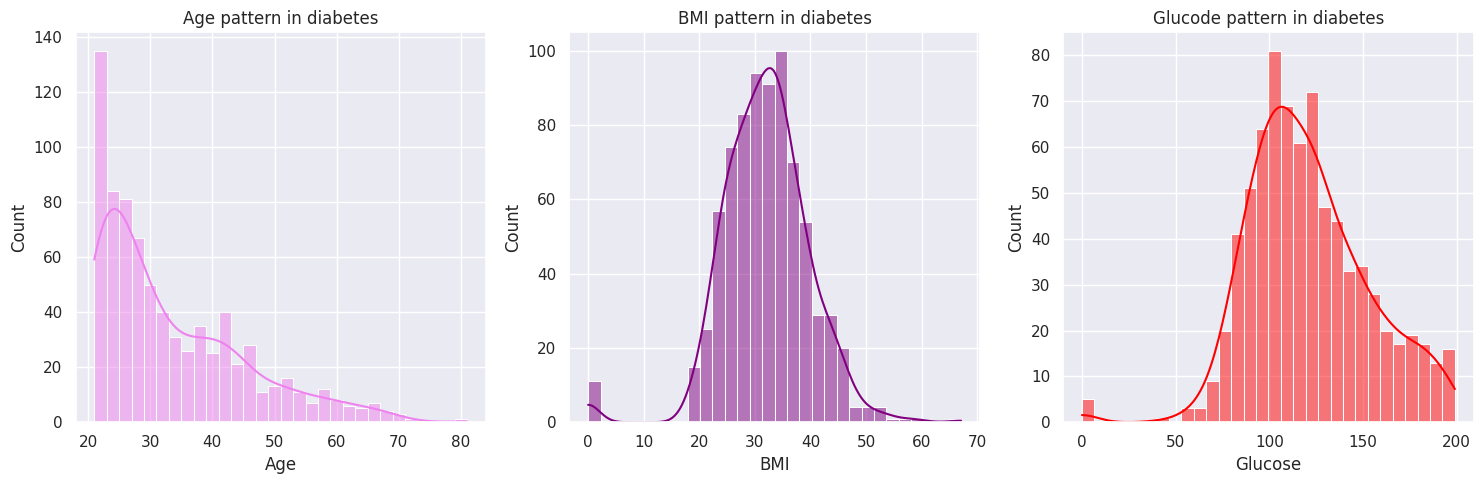

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


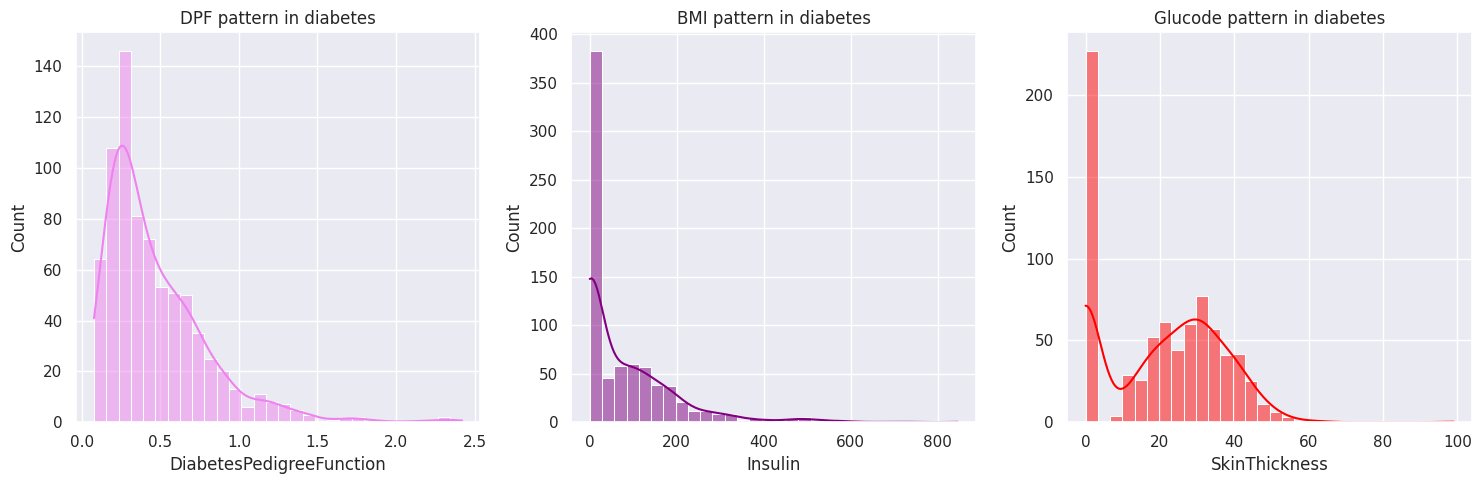

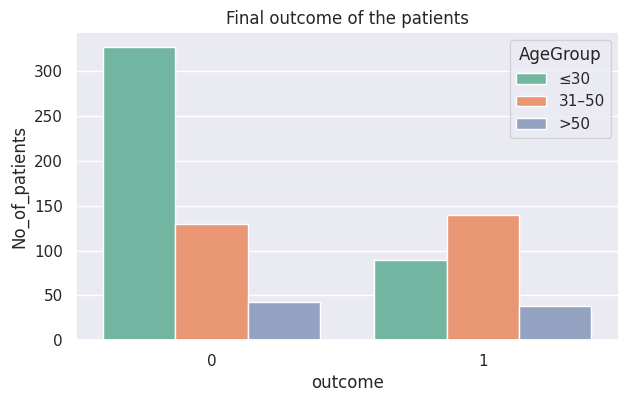

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="darkgrid")

plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
sns.histplot(df['Age'], bins=30,kde=True,color='violet')
plt.title('Age pattern in diabetes')

plt.subplot(1,3,2)
sns.histplot(df['BMI'], bins=30, kde=True,color='purple')
plt.title('BMI pattern in diabetes')

plt.subplot(1,3,3)
sns.histplot(df['Glucose'], bins=30, kde=True, color='red')
plt.title('Glucode pattern in diabetes')

plt.tight_layout()
plt.show()

plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
sns.histplot(df['DiabetesPedigreeFunction'], bins=30,kde=True,color='violet')
plt.title('DPF pattern in diabetes')

plt.subplot(1,3,2)
sns.histplot(df['Insulin'], bins=30, kde=True,color='purple')
plt.title('BMI pattern in diabetes')

plt.subplot(1,3,3)
sns.histplot(df['SkinThickness'], bins=30, kde=True, color='red')
plt.title('Glucode pattern in diabetes')

plt.tight_layout()
plt.show()
plt.figure(figsize=(7,4))
# hue=None, palette="Set2",Legend=False
# sns.countplot(x='Outcome' ,data=df,color='pink')
# make an age group for demo
df['AgeGroup'] = pd.cut(df['Age'], [0,30,50,100], labels=['≤30','31–50','>50'])
sns.countplot(x='Outcome', hue='AgeGroup', data=df, palette='Set2')  # legend shows AgeGroup colors

plt.title('Final outcome of the patients')
plt.xlabel('outcome')
plt.ylabel('No_of_patients')
plt.show()

In [ ]:
# DAY2

In [ ]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
AgeGroup                    0
dtype: int64

<Axes: >

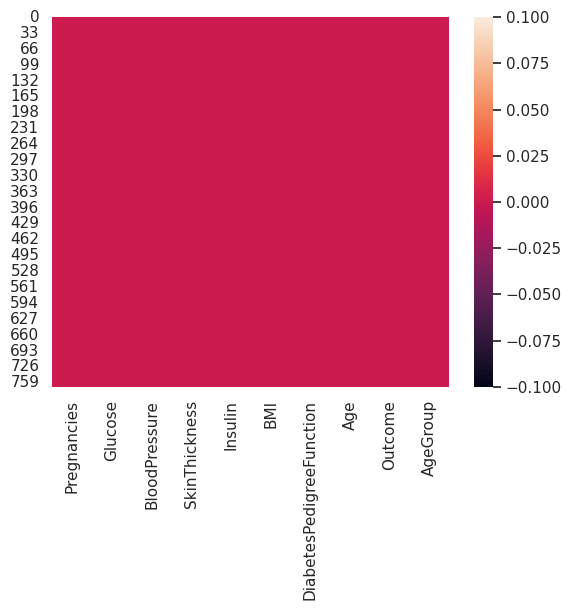

In [ ]:
sns.heatmap(df.isnull())

-----------------------------------------------------------------------------
In medical terms '0' for medical measures DOESN'T REALISTIC FOR SOME FEATURES


So replacing zero values with MEDIAN

In [ ]:
col=['Glucose','BloodPressure','BMI','SkinThickness','Insulin']
df1=df.copy()
df1[col]=df[col].apply(lambda x: x.replace(0,x.median()))

In [ ]:
df1.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35     30.5  33.6   
1            1       85             66             29     30.5  26.6   
2            8      183             64             23     30.5  23.3   
3            1       89             66             23     94.0  28.1   
4            0      137             40             35    168.0  43.1   

   DiabetesPedigreeFunction  Age  Outcome AgeGroup  
0                     0.627   50        1    31–50  
1                     0.351   31        0    31–50  
2                     0.672   32        1    31–50  
3                     0.167   21        0      ≤30  
4                     2.288   33        1    31–50

In [ ]:
df.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome AgeGroup  
0                     0.627   50        1    31–50  
1                     0.351   31        0    31–50  
2                     0.672   32        1    31–50  
3                     0.167   21        0      ≤30  
4                     2.288   33        1    31–50

In [ ]:
z_p=df.apply(lambda x:(x==0).sum()/len(x)*100)
print(z_p)

Pregnancies                 14.453125
Glucose                      0.651042
BloodPressure                4.557292
SkinThickness               29.557292
Insulin                     48.697917
BMI                          1.432292
DiabetesPedigreeFunction     0.000000
Age                          0.000000
Outcome                     65.104167
AgeGroup                     0.000000
dtype: float64


By analysis of NULL('0) we DROP the insulin column as it have 48% of data as NULL

In [ ]:
df.drop(columns=['Insulin'],inplace=True)

In [ ]:
df.head()

Pregnancies  Glucose  BloodPressure  SkinThickness   BMI  \
0            6      148             72             35  33.6   
1            1       85             66             29  26.6   
2            8      183             64              0  23.3   
3            1       89             66             23  28.1   
4            0      137             40             35  43.1   

   DiabetesPedigreeFunction  Age  Outcome AgeGroup  
0                     0.627   50        1    31–50  
1                     0.351   31        0    31–50  
2                     0.672   32        1    31–50  
3                     0.167   21        0      ≤30  
4                     2.288   33        1    31–50

For NULL % fall between < 5% we goes to replace it with median (CAPPING)

In [ ]:
cap_col=['BloodPressure','BMI']
df[cap_col]=df[cap_col].apply(lambda x: x.replace(0,x.median()))
df.head()

Pregnancies  Glucose  BloodPressure  SkinThickness   BMI  \
0            6      148             72             35  33.6   
1            1       85             66             29  26.6   
2            8      183             64              0  23.3   
3            1       89             66             23  28.1   
4            0      137             40             35  43.1   

   DiabetesPedigreeFunction  Age  Outcome AgeGroup  
0                     0.627   50        1    31–50  
1                     0.351   31        0    31–50  
2                     0.672   32        1    31–50  
3                     0.167   21        0      ≤30  
4                     2.288   33        1    31–50

For pregnancies col we can't change the NULL data because SOME WOMEN DON'T HAVE PREGNANCIES
|||
FOR previous cases we changed because medically that are impossible ,SO WE HAVE CHANGED TO BE USEFUL FOR PREDICTION

For skin thickness we gonna refer histogram to check how it was skewed or symmetric or noisy.

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


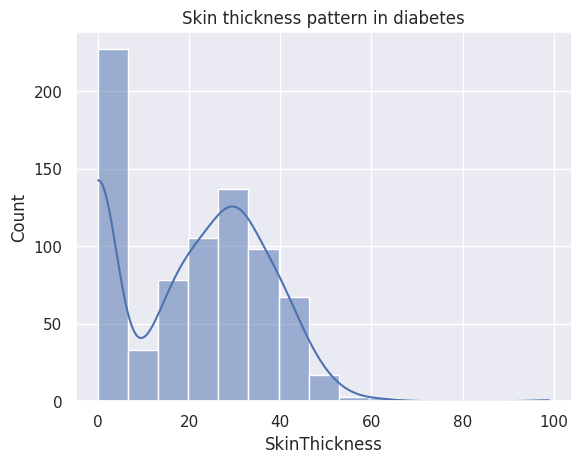

23.0
20.536458333333332
0.10937249648187611
-0.520071866153013


In [ ]:
sns.histplot(df['SkinThickness'],kde=True)
plt.title('Skin thickness pattern in diabetes')
plt.show()
print(df['SkinThickness'].median())
print(df['SkinThickness'].mean())
print(df['SkinThickness'].skew())
print(df['SkinThickness'].kurtosis())

So now we got skew()=0.109..... so this mean it is normally distributed so applying mean to NULL -------instead of this KNN imputer is best as it see neighbouring pattern

In [ ]:
# df['SkinThickness']=df['SkinThickness'].replace(0,df['SkinThickness'].mean())
# df.head()

In [ ]:
import numpy as np
df['SkinThickness']=df['SkinThickness'].replace(0,np.nan)
df.head()

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


Pregnancies  Glucose  BloodPressure  SkinThickness   BMI  \
0            6      148             72           35.0  33.6   
1            1       85             66           29.0  26.6   
2            8      183             64            NaN  23.3   
3            1       89             66           23.0  28.1   
4            0      137             40           35.0  43.1   

   DiabetesPedigreeFunction  Age  Outcome AgeGroup  
0                     0.627   50        1    31–50  
1                     0.351   31        0    31–50  
2                     0.672   32        1    31–50  
3                     0.167   21        0      ≤30  
4                     2.288   33        1    31–50

{'whiskers': [<matplotlib.lines.Line2D at 0x7da3710fa1d0>,
 'caps': [<matplotlib.lines.Line2D at 0x7da3710fbb10>,
 'boxes': [<matplotlib.lines.Line2D at 0x7da3710f96d0>],
 'medians': [<matplotlib.lines.Line2D at 0x7da371105090>],
 'fliers': [<matplotlib.lines.Line2D at 0x7da3710fb590>],
 'means': []}

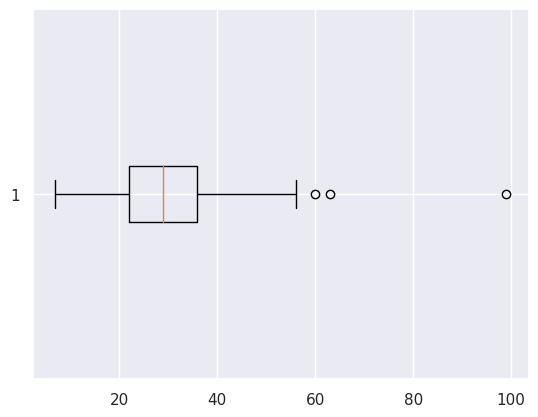

In [ ]:
plt.boxplot(df['SkinThickness'].dropna(),vert=False)

/usr/local/lib/python3.11/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in greater_equal
  return op(a, b)
/usr/local/lib/python3.11/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in less_equal
  return op(a, b)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


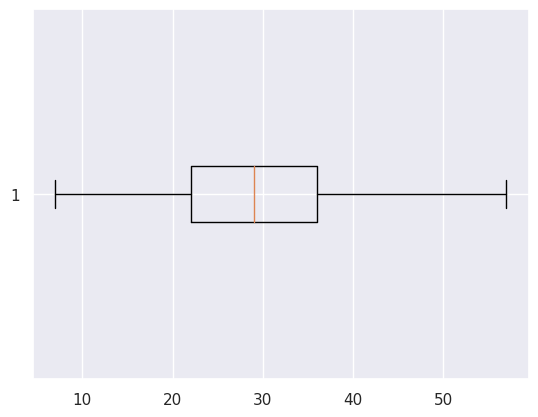

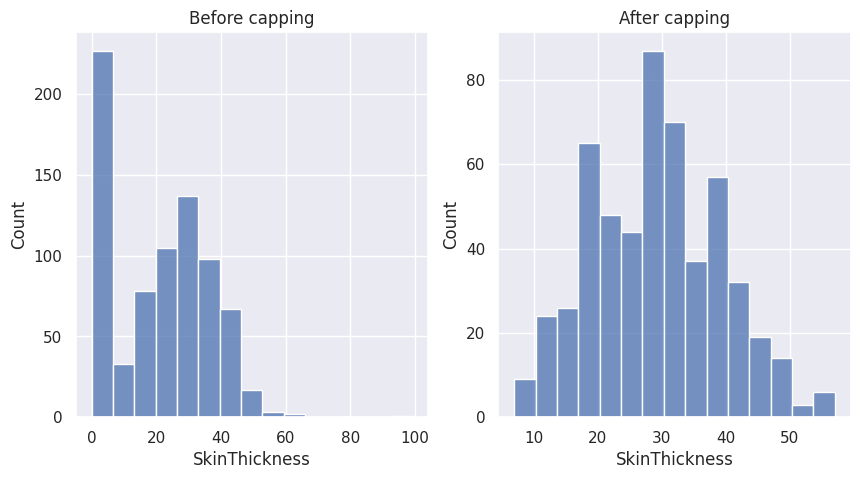

In [ ]:
Q1 = df['SkinThickness'].quantile(0.25)
Q3 = df['SkinThickness'].quantile(0.75)
IQR = Q3-Q1
lb = Q1-1.5*IQR#lower bound
ub = Q3+1.5*IQR#upper bound

df2=pd.read_csv('/kaggle/input/diabetespima/diabetes.csv')

df['SkinThickness'] = df['SkinThickness'].clip(lower=lb,upper=ub)

plt.boxplot(df['SkinThickness'].dropna(),vert=False)

fig,axs = plt.subplots(1,2,figsize=(10,5))
sns.histplot(df2['SkinThickness'],ax=axs[0])
axs[0].set_title('Before capping')
sns.histplot(df['SkinThickness'],ax=axs[1])
axs[1].set_title('After capping')

plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Pregnancies  Glucose  BloodPressure  SkinThickness   BMI  \
0            6    148.0           72.0           35.0  33.6   
1            1     85.0           66.0           29.0  26.6   
2            8    183.0           64.0           23.4  23.3   
3            1     89.0           66.0           23.0  28.1   
4            0    137.0           40.0           35.0  43.1   
5            5    116.0           74.0           20.2  25.6   
6            3     78.0           50.0           32.0  31.0   
7           10    115.0           72.0           28.2  35.3   
8            2    197.0           70.0           45.0  30.5   
9            8    125.0           96.0           25.2  32.0   

   DiabetesPedigreeFunction   Age  Outcome AgeGroup  
0                     0.627  50.0        1    31–50  
1                     0.351  31.0        0    31–50  
2                     0.672  32.0        1    31–50  
3                     0.167  21.0        0      ≤30  
4                     2.288  33.0        1    31–50  
5                     0.201  30.0        0      ≤30  
6                     0.248  26.0        1      ≤30  
7                     0.134  29.0        0      ≤30  
8                     0.158  53.0        1      >50  
9                     0.232  54.0        1      >50

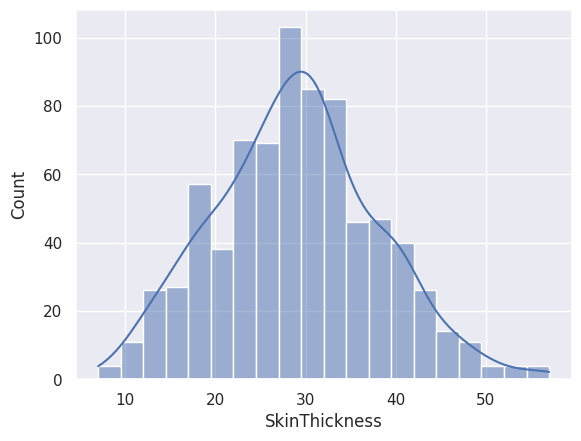

In [ ]:
from sklearn.impute import KNNImputer

helper_cols = ['BMI','Glucose','Age','BloodPressure']
impute_col = ['SkinThickness'] + helper_cols
 
imputer = KNNImputer(n_neighbors=5)
df[impute_col]=imputer.fit_transform(df[impute_col])
sns.histplot(df['SkinThickness'],kde=True)
df.head(10)

In [ ]:
print(df['SkinThickness'].skew())
print(df['SkinThickness'].kurtosis())

0.19437187707719286
-0.06106798272198599


data cleaning done!!!!


FEATURE ENGINEERING

In [ ]:
df=df.drop('AgeGroup',axis=1)
df.head(1)

Pregnancies  Glucose  BloodPressure  SkinThickness   BMI  \
0            6    148.0           72.0           35.0  33.6   

   DiabetesPedigreeFunction   Age  Outcome  
0                     0.627  50.0        1

In [ ]:
x=df.drop('Outcome',axis=1)
y=df['Outcome']
print("X (features):")
display(x.head(1))

print("\nY (target):")
display(y.head(1))

print(df['Age'].min())

X (features):


Pregnancies  Glucose  BloodPressure  SkinThickness   BMI  \
0            6    148.0           72.0           35.0  33.6   

   DiabetesPedigreeFunction   Age  
0                     0.627  50.0


Y (target):


0    1
Name: Outcome, dtype: int64

21.0


AGE GROUPING

In [ ]:
df['AgeGroup']=pd.cut(df['Age'],
                      bins=[20,30,40,50,60,100],
                      labels=['20-30','30-40','40-50','50-60','60-100'])
df.head(1)

Pregnancies  Glucose  BloodPressure  SkinThickness   BMI  \
0            6    148.0           72.0           35.0  33.6   

   DiabetesPedigreeFunction   Age  Outcome AgeGroup  
0                     0.627  50.0        1    40-50

BMI CATEGORIES

In [ ]:
df['BMI_category']=pd.cut(df['BMI'],
                 bins=[0,18.5,25,30,100],
                 labels=['Underweight','Normal','Overweight','Obese'])
df.head(1)

Pregnancies  Glucose  BloodPressure  SkinThickness   BMI  \
0            6    148.0           72.0           35.0  33.6   

   DiabetesPedigreeFunction   Age  Outcome AgeGroup BMI_category  
0                     0.627  50.0        1    40-50        Obese

GLUCOSE LEVEL

In [ ]:
df['Glucose_lvl']=pd.cut(df['Glucose'],
                         bins=[0,100,125,200,300],
                         labels=['Normal','Prediabetes','Diabetes','Severe'])
df.head(1)

Pregnancies  Glucose  BloodPressure  SkinThickness   BMI  \
0            6    148.0           72.0           35.0  33.6   

   DiabetesPedigreeFunction   Age  Outcome AgeGroup BMI_category Glucose_lvl  
0                     0.627  50.0        1    40-50        Obese    Diabetes

HOW MANY PREGNANCIES


In [ ]:
df['had_preg']=pd.cut(df['Pregnancies'],
                      bins=[-1,0,3,20],
                      labels=['0','1-3','4+'])
df.head(1)

Pregnancies  Glucose  BloodPressure  SkinThickness   BMI  \
0            6    148.0           72.0           35.0  33.6   

   DiabetesPedigreeFunction   Age  Outcome AgeGroup BMI_category Glucose_lvl  \
0                     0.627  50.0        1    40-50        Obese    Diabetes   

  had_preg  
0       4+

INTERACTION FEATURES

In [ ]:
df['BMI_Age']=df['BMI'] * df['Age']
df['Metabolism_effi']=df['Glucose']/df['BMI']+1e-5
df['fat_distribution']=df['SkinThickness'] * df['BMI']
df['Preg_rel_risk'] = df['Pregnancies'] * df['Age']
df.head(1)

Pregnancies  Glucose  BloodPressure  SkinThickness   BMI  \
0            6    148.0           72.0           35.0  33.6   

   DiabetesPedigreeFunction   Age  Outcome AgeGroup BMI_category Glucose_lvl  \
0                     0.627  50.0        1    40-50        Obese    Diabetes   

  had_preg  BMI_Age  Metabolism_effi  fat_distribution  Preg_rel_risk  
0       4+   1680.0         4.404772            1176.0          300.0

In [ ]:
print(df.columns)

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'BMI',
       'DiabetesPedigreeFunction', 'Age', 'Outcome', 'AgeGroup',
       'BMI_category', 'Glucose_lvl', 'had_preg', 'BMI_Age', 'Metabolism_effi',
       'fat_distribution', 'Preg_rel_risk'],
      dtype='object')


In [ ]:
df = pd.get_dummies(df, columns=['AgeGroup','had_preg','BMI_category','Glucose_lvl'], drop_first=True)
df.head(1)

Pregnancies  Glucose  BloodPressure  SkinThickness   BMI  \
0            6    148.0           72.0           35.0  33.6   

   DiabetesPedigreeFunction   Age  Outcome  BMI_Age  Metabolism_effi  ...  \
0                     0.627  50.0        1   1680.0         4.404772  ...   

   AgeGroup_50-60  AgeGroup_60-100  had_preg_1-3  had_preg_4+  \
0           False            False         False         True   

   BMI_category_Normal  BMI_category_Overweight  BMI_category_Obese  \
0                False                    False                True   

   Glucose_lvl_Prediabetes  Glucose_lvl_Diabetes  Glucose_lvl_Severe  
0                    False                  True               False  

[1 rows x 24 columns]

TRAIN TEST SPLIT (DATA)

In [ ]:
X = df.drop('Outcome',axis=1)
Y = df['Outcome']
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(
    X,Y,test_size = 0.2, random_state = 42
)

SCALING (Z-SCORE SCALING)

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

 LOGISTICS REGRESSION MODEL
 -

Quick Analogy
------
Precision → “When the doctor says you have diabetes, how often is the doctor correct?”
------
Recall → “Out of all people who really have diabetes, how many did the doctor find?”
------

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

model = LogisticRegression(max_iter = 1000)

model.fit(X_train_scaled,Y_train)

Y_pred = model.predict(X_test_scaled)

print('Accuracy:',accuracy_score(Y_test,Y_pred))
print('\nClassification report:\n',classification_report(Y_test,Y_pred))
print('\nConfusion matrix:\n',confusion_matrix(Y_test,Y_pred))

Accuracy: 0.7662337662337663

Classification report:
               precision    recall  f1-score   support

           0       0.80      0.85      0.82        99
           1       0.69      0.62      0.65        55

    accuracy                           0.77       154
   macro avg       0.75      0.73      0.74       154
weighted avg       0.76      0.77      0.76       154


Confusion matrix:
 [[84 15]
 [21 34]]


NOW CHECKING WITH THRESHOLD = 0.46 IN LOGISTIC REGRESSION MODEL 
----- 
IN MEDICAL CASES higher recall is often preferred, because missing diabetics is riskier than false positives.
-

In [ ]:
Y_probs = model.predict_proba(X_test_scaled)[:, 1]

threshold = 0.46
Y_pred_custom = (Y_probs >= threshold).astype(int)

print('Accuracy:',accuracy_score(Y_test,Y_pred_custom))
print('\nClassification report:\n',classification_report(Y_test,Y_pred_custom))
print('\nConfusion matrix:\n',confusion_matrix(Y_test,Y_pred_custom))

Accuracy: 0.7727272727272727

Classification report:
               precision    recall  f1-score   support

           0       0.82      0.83      0.82        99
           1       0.69      0.67      0.68        55

    accuracy                           0.77       154
   macro avg       0.75      0.75      0.75       154
weighted avg       0.77      0.77      0.77       154


Confusion matrix:
 [[82 17]
 [18 37]]


SO NOW WE MUST FIND THE BEST F1 SCORE TO ASSIGN THE BEST PRECISION AND RECALL

/tmp/ipykernel_86/2090100349.py:5: RuntimeWarning: invalid value encountered in divide
  f1_scores = 2 * (precisions * recalls)/(precisions + recalls)


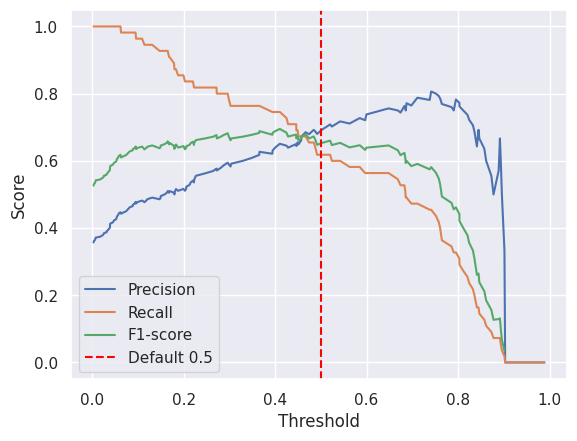

In [ ]:
from sklearn.metrics import precision_recall_curve, f1_score

precisions, recalls, thresholds = precision_recall_curve(Y_test, Y_probs)

f1_scores = 2 * (precisions * recalls)/(precisions + recalls)
plt.plot(thresholds, precisions[:-1], label="Precision")
plt.plot(thresholds, recalls[:-1], label="Recall")
plt.plot(thresholds, f1_scores[:-1], label="F1-score")
plt.axvline(0.5, color='red', linestyle='--', label="Default 0.5")
plt.xlabel("Threshold")
plt.ylabel("Score")
plt.legend()
plt.show()

from the above diagram we see that best threshold for best F1 score is seems to be 0.46
-

In [ ]:
# from sklearn.linear_model import LogisticRegression
# from sklearn.model_selection import GridSearchCV

# # Define parameter grid (only C values)
# param_grid = {
#     'C': [0.01, 0.1, 1, 10, 100]   # small → strong regularization, large → weak
# }

# # Logistic Regression model
# log_reg = LogisticRegression(
#     penalty='l2',    # fixed
#     solver='lbfgs',  # fixed
#     max_iter=1000
# )

# # Grid Search with 5-fold cross validation
# grid = GridSearchCV(
#     log_reg,
#     param_grid,
#     cv=5,
#     scoring='f1'
# )

# grid.fit(X_train_scaled, Y_train)

# print("Best C:", grid.best_params_['C'])
# print("Best F1 Score:", grid.best_score_)


Best C: 10
Best F1 Score: 0.6590944132483105


In [ ]:
# import numpy as np
# from sklearn.linear_model import LogisticRegression
# from sklearn.metrics import f1_score, accuracy_score, classification_report, confusion_matrix

# # 1. Train model with best C
# best_model = LogisticRegression(C=10, max_iter=1000, solver="liblinear")  # liblinear works well with small data
# best_model.fit(X_train_scaled, Y_train)

# # 2. Get probabilities
# y_probs = best_model.predict_proba(X_test_scaled)[:, 1]

# # 3. Tune thresholds
# thresholds = np.arange(0.3, 0.51, 0.01)
# best_f1 = 0
# best_thresh = 0.5

# for t in thresholds:
#     y_pred_t = (y_probs >= t).astype(int)
#     f1 = f1_score(Y_test, y_pred_t)
#     if f1 > best_f1:
#         best_f1 = f1
#         best_thresh = t

# print("Best Threshold:", best_thresh)
# print("Best F1 Score:", best_f1)

# # 4. Final evaluation
# y_pred_final = (y_probs >= best_thresh).astype(int)
# print('Accuracy:',accuracy_score(Y_test,y_pred_final))
# print("\nClassification Report:\n", classification_report(Y_test, y_pred_final))
# print("\nConfusion Matrix:\n", confusion_matrix(Y_test, y_pred_final))


Best Threshold: 0.4500000000000001
Best F1 Score: 0.6964285714285715
Accuracy: 0.7792207792207793

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.82      0.83        99
           1       0.68      0.71      0.70        55

    accuracy                           0.78       154
   macro avg       0.76      0.76      0.76       154
weighted avg       0.78      0.78      0.78       154


Confusion Matrix:
 [[81 18]
 [16 39]]


precision (don’t call non-diabetics diabetic) and recall (catch as many true diabetics as possible).
-

In [ ]:
# import numpy as np
# from sklearn.model_selection import GridSearchCV
# from sklearn.linear_model import LogisticRegression
# from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# # Define parameter grid
# param_grid = {
#     'penalty': ['l1', 'l2', 'elasticnet', 'none'],
#     'C': np.logspace(-4, 4, 20),
#     'solver': ['lbfgs', 'newton-cg', 'liblinear', 'sag', 'saga'],
#     'max_iter': [100, 1000, 2500, 5000],
#     'class_weight': [None, 'balanced']   # add this → doubles to 3200
# }

# # GridSearchCV
# grid = GridSearchCV(
#     LogisticRegression(),
#     param_grid,
#     cv=3,            # 3-fold CV → faster than 5
#     scoring='f1',
#     n_jobs=-1,
#     verbose=2
# )

# grid.fit(X_train_scaled, Y_train)

# print("Total combinations tested:", len(grid.cv_results_['params']))
# print("Best Params:", grid.best_params_)
# print("Best F1 Score (CV):", grid.best_score_)

# # Retrain best model
# best_model = grid.best_estimator_
# y_pred = best_model.predict(X_test_scaled)

# print("\nAccuracy:", accuracy_score(Y_test, y_pred))
# print("\nClassification Report:\n", classification_report(Y_test, y_pred))
# print("\nConfusion Matrix:\n", confusion_matrix(Y_test, y_pred))


Fitting 3 folds for each of 3200 candidates, totalling 9600 fits
[CV] END C=0.0001, class_weight=None, max_iter=100, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=0.0001, class_weight=None, max_iter=100, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=0.0001, class_weight=None, max_iter=100, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=0.0001, class_weight=None, max_iter=100, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=0.0001, class_weight=None, max_iter=100, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=0.0001, class_weight=None, max_iter=100, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=0.0001, class_weight=None, max_iter=100, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.0001, class_weight=None, max_iter=100, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.0001, class_weight=None, max_iter=100, penalty=l1, solver=sag; total time=   0.0s
[CV] END C=0.0001, class_weight=None, max_it

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour

[CV] END C=0.0001, class_weight=None, max_iter=100, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END C=0.0001, class_weight=None, max_iter=100, penalty=none, solver=sag; total time=   0.0s
[CV] END C=0.0001, class_weight=None, max_iter=100, penalty=none, solver=sag; total time=   0.0s
[CV] END C=0.0001, class_weight=None, max_iter=100, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END C=0.0001, class_weight=None, max_iter=100, penalty=none, solver=sag; total time=   0.0s
[CV] END C=0.0001, class_weight=None, max_iter=100, penalty=none, solver=saga; total time=   0.0s
[CV] END C=0.0001, class_weight=None, max_iter=1000, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=0.0001, class_weight=None, max_iter=100, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END C=0.0001, class_weight=None, max_iter=1000, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=0.0001, class_weight=None, max_iter=1000, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=0.000

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour

[CV] END C=0.0001, class_weight=None, max_iter=2500, penalty=l1, solver=sag; total time=   0.0s
[CV] END C=0.0001, class_weight=None, max_iter=2500, penalty=l1, solver=sag; total time=   0.0s
[CV] END C=0.0001, class_weight=None, max_iter=1000, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END C=0.0001, class_weight=None, max_iter=2500, penalty=l1, solver=saga; total time=   0.0s
[CV] END C=0.0001, class_weight=None, max_iter=2500, penalty=l1, solver=saga; total time=   0.0s
[CV] END C=0.0001, class_weight=None, max_iter=2500, penalty=l1, solver=saga; total time=   0.0s
[CV] END C=0.0001, class_weight=None, max_iter=2500, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=0.0001, class_weight=None, max_iter=1000, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END C=0.0001, class_weight=None, max_iter=1000, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END C=0.0001, class_weight=None, max_iter=2500, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=0.

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/py

[CV] END C=0.0001, class_weight=None, max_iter=2500, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=0.0001, class_weight=None, max_iter=2500, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=0.0001, class_weight=None, max_iter=2500, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=0.0001, class_weight=None, max_iter=2500, penalty=none, solver=lbfgs; total time=   0.1s
[CV] END C=0.0001, class_weight=None, max_iter=2500, penalty=none, solver=lbfgs; total time=   0.1s
[CV] END C=0.0001, class_weight=None, max_iter=1000, penalty=none, solver=sag; total time=   0.2s
[CV] END C=0.0001, class_weight=None, max_iter=2500, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END C=0.0001, class_weight=None, max_iter=2500, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END C=0.0001, class_weight=None, max_iter=2500, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END C=0.0001, class_weight=None, max_iter=2500, penalty=none, solve

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/

[CV] END C=0.0001, class_weight=None, max_iter=5000, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END C=0.0001, class_weight=None, max_iter=5000, penalty=none, solver=lbfgs; total time=   0.1s
[CV] END C=0.0001, class_weight=None, max_iter=5000, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END C=0.0001, class_weight=None, max_iter=1000, penalty=none, solver=saga; total time=   0.3s
[CV] END C=0.0001, class_weight=None, max_iter=5000, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END C=0.0001, class_weight=None, max_iter=2500, penalty=none, solver=sag; total time=   0.6s
[CV] END C=0.0001, class_weight=None, max_iter=5000, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END C=0.0001, class_weight=None, max_iter=5000, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=0.0001, class_weight=None, max_iter=5000, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=0.0001, class_weight=None, max_iter=5000, penalty=none, solver=liblinear

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/py

[CV] END C=0.0001, class_weight=None, max_iter=1000, penalty=none, solver=saga; total time=   0.3s
[CV] END C=0.0001, class_weight=None, max_iter=2500, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=0.0001, class_weight=None, max_iter=2500, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=0.0001, class_weight=None, max_iter=2500, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=0.0001, class_weight=None, max_iter=2500, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=0.0001, class_weight=balanced, max_iter=100, penalty=l1, solver=saga; total time=   0.0s
[CV] END C=0.0001, class_weight=balanced, max_iter=100, penalty=l1, solver=saga; total time=   0.0s
[CV] END C=0.0001, class_weight=balanced, max_iter=100, penalty=l1, solver=saga; total time=   0.0s
[CV] END C=0.0001, class_weight=balanced, max_iter=100, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=0.0001, class_weight=balanced, max_iter=100, penalty=l2, solver=lbfgs; total time=   0.0s
[CV

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: Futur

[CV] END C=0.0001, class_weight=balanced, max_iter=100, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END C=0.0001, class_weight=balanced, max_iter=100, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=0.0001, class_weight=balanced, max_iter=100, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=0.0001, class_weight=balanced, max_iter=100, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=0.0001, class_weight=balanced, max_iter=100, penalty=none, solver=sag; total time=   0.0s
[CV] END C=0.0001, class_weight=balanced, max_iter=100, penalty=none, solver=sag; total time=   0.0s
[CV] END C=0.0001, class_weight=balanced, max_iter=100, penalty=none, solver=sag; total time=   0.0s
[CV] END C=0.0001, class_weight=balanced, max_iter=100, penalty=none, solver=saga; total time=   0.0s
[CV] END C=0.0001, class_weight=balanced, max_iter=100, penalty=none, solver=saga; total time=   0.0s
[CV] END C=0.0001, class_weight=balanced, max_iter=100, penalty=n

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/

[CV] END C=0.0001, class_weight=balanced, max_iter=1000, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=0.0001, class_weight=balanced, max_iter=1000, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=0.0001, class_weight=balanced, max_iter=1000, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=0.0001, class_weight=balanced, max_iter=1000, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=0.0001, class_weight=balanced, max_iter=1000, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=0.0001, class_weight=balanced, max_iter=1000, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=0.0001, class_weight=None, max_iter=5000, penalty=none, solver=saga; total time=   0.5s
[CV] END C=0.0001, class_weight=balanced, max_iter=1000, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.0001, class_weight=balanced, max_iter=1000, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.0001, class_weight=balanced, max_iter=1000, penalty=

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour

[CV] END C=0.0001, class_weight=balanced, max_iter=2500, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=0.0001, class_weight=balanced, max_iter=2500, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=0.0001, class_weight=balanced, max_iter=2500, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.0001, class_weight=balanced, max_iter=1000, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END C=0.0001, class_weight=balanced, max_iter=2500, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.0001, class_weight=balanced, max_iter=1000, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=0.0001, class_weight=balanced, max_iter=1000, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=0.0001, class_weight=balanced, max_iter=1000, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=0.0001, class_weight=balanced, max_iter=2500, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.0001, class_weight=balanc

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END C=0.0001, class_weight=balanced, max_iter=2500, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END C=0.0001, class_weight=balanced, max_iter=2500, penalty=elasticnet, solver=sag; total time=   0.0s
[CV] END C=0.0001, class_weight=balanced, max_iter=2500, penalty=elasticnet, solver=sag; total time=   0.0s
[CV] END C=0.0001, class_weight=balanced, max_iter=2500, penalty=elasticnet, solver=sag; total time=   0.0s
[CV] END C=0.0001, class_weight=balanced, max_iter=2500, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=0.0001, class_weight=balanced, max_iter=2500, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=0.0001, class_weight=balanced, max_iter=2500, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=0.0001, class_weight=balanced, max_iter=1000, penalty=none, solver=sag; total time=   0.2s
[CV] END C=0.0001, class_weight=balanced, max_iter=2500, penalty=none, solver=lbfgs; total time=   0.1s
[CV] END C=0.0001, class_weig

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/py

[CV] END C=0.0001, class_weight=balanced, max_iter=2500, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END C=0.0001, class_weight=balanced, max_iter=2500, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END C=0.0001, class_weight=balanced, max_iter=1000, penalty=none, solver=sag; total time=   0.2s
[CV] END C=0.0001, class_weight=balanced, max_iter=2500, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END C=0.0001, class_weight=balanced, max_iter=2500, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=0.0001, class_weight=balanced, max_iter=2500, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=0.0001, class_weight=balanced, max_iter=2500, penalty=none, solver=liblinear; total time=   0.0s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/py

[CV] END C=0.0001, class_weight=None, max_iter=5000, penalty=none, solver=saga; total time=   0.5s
[CV] END C=0.0001, class_weight=balanced, max_iter=100, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=0.0001, class_weight=balanced, max_iter=100, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=0.0001, class_weight=balanced, max_iter=100, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=0.0001, class_weight=balanced, max_iter=100, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=0.0001, class_weight=balanced, max_iter=100, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=0.0001, class_weight=balanced, max_iter=100, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=0.0001, class_weight=balanced, max_iter=100, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.0001, class_weight=balanced, max_iter=100, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.0001, class_weight=balanced, max_iter=100, penalty=l1, solve

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END C=0.0001, class_weight=balanced, max_iter=5000, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=0.0001, class_weight=balanced, max_iter=5000, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=0.0001, class_weight=balanced, max_iter=5000, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=0.0001, class_weight=balanced, max_iter=5000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=0.0001, class_weight=balanced, max_iter=5000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=0.0001, class_weight=balanced, max_iter=5000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=0.0001, class_weight=balanced, max_iter=5000, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END C=0.0001, class_weight=balanced, max_iter=5000, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END C=0.0001, class_weight=balanced, max_iter=5000, penalty=elasticnet, solver=liblinear; total

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour

[CV] END C=0.0001, class_weight=balanced, max_iter=5000, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END C=0.0001, class_weight=balanced, max_iter=5000, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END C=0.0001, class_weight=balanced, max_iter=5000, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END C=0.0001, class_weight=balanced, max_iter=5000, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END C=0.0001, class_weight=balanced, max_iter=5000, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=0.0001, class_weight=balanced, max_iter=5000, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=0.0001, class_weight=balanced, max_iter=5000, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=0.0001, class_weight=balanced, max_iter=1000, penalty=none, solver=saga; total time=   0.3s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/py

[CV] END C=0.0001, class_weight=None, max_iter=2500, penalty=none, solver=saga; total time=   0.5s
[CV] END C=0.0001, class_weight=None, max_iter=5000, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=0.0001, class_weight=None, max_iter=5000, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=0.0001, class_weight=None, max_iter=5000, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=0.0001, class_weight=None, max_iter=5000, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=0.0001, class_weight=None, max_iter=5000, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=0.0001, class_weight=None, max_iter=5000, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=0.0001, class_weight=None, max_iter=5000, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.0001, class_weight=None, max_iter=5000, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.0001, class_weight=balanced, max_iter=2500, penalty=none, solver=sag; total time=   

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=0.00026366508987303583, class_weight=None, max_iter=100, penalty=l2, solver=sag; total time=   0.0s
[CV] END C=0.00026366508987303583, class_weight=None, max_iter=100, penalty=l2, solver=sag; total time=   0.0s
[CV] END C=0.0001, class_weight=balanced, max_iter=5000, penalty=none, solver=sag; total time=   0.5s
[CV] END C=0.00026366508987303583, class_weight=None, max_iter=100, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=0.00026366508987303583, class_weight=None, max_iter=100, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=0.00026366508987303583, class_weight=None, max_iter=100, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=0.00026366508987303583, class_weight=None, max_iter=100, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=0.00026366508987303583, class_weight=None, max_iter=100, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=0.00026366508987303583, class_weight=None, max_iter=100, penalty=elasticnet, solver=lbf

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase t

[CV] END C=0.00026366508987303583, class_weight=None, max_iter=100, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END C=0.00026366508987303583, class_weight=None, max_iter=100, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END C=0.0001, class_weight=balanced, max_iter=5000, penalty=none, solver=sag; total time=   0.5s
[CV] END C=0.0001, class_weight=balanced, max_iter=2500, penalty=none, solver=sag; total time=   0.5s
[CV] END C=0.00026366508987303583, class_weight=None, max_iter=100, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END C=0.00026366508987303583, class_weight=None, max_iter=100, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=0.00026366508987303583, class_weight=None, max_iter=100, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=0.00026366508987303583, class_weight=None, max_iter=100, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=0.00026366508987303583, class_weight=None, max_iter=100, penalty=none, 

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour

[CV] END C=0.00026366508987303583, class_weight=None, max_iter=100, penalty=none, solver=saga; total time=   0.0s
[CV] END C=0.00026366508987303583, class_weight=None, max_iter=100, penalty=none, solver=saga; total time=   0.0s
[CV] END C=0.00026366508987303583, class_weight=None, max_iter=1000, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=0.00026366508987303583, class_weight=None, max_iter=1000, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=0.00026366508987303583, class_weight=None, max_iter=1000, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=0.00026366508987303583, class_weight=None, max_iter=1000, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=0.00026366508987303583, class_weight=None, max_iter=1000, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=0.00026366508987303583, class_weight=None, max_iter=1000, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=0.00026366508987303583, class_weight=None, max_iter=1000, penalty

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour

[CV] END C=0.00026366508987303583, class_weight=None, max_iter=2500, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=0.00026366508987303583, class_weight=None, max_iter=2500, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=0.00026366508987303583, class_weight=None, max_iter=2500, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=0.00026366508987303583, class_weight=None, max_iter=2500, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=0.00026366508987303583, class_weight=None, max_iter=2500, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=0.00026366508987303583, class_weight=None, max_iter=2500, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=0.00026366508987303583, class_weight=None, max_iter=2500, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=0.00026366508987303583, class_weight=None, max_iter=2500, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=0.00026366508987303583, class_we

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/py

[CV] END C=0.00026366508987303583, class_weight=None, max_iter=2500, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END C=0.00026366508987303583, class_weight=None, max_iter=2500, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END C=0.00026366508987303583, class_weight=None, max_iter=2500, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END C=0.00026366508987303583, class_weight=None, max_iter=2500, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=0.00026366508987303583, class_weight=None, max_iter=2500, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=0.00026366508987303583, class_weight=None, max_iter=2500, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=0.0001, class_weight=balanced, max_iter=5000, penalty=none, solver=saga; total time=   0.5s
[CV] END C=0.00026366508987303583, class_weight=None, max_iter=1000, penalty=none, solver=sag; total time=   0.2s
[CV] END C=0.0001, class_weight=balanced, max_iter=2500, penalt

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour

[CV] END C=0.00026366508987303583, class_weight=None, max_iter=1000, penalty=none, solver=sag; total time=   0.2s
[CV] END C=0.0001, class_weight=balanced, max_iter=5000, penalty=none, solver=saga; total time=   0.5s
[CV] END C=0.00026366508987303583, class_weight=None, max_iter=100, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=0.00026366508987303583, class_weight=None, max_iter=100, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=0.00026366508987303583, class_weight=None, max_iter=100, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=0.00026366508987303583, class_weight=None, max_iter=100, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=0.00026366508987303583, class_weight=None, max_iter=100, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=0.00026366508987303583, class_weight=None, max_iter=100, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=0.00026366508987303583, class_weight=None, max_iter=100, penalty=l1, solver=liblin

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/

[CV] END C=0.00026366508987303583, class_weight=None, max_iter=5000, penalty=none, solver=lbfgs; total time=   0.1s
[CV] END C=0.00026366508987303583, class_weight=None, max_iter=5000, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END C=0.00026366508987303583, class_weight=None, max_iter=5000, penalty=none, solver=lbfgs; total time=   0.1s
[CV] END C=0.00026366508987303583, class_weight=None, max_iter=1000, penalty=none, solver=saga; total time=   0.3s
[CV] END C=0.00026366508987303583, class_weight=None, max_iter=5000, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END C=0.00026366508987303583, class_weight=None, max_iter=5000, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END C=0.00026366508987303583, class_weight=None, max_iter=5000, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END C=0.00026366508987303583, class_weight=None, max_iter=5000, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=0.00026366508987303583, class_weight=None, max

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/py

[CV] END C=0.00026366508987303583, class_weight=None, max_iter=1000, penalty=none, solver=saga; total time=   0.3s
[CV] END C=0.00026366508987303583, class_weight=None, max_iter=2500, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=0.00026366508987303583, class_weight=None, max_iter=2500, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=0.00026366508987303583, class_weight=None, max_iter=2500, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=0.00026366508987303583, class_weight=None, max_iter=2500, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=0.00026366508987303583, class_weight=balanced, max_iter=100, penalty=l1, solver=saga; total time=   0.0s
[CV] END C=0.00026366508987303583, class_weight=None, max_iter=2500, penalty=none, solver=sag; total time=   0.5s
[CV] END C=0.00026366508987303583, class_weight=balanced, max_iter=100, penalty=l1, solver=saga; total time=   0.0s
[CV] END C=0.00026366508987303583, class_weight=balanced, max_iter=100, penalty

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: Futur

[CV] END C=0.00026366508987303583, class_weight=balanced, max_iter=100, penalty=none, solver=sag; total time=   0.0s
[CV] END C=0.00026366508987303583, class_weight=balanced, max_iter=100, penalty=none, solver=sag; total time=   0.0s
[CV] END C=0.00026366508987303583, class_weight=balanced, max_iter=100, penalty=none, solver=sag; total time=   0.0s
[CV] END C=0.00026366508987303583, class_weight=balanced, max_iter=100, penalty=none, solver=saga; total time=   0.0s
[CV] END C=0.00026366508987303583, class_weight=balanced, max_iter=100, penalty=none, solver=saga; total time=   0.0s
[CV] END C=0.00026366508987303583, class_weight=None, max_iter=2500, penalty=none, solver=sag; total time=   0.5s
[CV] END C=0.00026366508987303583, class_weight=balanced, max_iter=100, penalty=none, solver=saga; total time=   0.0s
[CV] END C=0.00026366508987303583, class_weight=balanced, max_iter=1000, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=0.00026366508987303583, class_weight=balanced, max_i

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour

[CV] END C=0.00026366508987303583, class_weight=balanced, max_iter=1000, penalty=none, solver=lbfgs; total time=   0.1s
[CV] END C=0.00026366508987303583, class_weight=balanced, max_iter=1000, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END C=0.00026366508987303583, class_weight=None, max_iter=5000, penalty=none, solver=sag; total time=   0.5s
[CV] END C=0.00026366508987303583, class_weight=balanced, max_iter=1000, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END C=0.00026366508987303583, class_weight=balanced, max_iter=1000, penalty=none, solver=lbfgs; total time=   0.1s
[CV] END C=0.00026366508987303583, class_weight=balanced, max_iter=2500, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=0.00026366508987303583, class_weight=balanced, max_iter=2500, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=0.00026366508987303583, class_weight=balanced, max_iter=2500, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.00026366508987303583, c

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour

[CV] END C=0.00026366508987303583, class_weight=balanced, max_iter=2500, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=0.00026366508987303583, class_weight=balanced, max_iter=2500, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=0.00026366508987303583, class_weight=balanced, max_iter=2500, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.00026366508987303583, class_weight=balanced, max_iter=2500, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.00026366508987303583, class_weight=balanced, max_iter=2500, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.00026366508987303583, class_weight=None, max_iter=2500, penalty=none, solver=saga; total time=   0.6s
[CV] END C=0.00026366508987303583, class_weight=balanced, max_iter=2500, penalty=l2, solver=sag; total time=   0.0s
[CV] END C=0.00026366508987303583, class_weight=balanced, max_iter=2500, penalty=l2, solver=sag; total time=   0.0s
[CV] END C=0.00026366508987303583, class_we

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/py

[CV] END C=0.00026366508987303583, class_weight=balanced, max_iter=1000, penalty=none, solver=sag; total time=   0.2s
[CV] END C=0.00026366508987303583, class_weight=balanced, max_iter=2500, penalty=none, solver=lbfgs; total time=   0.1s
[CV] END C=0.00026366508987303583, class_weight=balanced, max_iter=2500, penalty=none, solver=lbfgs; total time=   0.1s
[CV] END C=0.00026366508987303583, class_weight=balanced, max_iter=2500, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END C=0.00026366508987303583, class_weight=balanced, max_iter=2500, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END C=0.00026366508987303583, class_weight=balanced, max_iter=2500, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END C=0.00026366508987303583, class_weight=balanced, max_iter=2500, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=0.00026366508987303583, class_weight=balanced, max_iter=2500, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=0.000263665

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END C=0.00026366508987303583, class_weight=balanced, max_iter=1000, penalty=none, solver=sag; total time=   0.3s
[CV] END C=0.00026366508987303583, class_weight=None, max_iter=2500, penalty=none, solver=saga; total time=   0.7s
[CV] END C=0.00026366508987303583, class_weight=None, max_iter=5000, penalty=none, solver=saga; total time=   0.6s
[CV] END C=0.00026366508987303583, class_weight=balanced, max_iter=100, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=0.00026366508987303583, class_weight=balanced, max_iter=100, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=0.00026366508987303583, class_weight=balanced, max_iter=100, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=0.00026366508987303583, class_weight=balanced, max_iter=100, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=0.00026366508987303583, class_weight=balanced, max_iter=100, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=0.00026366508987303583, class_weight=balanced, m

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END C=0.00026366508987303583, class_weight=balanced, max_iter=5000, penalty=l2, solver=sag; total time=   0.0s
[CV] END C=0.00026366508987303583, class_weight=balanced, max_iter=5000, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=0.00026366508987303583, class_weight=balanced, max_iter=5000, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=0.00026366508987303583, class_weight=balanced, max_iter=5000, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=0.00026366508987303583, class_weight=balanced, max_iter=5000, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=0.00026366508987303583, class_weight=balanced, max_iter=5000, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=0.00026366508987303583, class_weight=balanced, max_iter=5000, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=0.00026366508987303583, class_weight=balanced, max_iter=5000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=0.000263665089

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/py

[CV] END C=0.00026366508987303583, class_weight=balanced, max_iter=5000, penalty=none, solver=lbfgs; total time=   0.1s
[CV] END C=0.00026366508987303583, class_weight=balanced, max_iter=5000, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END C=0.00026366508987303583, class_weight=None, max_iter=2500, penalty=none, solver=saga; total time=   0.5s
[CV] END C=0.00026366508987303583, class_weight=None, max_iter=5000, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=0.00026366508987303583, class_weight=balanced, max_iter=5000, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END C=0.00026366508987303583, class_weight=None, max_iter=5000, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=0.00026366508987303583, class_weight=None, max_iter=5000, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=0.00026366508987303583, class_weight=None, max_iter=5000, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=0.00026366508987303583, class_weight=None, max

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour

[CV] END C=0.00026366508987303583, class_weight=balanced, max_iter=2500, penalty=none, solver=sag; total time=   0.5s
[CV] END C=0.00026366508987303583, class_weight=balanced, max_iter=1000, penalty=none, solver=saga; total time=   0.3s
[CV] END C=0.00026366508987303583, class_weight=balanced, max_iter=2500, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=0.00026366508987303583, class_weight=balanced, max_iter=2500, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=0.00026366508987303583, class_weight=balanced, max_iter=2500, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=0.00026366508987303583, class_weight=balanced, max_iter=2500, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=0.0006951927961775605, class_weight=None, max_iter=100, penalty=l1, solver=saga; total time=   0.0s
[CV] END C=0.0006951927961775605, class_weight=None, max_iter=100, penalty=l1, solver=saga; total time=   0.0s
[CV] END C=0.0006951927961775605, class_weight=None, max_iter=100

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



[CV] END C=0.0006951927961775605, class_weight=None, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=0.0006951927961775605, class_weight=None, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=0.0006951927961775605, class_weight=None, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=0.0006951927961775605, class_weight=None, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.0006951927961775605, class_weight=None, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.0006951927961775605, class_weight=None, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.0006951927961775605, class_weight=None, max_iter=100, penalty=l2, solver=sag; total time=   0.0s
[CV] END C=0.0006951927961775605, class_weight=None, max_iter=100, penalty=l2, solver=sag; total time=   0.0s
[CV] END C=0.0006951927961775605, class_weight=None, max_iter=100, penalty=l2, solv

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour

[CV] END C=0.0006951927961775605, class_weight=None, max_iter=100, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END C=0.0006951927961775605, class_weight=None, max_iter=100, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END C=0.0006951927961775605, class_weight=None, max_iter=100, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END C=0.0006951927961775605, class_weight=None, max_iter=100, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END C=0.00026366508987303583, class_weight=balanced, max_iter=2500, penalty=none, solver=sag; total time=   0.5s
[CV] END C=0.0006951927961775605, class_weight=None, max_iter=100, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END C=0.0006951927961775605, class_weight=None, max_iter=100, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=0.0006951927961775605, class_weight=None, max_iter=100, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=0.0006951927961775605, class_weight=None, max_iter=10

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour

[CV] END C=0.0006951927961775605, class_weight=None, max_iter=100, penalty=none, solver=sag; total time=   0.0s
[CV] END C=0.0006951927961775605, class_weight=None, max_iter=100, penalty=none, solver=saga; total time=   0.0s
[CV] END C=0.0006951927961775605, class_weight=None, max_iter=100, penalty=none, solver=saga; total time=   0.0s
[CV] END C=0.0006951927961775605, class_weight=None, max_iter=100, penalty=none, solver=saga; total time=   0.1s
[CV] END C=0.0006951927961775605, class_weight=None, max_iter=1000, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=0.0006951927961775605, class_weight=None, max_iter=1000, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=0.0006951927961775605, class_weight=None, max_iter=1000, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=0.0006951927961775605, class_weight=None, max_iter=1000, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=0.0006951927961775605, class_weight=None, max_iter=1000, penalty=l1, solver=newton

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/py


[CV] END C=0.0006951927961775605, class_weight=None, max_iter=1000, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=0.0006951927961775605, class_weight=None, max_iter=1000, penalty=l2, solver=newton-cg; total time=   0.0s[CV] END C=0.00026366508987303583, class_weight=balanced, max_iter=5000, penalty=none, solver=sag; total time=   0.5s

[CV] END C=0.0006951927961775605, class_weight=None, max_iter=1000, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=0.0006951927961775605, class_weight=None, max_iter=1000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=0.0006951927961775605, class_weight=None, max_iter=1000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=0.0006951927961775605, class_weight=None, max_iter=1000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=0.0006951927961775605, class_weight=None, max_iter=1000, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END C=0.00069519279617756

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour

[CV] END C=0.0006951927961775605, class_weight=None, max_iter=2500, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=0.0006951927961775605, class_weight=None, max_iter=2500, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=0.0006951927961775605, class_weight=None, max_iter=2500, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.0006951927961775605, class_weight=None, max_iter=2500, penalty=l1, solver=liblinear; total time=   0.0s[CV] END C=0.0006951927961775605, class_weight=None, max_iter=1000, penalty=none, solver=newton-cg; total time=   0.0s

[CV] END C=0.0006951927961775605, class_weight=None, max_iter=1000, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=0.0006951927961775605, class_weight=None, max_iter=1000, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=0.0006951927961775605, class_weight=None, max_iter=2500, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.0006951927961775605, class_weight=None, max_i

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/py

[CV] END C=0.00026366508987303583, class_weight=balanced, max_iter=2500, penalty=none, solver=saga; total time=   0.5s
[CV] END C=0.0006951927961775605, class_weight=None, max_iter=2500, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END C=0.0006951927961775605, class_weight=None, max_iter=2500, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=0.0006951927961775605, class_weight=None, max_iter=2500, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=0.0006951927961775605, class_weight=None, max_iter=2500, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=0.0006951927961775605, class_weight=None, max_iter=1000, penalty=none, solver=sag; total time=   0.2s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/py

[CV] END C=0.00026366508987303583, class_weight=balanced, max_iter=5000, penalty=none, solver=saga; total time=   0.5s
[CV] END C=0.0006951927961775605, class_weight=None, max_iter=100, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=0.0006951927961775605, class_weight=None, max_iter=100, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=0.0006951927961775605, class_weight=None, max_iter=100, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=0.0006951927961775605, class_weight=None, max_iter=100, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=0.0006951927961775605, class_weight=None, max_iter=100, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=0.0006951927961775605, class_weight=None, max_iter=100, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=0.0006951927961775605, class_weight=None, max_iter=100, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.0006951927961775605, class_weight=None, max_iter=100, penalty=l1, so

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END C=0.0006951927961775605, class_weight=None, max_iter=5000, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END C=0.0006951927961775605, class_weight=None, max_iter=5000, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END C=0.0006951927961775605, class_weight=None, max_iter=5000, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END C=0.0006951927961775605, class_weight=None, max_iter=5000, penalty=elasticnet, solver=sag; total time=   0.0s
[CV] END C=0.0006951927961775605, class_weight=None, max_iter=5000, penalty=elasticnet, solver=sag; total time=   0.0s
[CV] END C=0.0006951927961775605, class_weight=None, max_iter=5000, penalty=elasticnet, solver=sag; total time=   0.0s
[CV] END C=0.0006951927961775605, class_weight=None, max_iter=5000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=0.0006951927961775605, class_weight=None, max_iter=5000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=0.000263665089873

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/py

[CV] END C=0.0006951927961775605, class_weight=None, max_iter=5000, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END C=0.0006951927961775605, class_weight=None, max_iter=5000, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END C=0.0006951927961775605, class_weight=None, max_iter=5000, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END C=0.0006951927961775605, class_weight=None, max_iter=5000, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=0.0006951927961775605, class_weight=None, max_iter=5000, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=0.0006951927961775605, class_weight=None, max_iter=5000, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=0.0006951927961775605, class_weight=None, max_iter=1000, penalty=none, solver=saga; total time=   0.3s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END C=0.0006951927961775605, class_weight=None, max_iter=5000, penalty=none, solver=sag; total time=   0.5s
[CV] END C=0.0006951927961775605, class_weight=None, max_iter=1000, penalty=none, solver=saga; total time=   0.3s
[CV] END C=0.0006951927961775605, class_weight=None, max_iter=2500, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=0.0006951927961775605, class_weight=None, max_iter=2500, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=0.0006951927961775605, class_weight=None, max_iter=2500, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=0.0006951927961775605, class_weight=None, max_iter=2500, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=0.0006951927961775605, class_weight=balanced, max_iter=100, penalty=l1, solver=saga; total time=   0.0s
[CV] END C=0.0006951927961775605, class_weight=balanced, max_iter=100, penalty=l1, solver=saga; total time=   0.0s
[CV] END C=0.0006951927961775605, class_weight=balanced, max_iter=100, penalty=l1, solv

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END C=0.0006951927961775605, class_weight=balanced, max_iter=100, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=0.0006951927961775605, class_weight=balanced, max_iter=100, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=0.0006951927961775605, class_weight=balanced, max_iter=100, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=0.0006951927961775605, class_weight=balanced, max_iter=100, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=0.0006951927961775605, class_weight=balanced, max_iter=100, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=0.0006951927961775605, class_weight=balanced, max_iter=100, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=0.0006951927961775605, class_weight=balanced, max_iter=100, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=0.0006951927961775605, class_weight=balanced, max_iter=100, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=0.0

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: Futur


[CV] END C=0.0006951927961775605, class_weight=balanced, max_iter=100, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END C=0.0006951927961775605, class_weight=balanced, max_iter=100, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=0.0006951927961775605, class_weight=balanced, max_iter=100, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=0.0006951927961775605, class_weight=balanced, max_iter=100, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=0.0006951927961775605, class_weight=balanced, max_iter=100, penalty=none, solver=sag; total time=   0.0s
[CV] END C=0.0006951927961775605, class_weight=balanced, max_iter=100, penalty=none, solver=sag; total time=   0.0s
[CV] END C=0.0006951927961775605, class_weight=None, max_iter=5000, penalty=none, solver=saga; total time=   0.5s
[CV] END C=0.0006951927961775605, class_weight=balanced, max_iter=100, penalty=none, solver=sag; total time=   0.0s
[CV] END C=0.0006951927961775605, class_weight=ba

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/

[CV] END C=0.0006951927961775605, class_weight=balanced, max_iter=100, penalty=none, solver=saga; total time=   0.0s
[CV] END C=0.0006951927961775605, class_weight=balanced, max_iter=1000, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=0.0006951927961775605, class_weight=balanced, max_iter=1000, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=0.0006951927961775605, class_weight=balanced, max_iter=1000, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=0.0006951927961775605, class_weight=balanced, max_iter=1000, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=0.0006951927961775605, class_weight=balanced, max_iter=1000, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=0.0006951927961775605, class_weight=None, max_iter=2500, penalty=none, solver=sag; total time=   0.5s
[CV] END C=0.0006951927961775605, class_weight=balanced, max_iter=1000, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=0.0006951927961775605, class_weight=balanced,

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour


[CV] END C=0.0006951927961775605, class_weight=balanced, max_iter=2500, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=0.0006951927961775605, class_weight=balanced, max_iter=2500, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.0006951927961775605, class_weight=balanced, max_iter=2500, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.0006951927961775605, class_weight=balanced, max_iter=2500, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.0006951927961775605, class_weight=balanced, max_iter=2500, penalty=l1, solver=sag; total time=   0.0s
[CV] END C=0.0006951927961775605, class_weight=balanced, max_iter=2500, penalty=l1, solver=sag; total time=   0.0s
[CV] END C=0.0006951927961775605, class_weight=balanced, max_iter=2500, penalty=l1, solver=sag; total time=   0.0s
[CV] END C=0.0006951927961775605, class_weight=balanced, max_iter=2500, penalty=l1, solver=saga; total time=   0.0s
[CV] END C=0.0006951927961775605, class_weight=balance

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/py

[CV] END C=0.0006951927961775605, class_weight=balanced, max_iter=2500, penalty=elasticnet, solver=sag; total time=   0.0s
[CV] END C=0.0006951927961775605, class_weight=balanced, max_iter=2500, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=0.0006951927961775605, class_weight=balanced, max_iter=2500, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=0.0006951927961775605, class_weight=balanced, max_iter=2500, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=0.0006951927961775605, class_weight=balanced, max_iter=2500, penalty=none, solver=lbfgs; total time=   0.1s
[CV] END C=0.0006951927961775605, class_weight=balanced, max_iter=2500, penalty=none, solver=lbfgs; total time=   0.1s
[CV] END C=0.0006951927961775605, class_weight=balanced, max_iter=2500, penalty=none, solver=lbfgs; total time=   0.1s
[CV] END C=0.0006951927961775605, class_weight=balanced, max_iter=1000, penalty=none, solver=sag; total time=   0.2s
[CV] END C=0.000695192796177560

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour

[CV] END C=0.0006951927961775605, class_weight=balanced, max_iter=2500, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END C=0.0006951927961775605, class_weight=balanced, max_iter=2500, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END C=0.0006951927961775605, class_weight=balanced, max_iter=2500, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=0.0006951927961775605, class_weight=balanced, max_iter=2500, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=0.0006951927961775605, class_weight=balanced, max_iter=2500, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=0.0006951927961775605, class_weight=None, max_iter=5000, penalty=none, solver=saga; total time=   0.5s
[CV] END C=0.0006951927961775605, class_weight=balanced, max_iter=100, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=0.0006951927961775605, class_weight=balanced, max_iter=100, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=0.0006951927961775605, class

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END C=0.0006951927961775605, class_weight=balanced, max_iter=5000, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=0.0006951927961775605, class_weight=balanced, max_iter=5000, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=0.0006951927961775605, class_weight=balanced, max_iter=5000, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.0006951927961775605, class_weight=balanced, max_iter=5000, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.0006951927961775605, class_weight=balanced, max_iter=5000, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.0006951927961775605, class_weight=balanced, max_iter=5000, penalty=l2, solver=sag; total time=   0.0s
[CV] END C=0.0006951927961775605, class_weight=balanced, max_iter=5000, penalty=l2, solver=sag; total time=   0.0s
[CV] END C=0.0006951927961775605, class_weight=balanced, max_iter=5000, penalty=l2, solver=sag; total time=   0.0s
[CV] END C=0.0006951927961775605, class_weight=bal

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour

[CV] END C=0.0006951927961775605, class_weight=balanced, max_iter=5000, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END C=0.0006951927961775605, class_weight=balanced, max_iter=1000, penalty=none, solver=saga; total time=   0.3s
[CV] END C=0.0006951927961775605, class_weight=balanced, max_iter=5000, penalty=none, solver=lbfgs; total time=   0.1s
[CV] END C=0.0006951927961775605, class_weight=balanced, max_iter=5000, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END C=0.0006951927961775605, class_weight=balanced, max_iter=2500, penalty=none, solver=sag; total time=   0.5s
[CV] END C=0.0006951927961775605, class_weight=balanced, max_iter=5000, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END C=0.0006951927961775605, class_weight=balanced, max_iter=5000, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END C=0.0006951927961775605, class_weight=balanced, max_iter=5000, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=0.0006951927961775605, c

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour

[CV] END C=0.0006951927961775605, class_weight=balanced, max_iter=1000, penalty=none, solver=saga; total time=   0.3s
[CV] END C=0.0006951927961775605, class_weight=None, max_iter=2500, penalty=none, solver=saga; total time=   0.5s
[CV] END C=0.0006951927961775605, class_weight=None, max_iter=5000, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=0.0006951927961775605, class_weight=None, max_iter=5000, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=0.0006951927961775605, class_weight=None, max_iter=5000, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=0.0006951927961775605, class_weight=None, max_iter=5000, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=0.0006951927961775605, class_weight=None, max_iter=5000, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=0.0006951927961775605, class_weight=None, max_iter=5000, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=0.0006951927961775605, class_weight=None, max_iter=5000, penalty=l1

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END C=0.0018329807108324356, class_weight=None, max_iter=100, penalty=elasticnet, solver=sag; total time=   0.0s
[CV] END C=0.0018329807108324356, class_weight=None, max_iter=100, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=0.0018329807108324356, class_weight=None, max_iter=100, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=0.0018329807108324356, class_weight=None, max_iter=100, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=0.0018329807108324356, class_weight=None, max_iter=100, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END C=0.0018329807108324356, class_weight=None, max_iter=100, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END C=0.0006951927961775605, class_weight=balanced, max_iter=5000, penalty=none, solver=sag; total time=   0.5s
[CV] END C=0.0018329807108324356, class_weight=None, max_iter=100, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END C=0.0018329807108324356, class_weight=None, max_iter=100,

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: Futur

[CV] END C=0.0018329807108324356, class_weight=None, max_iter=100, penalty=none, solver=sag; total time=   0.0s
[CV] END C=0.0006951927961775605, class_weight=balanced, max_iter=2500, penalty=none, solver=sag; total time=   0.5s
[CV] END C=0.0018329807108324356, class_weight=None, max_iter=100, penalty=none, solver=sag; total time=   0.0s
[CV] END C=0.0018329807108324356, class_weight=None, max_iter=100, penalty=none, solver=sag; total time=   0.0s
[CV] END C=0.0018329807108324356, class_weight=None, max_iter=100, penalty=none, solver=saga; total time=   0.0s
[CV] END C=0.0006951927961775605, class_weight=balanced, max_iter=5000, penalty=none, solver=sag; total time=   0.5s
[CV] END C=0.0018329807108324356, class_weight=None, max_iter=1000, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=0.0018329807108324356, class_weight=None, max_iter=1000, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=0.0018329807108324356, class_weight=None, max_iter=1000, penalty=l1, solver=lbfg

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/py

[CV] END C=0.0018329807108324356, class_weight=None, max_iter=1000, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=0.0018329807108324356, class_weight=None, max_iter=1000, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=0.0018329807108324356, class_weight=None, max_iter=1000, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.0018329807108324356, class_weight=None, max_iter=1000, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.0018329807108324356, class_weight=None, max_iter=1000, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.0018329807108324356, class_weight=None, max_iter=1000, penalty=l2, solver=sag; total time=   0.0s
[CV] END C=0.0018329807108324356, class_weight=None, max_iter=1000, penalty=none, solver=lbfgs; total time=   0.1s
[CV] END C=0.0018329807108324356, class_weight=None, max_iter=1000, penalty=l2, solver=sag; total time=   0.0s
[CV] END C=0.0018329807108324356, class_weight=None, max_iter=1000, penalty=l2

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour

[CV] END C=0.0018329807108324356, class_weight=None, max_iter=2500, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.0018329807108324356, class_weight=None, max_iter=2500, penalty=l1, solver=sag; total time=   0.0s
[CV] END C=0.0018329807108324356, class_weight=None, max_iter=2500, penalty=l1, solver=sag; total time=   0.0s
[CV] END C=0.0018329807108324356, class_weight=None, max_iter=2500, penalty=l1, solver=sag; total time=   0.0s
[CV] END C=0.0018329807108324356, class_weight=None, max_iter=2500, penalty=l1, solver=saga; total time=   0.0s
[CV] END C=0.0018329807108324356, class_weight=None, max_iter=2500, penalty=l1, solver=saga; total time=   0.0s
[CV] END C=0.0018329807108324356, class_weight=None, max_iter=2500, penalty=l1, solver=saga; total time=   0.0s
[CV] END C=0.0018329807108324356, class_weight=None, max_iter=2500, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=0.0018329807108324356, class_weight=None, max_iter=2500, penalty=l2, solver=lbfgs; total t

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour

[CV] END C=0.0018329807108324356, class_weight=None, max_iter=2500, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END C=0.0018329807108324356, class_weight=None, max_iter=1000, penalty=none, solver=sag; total time=   0.2s
[CV] END C=0.0018329807108324356, class_weight=None, max_iter=2500, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END C=0.0018329807108324356, class_weight=None, max_iter=2500, penalty=none, solver=lbfgs; total time=   0.1s
[CV] END C=0.0018329807108324356, class_weight=None, max_iter=2500, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END C=0.0018329807108324356, class_weight=None, max_iter=2500, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END C=0.0006951927961775605, class_weight=balanced, max_iter=5000, penalty=none, solver=saga; total time=   0.5s
[CV] END C=0.0018329807108324356, class_weight=None, max_iter=2500, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END C=0.0018329807108324356, class_weight=None, max_iter=2500,

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour


[CV] END C=0.0018329807108324356, class_weight=None, max_iter=2500, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=0.0018329807108324356, class_weight=None, max_iter=1000, penalty=none, solver=sag; total time=   0.2s
[CV] END C=0.0006951927961775605, class_weight=balanced, max_iter=2500, penalty=none, solver=saga; total time=   0.5s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END C=0.0018329807108324356, class_weight=None, max_iter=1000, penalty=none, solver=sag; total time=   0.2s
[CV] END C=0.0006951927961775605, class_weight=balanced, max_iter=5000, penalty=none, solver=saga; total time=   0.5s
[CV] END C=0.0018329807108324356, class_weight=None, max_iter=100, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=0.0018329807108324356, class_weight=None, max_iter=100, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=0.0018329807108324356, class_weight=None, max_iter=100, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=0.0018329807108324356, class_weight=None, max_iter=100, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=0.0018329807108324356, class_weight=None, max_iter=100, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=0.0018329807108324356, class_weight=None, max_iter=100, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=0.0018329807108324356, class_weight=None, max_iter=100, penalty=l1, solver

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/

[CV] END C=0.0018329807108324356, class_weight=None, max_iter=5000, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END C=0.0018329807108324356, class_weight=None, max_iter=5000, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END C=0.0018329807108324356, class_weight=None, max_iter=5000, penalty=none, solver=lbfgs; total time=   0.1s
[CV] END C=0.0018329807108324356, class_weight=None, max_iter=5000, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END C=0.0018329807108324356, class_weight=None, max_iter=1000, penalty=none, solver=saga; total time=   0.3s
[CV] END C=0.0018329807108324356, class_weight=None, max_iter=5000, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END C=0.0018329807108324356, class_weight=None, max_iter=5000, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END C=0.0018329807108324356, class_weight=None, max_iter=5000, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=0.0018329807108324356, class_weight=None, max_iter=500

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/py

[CV] END C=0.0018329807108324356, class_weight=None, max_iter=1000, penalty=none, solver=saga; total time=   0.3s
[CV] END C=0.0018329807108324356, class_weight=None, max_iter=2500, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=0.0018329807108324356, class_weight=None, max_iter=2500, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=0.0018329807108324356, class_weight=None, max_iter=2500, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=0.0018329807108324356, class_weight=None, max_iter=2500, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=0.0018329807108324356, class_weight=balanced, max_iter=100, penalty=l1, solver=saga; total time=   0.0s
[CV] END C=0.0018329807108324356, class_weight=None, max_iter=2500, penalty=none, solver=sag; total time=   0.5s
[CV] END C=0.0018329807108324356, class_weight=balanced, max_iter=100, penalty=l1, solver=saga; total time=   0.0s
[CV] END C=0.0018329807108324356, class_weight=balanced, max_iter=100, penalty=l1, solv

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: Futur

[CV] END C=0.0018329807108324356, class_weight=balanced, max_iter=100, penalty=none, solver=sag; total time=   0.0s
[CV] END C=0.0018329807108324356, class_weight=balanced, max_iter=100, penalty=none, solver=sag; total time=   0.0s
[CV] END C=0.0018329807108324356, class_weight=balanced, max_iter=100, penalty=none, solver=sag; total time=   0.0s
[CV] END C=0.0018329807108324356, class_weight=balanced, max_iter=100, penalty=none, solver=saga; total time=   0.0s
[CV] END C=0.0018329807108324356, class_weight=None, max_iter=2500, penalty=none, solver=sag; total time=   0.5s
[CV] END C=0.0018329807108324356, class_weight=balanced, max_iter=100, penalty=none, solver=saga; total time=   0.0s
[CV] END C=0.0018329807108324356, class_weight=balanced, max_iter=100, penalty=none, solver=saga; total time=   0.0s
[CV] END C=0.0018329807108324356, class_weight=balanced, max_iter=1000, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=0.0018329807108324356, class_weight=None, max_iter=5000, pen

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour

[CV] END C=0.0018329807108324356, class_weight=balanced, max_iter=2500, penalty=l1, solver=sag; total time=   0.0s
[CV] END C=0.0018329807108324356, class_weight=balanced, max_iter=2500, penalty=l1, solver=sag; total time=   0.0s
[CV] END C=0.0018329807108324356, class_weight=balanced, max_iter=2500, penalty=l1, solver=sag; total time=   0.0s
[CV] END C=0.0018329807108324356, class_weight=balanced, max_iter=2500, penalty=l1, solver=saga; total time=   0.0s
[CV] END C=0.0018329807108324356, class_weight=balanced, max_iter=1000, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END C=0.0018329807108324356, class_weight=balanced, max_iter=1000, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=0.0018329807108324356, class_weight=balanced, max_iter=2500, penalty=l1, solver=saga; total time=   0.0s
[CV] END C=0.0018329807108324356, class_weight=balanced, max_iter=1000, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=0.0018329807108324356, class_weight=balance

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour

[CV] END C=0.0018329807108324356, class_weight=balanced, max_iter=1000, penalty=none, solver=sag; total time=   0.2s
[CV] END C=0.0018329807108324356, class_weight=balanced, max_iter=2500, penalty=none, solver=lbfgs; total time=   0.1s
[CV] END C=0.0018329807108324356, class_weight=balanced, max_iter=2500, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END C=0.0018329807108324356, class_weight=balanced, max_iter=2500, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END C=0.0018329807108324356, class_weight=balanced, max_iter=2500, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END C=0.0018329807108324356, class_weight=balanced, max_iter=2500, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END C=0.0018329807108324356, class_weight=balanced, max_iter=2500, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END C=0.0018329807108324356, class_weight=balanced, max_iter=2500, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=0.0018329807108324356, 

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END C=0.0018329807108324356, class_weight=balanced, max_iter=100, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=0.0018329807108324356, class_weight=balanced, max_iter=100, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=0.0018329807108324356, class_weight=balanced, max_iter=100, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=0.0018329807108324356, class_weight=balanced, max_iter=100, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=0.0018329807108324356, class_weight=balanced, max_iter=100, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=0.0018329807108324356, class_weight=None, max_iter=2500, penalty=none, solver=saga; total time=   0.6s[CV] END C=0.0018329807108324356, class_weight=balanced, max_iter=100, penalty=l1, solver=liblinear; total time=   0.0s

[CV] END C=0.0018329807108324356, class_weight=balanced, max_iter=100, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.0018329807108324356, class_weight=balance

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END C=0.0018329807108324356, class_weight=balanced, max_iter=5000, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=0.0018329807108324356, class_weight=balanced, max_iter=5000, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=0.0018329807108324356, class_weight=balanced, max_iter=5000, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=0.0018329807108324356, class_weight=balanced, max_iter=5000, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=0.0018329807108324356, class_weight=balanced, max_iter=5000, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=0.0018329807108324356, class_weight=balanced, max_iter=5000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=0.0018329807108324356, class_weight=balanced, max_iter=5000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=0.0018329807108324356, class_weight=balanced, max_iter=5000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] E

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour

[CV] END C=0.0018329807108324356, class_weight=balanced, max_iter=5000, penalty=none, solver=lbfgs; total time=   0.1s
[CV] END C=0.0018329807108324356, class_weight=balanced, max_iter=5000, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END C=0.0018329807108324356, class_weight=balanced, max_iter=5000, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END C=0.0018329807108324356, class_weight=balanced, max_iter=5000, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END C=0.0018329807108324356, class_weight=balanced, max_iter=5000, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=0.0018329807108324356, class_weight=balanced, max_iter=5000, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=0.0018329807108324356, class_weight=balanced, max_iter=5000, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=0.0018329807108324356, class_weight=None, max_iter=2500, penalty=none, solver=saga; total time=   0.5s
[CV] END C=0.0018329807108324

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour

[CV] END C=0.0018329807108324356, class_weight=balanced, max_iter=1000, penalty=none, solver=saga; total time=   0.3s
[CV] END C=0.0018329807108324356, class_weight=balanced, max_iter=2500, penalty=none, solver=sag; total time=   0.5s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END C=0.0018329807108324356, class_weight=balanced, max_iter=1000, penalty=none, solver=saga; total time=   0.3s
[CV] END C=0.0018329807108324356, class_weight=balanced, max_iter=2500, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=0.0018329807108324356, class_weight=balanced, max_iter=2500, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=0.0018329807108324356, class_weight=balanced, max_iter=2500, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=0.0018329807108324356, class_weight=balanced, max_iter=2500, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=0.004832930238571752, class_weight=None, max_iter=100, penalty=l1, solver=saga; total time=   0.0s
[CV] END C=0.004832930238571752, class_weight=None, max_iter=100, penalty=l1, solver=saga; total time=   0.0s
[CV] END C=0.004832930238571752, class_weight=None, max_iter=100, penalty=l1, solver=saga; total time=   0.0s
[CV] END C=0.004832930238571752, class_weight=None, max_iter=100, penalty=l2, so

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase t

[CV] END C=0.004832930238571752, class_weight=None, max_iter=100, penalty=elasticnet, solver=sag; total time=   0.0s
[CV] END C=0.004832930238571752, class_weight=None, max_iter=100, penalty=elasticnet, solver=sag; total time=   0.0s
[CV] END C=0.004832930238571752, class_weight=None, max_iter=100, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=0.004832930238571752, class_weight=None, max_iter=100, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=0.004832930238571752, class_weight=None, max_iter=100, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=0.004832930238571752, class_weight=None, max_iter=100, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END C=0.004832930238571752, class_weight=None, max_iter=100, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END C=0.004832930238571752, class_weight=None, max_iter=100, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END C=0.004832930238571752, class_weight=None, max_iter=100, penalty

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour

[CV] END C=0.004832930238571752, class_weight=None, max_iter=100, penalty=none, solver=sag; total time=   0.0s
[CV] END C=0.004832930238571752, class_weight=None, max_iter=100, penalty=none, solver=sag; total time=   0.0s
[CV] END C=0.004832930238571752, class_weight=None, max_iter=100, penalty=none, solver=sag; total time=   0.0s
[CV] END C=0.004832930238571752, class_weight=None, max_iter=100, penalty=none, solver=saga; total time=   0.0s
[CV] END C=0.0018329807108324356, class_weight=balanced, max_iter=5000, penalty=none, solver=saga; total time=   0.4s
[CV] END C=0.004832930238571752, class_weight=None, max_iter=100, penalty=none, solver=saga; total time=   0.0s
[CV] END C=0.0018329807108324356, class_weight=balanced, max_iter=5000, penalty=none, solver=sag; total time=   0.5s
[CV] END C=0.004832930238571752, class_weight=None, max_iter=1000, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=0.004832930238571752, class_weight=None, max_iter=1000, penalty=l1, solver=lbfgs; tot

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/py

[CV] END C=0.004832930238571752, class_weight=None, max_iter=1000, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=0.004832930238571752, class_weight=None, max_iter=1000, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=0.004832930238571752, class_weight=None, max_iter=1000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=0.004832930238571752, class_weight=None, max_iter=1000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=0.004832930238571752, class_weight=None, max_iter=1000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=0.004832930238571752, class_weight=None, max_iter=1000, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END C=0.004832930238571752, class_weight=None, max_iter=1000, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=0.004832930238571752, class_weight=None, max_iter=1000, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END C=0.004832930238571752,

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour

[CV] END C=0.004832930238571752, class_weight=None, max_iter=2500, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.004832930238571752, class_weight=None, max_iter=2500, penalty=l1, solver=sag; total time=   0.0s
[CV] END C=0.004832930238571752, class_weight=None, max_iter=2500, penalty=l1, solver=sag; total time=   0.0s
[CV] END C=0.004832930238571752, class_weight=None, max_iter=1000, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END C=0.004832930238571752, class_weight=None, max_iter=2500, penalty=l1, solver=sag; total time=   0.0s
[CV] END C=0.004832930238571752, class_weight=None, max_iter=1000, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=0.004832930238571752, class_weight=None, max_iter=1000, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=0.004832930238571752, class_weight=None, max_iter=1000, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=0.004832930238571752, class_weight=None, max_iter=2500, penalty=l1, sol

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour

[CV] END C=0.0018329807108324356, class_weight=balanced, max_iter=5000, penalty=none, solver=saga; total time=   0.5s
[CV] END C=0.004832930238571752, class_weight=None, max_iter=2500, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END C=0.004832930238571752, class_weight=None, max_iter=1000, penalty=none, solver=sag; total time=   0.2s
[CV] END C=0.004832930238571752, class_weight=None, max_iter=2500, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END C=0.004832930238571752, class_weight=None, max_iter=2500, penalty=none, solver=lbfgs; total time=   0.1s
[CV] END C=0.004832930238571752, class_weight=None, max_iter=2500, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END C=0.004832930238571752, class_weight=None, max_iter=2500, penalty=none, solver=newton-cg; total time=   0.0s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour

[CV] END C=0.004832930238571752, class_weight=None, max_iter=2500, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END C=0.004832930238571752, class_weight=None, max_iter=2500, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=0.004832930238571752, class_weight=None, max_iter=2500, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=0.004832930238571752, class_weight=None, max_iter=2500, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=0.0018329807108324356, class_weight=balanced, max_iter=2500, penalty=none, solver=saga; total time=   0.5s
[CV] END C=0.004832930238571752, class_weight=None, max_iter=1000, penalty=none, solver=sag; total time=   0.2s
[CV] END C=0.0018329807108324356, class_weight=balanced, max_iter=5000, penalty=none, solver=saga; total time=   0.5s
[CV] END C=0.004832930238571752, class_weight=None, max_iter=100, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=0.004832930238571752, class_weight=None, max_iter=100, pen

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END C=0.004832930238571752, class_weight=None, max_iter=5000, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=0.004832930238571752, class_weight=None, max_iter=5000, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=0.004832930238571752, class_weight=None, max_iter=5000, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=0.004832930238571752, class_weight=None, max_iter=5000, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=0.004832930238571752, class_weight=None, max_iter=5000, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=0.004832930238571752, class_weight=None, max_iter=5000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=0.004832930238571752, class_weight=None, max_iter=5000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=0.004832930238571752, class_weight=None, max_iter=5000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=0.004832930238571752, class_weight=

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour

[CV] END C=0.004832930238571752, class_weight=None, max_iter=5000, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END C=0.004832930238571752, class_weight=None, max_iter=5000, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END C=0.004832930238571752, class_weight=None, max_iter=5000, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END C=0.004832930238571752, class_weight=None, max_iter=5000, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=0.004832930238571752, class_weight=None, max_iter=5000, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=0.004832930238571752, class_weight=None, max_iter=5000, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=0.004832930238571752, class_weight=None, max_iter=1000, penalty=none, solver=saga; total time=   0.3s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/py

[CV] END C=0.004832930238571752, class_weight=None, max_iter=5000, penalty=none, solver=sag; total time=   0.5s
[CV] END C=0.004832930238571752, class_weight=None, max_iter=1000, penalty=none, solver=saga; total time=   0.3s
[CV] END C=0.004832930238571752, class_weight=None, max_iter=2500, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=0.004832930238571752, class_weight=None, max_iter=2500, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=0.004832930238571752, class_weight=None, max_iter=2500, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=0.004832930238571752, class_weight=None, max_iter=2500, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=0.004832930238571752, class_weight=balanced, max_iter=100, penalty=l1, solver=saga; total time=   0.0s
[CV] END C=0.004832930238571752, class_weight=balanced, max_iter=100, penalty=l1, solver=saga; total time=   0.0s
[CV] END C=0.004832930238571752, class_weight=balanced, max_iter=100, penalty=l1, solver=saga; 

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END C=0.004832930238571752, class_weight=balanced, max_iter=100, penalty=l2, solver=sag; total time=   0.0s
[CV] END C=0.004832930238571752, class_weight=balanced, max_iter=100, penalty=l2, solver=sag; total time=   0.0s
[CV] END C=0.004832930238571752, class_weight=balanced, max_iter=100, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=0.004832930238571752, class_weight=balanced, max_iter=100, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=0.004832930238571752, class_weight=balanced, max_iter=100, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=0.004832930238571752, class_weight=balanced, max_iter=100, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=0.004832930238571752, class_weight=balanced, max_iter=100, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=0.004832930238571752, class_weight=balanced, max_iter=100, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=0.004832930238571752, class_weight=balanced, max_ite

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase t

[CV] END C=0.004832930238571752, class_weight=balanced, max_iter=100, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END C=0.004832930238571752, class_weight=balanced, max_iter=100, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END C=0.004832930238571752, class_weight=balanced, max_iter=100, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END C=0.004832930238571752, class_weight=balanced, max_iter=100, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=0.004832930238571752, class_weight=balanced, max_iter=100, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=0.004832930238571752, class_weight=balanced, max_iter=100, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=0.004832930238571752, class_weight=balanced, max_iter=100, penalty=none, solver=sag; total time=   0.0s
[CV] END C=0.004832930238571752, class_weight=None, max_iter=5000, penalty=none, solver=saga; total time=   0.5s
[CV] END C=0.004832930238571752, class_weight=

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/py

[CV] END C=0.004832930238571752, class_weight=None, max_iter=2500, penalty=none, solver=sag; total time=   0.5s
[CV] END C=0.004832930238571752, class_weight=balanced, max_iter=100, penalty=none, solver=saga; total time=   0.0s
[CV] END C=0.004832930238571752, class_weight=balanced, max_iter=100, penalty=none, solver=saga; total time=   0.0s
[CV] END C=0.004832930238571752, class_weight=balanced, max_iter=1000, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=0.004832930238571752, class_weight=balanced, max_iter=1000, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=0.004832930238571752, class_weight=balanced, max_iter=1000, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=0.004832930238571752, class_weight=balanced, max_iter=1000, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=0.004832930238571752, class_weight=balanced, max_iter=1000, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=0.004832930238571752, class_weight=balanced, max_iter=100

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour

[CV] END C=0.004832930238571752, class_weight=balanced, max_iter=1000, penalty=none, solver=lbfgs; total time=   0.1s
[CV] END C=0.004832930238571752, class_weight=balanced, max_iter=2500, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=0.004832930238571752, class_weight=balanced, max_iter=2500, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=0.004832930238571752, class_weight=balanced, max_iter=2500, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.004832930238571752, class_weight=balanced, max_iter=2500, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.004832930238571752, class_weight=balanced, max_iter=2500, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.004832930238571752, class_weight=balanced, max_iter=2500, penalty=l1, solver=sag; total time=   0.0s
[CV] END C=0.004832930238571752, class_weight=balanced, max_iter=2500, penalty=l1, solver=sag; total time=   0.0s
[CV] END C=0.004832930238571752, class_weight=balanced

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/py

[CV] END C=0.004832930238571752, class_weight=balanced, max_iter=2500, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=0.004832930238571752, class_weight=balanced, max_iter=2500, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=0.004832930238571752, class_weight=balanced, max_iter=2500, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=0.004832930238571752, class_weight=balanced, max_iter=2500, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=0.004832930238571752, class_weight=balanced, max_iter=2500, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END C=0.004832930238571752, class_weight=balanced, max_iter=2500, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END C=0.004832930238571752, class_weight=balanced, max_iter=2500, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END C=0.004832930238571752, class_weight=balanced, max_iter=2500, penalty=elasticnet, solver=sag; total

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour

[CV] END C=0.004832930238571752, class_weight=balanced, max_iter=1000, penalty=none, solver=sag; total time=   0.2s
[CV] END C=0.004832930238571752, class_weight=balanced, max_iter=2500, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END C=0.004832930238571752, class_weight=balanced, max_iter=2500, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END C=0.004832930238571752, class_weight=balanced, max_iter=2500, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END C=0.004832930238571752, class_weight=balanced, max_iter=2500, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=0.004832930238571752, class_weight=balanced, max_iter=2500, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=0.004832930238571752, class_weight=balanced, max_iter=2500, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=0.004832930238571752, class_weight=None, max_iter=5000, penalty=none, solver=saga; total time=   0.5s
[CV] END C=0.004832930238571752, class_

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/py

[CV] END C=0.004832930238571752, class_weight=balanced, max_iter=5000, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=0.004832930238571752, class_weight=balanced, max_iter=5000, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=0.004832930238571752, class_weight=balanced, max_iter=5000, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=0.004832930238571752, class_weight=balanced, max_iter=5000, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=0.004832930238571752, class_weight=balanced, max_iter=1000, penalty=none, solver=sag; total time=   0.2s
[CV] END C=0.004832930238571752, class_weight=balanced, max_iter=5000, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=0.004832930238571752, class_weight=balanced, max_iter=5000, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=0.004832930238571752, class_weight=None, max_iter=2500, penalty=none, solver=saga; total time=   0.6s
[CV] END C=0.004832930238571752, class_weight=balanced, max_ite

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour

[CV] END C=0.004832930238571752, class_weight=balanced, max_iter=5000, penalty=none, solver=lbfgs; total time=   0.1s
[CV] END C=0.004832930238571752, class_weight=balanced, max_iter=5000, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END C=0.004832930238571752, class_weight=balanced, max_iter=1000, penalty=none, solver=saga; total time=   0.3s
[CV] END C=0.004832930238571752, class_weight=balanced, max_iter=5000, penalty=none, solver=lbfgs; total time=   0.1s
[CV] END C=0.004832930238571752, class_weight=balanced, max_iter=5000, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END C=0.004832930238571752, class_weight=balanced, max_iter=2500, penalty=none, solver=sag; total time=   0.5s
[CV] END C=0.004832930238571752, class_weight=balanced, max_iter=5000, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END C=0.004832930238571752, class_weight=balanced, max_iter=5000, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END C=0.004832930238571752, class_weight=b

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour

[CV] END C=0.004832930238571752, class_weight=balanced, max_iter=5000, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=0.004832930238571752, class_weight=balanced, max_iter=5000, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=0.004832930238571752, class_weight=None, max_iter=2500, penalty=none, solver=saga; total time=   0.5s
[CV] END C=0.004832930238571752, class_weight=None, max_iter=5000, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=0.004832930238571752, class_weight=None, max_iter=5000, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=0.004832930238571752, class_weight=None, max_iter=5000, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=0.004832930238571752, class_weight=None, max_iter=5000, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=0.004832930238571752, class_weight=None, max_iter=5000, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=0.004832930238571752, class_weight=None, max_iter=5000, penalty=

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/py

[CV] END C=0.004832930238571752, class_weight=balanced, max_iter=1000, penalty=none, solver=saga; total time=   0.3s
[CV] END C=0.004832930238571752, class_weight=balanced, max_iter=2500, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=0.004832930238571752, class_weight=balanced, max_iter=2500, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=0.004832930238571752, class_weight=balanced, max_iter=2500, penalty=l1, solver=lbfgs; total time=   0.0s[CV] END C=0.004832930238571752, class_weight=balanced, max_iter=2500, penalty=none, solver=sag; total time=   0.5s

[CV] END C=0.004832930238571752, class_weight=balanced, max_iter=2500, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=0.012742749857031334, class_weight=None, max_iter=100, penalty=l1, solver=saga; total time=   0.0s
[CV] END C=0.012742749857031334, class_weight=None, max_iter=100, penalty=l1, solver=saga; total time=   0.0s
[CV] END C=0.012742749857031334, class_weight=None, max_iter=100, penalty=l1, s

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: Futur

[CV] END C=0.012742749857031334, class_weight=None, max_iter=100, penalty=none, solver=sag; total time=   0.0s
[CV] END C=0.012742749857031334, class_weight=None, max_iter=100, penalty=none, solver=sag; total time=   0.0s
[CV] END C=0.004832930238571752, class_weight=balanced, max_iter=2500, penalty=none, solver=sag; total time=   0.5s
[CV] END C=0.012742749857031334, class_weight=None, max_iter=100, penalty=none, solver=sag; total time=   0.0s
[CV] END C=0.012742749857031334, class_weight=None, max_iter=100, penalty=none, solver=saga; total time=   0.0s
[CV] END C=0.004832930238571752, class_weight=balanced, max_iter=5000, penalty=none, solver=sag; total time=   0.5s
[CV] END C=0.012742749857031334, class_weight=None, max_iter=1000, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=0.012742749857031334, class_weight=None, max_iter=1000, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=0.012742749857031334, class_weight=None, max_iter=1000, penalty=l1, solver=lbfgs; total 

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/py

[CV] END C=0.012742749857031334, class_weight=None, max_iter=1000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=0.012742749857031334, class_weight=None, max_iter=1000, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=0.012742749857031334, class_weight=None, max_iter=1000, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=0.012742749857031334, class_weight=None, max_iter=1000, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.004832930238571752, class_weight=balanced, max_iter=5000, penalty=none, solver=saga; total time=   0.5s
[CV] END C=0.012742749857031334, class_weight=None, max_iter=1000, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.012742749857031334, class_weight=None, max_iter=1000, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.012742749857031334, class_weight=None, max_iter=1000, penalty=l2, solver=sag; total time=   0.0s
[CV] END C=0.012742749857031334, class_weight=None, max_iter=1000, penalty

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour

[CV] END C=0.012742749857031334, class_weight=None, max_iter=1000, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END C=0.012742749857031334, class_weight=None, max_iter=1000, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=0.012742749857031334, class_weight=None, max_iter=2500, penalty=l1, solver=saga; total time=   0.0s
[CV] END C=0.012742749857031334, class_weight=None, max_iter=1000, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=0.012742749857031334, class_weight=None, max_iter=1000, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=0.012742749857031334, class_weight=None, max_iter=2500, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=0.012742749857031334, class_weight=None, max_iter=2500, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=0.012742749857031334, class_weight=None, max_iter=2500, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=0.012742749857031334, class_weight=None, max_iter=2500, penalty=l2, so

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour

[CV] END C=0.012742749857031334, class_weight=None, max_iter=2500, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END C=0.012742749857031334, class_weight=None, max_iter=1000, penalty=none, solver=sag; total time=   0.2s
[CV] END C=0.012742749857031334, class_weight=None, max_iter=2500, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END C=0.012742749857031334, class_weight=None, max_iter=2500, penalty=none, solver=lbfgs; total time=   0.1s
[CV] END C=0.004832930238571752, class_weight=balanced, max_iter=5000, penalty=none, solver=saga; total time=   0.5s
[CV] END C=0.012742749857031334, class_weight=None, max_iter=2500, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END C=0.012742749857031334, class_weight=None, max_iter=2500, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END C=0.012742749857031334, class_weight=None, max_iter=2500, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END C=0.012742749857031334, class_weight=None, max_iter=2500, penalty=

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour

[CV] END C=0.012742749857031334, class_weight=None, max_iter=1000, penalty=none, solver=sag; total time=   0.2s
[CV] END C=0.004832930238571752, class_weight=balanced, max_iter=2500, penalty=none, solver=saga; total time=   0.5s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END C=0.012742749857031334, class_weight=None, max_iter=1000, penalty=none, solver=sag; total time=   0.2s
[CV] END C=0.004832930238571752, class_weight=balanced, max_iter=5000, penalty=none, solver=saga; total time=   0.5s
[CV] END C=0.012742749857031334, class_weight=None, max_iter=100, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=0.012742749857031334, class_weight=None, max_iter=100, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=0.012742749857031334, class_weight=None, max_iter=100, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=0.012742749857031334, class_weight=None, max_iter=100, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=0.012742749857031334, class_weight=None, max_iter=100, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=0.012742749857031334, class_weight=None, max_iter=100, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=0.012742749857031334, class_weight=None, max_iter=100, penalty=l1, solver=liblinea

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/

[CV] END C=0.012742749857031334, class_weight=None, max_iter=5000, penalty=none, solver=lbfgs; total time=   0.1s
[CV] END C=0.012742749857031334, class_weight=None, max_iter=5000, penalty=none, solver=lbfgs; total time=   0.1s
[CV] END C=0.012742749857031334, class_weight=None, max_iter=5000, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END C=0.012742749857031334, class_weight=None, max_iter=5000, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END C=0.012742749857031334, class_weight=None, max_iter=1000, penalty=none, solver=saga; total time=   0.3s
[CV] END C=0.012742749857031334, class_weight=None, max_iter=5000, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END C=0.012742749857031334, class_weight=None, max_iter=5000, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=0.012742749857031334, class_weight=None, max_iter=5000, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=0.012742749857031334, class_weight=None, max_iter=5000, pe

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour

[CV] END C=0.012742749857031334, class_weight=None, max_iter=2500, penalty=none, solver=sag; total time=   0.5s
[CV] END C=0.012742749857031334, class_weight=None, max_iter=1000, penalty=none, solver=saga; total time=   0.3s
[CV] END C=0.012742749857031334, class_weight=None, max_iter=2500, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=0.012742749857031334, class_weight=None, max_iter=2500, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=0.012742749857031334, class_weight=None, max_iter=2500, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=0.012742749857031334, class_weight=None, max_iter=2500, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=0.012742749857031334, class_weight=balanced, max_iter=100, penalty=l1, solver=saga; total time=   0.0s
[CV] END C=0.012742749857031334, class_weight=balanced, max_iter=100, penalty=l1, solver=saga; total time=   0.0s
[CV] END C=0.012742749857031334, class_weight=balanced, max_iter=100, penalty=l1, solver=saga; 

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END C=0.012742749857031334, class_weight=balanced, max_iter=100, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=0.012742749857031334, class_weight=balanced, max_iter=100, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=0.012742749857031334, class_weight=balanced, max_iter=100, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=0.012742749857031334, class_weight=balanced, max_iter=100, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=0.012742749857031334, class_weight=balanced, max_iter=100, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=0.012742749857031334, class_weight=balanced, max_iter=100, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=0.012742749857031334, class_weight=balanced, max_iter=100, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=0.012742749857031334, class_weight=balanced, max_iter=100, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=0.012742749

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: Futur

[CV] END C=0.012742749857031334, class_weight=balanced, max_iter=100, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END C=0.012742749857031334, class_weight=balanced, max_iter=100, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END C=0.012742749857031334, class_weight=balanced, max_iter=100, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=0.012742749857031334, class_weight=balanced, max_iter=100, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=0.012742749857031334, class_weight=balanced, max_iter=100, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=0.012742749857031334, class_weight=balanced, max_iter=100, penalty=none, solver=sag; total time=   0.0s
[CV] END C=0.012742749857031334, class_weight=balanced, max_iter=100, penalty=none, solver=sag; total time=   0.0s
[CV] END C=0.012742749857031334, class_weight=None, max_iter=2500, penalty=none, solver=sag; total time=   0.5s
[CV] END C=0.012742749857031334, class_weight=balance

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/

[CV] END C=0.012742749857031334, class_weight=balanced, max_iter=100, penalty=none, solver=saga; total time=   0.0s
[CV] END C=0.012742749857031334, class_weight=None, max_iter=5000, penalty=none, solver=saga; total time=   0.5s
[CV] END C=0.012742749857031334, class_weight=balanced, max_iter=1000, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=0.012742749857031334, class_weight=balanced, max_iter=1000, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=0.012742749857031334, class_weight=balanced, max_iter=1000, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=0.012742749857031334, class_weight=balanced, max_iter=1000, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=0.012742749857031334, class_weight=balanced, max_iter=1000, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=0.012742749857031334, class_weight=balanced, max_iter=1000, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=0.012742749857031334, class_weight=balanced, max_ite

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C an

[CV] END C=0.012742749857031334, class_weight=balanced, max_iter=1000, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END C=0.012742749857031334, class_weight=balanced, max_iter=1000, penalty=none, solver=lbfgs; total time=   0.1s
[CV] END C=0.012742749857031334, class_weight=balanced, max_iter=1000, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=0.012742749857031334, class_weight=None, max_iter=2500, penalty=none, solver=saga; total time=   0.5s
[CV] END C=0.012742749857031334, class_weight=balanced, max_iter=2500, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=0.012742749857031334, class_weight=balanced, max_iter=1000, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=0.012742749857031334, class_weight=balanced, max_iter=2500, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=0.012742749857031334, class_weight=balanced, max_iter=1000, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=0.012742749857031334, class_we

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/py

[CV] END C=0.012742749857031334, class_weight=balanced, max_iter=2500, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=0.012742749857031334, class_weight=balanced, max_iter=2500, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=0.012742749857031334, class_weight=balanced, max_iter=2500, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=0.012742749857031334, class_weight=balanced, max_iter=2500, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=0.012742749857031334, class_weight=balanced, max_iter=2500, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=0.012742749857031334, class_weight=balanced, max_iter=2500, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=0.012742749857031334, class_weight=balanced, max_iter=2500, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=0.012742749857031334, class_weight=balanced, max_iter=2500, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=0.0

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour

[CV] END C=0.012742749857031334, class_weight=balanced, max_iter=2500, penalty=none, solver=lbfgs; total time=   0.1s
[CV] END C=0.012742749857031334, class_weight=balanced, max_iter=2500, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END C=0.012742749857031334, class_weight=balanced, max_iter=2500, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END C=0.012742749857031334, class_weight=balanced, max_iter=1000, penalty=none, solver=sag; total time=   0.2s
[CV] END C=0.012742749857031334, class_weight=balanced, max_iter=2500, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END C=0.012742749857031334, class_weight=balanced, max_iter=2500, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=0.012742749857031334, class_weight=balanced, max_iter=2500, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=0.012742749857031334, class_weight=balanced, max_iter=2500, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=0.012742749857031334, c

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END C=0.012742749857031334, class_weight=None, max_iter=5000, penalty=none, solver=saga; total time=   0.5s
[CV] END C=0.012742749857031334, class_weight=balanced, max_iter=100, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=0.012742749857031334, class_weight=balanced, max_iter=100, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=0.012742749857031334, class_weight=balanced, max_iter=100, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=0.012742749857031334, class_weight=balanced, max_iter=100, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=0.012742749857031334, class_weight=balanced, max_iter=100, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=0.012742749857031334, class_weight=balanced, max_iter=100, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=0.012742749857031334, class_weight=balanced, max_iter=100, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.012742749857031334, class_weight=balanced, max_iter=1

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/py

[CV] END C=0.012742749857031334, class_weight=balanced, max_iter=5000, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END C=0.012742749857031334, class_weight=balanced, max_iter=2500, penalty=none, solver=sag; total time=   0.6s
[CV] END C=0.012742749857031334, class_weight=balanced, max_iter=5000, penalty=none, solver=lbfgs; total time=   0.1s
[CV] END C=0.012742749857031334, class_weight=balanced, max_iter=5000, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END C=0.012742749857031334, class_weight=None, max_iter=2500, penalty=none, solver=saga; total time=   0.6s
[CV] END C=0.012742749857031334, class_weight=None, max_iter=5000, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=0.012742749857031334, class_weight=None, max_iter=5000, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=0.012742749857031334, class_weight=None, max_iter=5000, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=0.012742749857031334, class_weight=None, max_iter=5000, penalty=l1

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour

[CV] END C=0.012742749857031334, class_weight=balanced, max_iter=1000, penalty=none, solver=saga; total time=   0.3s
[CV] END C=0.012742749857031334, class_weight=balanced, max_iter=2500, penalty=none, solver=sag; total time=   0.5s
[CV] END C=0.012742749857031334, class_weight=balanced, max_iter=1000, penalty=none, solver=saga; total time=   0.3s
[CV] END C=0.012742749857031334, class_weight=balanced, max_iter=2500, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=0.012742749857031334, class_weight=balanced, max_iter=2500, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=0.012742749857031334, class_weight=balanced, max_iter=2500, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=0.012742749857031334, class_weight=balanced, max_iter=2500, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=0.03359818286283781, class_weight=None, max_iter=100, penalty=l1, solver=saga; total time=   0.0s
[CV] END C=0.03359818286283781, class_weight=None, max_iter=100, penalty=

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/py

[CV] END C=0.03359818286283781, class_weight=None, max_iter=100, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=0.03359818286283781, class_weight=None, max_iter=100, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=0.03359818286283781, class_weight=None, max_iter=100, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=0.03359818286283781, class_weight=None, max_iter=100, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=0.03359818286283781, class_weight=None, max_iter=100, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=0.03359818286283781, class_weight=None, max_iter=100, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=0.03359818286283781, class_weight=None, max_iter=100, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=0.03359818286283781, class_weight=None, max_iter=100, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=0.03359818286283781, class_weight=None, max_iter=10

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: Futur

[CV] END C=0.03359818286283781, class_weight=None, max_iter=100, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END C=0.03359818286283781, class_weight=None, max_iter=100, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=0.03359818286283781, class_weight=None, max_iter=100, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=0.03359818286283781, class_weight=None, max_iter=100, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=0.03359818286283781, class_weight=None, max_iter=100, penalty=none, solver=sag; total time=   0.0s
[CV] END C=0.012742749857031334, class_weight=balanced, max_iter=2500, penalty=none, solver=sag; total time=   0.5s
[CV] END C=0.03359818286283781, class_weight=None, max_iter=100, penalty=none, solver=sag; total time=   0.0s
[CV] END C=0.03359818286283781, class_weight=None, max_iter=100, penalty=none, solver=sag; total time=   0.0s
[CV] END C=0.012742749857031334, class_weight=balanced, max_iter=5000, penalty=none, solve

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/py

[CV] END C=0.03359818286283781, class_weight=None, max_iter=1000, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=0.03359818286283781, class_weight=None, max_iter=1000, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=0.03359818286283781, class_weight=None, max_iter=1000, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.012742749857031334, class_weight=balanced, max_iter=5000, penalty=none, solver=sag; total time=   0.5s
[CV] END C=0.03359818286283781, class_weight=None, max_iter=1000, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.03359818286283781, class_weight=None, max_iter=1000, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.03359818286283781, class_weight=None, max_iter=1000, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=0.03359818286283781, class_weight=None, max_iter=1000, penalty=l1, solver=sag; total time=   0.0s
[CV] END C=0.03359818286283781, class_weight=None, max_iter=1000, penalty=l1, solver=sag;

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour

[CV] END C=0.03359818286283781, class_weight=None, max_iter=1000, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END C=0.03359818286283781, class_weight=None, max_iter=1000, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END C=0.03359818286283781, class_weight=None, max_iter=1000, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END C=0.03359818286283781, class_weight=None, max_iter=1000, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=0.03359818286283781, class_weight=None, max_iter=1000, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=0.03359818286283781, class_weight=None, max_iter=1000, penalty=none, solver=lbfgs; total time=   0.1s
[CV] END C=0.03359818286283781, class_weight=None, max_iter=1000, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=0.03359818286283781, class_weight=None, max_iter=2500, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=0.03359818286283781, class_weight=None, max_iter=2500, penalty=

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/py

[CV] END C=0.03359818286283781, class_weight=None, max_iter=2500, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.03359818286283781, class_weight=None, max_iter=2500, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.03359818286283781, class_weight=None, max_iter=2500, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.03359818286283781, class_weight=None, max_iter=2500, penalty=l2, solver=sag; total time=   0.0s
[CV] END C=0.03359818286283781, class_weight=None, max_iter=2500, penalty=l2, solver=sag; total time=   0.0s
[CV] END C=0.03359818286283781, class_weight=None, max_iter=2500, penalty=l2, solver=sag; total time=   0.0s
[CV] END C=0.03359818286283781, class_weight=None, max_iter=2500, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=0.03359818286283781, class_weight=None, max_iter=2500, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=0.03359818286283781, class_weight=None, max_iter=2500, penalty=l2, solver=saga; total time=   0.0

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour

[CV] END C=0.03359818286283781, class_weight=None, max_iter=2500, penalty=none, solver=lbfgs; total time=   0.1s
[CV] END C=0.03359818286283781, class_weight=None, max_iter=2500, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END C=0.03359818286283781, class_weight=None, max_iter=2500, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END C=0.03359818286283781, class_weight=None, max_iter=1000, penalty=none, solver=sag; total time=   0.2s
[CV] END C=0.03359818286283781, class_weight=None, max_iter=2500, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END C=0.03359818286283781, class_weight=None, max_iter=2500, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=0.03359818286283781, class_weight=None, max_iter=2500, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=0.03359818286283781, class_weight=None, max_iter=2500, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=0.012742749857031334, class_weight=balanced, max_iter=2500, pen

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END C=0.03359818286283781, class_weight=None, max_iter=100, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.03359818286283781, class_weight=None, max_iter=100, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.03359818286283781, class_weight=None, max_iter=100, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.03359818286283781, class_weight=None, max_iter=100, penalty=l1, solver=sag; total time=   0.0s
[CV] END C=0.03359818286283781, class_weight=None, max_iter=100, penalty=l1, solver=sag; total time=   0.0s
[CV] END C=0.03359818286283781, class_weight=None, max_iter=100, penalty=l1, solver=sag; total time=   0.0s
[CV] END C=0.03359818286283781, class_weight=None, max_iter=5000, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.03359818286283781, class_weight=None, max_iter=5000, penalty=l1, solver=sag; total time=   0.0s
[CV] END C=0.03359818286283781, class_weight=None, max_iter=5000, penalty=l1, solver=sag; total time=   0.0s
[

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour

[CV] END C=0.012742749857031334, class_weight=balanced, max_iter=5000, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=0.012742749857031334, class_weight=balanced, max_iter=5000, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=0.012742749857031334, class_weight=balanced, max_iter=5000, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=0.012742749857031334, class_weight=balanced, max_iter=5000, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.012742749857031334, class_weight=balanced, max_iter=5000, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.03359818286283781, class_weight=None, max_iter=5000, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END C=0.03359818286283781, class_weight=None, max_iter=2500, penalty=none, solver=sag; total time=   0.6s
[CV] END C=0.03359818286283781, class_weight=None, max_iter=5000, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END C=0.03359818286283781, class_weight=None, max_

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour

[CV] END C=0.03359818286283781, class_weight=None, max_iter=1000, penalty=none, solver=saga; total time=   0.3s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/py

[CV] END C=0.03359818286283781, class_weight=None, max_iter=1000, penalty=none, solver=saga; total time=   0.3s
[CV] END C=0.03359818286283781, class_weight=None, max_iter=2500, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=0.03359818286283781, class_weight=None, max_iter=2500, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=0.03359818286283781, class_weight=None, max_iter=2500, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=0.03359818286283781, class_weight=None, max_iter=2500, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=0.03359818286283781, class_weight=balanced, max_iter=100, penalty=l1, solver=saga; total time=   0.0s
[CV] END C=0.03359818286283781, class_weight=None, max_iter=5000, penalty=none, solver=sag; total time=   0.5s
[CV] END C=0.03359818286283781, class_weight=balanced, max_iter=100, penalty=l1, solver=saga; total time=   0.0s
[CV] END C=0.03359818286283781, class_weight=balanced, max_iter=100, penalty=l1, solver=saga; total tim

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: Futur

[CV] END C=0.03359818286283781, class_weight=balanced, max_iter=100, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END C=0.03359818286283781, class_weight=balanced, max_iter=100, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=0.03359818286283781, class_weight=balanced, max_iter=100, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=0.03359818286283781, class_weight=balanced, max_iter=100, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=0.03359818286283781, class_weight=balanced, max_iter=100, penalty=none, solver=sag; total time=   0.0s
[CV] END C=0.03359818286283781, class_weight=balanced, max_iter=100, penalty=none, solver=sag; total time=   0.0s
[CV] END C=0.03359818286283781, class_weight=balanced, max_iter=100, penalty=none, solver=sag; total time=   0.0s
[CV] END C=0.03359818286283781, class_weight=None, max_iter=5000, penalty=none, solver=saga; total time=   0.5s
[CV] END C=0.03359818286283781, class_weight=balanced, max_iter=10

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/

[CV] END C=0.03359818286283781, class_weight=balanced, max_iter=1000, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=0.03359818286283781, class_weight=balanced, max_iter=1000, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=0.03359818286283781, class_weight=balanced, max_iter=1000, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=0.03359818286283781, class_weight=balanced, max_iter=1000, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=0.03359818286283781, class_weight=balanced, max_iter=1000, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=0.03359818286283781, class_weight=balanced, max_iter=1000, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=0.03359818286283781, class_weight=balanced, max_iter=1000, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.03359818286283781, class_weight=balanced, max_iter=1000, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.03359818286283781, class_weight=balanced, max_i

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour

[CV] END C=0.03359818286283781, class_weight=balanced, max_iter=1000, penalty=l2, solver=sag; total time=   0.0s
[CV] END C=0.03359818286283781, class_weight=balanced, max_iter=1000, penalty=none, solver=lbfgs; total time=   0.1s
[CV] END C=0.03359818286283781, class_weight=balanced, max_iter=1000, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=0.03359818286283781, class_weight=balanced, max_iter=1000, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=0.03359818286283781, class_weight=balanced, max_iter=1000, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=0.03359818286283781, class_weight=balanced, max_iter=1000, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=0.03359818286283781, class_weight=balanced, max_iter=1000, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=0.03359818286283781, class_weight=balanced, max_iter=1000, penalty=none, solver=lbfgs; total time=   0.1s
[CV] END C=0.03359818286283781, class_weight=balanced, max_iter=1

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour

[CV] END C=0.03359818286283781, class_weight=balanced, max_iter=2500, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=0.03359818286283781, class_weight=balanced, max_iter=2500, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=0.03359818286283781, class_weight=balanced, max_iter=2500, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=0.03359818286283781, class_weight=balanced, max_iter=2500, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=0.03359818286283781, class_weight=balanced, max_iter=2500, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=0.03359818286283781, class_weight=balanced, max_iter=2500, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.03359818286283781, class_weight=balanced, max_iter=2500, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.03359818286283781, class_weight=balanced, max_iter=2500, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.03359818286283781, class_weight=balanced, m

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/py

[CV] END C=0.03359818286283781, class_weight=balanced, max_iter=2500, penalty=none, solver=lbfgs; total time=   0.1s
[CV] END C=0.03359818286283781, class_weight=balanced, max_iter=2500, penalty=none, solver=lbfgs; total time=   0.1s
[CV] END C=0.03359818286283781, class_weight=balanced, max_iter=2500, penalty=none, solver=lbfgs; total time=   0.1s
[CV] END C=0.03359818286283781, class_weight=balanced, max_iter=2500, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END C=0.03359818286283781, class_weight=balanced, max_iter=2500, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END C=0.03359818286283781, class_weight=balanced, max_iter=1000, penalty=none, solver=sag; total time=   0.2s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/py

[CV] END C=0.03359818286283781, class_weight=balanced, max_iter=2500, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END C=0.03359818286283781, class_weight=balanced, max_iter=2500, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=0.03359818286283781, class_weight=balanced, max_iter=2500, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=0.03359818286283781, class_weight=balanced, max_iter=2500, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=0.03359818286283781, class_weight=None, max_iter=5000, penalty=none, solver=saga; total time=   0.5s
[CV] END C=0.03359818286283781, class_weight=balanced, max_iter=100, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=0.03359818286283781, class_weight=balanced, max_iter=100, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=0.03359818286283781, class_weight=balanced, max_iter=100, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=0.03359818286283781, class_weight=balanced, max_ite

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END C=0.03359818286283781, class_weight=balanced, max_iter=5000, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=0.03359818286283781, class_weight=balanced, max_iter=5000, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=0.03359818286283781, class_weight=balanced, max_iter=5000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=0.03359818286283781, class_weight=balanced, max_iter=5000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=0.03359818286283781, class_weight=balanced, max_iter=5000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=0.03359818286283781, class_weight=balanced, max_iter=5000, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END C=0.03359818286283781, class_weight=balanced, max_iter=5000, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END C=0.03359818286283781, class_weight=balanced, max_iter=5000, penalty=elasticnet, solver=liblinear; total time=

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/py

[CV] END C=0.03359818286283781, class_weight=balanced, max_iter=5000, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END C=0.03359818286283781, class_weight=balanced, max_iter=5000, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END C=0.03359818286283781, class_weight=balanced, max_iter=5000, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END C=0.03359818286283781, class_weight=balanced, max_iter=5000, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=0.03359818286283781, class_weight=balanced, max_iter=5000, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=0.03359818286283781, class_weight=balanced, max_iter=5000, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=0.03359818286283781, class_weight=balanced, max_iter=1000, penalty=none, solver=saga; total time=   0.3s
[CV] END C=0.03359818286283781, class_weight=None, max_iter=2500, penalty=none, solver=saga; total time=   0.5s
[CV] END C=0.03359818286283781, class_weight=N

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/py

[CV] END C=0.03359818286283781, class_weight=balanced, max_iter=2500, penalty=none, solver=sag; total time=   0.5s
[CV] END C=0.03359818286283781, class_weight=balanced, max_iter=1000, penalty=none, solver=saga; total time=   0.3s
[CV] END C=0.03359818286283781, class_weight=balanced, max_iter=2500, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=0.03359818286283781, class_weight=balanced, max_iter=2500, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=0.03359818286283781, class_weight=balanced, max_iter=2500, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=0.03359818286283781, class_weight=balanced, max_iter=2500, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=0.08858667904100823, class_weight=None, max_iter=100, penalty=l1, solver=saga; total time=   0.0s
[CV] END C=0.08858667904100823, class_weight=None, max_iter=100, penalty=l1, solver=saga; total time=   0.0s
[CV] END C=0.08858667904100823, class_weight=None, max_iter=100, penalty=l1, solver=sag

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=0.08858667904100823, class_weight=None, max_iter=100, penalty=l2, solver=sag; total time=   0.0s
[CV] END C=0.03359818286283781, class_weight=balanced, max_iter=5000, penalty=none, solver=sag; total time=   0.5s
[CV] END C=0.08858667904100823, class_weight=None, max_iter=100, penalty=l2, solver=sag; total time=   0.0s
[CV] END C=0.08858667904100823, class_weight=None, max_iter=100, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=0.08858667904100823, class_weight=None, max_iter=100, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=0.08858667904100823, class_weight=None, max_iter=100, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=0.08858667904100823, class_weight=None, max_iter=100, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=0.08858667904100823, class_weight=None, max_iter=100, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=0.08858667904100823, class_weight=None, max_iter=100, penalty=elasticnet, solver=lbfgs; total t

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour

[CV] END C=0.08858667904100823, class_weight=None, max_iter=100, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END C=0.08858667904100823, class_weight=None, max_iter=100, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END C=0.03359818286283781, class_weight=balanced, max_iter=2500, penalty=none, solver=sag; total time=   0.5s
[CV] END C=0.08858667904100823, class_weight=None, max_iter=100, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END C=0.08858667904100823, class_weight=None, max_iter=100, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=0.08858667904100823, class_weight=None, max_iter=100, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=0.08858667904100823, class_weight=None, max_iter=100, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=0.08858667904100823, class_weight=None, max_iter=100, penalty=none, solver=sag; total time=   0.0s
[CV] END C=0.08858667904100823, class_weight=None, max_iter=100, penalty=none, 

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour

[CV] END C=0.08858667904100823, class_weight=None, max_iter=100, penalty=none, solver=saga; total time=   0.0s
[CV] END C=0.08858667904100823, class_weight=None, max_iter=100, penalty=none, solver=saga; total time=   0.0s
[CV] END C=0.03359818286283781, class_weight=balanced, max_iter=5000, penalty=none, solver=sag; total time=   0.5s
[CV] END C=0.08858667904100823, class_weight=None, max_iter=1000, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=0.08858667904100823, class_weight=None, max_iter=1000, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=0.08858667904100823, class_weight=None, max_iter=1000, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=0.08858667904100823, class_weight=None, max_iter=1000, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=0.08858667904100823, class_weight=None, max_iter=1000, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=0.08858667904100823, class_weight=None, max_iter=1000, penalty=l1, solver=newton-cg; tota

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/py

[CV] END C=0.08858667904100823, class_weight=None, max_iter=1000, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END C=0.08858667904100823, class_weight=None, max_iter=1000, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=0.08858667904100823, class_weight=None, max_iter=1000, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=0.08858667904100823, class_weight=None, max_iter=1000, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END C=0.08858667904100823, class_weight=None, max_iter=1000, penalty=none, solver=lbfgs; total time=   0.1s
[CV] END C=0.08858667904100823, class_weight=None, max_iter=1000, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END C=0.03359818286283781, class_weight=balanced, max_iter=2500, penalty=none, solver=saga; total time=   0.5s
[CV] END C=0.08858667904100823, class_weight=None, max_iter=1000, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END C=0.08858667904100823, class_weight=None, max_iter=1000, pen

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour

[CV] END C=0.08858667904100823, class_weight=None, max_iter=2500, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=0.08858667904100823, class_weight=None, max_iter=2500, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=0.08858667904100823, class_weight=None, max_iter=2500, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=0.08858667904100823, class_weight=None, max_iter=2500, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=0.08858667904100823, class_weight=None, max_iter=2500, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=0.08858667904100823, class_weight=None, max_iter=2500, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=0.08858667904100823, class_weight=None, max_iter=2500, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.08858667904100823, class_weight=None, max_iter=2500, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.08858667904100823, class_weight=None, max_iter=2500, penalty=l2, solver=libline

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/py

[CV] END C=0.08858667904100823, class_weight=None, max_iter=2500, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END C=0.03359818286283781, class_weight=balanced, max_iter=5000, penalty=none, solver=saga; total time=   0.5s
[CV] END C=0.08858667904100823, class_weight=None, max_iter=2500, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END C=0.08858667904100823, class_weight=None, max_iter=2500, penalty=none, solver=lbfgs; total time=   0.1s
[CV] END C=0.08858667904100823, class_weight=None, max_iter=2500, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END C=0.08858667904100823, class_weight=None, max_iter=1000, penalty=none, solver=sag; total time=   0.2s
[CV] END C=0.08858667904100823, class_weight=None, max_iter=2500, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END C=0.03359818286283781, class_weight=balanced, max_iter=2500, penalty=none, solver=saga; total time=   0.5s
[CV] END C=0.08858667904100823, class_weight=None, max_iter=2500, penalty=none, solv

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/py

[CV] END C=0.08858667904100823, class_weight=None, max_iter=1000, penalty=none, solver=sag; total time=   0.2s
[CV] END C=0.03359818286283781, class_weight=balanced, max_iter=5000, penalty=none, solver=saga; total time=   0.5s
[CV] END C=0.08858667904100823, class_weight=None, max_iter=100, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=0.08858667904100823, class_weight=None, max_iter=100, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=0.08858667904100823, class_weight=None, max_iter=100, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=0.08858667904100823, class_weight=None, max_iter=100, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=0.08858667904100823, class_weight=None, max_iter=100, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=0.08858667904100823, class_weight=None, max_iter=100, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=0.08858667904100823, class_weight=None, max_iter=100, penalty=l1, solver=liblinear; total 

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/py

[CV] END C=0.08858667904100823, class_weight=None, max_iter=5000, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END C=0.08858667904100823, class_weight=None, max_iter=5000, penalty=none, solver=lbfgs; total time=   0.1s
[CV] END C=0.08858667904100823, class_weight=None, max_iter=5000, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END C=0.08858667904100823, class_weight=None, max_iter=5000, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END C=0.08858667904100823, class_weight=None, max_iter=1000, penalty=none, solver=saga; total time=   0.3s
[CV] END C=0.08858667904100823, class_weight=None, max_iter=5000, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END C=0.08858667904100823, class_weight=None, max_iter=5000, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=0.08858667904100823, class_weight=None, max_iter=5000, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=0.08858667904100823, class_weight=None, max_iter=5000, penalty=non

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/py

[CV] END C=0.08858667904100823, class_weight=None, max_iter=1000, penalty=none, solver=saga; total time=   0.3s
[CV] END C=0.08858667904100823, class_weight=None, max_iter=2500, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=0.08858667904100823, class_weight=None, max_iter=2500, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=0.08858667904100823, class_weight=None, max_iter=2500, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=0.08858667904100823, class_weight=None, max_iter=2500, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=0.08858667904100823, class_weight=balanced, max_iter=100, penalty=l1, solver=saga; total time=   0.0s
[CV] END C=0.08858667904100823, class_weight=balanced, max_iter=100, penalty=l1, solver=saga; total time=   0.0s
[CV] END C=0.08858667904100823, class_weight=balanced, max_iter=100, penalty=l1, solver=saga; total time=   0.0s
[CV] END C=0.08858667904100823, class_weight=balanced, max_iter=100, penalty=l2, solver=lbfgs; total 

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: Futur

[CV] END C=0.08858667904100823, class_weight=balanced, max_iter=100, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END C=0.08858667904100823, class_weight=balanced, max_iter=100, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=0.08858667904100823, class_weight=balanced, max_iter=100, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=0.08858667904100823, class_weight=balanced, max_iter=100, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=0.08858667904100823, class_weight=balanced, max_iter=100, penalty=none, solver=sag; total time=   0.0s
[CV] END C=0.08858667904100823, class_weight=balanced, max_iter=100, penalty=none, solver=sag; total time=   0.0s
[CV] END C=0.08858667904100823, class_weight=balanced, max_iter=100, penalty=none, solver=sag; total time=   0.0s
[CV] END C=0.08858667904100823, class_weight=balanced, max_iter=100, penalty=none, solver=saga; total time=   0.0s
[CV] END C=0.08858667904100823, class_weight=balanced, max_iter

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/

[CV] END C=0.08858667904100823, class_weight=balanced, max_iter=1000, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=0.08858667904100823, class_weight=None, max_iter=5000, penalty=none, solver=saga; total time=   0.6s
[CV] END C=0.08858667904100823, class_weight=balanced, max_iter=1000, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=0.08858667904100823, class_weight=balanced, max_iter=1000, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=0.08858667904100823, class_weight=balanced, max_iter=1000, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.08858667904100823, class_weight=balanced, max_iter=1000, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.08858667904100823, class_weight=balanced, max_iter=1000, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.08858667904100823, class_weight=balanced, max_iter=1000, penalty=l1, solver=sag; total time=   0.0s
[CV] END C=0.08858667904100823, class_weight=balanced, max_it

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour

[CV] END C=0.08858667904100823, class_weight=balanced, max_iter=2500, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=0.08858667904100823, class_weight=balanced, max_iter=2500, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=0.08858667904100823, class_weight=balanced, max_iter=2500, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.08858667904100823, class_weight=balanced, max_iter=2500, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.08858667904100823, class_weight=balanced, max_iter=2500, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.08858667904100823, class_weight=balanced, max_iter=2500, penalty=l1, solver=sag; total time=   0.0s
[CV] END C=0.08858667904100823, class_weight=balanced, max_iter=2500, penalty=l1, solver=sag; total time=   0.0s
[CV] END C=0.08858667904100823, class_weight=balanced, max_iter=2500, penalty=l1, solver=sag; total time=   0.0s
[CV] END C=0.08858667904100823, class_weight=None, max_iter=2500, 

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/py

[CV] END C=0.08858667904100823, class_weight=balanced, max_iter=2500, penalty=l2, solver=sag; total time=   0.0s
[CV] END C=0.08858667904100823, class_weight=balanced, max_iter=2500, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=0.08858667904100823, class_weight=balanced, max_iter=2500, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=0.08858667904100823, class_weight=balanced, max_iter=2500, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=0.08858667904100823, class_weight=balanced, max_iter=2500, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=0.08858667904100823, class_weight=balanced, max_iter=2500, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=0.08858667904100823, class_weight=balanced, max_iter=2500, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=0.08858667904100823, class_weight=balanced, max_iter=2500, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=0.08858667904100823, class_weight=bala

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/py

[CV] END C=0.08858667904100823, class_weight=balanced, max_iter=2500, penalty=none, solver=lbfgs; total time=   0.1s
[CV] END C=0.08858667904100823, class_weight=balanced, max_iter=2500, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END C=0.08858667904100823, class_weight=balanced, max_iter=2500, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END C=0.08858667904100823, class_weight=balanced, max_iter=2500, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END C=0.08858667904100823, class_weight=balanced, max_iter=2500, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=0.08858667904100823, class_weight=balanced, max_iter=2500, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=0.08858667904100823, class_weight=balanced, max_iter=2500, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=0.08858667904100823, class_weight=balanced, max_iter=1000, penalty=none, solver=sag; total time=   0.2s
[CV] END C=0.08858667904100823, class_weig

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/py

[CV] END C=0.08858667904100823, class_weight=balanced, max_iter=100, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=0.08858667904100823, class_weight=balanced, max_iter=100, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=0.08858667904100823, class_weight=balanced, max_iter=100, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.08858667904100823, class_weight=balanced, max_iter=100, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.08858667904100823, class_weight=balanced, max_iter=100, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.08858667904100823, class_weight=balanced, max_iter=100, penalty=l1, solver=sag; total time=   0.0s
[CV] END C=0.08858667904100823, class_weight=balanced, max_iter=100, penalty=l1, solver=sag; total time=   0.0s
[CV] END C=0.08858667904100823, class_weight=balanced, max_iter=100, penalty=l1, solver=sag; total time=   0.0s
[CV] END C=0.08858667904100823, class_weight=balanced, max_iter=5000, pena

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/py

[CV] END C=0.08858667904100823, class_weight=balanced, max_iter=5000, penalty=none, solver=lbfgs; total time=   0.1s
[CV] END C=0.08858667904100823, class_weight=balanced, max_iter=2500, penalty=none, solver=sag; total time=   0.5s
[CV] END C=0.08858667904100823, class_weight=balanced, max_iter=5000, penalty=none, solver=lbfgs; total time=   0.1s
[CV] END C=0.08858667904100823, class_weight=None, max_iter=2500, penalty=none, solver=saga; total time=   0.5s
[CV] END C=0.08858667904100823, class_weight=None, max_iter=5000, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=0.08858667904100823, class_weight=None, max_iter=5000, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=0.08858667904100823, class_weight=None, max_iter=5000, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=0.08858667904100823, class_weight=None, max_iter=5000, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=0.08858667904100823, class_weight=None, max_iter=5000, penalty=l1, solver=newton

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/py

[CV] END C=0.08858667904100823, class_weight=balanced, max_iter=5000, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END C=0.08858667904100823, class_weight=balanced, max_iter=5000, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=0.08858667904100823, class_weight=balanced, max_iter=5000, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=0.08858667904100823, class_weight=balanced, max_iter=5000, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=0.08858667904100823, class_weight=balanced, max_iter=1000, penalty=none, solver=saga; total time=   0.3s
[CV] END C=0.08858667904100823, class_weight=balanced, max_iter=2500, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=0.08858667904100823, class_weight=balanced, max_iter=2500, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=0.08858667904100823, class_weight=balanced, max_iter=2500, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=0.08858667904100823, class_weight=balanced, 

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END C=0.23357214690901212, class_weight=None, max_iter=100, penalty=l1, solver=saga; total time=   0.1s
[CV] END C=0.23357214690901212, class_weight=None, max_iter=100, penalty=l1, solver=saga; total time=   0.0s
[CV] END C=0.08858667904100823, class_weight=balanced, max_iter=2500, penalty=none, solver=sag; total time=   0.5s
[CV] END C=0.23357214690901212, class_weight=None, max_iter=100, penalty=l1, solver=saga; total time=   0.0s
[CV] END C=0.23357214690901212, class_weight=None, max_iter=100, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=0.23357214690901212, class_weight=None, max_iter=100, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=0.23357214690901212, class_weight=None, max_iter=100, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=0.23357214690901212, class_weight=None, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=0.23357214690901212, class_weight=None, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.0s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase t

[CV] END C=0.23357214690901212, class_weight=None, max_iter=100, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END C=0.23357214690901212, class_weight=None, max_iter=100, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END C=0.23357214690901212, class_weight=None, max_iter=100, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=0.23357214690901212, class_weight=None, max_iter=100, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=0.23357214690901212, class_weight=None, max_iter=100, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=0.08858667904100823, class_weight=balanced, max_iter=2500, penalty=none, solver=sag; total time=   0.5s
[CV] END C=0.23357214690901212, class_weight=None, max_iter=100, penalty=none, solver=sag; total time=   0.0s
[CV] END C=0.23357214690901212, class_weight=None, max_iter=100, penalty=none, solver=sag; total time=   0.0s
[CV] END C=0.23357214690901212, class_weight=None, max_iter=100, penalty=none, solver

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/py

[CV] END C=0.23357214690901212, class_weight=None, max_iter=100, penalty=none, solver=saga; total time=   0.0s
[CV] END C=0.23357214690901212, class_weight=None, max_iter=1000, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=0.23357214690901212, class_weight=None, max_iter=1000, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=0.23357214690901212, class_weight=None, max_iter=1000, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=0.23357214690901212, class_weight=None, max_iter=1000, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=0.23357214690901212, class_weight=None, max_iter=1000, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=0.23357214690901212, class_weight=None, max_iter=1000, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=0.23357214690901212, class_weight=None, max_iter=1000, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.23357214690901212, class_weight=None, max_iter=1000, penalty=l1, solver=liblinear; 

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour

[CV] END C=0.23357214690901212, class_weight=None, max_iter=1000, penalty=l2, solver=sag; total time=   0.0s
[CV] END C=0.23357214690901212, class_weight=None, max_iter=1000, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END C=0.23357214690901212, class_weight=None, max_iter=1000, penalty=l2, solver=sag; total time=   0.0s
[CV] END C=0.23357214690901212, class_weight=None, max_iter=1000, penalty=l2, solver=sag; total time=   0.0s
[CV] END C=0.23357214690901212, class_weight=None, max_iter=1000, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=0.23357214690901212, class_weight=None, max_iter=1000, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END C=0.23357214690901212, class_weight=None, max_iter=1000, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=0.08858667904100823, class_weight=balanced, max_iter=2500, penalty=none, solver=saga; total time=   0.5s
[CV] END C=0.23357214690901212, class_weight=None, max_iter=1000, penalty=l2, solver=saga; total time=   0.0s
[

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END C=0.23357214690901212, class_weight=None, max_iter=2500, penalty=l1, solver=saga; total time=   0.0s
[CV] END C=0.23357214690901212, class_weight=None, max_iter=2500, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=0.23357214690901212, class_weight=None, max_iter=2500, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=0.23357214690901212, class_weight=None, max_iter=2500, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=0.23357214690901212, class_weight=None, max_iter=2500, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=0.23357214690901212, class_weight=None, max_iter=2500, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=0.23357214690901212, class_weight=None, max_iter=2500, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=0.23357214690901212, class_weight=None, max_iter=2500, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.23357214690901212, class_weight=None, max_iter=2500, penalty=l2, solver=liblinear; t

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/py

[CV] END C=0.23357214690901212, class_weight=None, max_iter=2500, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END C=0.08858667904100823, class_weight=balanced, max_iter=5000, penalty=none, solver=saga; total time=   0.5s
[CV] END C=0.23357214690901212, class_weight=None, max_iter=100, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=0.23357214690901212, class_weight=None, max_iter=100, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=0.23357214690901212, class_weight=None, max_iter=100, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=0.23357214690901212, class_weight=None, max_iter=2500, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END C=0.23357214690901212, class_weight=None, max_iter=100, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=0.23357214690901212, class_weight=None, max_iter=100, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=0.23357214690901212, class_weight=None, max_iter=100, penalty=l1, solver=newton-c

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/py

[CV] END C=0.23357214690901212, class_weight=None, max_iter=5000, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=0.23357214690901212, class_weight=None, max_iter=5000, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=0.23357214690901212, class_weight=None, max_iter=5000, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=0.23357214690901212, class_weight=None, max_iter=5000, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.23357214690901212, class_weight=None, max_iter=5000, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.23357214690901212, class_weight=None, max_iter=5000, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.23357214690901212, class_weight=None, max_iter=5000, penalty=l2, solver=sag; total time=   0.0s
[CV] END C=0.23357214690901212, class_weight=None, max_iter=1000, penalty=none, solver=sag; total time=   0.2s
[CV] END C=0.23357214690901212, class_weight=None, max_iter=5000, penalty=l2, solver=sag; 

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/py


[CV] END C=0.23357214690901212, class_weight=None, max_iter=5000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=0.08858667904100823, class_weight=balanced, max_iter=5000, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=0.08858667904100823, class_weight=balanced, max_iter=5000, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=0.08858667904100823, class_weight=balanced, max_iter=5000, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=0.08858667904100823, class_weight=balanced, max_iter=5000, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=0.08858667904100823, class_weight=balanced, max_iter=5000, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.08858667904100823, class_weight=balanced, max_iter=5000, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.23357214690901212, class_weight=None, max_iter=5000, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END C=0.23357214690901212, class_weight=None, max_ite

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/py

[CV] END C=0.23357214690901212, class_weight=None, max_iter=5000, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END C=0.23357214690901212, class_weight=None, max_iter=5000, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=0.23357214690901212, class_weight=None, max_iter=5000, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=0.23357214690901212, class_weight=None, max_iter=5000, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=0.23357214690901212, class_weight=None, max_iter=2500, penalty=none, solver=sag; total time=   0.6s
[CV] END C=0.23357214690901212, class_weight=None, max_iter=1000, penalty=none, solver=saga; total time=   0.3s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END C=0.23357214690901212, class_weight=None, max_iter=5000, penalty=none, solver=sag; total time=   0.5s
[CV] END C=0.23357214690901212, class_weight=None, max_iter=1000, penalty=none, solver=saga; total time=   0.3s
[CV] END C=0.23357214690901212, class_weight=None, max_iter=2500, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=0.23357214690901212, class_weight=None, max_iter=2500, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=0.23357214690901212, class_weight=None, max_iter=2500, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=0.23357214690901212, class_weight=None, max_iter=2500, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=0.23357214690901212, class_weight=balanced, max_iter=100, penalty=l1, solver=saga; total time=   0.0s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/

[CV] END C=0.23357214690901212, class_weight=balanced, max_iter=100, penalty=l1, solver=saga; total time=   0.0s
[CV] END C=0.23357214690901212, class_weight=balanced, max_iter=100, penalty=l1, solver=saga; total time=   0.0s
[CV] END C=0.23357214690901212, class_weight=None, max_iter=2500, penalty=none, solver=sag; total time=   0.6s
[CV] END C=0.23357214690901212, class_weight=balanced, max_iter=100, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=0.23357214690901212, class_weight=balanced, max_iter=100, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=0.23357214690901212, class_weight=balanced, max_iter=100, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=0.23357214690901212, class_weight=None, max_iter=5000, penalty=none, solver=sag; total time=   0.6s
[CV] END C=0.23357214690901212, class_weight=balanced, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=0.23357214690901212, class_weight=balanced, max_iter=100, penalty=l2, solver=newt

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: Futur

[CV] END C=0.23357214690901212, class_weight=balanced, max_iter=100, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END C=0.23357214690901212, class_weight=balanced, max_iter=100, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END C=0.23357214690901212, class_weight=balanced, max_iter=100, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=0.23357214690901212, class_weight=balanced, max_iter=100, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=0.23357214690901212, class_weight=balanced, max_iter=100, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=0.23357214690901212, class_weight=balanced, max_iter=100, penalty=none, solver=sag; total time=   0.0s
[CV] END C=0.23357214690901212, class_weight=balanced, max_iter=100, penalty=none, solver=sag; total time=   0.0s
[CV] END C=0.23357214690901212, class_weight=None, max_iter=2500, penalty=none, solver=sag; total time=   0.5s
[CV] END C=0.23357214690901212, class_weight=balanced, max_it

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/

[CV] END C=0.23357214690901212, class_weight=balanced, max_iter=1000, penalty=l1, solver=sag; total time=   0.0s
[CV] END C=0.23357214690901212, class_weight=balanced, max_iter=1000, penalty=l1, solver=sag; total time=   0.0s
[CV] END C=0.23357214690901212, class_weight=balanced, max_iter=1000, penalty=l1, solver=sag; total time=   0.0s
[CV] END C=0.23357214690901212, class_weight=balanced, max_iter=100, penalty=none, solver=saga; total time=   0.0s
[CV] END C=0.23357214690901212, class_weight=balanced, max_iter=1000, penalty=l1, solver=saga; total time=   0.0s
[CV] END C=0.23357214690901212, class_weight=balanced, max_iter=1000, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=0.23357214690901212, class_weight=balanced, max_iter=1000, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=0.23357214690901212, class_weight=balanced, max_iter=1000, penalty=l1, solver=saga; total time=   0.0s
[CV] END C=0.23357214690901212, class_weight=balanced, max_iter=1000, penalty=l2, solver

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour

[CV] END C=0.23357214690901212, class_weight=balanced, max_iter=1000, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=0.23357214690901212, class_weight=balanced, max_iter=1000, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=0.23357214690901212, class_weight=None, max_iter=5000, penalty=none, solver=saga; total time=   0.6s
[CV] END C=0.23357214690901212, class_weight=balanced, max_iter=1000, penalty=none, solver=lbfgs; total time=   0.1s
[CV] END C=0.23357214690901212, class_weight=balanced, max_iter=1000, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=0.23357214690901212, class_weight=balanced, max_iter=1000, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=0.23357214690901212, class_weight=balanced, max_iter=1000, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=0.23357214690901212, class_weight=balanced, max_iter=1000, penalty=none, solver=lbfgs; total time=   0.1s
[CV] END C=0.23357214690901212, class_weight=balanced, max_iter=25

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour

[CV] END C=0.23357214690901212, class_weight=balanced, max_iter=2500, penalty=l1, solver=saga; total time=   0.0s
[CV] END C=0.23357214690901212, class_weight=balanced, max_iter=2500, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=0.23357214690901212, class_weight=balanced, max_iter=2500, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=0.23357214690901212, class_weight=None, max_iter=2500, penalty=none, solver=saga; total time=   0.5s
[CV] END C=0.23357214690901212, class_weight=balanced, max_iter=2500, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=0.23357214690901212, class_weight=balanced, max_iter=2500, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=0.23357214690901212, class_weight=balanced, max_iter=2500, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=0.23357214690901212, class_weight=balanced, max_iter=2500, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=0.23357214690901212, class_weight=balanced, max_iter=2500, pe

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/py

[CV] END C=0.23357214690901212, class_weight=balanced, max_iter=2500, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=0.23357214690901212, class_weight=balanced, max_iter=2500, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=0.23357214690901212, class_weight=balanced, max_iter=2500, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=0.23357214690901212, class_weight=balanced, max_iter=2500, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=0.23357214690901212, class_weight=balanced, max_iter=2500, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=0.23357214690901212, class_weight=balanced, max_iter=2500, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=0.23357214690901212, class_weight=balanced, max_iter=2500, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=0.23357214690901212, class_weight=balanced, max_iter=2500, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END 

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/py

[CV] END C=0.23357214690901212, class_weight=balanced, max_iter=2500, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END C=0.23357214690901212, class_weight=balanced, max_iter=1000, penalty=none, solver=sag; total time=   0.3s
[CV] END C=0.23357214690901212, class_weight=balanced, max_iter=2500, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END C=0.23357214690901212, class_weight=balanced, max_iter=2500, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END C=0.23357214690901212, class_weight=balanced, max_iter=2500, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=0.23357214690901212, class_weight=balanced, max_iter=5000, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.23357214690901212, class_weight=balanced, max_iter=5000, penalty=l1, solver=sag; total time=   0.0s
[CV] END C=0.23357214690901212, class_weight=balanced, max_iter=5000, penalty=l1, solver=sag; total time=   0.0s
[CV] END C=0.23357214690901212, class_weight=balanced, m

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END C=0.23357214690901212, class_weight=balanced, max_iter=5000, penalty=elasticnet, solver=sag; total time=   0.0s
[CV] END C=0.23357214690901212, class_weight=balanced, max_iter=5000, penalty=elasticnet, solver=sag; total time=   0.0s
[CV] END C=0.23357214690901212, class_weight=balanced, max_iter=5000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=0.23357214690901212, class_weight=balanced, max_iter=5000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=0.23357214690901212, class_weight=balanced, max_iter=5000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=0.23357214690901212, class_weight=balanced, max_iter=5000, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END C=0.23357214690901212, class_weight=balanced, max_iter=1000, penalty=none, solver=saga; total time=   0.3s
[CV] END C=0.23357214690901212, class_weight=balanced, max_iter=5000, penalty=none, solver=lbfgs; total time=   0.1s
[CV] END C=0.23357214690901212, class_weig

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/py

[CV] END C=0.23357214690901212, class_weight=None, max_iter=2500, penalty=none, solver=saga; total time=   0.5s[CV] END C=0.23357214690901212, class_weight=balanced, max_iter=5000, penalty=none, solver=newton-cg; total time=   0.0s

[CV] END C=0.23357214690901212, class_weight=None, max_iter=5000, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=0.23357214690901212, class_weight=None, max_iter=5000, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=0.23357214690901212, class_weight=None, max_iter=5000, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=0.23357214690901212, class_weight=None, max_iter=5000, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=0.23357214690901212, class_weight=None, max_iter=5000, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=0.23357214690901212, class_weight=None, max_iter=5000, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=0.23357214690901212, class_weight=None, max_iter=5000, penalty=l1, solver=libl

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour

[CV] END C=0.23357214690901212, class_weight=balanced, max_iter=2500, penalty=none, solver=sag; total time=   0.5s
[CV] END C=0.23357214690901212, class_weight=balanced, max_iter=1000, penalty=none, solver=saga; total time=   0.3s
[CV] END C=0.23357214690901212, class_weight=balanced, max_iter=2500, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=0.23357214690901212, class_weight=balanced, max_iter=2500, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=0.23357214690901212, class_weight=balanced, max_iter=2500, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=0.23357214690901212, class_weight=balanced, max_iter=2500, penalty=l1, solver=newton-cg; total time=   0.0s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=0.615848211066026, class_weight=None, max_iter=100, penalty=l1, solver=saga; total time=   0.0s
[CV] END C=0.615848211066026, class_weight=None, max_iter=100, penalty=l1, solver=saga; total time=   0.0s
[CV] END C=0.23357214690901212, class_weight=balanced, max_iter=5000, penalty=none, solver=sag; total time=   0.5s
[CV] END C=0.615848211066026, class_weight=None, max_iter=100, penalty=l1, solver=saga; total time=   0.0s
[CV] END C=0.23357214690901212, class_weight=balanced, max_iter=5000, penalty=none, solver=sag; total time=   0.5s
[CV] END C=0.615848211066026, class_weight=None, max_iter=100, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=0.615848211066026, class_weight=None, max_iter=100, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=0.615848211066026, class_weight=None, max_iter=100, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=0.615848211066026, class_weight=None, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=0.

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/

[CV] END C=0.615848211066026, class_weight=None, max_iter=100, penalty=l2, solver=sag; total time=   0.0s
[CV] END C=0.23357214690901212, class_weight=balanced, max_iter=2500, penalty=none, solver=sag; total time=   0.5s
[CV] END C=0.615848211066026, class_weight=None, max_iter=100, penalty=l2, solver=sag; total time=   0.0s
[CV] END C=0.615848211066026, class_weight=None, max_iter=100, penalty=l2, solver=sag; total time=   0.0s
[CV] END C=0.615848211066026, class_weight=None, max_iter=100, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=0.615848211066026, class_weight=None, max_iter=100, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=0.615848211066026, class_weight=None, max_iter=100, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=0.615848211066026, class_weight=None, max_iter=100, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=0.615848211066026, class_weight=None, max_iter=100, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=0.6

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.

[CV] END C=0.615848211066026, class_weight=None, max_iter=100, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END C=0.615848211066026, class_weight=None, max_iter=100, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END C=0.615848211066026, class_weight=None, max_iter=100, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END C=0.615848211066026, class_weight=None, max_iter=100, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END C=0.23357214690901212, class_weight=balanced, max_iter=5000, penalty=none, solver=saga; total time=   0.5s
[CV] END C=0.615848211066026, class_weight=None, max_iter=100, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END C=0.23357214690901212, class_weight=balanced, max_iter=5000, penalty=none, solver=sag; total time=   0.5s
[CV] END C=0.615848211066026, class_weight=None, max_iter=1000, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=0.615848211066026, class_weight=None, max_iter=1000, penalty=l1, solver=lbfgs; total time= 

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour

[CV] END C=0.615848211066026, class_weight=None, max_iter=100, penalty=none, solver=sag; total time=   0.0s
[CV] END C=0.23357214690901212, class_weight=balanced, max_iter=2500, penalty=none, solver=saga; total time=   0.4s
[CV] END C=0.615848211066026, class_weight=None, max_iter=1000, penalty=l1, solver=saga; total time=   0.0s
[CV] END C=0.615848211066026, class_weight=None, max_iter=100, penalty=none, solver=sag; total time=   0.0s
[CV] END C=0.615848211066026, class_weight=None, max_iter=100, penalty=none, solver=saga; total time=   0.0s
[CV] END C=0.615848211066026, class_weight=None, max_iter=1000, penalty=l1, solver=saga; total time=   0.1s
[CV] END C=0.615848211066026, class_weight=None, max_iter=100, penalty=none, solver=saga; total time=   0.0s
[CV] END C=0.615848211066026, class_weight=None, max_iter=100, penalty=none, solver=saga; total time=   0.0s
[CV] END C=0.615848211066026, class_weight=None, max_iter=1000, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=0.615

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/

[CV] END C=0.615848211066026, class_weight=None, max_iter=1000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=0.615848211066026, class_weight=None, max_iter=1000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=0.615848211066026, class_weight=None, max_iter=1000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=0.615848211066026, class_weight=None, max_iter=1000, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=0.615848211066026, class_weight=None, max_iter=1000, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.615848211066026, class_weight=None, max_iter=1000, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.615848211066026, class_weight=None, max_iter=1000, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.615848211066026, class_weight=None, max_iter=1000, penalty=l2, solver=sag; total time=   0.0s
[CV] END C=0.615848211066026, class_weight=None, max_iter=1000, penalty=none, solver=lbfgs; t

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour

[CV] END C=0.23357214690901212, class_weight=balanced, max_iter=5000, penalty=none, solver=saga; total time=   0.5s
[CV] END C=0.615848211066026, class_weight=None, max_iter=1000, penalty=l2, solver=saga; total time=   0.1s
[CV] END C=0.615848211066026, class_weight=None, max_iter=1000, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=0.615848211066026, class_weight=None, max_iter=1000, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=0.615848211066026, class_weight=None, max_iter=1000, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END C=0.615848211066026, class_weight=None, max_iter=2500, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=0.615848211066026, class_weight=None, max_iter=2500, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=0.615848211066026, class_weight=None, max_iter=2500, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.615848211066026, class_weight=None, max_iter=2500, penalty=l1, solver=libli

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END C=0.23357214690901212, class_weight=balanced, max_iter=5000, penalty=none, solver=saga; total time=   0.5s
[CV] END C=0.615848211066026, class_weight=None, max_iter=100, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=0.615848211066026, class_weight=None, max_iter=100, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=0.615848211066026, class_weight=None, max_iter=100, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=0.615848211066026, class_weight=None, max_iter=100, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=0.615848211066026, class_weight=None, max_iter=2500, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=0.615848211066026, class_weight=None, max_iter=100, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=0.615848211066026, class_weight=None, max_iter=100, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=0.615848211066026, class_weight=None, max_iter=100, penalty=l1, solver=liblinear; total time=   0.0s
[CV]

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/py

[CV] END C=0.615848211066026, class_weight=None, max_iter=2500, penalty=none, solver=lbfgs; total time=   0.1s
[CV] END C=0.615848211066026, class_weight=None, max_iter=5000, penalty=l1, solver=saga; total time=   0.1s
[CV] END C=0.615848211066026, class_weight=None, max_iter=2500, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END C=0.615848211066026, class_weight=None, max_iter=2500, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END C=0.615848211066026, class_weight=None, max_iter=1000, penalty=none, solver=sag; total time=   0.2s
[CV] END C=0.615848211066026, class_weight=None, max_iter=5000, penalty=l1, solver=saga; total time=   0.1s
[CV] END C=0.615848211066026, class_weight=None, max_iter=2500, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END C=0.615848211066026, class_weight=None, max_iter=2500, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=0.615848211066026, class_weight=None, max_iter=5000, penalty=l2, solver=lbfgs; total time=   

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/py

[CV] END C=0.615848211066026, class_weight=None, max_iter=5000, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=0.615848211066026, class_weight=None, max_iter=5000, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.615848211066026, class_weight=None, max_iter=5000, penalty=elasticnet, solver=sag; total time=   0.0s
[CV] END C=0.615848211066026, class_weight=None, max_iter=5000, penalty=elasticnet, solver=sag; total time=   0.0s
[CV] END C=0.615848211066026, class_weight=None, max_iter=5000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=0.615848211066026, class_weight=None, max_iter=5000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=0.615848211066026, class_weight=None, max_iter=5000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=0.615848211066026, class_weight=None, max_iter=5000, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=0.615848211066026, class_weight=None, max_iter=5000, penalty=none, solver=lbfgs; t

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/py

[CV] END C=0.615848211066026, class_weight=None, max_iter=5000, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END C=0.615848211066026, class_weight=None, max_iter=2500, penalty=none, solver=sag; total time=   0.6s
[CV] END C=0.615848211066026, class_weight=None, max_iter=5000, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END C=0.615848211066026, class_weight=None, max_iter=5000, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END C=0.615848211066026, class_weight=None, max_iter=5000, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=0.615848211066026, class_weight=None, max_iter=5000, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=0.615848211066026, class_weight=None, max_iter=5000, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=0.615848211066026, class_weight=None, max_iter=1000, penalty=none, solver=saga; total time=   0.3s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END C=0.615848211066026, class_weight=None, max_iter=5000, penalty=none, solver=sag; total time=   0.5s
[CV] END C=0.615848211066026, class_weight=None, max_iter=1000, penalty=none, solver=saga; total time=   0.3s
[CV] END C=0.615848211066026, class_weight=None, max_iter=2500, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=0.615848211066026, class_weight=None, max_iter=2500, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=0.615848211066026, class_weight=None, max_iter=2500, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=0.615848211066026, class_weight=None, max_iter=2500, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=0.615848211066026, class_weight=balanced, max_iter=100, penalty=l1, solver=saga; total time=   0.0s
[CV] END C=0.615848211066026, class_weight=balanced, max_iter=100, penalty=l1, solver=saga; total time=   0.0s
[CV] END C=0.615848211066026, class_weight=None, max_iter=2500, penalty=none, solver=sag; total time=   0.5s
[CV] END C

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/

[CV] END C=0.615848211066026, class_weight=balanced, max_iter=100, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=0.615848211066026, class_weight=balanced, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=0.615848211066026, class_weight=balanced, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=0.615848211066026, class_weight=None, max_iter=5000, penalty=none, solver=sag; total time=   0.6s
[CV] END C=0.615848211066026, class_weight=balanced, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=0.615848211066026, class_weight=balanced, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.615848211066026, class_weight=balanced, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.615848211066026, class_weight=balanced, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.615848211066026, class_weight=balanced, max_iter=100, penalty=l2, solv

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=0.615848211066026, class_weight=balanced, max_iter=100, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=0.615848211066026, class_weight=balanced, max_iter=100, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=0.615848211066026, class_weight=balanced, max_iter=100, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=0.615848211066026, class_weight=balanced, max_iter=100, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=0.615848211066026, class_weight=balanced, max_iter=100, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=0.615848211066026, class_weight=balanced, max_iter=100, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=0.615848211066026, class_weight=balanced, max_iter=100, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=0.615848211066026, class_weight=balanced, max_iter=100, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=0.615848211066026, class_weight=bal

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: Futur

[CV] END C=0.615848211066026, class_weight=balanced, max_iter=100, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END C=0.615848211066026, class_weight=None, max_iter=2500, penalty=none, solver=sag; total time=   0.5s
[CV] END C=0.615848211066026, class_weight=balanced, max_iter=100, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END C=0.615848211066026, class_weight=balanced, max_iter=100, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=0.615848211066026, class_weight=balanced, max_iter=100, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=0.615848211066026, class_weight=balanced, max_iter=100, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=0.615848211066026, class_weight=balanced, max_iter=100, penalty=none, solver=sag; total time=   0.0s
[CV] END C=0.615848211066026, class_weight=balanced, max_iter=100, penalty=none, solver=sag; total time=   0.0s
[CV] END C=0.615848211066026, class_weight=balanced, max_iter=100, penalty=no

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/

[CV] END C=0.615848211066026, class_weight=balanced, max_iter=100, penalty=none, solver=saga; total time=   0.0s
[CV] END C=0.615848211066026, class_weight=balanced, max_iter=1000, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.615848211066026, class_weight=balanced, max_iter=1000, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.615848211066026, class_weight=balanced, max_iter=1000, penalty=l1, solver=sag; total time=   0.0s
[CV] END C=0.615848211066026, class_weight=balanced, max_iter=1000, penalty=l1, solver=sag; total time=   0.0s
[CV] END C=0.615848211066026, class_weight=balanced, max_iter=1000, penalty=l1, solver=sag; total time=   0.0s
[CV] END C=0.615848211066026, class_weight=balanced, max_iter=100, penalty=none, solver=saga; total time=   0.0s
[CV] END C=0.615848211066026, class_weight=balanced, max_iter=1000, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=0.615848211066026, class_weight=balanced, max_iter=1000, penalty=l2, solver=lbfgs; 

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour


[CV] END C=0.615848211066026, class_weight=balanced, max_iter=2500, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.615848211066026, class_weight=balanced, max_iter=2500, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.615848211066026, class_weight=balanced, max_iter=1000, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END C=0.615848211066026, class_weight=balanced, max_iter=2500, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.615848211066026, class_weight=balanced, max_iter=2500, penalty=l1, solver=sag; total time=   0.0s
[CV] END C=0.615848211066026, class_weight=balanced, max_iter=2500, penalty=l1, solver=sag; total time=   0.0s
[CV] END C=0.615848211066026, class_weight=balanced, max_iter=2500, penalty=l1, solver=sag; total time=   0.0s
[CV] END C=0.615848211066026, class_weight=balanced, max_iter=1000, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END C=0.615848211066026, class_weight=balanced, max_iter=1000, penalty=n

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END C=0.615848211066026, class_weight=balanced, max_iter=2500, penalty=l1, solver=saga; total time=   0.1s
[CV] END C=0.615848211066026, class_weight=balanced, max_iter=2500, penalty=l1, solver=saga; total time=   0.0s
[CV] END C=0.615848211066026, class_weight=balanced, max_iter=2500, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=0.615848211066026, class_weight=balanced, max_iter=2500, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=0.615848211066026, class_weight=balanced, max_iter=2500, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=0.615848211066026, class_weight=balanced, max_iter=2500, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=0.615848211066026, class_weight=balanced, max_iter=2500, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=0.615848211066026, class_weight=balanced, max_iter=1000, penalty=none, solver=sag; total time=   0.3s
[CV] END C=0.615848211066026, class_weight=balanced, max_iter=2500, penalty=l2, solver=new

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END C=0.615848211066026, class_weight=balanced, max_iter=2500, penalty=l2, solver=sag; total time=   0.0s
[CV] END C=0.615848211066026, class_weight=None, max_iter=5000, penalty=none, solver=saga; total time=   0.5s
[CV] END C=0.615848211066026, class_weight=balanced, max_iter=100, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=0.615848211066026, class_weight=balanced, max_iter=100, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=0.615848211066026, class_weight=balanced, max_iter=100, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=0.615848211066026, class_weight=balanced, max_iter=100, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=0.615848211066026, class_weight=balanced, max_iter=100, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=0.615848211066026, class_weight=balanced, max_iter=100, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=0.615848211066026, class_weight=balanced, max_iter=100, penalty=l1, solver=liblinear

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/py

[CV] END C=0.615848211066026, class_weight=balanced, max_iter=2500, penalty=none, solver=lbfgs; total time=   0.1s
[CV] END C=0.615848211066026, class_weight=balanced, max_iter=2500, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END C=0.615848211066026, class_weight=balanced, max_iter=2500, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END C=0.615848211066026, class_weight=balanced, max_iter=2500, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END C=0.615848211066026, class_weight=balanced, max_iter=2500, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=0.615848211066026, class_weight=balanced, max_iter=5000, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.615848211066026, class_weight=balanced, max_iter=5000, penalty=l1, solver=sag; total time=   0.0s
[CV] END C=0.615848211066026, class_weight=balanced, max_iter=5000, penalty=l1, solver=sag; total time=   0.0s
[CV] END C=0.615848211066026, class_weight=balanced, max_iter=5000, pe

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END C=0.615848211066026, class_weight=balanced, max_iter=5000, penalty=l1, solver=saga; total time=   0.1s
[CV] END C=0.615848211066026, class_weight=balanced, max_iter=5000, penalty=l1, solver=saga; total time=   0.0s
[CV] END C=0.615848211066026, class_weight=balanced, max_iter=5000, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=0.615848211066026, class_weight=balanced, max_iter=5000, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=0.615848211066026, class_weight=balanced, max_iter=5000, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=0.615848211066026, class_weight=balanced, max_iter=5000, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=0.615848211066026, class_weight=balanced, max_iter=5000, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=0.615848211066026, class_weight=None, max_iter=2500, penalty=none, solver=saga; total time=   0.5s
[CV] END C=0.615848211066026, class_weight=None, max_iter=5000, penalty=l1, solver=lbfgs; tot

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/py

[CV] END C=0.615848211066026, class_weight=balanced, max_iter=5000, penalty=l2, solver=sag; total time=   0.0s
[CV] END C=0.615848211066026, class_weight=balanced, max_iter=5000, penalty=l2, solver=sag; total time=   0.0s
[CV] END C=0.615848211066026, class_weight=balanced, max_iter=5000, penalty=none, solver=lbfgs; total time=   0.1s
[CV] END C=0.615848211066026, class_weight=balanced, max_iter=5000, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=0.615848211066026, class_weight=balanced, max_iter=5000, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END C=0.615848211066026, class_weight=balanced, max_iter=5000, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=0.615848211066026, class_weight=balanced, max_iter=5000, penalty=none, solver=lbfgs; total time=   0.1s
[CV] END C=0.615848211066026, class_weight=balanced, max_iter=5000, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=0.615848211066026, class_weight=balanced, max_iter=5000, penalty=elasticnet, solver=lb

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/py

[CV] END C=0.615848211066026, class_weight=balanced, max_iter=5000, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END C=0.615848211066026, class_weight=balanced, max_iter=1000, penalty=none, solver=saga; total time=   0.3s
[CV] END C=0.615848211066026, class_weight=balanced, max_iter=5000, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END C=0.615848211066026, class_weight=balanced, max_iter=5000, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=0.615848211066026, class_weight=balanced, max_iter=5000, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=0.615848211066026, class_weight=balanced, max_iter=5000, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=0.615848211066026, class_weight=balanced, max_iter=2500, penalty=none, solver=sag; total time=   0.5s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=0.615848211066026, class_weight=balanced, max_iter=1000, penalty=none, solver=saga; total time=   0.3s
[CV] END C=0.615848211066026, class_weight=balanced, max_iter=2500, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=0.615848211066026, class_weight=balanced, max_iter=2500, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=0.615848211066026, class_weight=balanced, max_iter=2500, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=0.615848211066026, class_weight=balanced, max_iter=2500, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=1.623776739188721, class_weight=None, max_iter=100, penalty=l1, solver=saga; total time=   0.0s
[CV] END C=1.623776739188721, class_weight=None, max_iter=100, penalty=l1, solver=saga; total time=   0.0s
[CV] END C=1.623776739188721, class_weight=None, max_iter=100, penalty=l1, solver=saga; total time=   0.0s
[CV] END C=1.623776739188721, class_weight=None, max_iter=100, penalty=l2, solver=lbfgs; total time=   0.0s
[

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/py

[CV] END C=1.623776739188721, class_weight=None, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=1.623776739188721, class_weight=None, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=1.623776739188721, class_weight=None, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=1.623776739188721, class_weight=None, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.615848211066026, class_weight=balanced, max_iter=5000, penalty=none, solver=sag; total time=   0.5s
[CV] END C=1.623776739188721, class_weight=None, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=1.623776739188721, class_weight=None, max_iter=100, penalty=l2, solver=sag; total time=   0.0s
[CV] END C=1.623776739188721, class_weight=None, max_iter=100, penalty=l2, solver=sag; total time=   0.0s
[CV] END C=1.623776739188721, class_weight=None, max_iter=100, penalty=l2, solver=sag; total time=   0.0s
[CV] END 

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:35

[CV] END C=1.623776739188721, class_weight=None, max_iter=100, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=1.623776739188721, class_weight=None, max_iter=100, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=1.623776739188721, class_weight=None, max_iter=100, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=1.623776739188721, class_weight=None, max_iter=100, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=1.623776739188721, class_weight=None, max_iter=100, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=1.623776739188721, class_weight=None, max_iter=100, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=1.623776739188721, class_weight=None, max_iter=100, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=1.623776739188721, class_weight=None, max_iter=100, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END C=1.623776739188721, class_weight=None, max_iter=100, pe

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: Futur

[CV] END C=1.623776739188721, class_weight=None, max_iter=100, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END C=1.623776739188721, class_weight=None, max_iter=100, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=1.623776739188721, class_weight=None, max_iter=100, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=1.623776739188721, class_weight=None, max_iter=100, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=1.623776739188721, class_weight=None, max_iter=100, penalty=none, solver=sag; total time=   0.0s
[CV] END C=1.623776739188721, class_weight=None, max_iter=100, penalty=none, solver=sag; total time=   0.0s
[CV] END C=0.615848211066026, class_weight=balanced, max_iter=5000, penalty=none, solver=sag; total time=   0.5s
[CV] END C=1.623776739188721, class_weight=None, max_iter=1000, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=1.623776739188721, class_weight=None, max_iter=1000, penalty=l1, solver=lbfgs; total time=   0.

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/

[CV] END C=1.623776739188721, class_weight=None, max_iter=1000, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=1.623776739188721, class_weight=None, max_iter=1000, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=1.623776739188721, class_weight=None, max_iter=1000, penalty=l1, solver=saga; total time=   0.1s
[CV] END C=1.623776739188721, class_weight=None, max_iter=1000, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=1.623776739188721, class_weight=None, max_iter=1000, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=1.623776739188721, class_weight=None, max_iter=1000, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=1.623776739188721, class_weight=None, max_iter=1000, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=1.623776739188721, class_weight=None, max_iter=1000, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=1.623776739188721, class_weight=None, max_iter=1000, penalty=l2, solver=liblinear; total time=   0

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour

[CV] END C=1.623776739188721, class_weight=None, max_iter=1000, penalty=none, solver=lbfgs; total time=   0.1s
[CV] END C=1.623776739188721, class_weight=None, max_iter=2500, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=1.623776739188721, class_weight=None, max_iter=2500, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=1.623776739188721, class_weight=None, max_iter=1000, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END C=1.623776739188721, class_weight=None, max_iter=1000, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=1.623776739188721, class_weight=None, max_iter=1000, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=1.623776739188721, class_weight=None, max_iter=1000, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=1.623776739188721, class_weight=None, max_iter=2500, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.615848211066026, class_weight=balanced, max_iter=2500, penalty=none, solver=s

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END C=1.623776739188721, class_weight=None, max_iter=1000, penalty=none, solver=sag; total time=   0.2s
[CV] END C=1.623776739188721, class_weight=None, max_iter=2500, penalty=l1, solver=saga; total time=   0.1s
[CV] END C=0.615848211066026, class_weight=balanced, max_iter=5000, penalty=none, solver=saga; total time=   0.5s
[CV] END C=1.623776739188721, class_weight=None, max_iter=100, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=1.623776739188721, class_weight=None, max_iter=100, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=1.623776739188721, class_weight=None, max_iter=100, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=1.623776739188721, class_weight=None, max_iter=100, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=1.623776739188721, class_weight=None, max_iter=100, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=1.623776739188721, class_weight=None, max_iter=100, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END 

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/py

[CV] END C=1.623776739188721, class_weight=None, max_iter=2500, penalty=none, solver=lbfgs; total time=   0.1s
[CV] END C=1.623776739188721, class_weight=None, max_iter=2500, penalty=l2, solver=saga; total time=   0.1s
[CV] END C=1.623776739188721, class_weight=None, max_iter=2500, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=1.623776739188721, class_weight=None, max_iter=2500, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=1.623776739188721, class_weight=None, max_iter=2500, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=1.623776739188721, class_weight=None, max_iter=2500, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=1.623776739188721, class_weight=None, max_iter=2500, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=1.623776739188721, class_weight=None, max_iter=2500, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=1.623776739188721, class_weight=None, max_iter=2500, pen

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/py

[CV] END C=1.623776739188721, class_weight=None, max_iter=5000, penalty=l1, solver=saga; total time=   0.1s
[CV] END C=1.623776739188721, class_weight=None, max_iter=5000, penalty=l2, solver=saga; total time=   0.1s
[CV] END C=1.623776739188721, class_weight=None, max_iter=5000, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=1.623776739188721, class_weight=None, max_iter=1000, penalty=none, solver=saga; total time=   0.3s
[CV] END C=1.623776739188721, class_weight=None, max_iter=5000, penalty=l2, solver=saga; total time=   0.1s
[CV] END C=1.623776739188721, class_weight=None, max_iter=5000, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=1.623776739188721, class_weight=None, max_iter=5000, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=1.623776739188721, class_weight=None, max_iter=5000, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=1.623776739188721, class_weight=None, max_iter=5000, penalty=elasticnet, solver=newton-cg; total

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/py

[CV] END C=1.623776739188721, class_weight=None, max_iter=5000, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END C=1.623776739188721, class_weight=None, max_iter=5000, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=1.623776739188721, class_weight=None, max_iter=5000, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=1.623776739188721, class_weight=None, max_iter=5000, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END C=1.623776739188721, class_weight=None, max_iter=5000, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=1.623776739188721, class_weight=None, max_iter=5000, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=1.623776739188721, class_weight=None, max_iter=5000, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=1.623776739188721, class_weight=None, max_iter=5000, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=1.623776739188721, class_weight=None, max_iter=5000, penalty=none, solver=lbfgs; total ti

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/py

[CV] END C=1.623776739188721, class_weight=None, max_iter=5000, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=1.623776739188721, class_weight=None, max_iter=1000, penalty=none, solver=saga; total time=   0.3s
[CV] END C=1.623776739188721, class_weight=None, max_iter=2500, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=1.623776739188721, class_weight=None, max_iter=2500, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=1.623776739188721, class_weight=None, max_iter=2500, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=1.623776739188721, class_weight=None, max_iter=2500, penalty=l1, solver=newton-cg; total time=   0.0s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:35

[CV] END C=1.623776739188721, class_weight=balanced, max_iter=100, penalty=l1, solver=saga; total time=   0.0s
[CV] END C=1.623776739188721, class_weight=balanced, max_iter=100, penalty=l1, solver=saga; total time=   0.0s
[CV] END C=1.623776739188721, class_weight=None, max_iter=2500, penalty=none, solver=sag; total time=   0.5s
[CV] END C=1.623776739188721, class_weight=balanced, max_iter=100, penalty=l1, solver=saga; total time=   0.0s
[CV] END C=1.623776739188721, class_weight=balanced, max_iter=100, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=1.623776739188721, class_weight=balanced, max_iter=100, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=1.623776739188721, class_weight=balanced, max_iter=100, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=1.623776739188721, class_weight=balanced, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=1.623776739188721, class_weight=None, max_iter=5000, penalty=none, solver=sag; total time=   0.

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.

[CV] END C=1.623776739188721, class_weight=balanced, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=1.623776739188721, class_weight=balanced, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=1.623776739188721, class_weight=balanced, max_iter=100, penalty=l2, solver=sag; total time=   0.0s
[CV] END C=1.623776739188721, class_weight=balanced, max_iter=100, penalty=l2, solver=sag; total time=   0.0s
[CV] END C=1.623776739188721, class_weight=balanced, max_iter=100, penalty=l2, solver=sag; total time=   0.0s
[CV] END C=1.623776739188721, class_weight=balanced, max_iter=100, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=1.623776739188721, class_weight=None, max_iter=5000, penalty=none, solver=sag; total time=   0.6s
[CV] END C=1.623776739188721, class_weight=balanced, max_iter=100, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=1.623776739188721, class_weight=balanced, max_iter=100, penalty=l2, solver=saga; total time=   0

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data a

[CV] END C=1.623776739188721, class_weight=balanced, max_iter=100, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=1.623776739188721, class_weight=balanced, max_iter=100, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=1.623776739188721, class_weight=balanced, max_iter=100, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=1.623776739188721, class_weight=balanced, max_iter=100, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END C=1.623776739188721, class_weight=balanced, max_iter=100, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END C=1.623776739188721, class_weight=balanced, max_iter=100, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END C=1.623776739188721, class_weight=balanced, max_iter=100, penalty=elasticnet, solver=sag; total time=   0.0s
[CV] END C=1.623776739188721, class_weight=balanced, max_iter=100, penalty=elasticnet, solver=sag; total time=   0.0s
[CV] END C=1.6237767

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour

[CV] END C=1.623776739188721, class_weight=balanced, max_iter=100, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END C=1.623776739188721, class_weight=balanced, max_iter=100, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=1.623776739188721, class_weight=balanced, max_iter=100, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=1.623776739188721, class_weight=balanced, max_iter=100, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=1.623776739188721, class_weight=balanced, max_iter=100, penalty=none, solver=sag; total time=   0.0s
[CV] END C=1.623776739188721, class_weight=balanced, max_iter=100, penalty=none, solver=sag; total time=   0.0s
[CV] END C=1.623776739188721, class_weight=balanced, max_iter=100, penalty=none, solver=sag; total time=   0.0s
[CV] END C=1.623776739188721, class_weight=None, max_iter=5000, penalty=none, solver=saga; total time=   0.6s
[CV] END C=1.623776739188721, class_weight=balanced, max_iter=100, penalty=none, s

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



[CV] END C=1.623776739188721, class_weight=balanced, max_iter=1000, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=1.623776739188721, class_weight=balanced, max_iter=1000, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=1.623776739188721, class_weight=balanced, max_iter=1000, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=1.623776739188721, class_weight=balanced, max_iter=1000, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=1.623776739188721, class_weight=balanced, max_iter=1000, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=1.623776739188721, class_weight=balanced, max_iter=1000, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=1.623776739188721, class_weight=balanced, max_iter=1000, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=1.623776739188721, class_weight=balanced, max_iter=1000, penalty=l1, solver=sag; total time=   0.0s
[CV] END C=1.623776739188721, class_weight=balanced, max_iter=1000, penal

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour

[CV] END C=1.623776739188721, class_weight=balanced, max_iter=1000, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=1.623776739188721, class_weight=balanced, max_iter=1000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=1.623776739188721, class_weight=balanced, max_iter=1000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=1.623776739188721, class_weight=balanced, max_iter=1000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=1.623776739188721, class_weight=balanced, max_iter=1000, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=1.623776739188721, class_weight=balanced, max_iter=1000, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END C=1.623776739188721, class_weight=balanced, max_iter=1000, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END C=1.623776739188721, class_weight=balanced, max_iter=1000, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END C=1.6237

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour

[CV] END C=1.623776739188721, class_weight=balanced, max_iter=2500, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=1.623776739188721, class_weight=balanced, max_iter=2500, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=1.623776739188721, class_weight=balanced, max_iter=2500, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=1.623776739188721, class_weight=balanced, max_iter=2500, penalty=l1, solver=sag; total time=   0.0s
[CV] END C=1.623776739188721, class_weight=balanced, max_iter=2500, penalty=l1, solver=sag; total time=   0.0s
[CV] END C=1.623776739188721, class_weight=balanced, max_iter=2500, penalty=l1, solver=sag; total time=   0.0s
[CV] END C=1.623776739188721, class_weight=balanced, max_iter=2500, penalty=l1, solver=saga; total time=   0.1s
[CV] END C=1.623776739188721, class_weight=balanced, max_iter=1000, penalty=none, solver=sag; total time=   0.2s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END C=1.623776739188721, class_weight=None, max_iter=2500, penalty=none, solver=saga; total time=   0.6s
[CV] END C=1.623776739188721, class_weight=balanced, max_iter=2500, penalty=l1, solver=saga; total time=   0.1s
[CV] END C=1.623776739188721, class_weight=None, max_iter=5000, penalty=none, solver=saga; total time=   0.5s
[CV] END C=1.623776739188721, class_weight=balanced, max_iter=100, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=1.623776739188721, class_weight=balanced, max_iter=100, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=1.623776739188721, class_weight=balanced, max_iter=100, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=1.623776739188721, class_weight=balanced, max_iter=100, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=1.623776739188721, class_weight=balanced, max_iter=100, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=1.623776739188721, class_weight=balanced, max_iter=100, penalty=l1, solver=newton-cg; tot

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/py

[CV] END C=1.623776739188721, class_weight=balanced, max_iter=100, penalty=l1, solver=sag; total time=   0.0s
[CV] END C=1.623776739188721, class_weight=balanced, max_iter=100, penalty=l1, solver=sag; total time=   0.0s
[CV] END C=1.623776739188721, class_weight=balanced, max_iter=2500, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=1.623776739188721, class_weight=balanced, max_iter=2500, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=1.623776739188721, class_weight=balanced, max_iter=2500, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=1.623776739188721, class_weight=balanced, max_iter=2500, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=1.623776739188721, class_weight=balanced, max_iter=2500, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=1.623776739188721, class_weight=balanced, max_iter=2500, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=1.623776739188721, class_weight=balanced, max_iter=2500, penalty=elasti

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/py

[CV] END C=1.623776739188721, class_weight=balanced, max_iter=2500, penalty=l2, solver=saga; total time=   0.1s
[CV] END C=1.623776739188721, class_weight=balanced, max_iter=1000, penalty=none, solver=sag; total time=   0.2s
[CV] END C=1.623776739188721, class_weight=balanced, max_iter=2500, penalty=none, solver=lbfgs; total time=   0.1s
[CV] END C=1.623776739188721, class_weight=balanced, max_iter=2500, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END C=1.623776739188721, class_weight=balanced, max_iter=2500, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=1.623776739188721, class_weight=balanced, max_iter=2500, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END C=1.623776739188721, class_weight=None, max_iter=2500, penalty=none, solver=saga; total time=   0.5s
[CV] END C=1.623776739188721, class_weight=None, max_iter=5000, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=1.623776739188721, class_weight=None, max_iter=5000, penalty=l1, solver=lbfgs; t

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END C=1.623776739188721, class_weight=balanced, max_iter=5000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=1.623776739188721, class_weight=balanced, max_iter=5000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=1.623776739188721, class_weight=balanced, max_iter=5000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=1.623776739188721, class_weight=balanced, max_iter=5000, penalty=l1, solver=saga; total time=   0.1s
[CV] END C=1.623776739188721, class_weight=balanced, max_iter=5000, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=1.623776739188721, class_weight=balanced, max_iter=5000, penalty=none, solver=lbfgs; total time=   0.1s
[CV] END C=1.623776739188721, class_weight=balanced, max_iter=5000, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=1.623776739188721, class_weight=balanced, max_iter=1000, penalty=none, solver=saga; total time=   0.3s
[CV] END C=1.623776739188721, class_weight=balanced, max_iter=5000, penal

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/py

[CV] END C=1.623776739188721, class_weight=balanced, max_iter=5000, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=1.623776739188721, class_weight=balanced, max_iter=5000, penalty=none, solver=lbfgs; total time=   0.1s
[CV] END C=1.623776739188721, class_weight=balanced, max_iter=5000, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END C=1.623776739188721, class_weight=balanced, max_iter=5000, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END C=1.623776739188721, class_weight=balanced, max_iter=5000, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END C=1.623776739188721, class_weight=balanced, max_iter=5000, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=1.623776739188721, class_weight=balanced, max_iter=5000, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=1.623776739188721, class_weight=balanced, max_iter=5000, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=1.623776739188721, class_weight=balanced, m

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/py

[CV] END C=4.281332398719396, class_weight=None, max_iter=100, penalty=l1, solver=saga; total time=   0.0s
[CV] END C=4.281332398719396, class_weight=None, max_iter=100, penalty=l1, solver=saga; total time=   0.0s
[CV] END C=4.281332398719396, class_weight=None, max_iter=100, penalty=l1, solver=saga; total time=   0.0s
[CV] END C=4.281332398719396, class_weight=None, max_iter=100, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=4.281332398719396, class_weight=None, max_iter=100, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=4.281332398719396, class_weight=None, max_iter=100, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=4.281332398719396, class_weight=None, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=4.281332398719396, class_weight=None, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.0s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/

[CV] END C=1.623776739188721, class_weight=balanced, max_iter=2500, penalty=none, solver=sag; total time=   0.5s
[CV] END C=4.281332398719396, class_weight=None, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=4.281332398719396, class_weight=None, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=4.281332398719396, class_weight=None, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=4.281332398719396, class_weight=None, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=4.281332398719396, class_weight=None, max_iter=100, penalty=l2, solver=sag; total time=   0.0s
[CV] END C=1.623776739188721, class_weight=balanced, max_iter=5000, penalty=none, solver=sag; total time=   0.5s
[CV] END C=4.281332398719396, class_weight=None, max_iter=100, penalty=l2, solver=sag; total time=   0.0s
[CV] END C=4.281332398719396, class_weight=None, max_iter=100, penalty=l2, solver=sag; total time=   0.0s
[CV] END

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logisti

[CV] END C=4.281332398719396, class_weight=None, max_iter=100, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=4.281332398719396, class_weight=None, max_iter=100, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=4.281332398719396, class_weight=None, max_iter=100, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=4.281332398719396, class_weight=None, max_iter=100, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=4.281332398719396, class_weight=None, max_iter=100, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=4.281332398719396, class_weight=None, max_iter=100, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=4.281332398719396, class_weight=None, max_iter=100, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=4.281332398719396, class_weight=None, max_iter=100, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END C=4.281332398719396, class_weight=None, max_iter=100, pe

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:458: Conver

[CV] END C=4.281332398719396, class_weight=None, max_iter=100, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END C=4.281332398719396, class_weight=None, max_iter=100, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=4.281332398719396, class_weight=None, max_iter=100, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=4.281332398719396, class_weight=None, max_iter=100, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=1.623776739188721, class_weight=balanced, max_iter=2500, penalty=none, solver=sag; total time=   0.5s
[CV] END C=4.281332398719396, class_weight=None, max_iter=100, penalty=none, solver=sag; total time=   0.0s
[CV] END C=4.281332398719396, class_weight=None, max_iter=100, penalty=none, solver=sag; total time=   0.0s
[CV] END C=4.281332398719396, class_weight=None, max_iter=100, penalty=none, solver=sag; total time=   0.0s
[CV] END C=1.623776739188721, class_weight=balanced, max_iter=5000, penalty=none, solver=saga; total time= 

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/py

[CV] END C=4.281332398719396, class_weight=None, max_iter=1000, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=1.623776739188721, class_weight=balanced, max_iter=5000, penalty=none, solver=sag; total time=   0.5s
[CV] END C=4.281332398719396, class_weight=None, max_iter=1000, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=4.281332398719396, class_weight=None, max_iter=1000, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=4.281332398719396, class_weight=None, max_iter=1000, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=4.281332398719396, class_weight=None, max_iter=1000, penalty=l1, solver=sag; total time=   0.0s
[CV] END C=4.281332398719396, class_weight=None, max_iter=1000, penalty=l1, solver=sag; total time=   0.0s
[CV] END C=4.281332398719396, class_weight=None, max_iter=1000, penalty=l1, solver=sag; total time=   0.0s
[CV] END C=4.281332398719396, class_weight=None, max_iter=1000, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END 

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour

[CV] END C=4.281332398719396, class_weight=None, max_iter=1000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=4.281332398719396, class_weight=None, max_iter=1000, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END C=4.281332398719396, class_weight=None, max_iter=1000, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END C=4.281332398719396, class_weight=None, max_iter=1000, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END C=4.281332398719396, class_weight=None, max_iter=1000, penalty=elasticnet, solver=sag; total time=   0.0s
[CV] END C=4.281332398719396, class_weight=None, max_iter=1000, penalty=elasticnet, solver=sag; total time=   0.0s
[CV] END C=4.281332398719396, class_weight=None, max_iter=1000, penalty=elasticnet, solver=sag; total time=   0.0s
[CV] END C=4.281332398719396, class_weight=None, max_iter=1000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=4.281332398719396, class_weight=None, max_it

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour


[CV] END C=4.281332398719396, class_weight=None, max_iter=1000, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END C=4.281332398719396, class_weight=None, max_iter=2500, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=4.281332398719396, class_weight=None, max_iter=1000, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=4.281332398719396, class_weight=None, max_iter=1000, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=4.281332398719396, class_weight=None, max_iter=1000, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=4.281332398719396, class_weight=None, max_iter=2500, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=4.281332398719396, class_weight=None, max_iter=2500, penalty=l1, solver=sag; total time=   0.0s
[CV] END C=4.281332398719396, class_weight=None, max_iter=2500, penalty=l1, solver=sag; total time=   0.0s
[CV] END C=4.281332398719396, class_weight=None, max_iter=2500, penalty=l1, solver=sag; total time=

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END C=1.623776739188721, class_weight=balanced, max_iter=5000, penalty=none, solver=saga; total time=   0.5s
[CV] END C=4.281332398719396, class_weight=None, max_iter=100, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=4.281332398719396, class_weight=None, max_iter=100, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=4.281332398719396, class_weight=None, max_iter=100, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=4.281332398719396, class_weight=None, max_iter=100, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=4.281332398719396, class_weight=None, max_iter=100, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=4.281332398719396, class_weight=None, max_iter=100, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=4.281332398719396, class_weight=None, max_iter=100, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=4.281332398719396, class_weight=None, max_iter=100, penalty=l1, solver=liblinear; total time=   0.0s
[C

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/py

[CV] END C=4.281332398719396, class_weight=None, max_iter=2500, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END C=1.623776739188721, class_weight=balanced, max_iter=5000, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=4.281332398719396, class_weight=None, max_iter=2500, penalty=l2, solver=saga; total time=   0.1s
[CV] END C=4.281332398719396, class_weight=None, max_iter=2500, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=4.281332398719396, class_weight=None, max_iter=2500, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=4.281332398719396, class_weight=None, max_iter=2500, penalty=none, solver=lbfgs; total time=   0.1s
[CV] END C=4.281332398719396, class_weight=None, max_iter=2500, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END C=4.281332398719396, class_weight=None, max_iter=1000, penalty=none, solver=sag; total time=   0.2s
[CV] END C=4.281332398719396, class_weight=None, max_iter=2500, penalty=l2, solver=saga; total time

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/py

[CV] END C=4.281332398719396, class_weight=None, max_iter=5000, penalty=l2, solver=sag; total time=   0.1s
[CV] END C=4.281332398719396, class_weight=None, max_iter=5000, penalty=l2, solver=sag; total time=   0.0s
[CV] END C=4.281332398719396, class_weight=None, max_iter=5000, penalty=l1, solver=saga; total time=   0.1s
[CV] END C=4.281332398719396, class_weight=None, max_iter=5000, penalty=l2, solver=sag; total time=   0.1s
[CV] END C=4.281332398719396, class_weight=None, max_iter=5000, penalty=l1, solver=saga; total time=   0.1s
[CV] END C=4.281332398719396, class_weight=None, max_iter=1000, penalty=none, solver=saga; total time=   0.3s
[CV] END C=4.281332398719396, class_weight=None, max_iter=5000, penalty=l2, solver=saga; total time=   0.1s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END C=4.281332398719396, class_weight=None, max_iter=5000, penalty=l2, solver=saga; total time=   0.1s
[CV] END C=4.281332398719396, class_weight=None, max_iter=5000, penalty=l1, solver=saga; total time=   0.2s
[CV] END C=4.281332398719396, class_weight=None, max_iter=5000, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=4.281332398719396, class_weight=None, max_iter=5000, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=4.281332398719396, class_weight=None, max_iter=5000, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=4.281332398719396, class_weight=None, max_iter=5000, penalty=l2, solver=saga; total time=   0.1s
[CV] END C=4.281332398719396, class_weight=None, max_iter=5000, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=4.281332398719396, class_weight=None, max_iter=5000, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=4.281332398719396, class_weight=None, max_iter=5000, penalty=elasticnet, solver=lbfgs; total time=   0.0

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/

[CV] END C=4.281332398719396, class_weight=None, max_iter=5000, penalty=none, solver=lbfgs; total time=   0.1s
[CV] END C=4.281332398719396, class_weight=None, max_iter=5000, penalty=none, solver=lbfgs; total time=   0.1s
[CV] END C=4.281332398719396, class_weight=None, max_iter=5000, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END C=4.281332398719396, class_weight=None, max_iter=5000, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END C=4.281332398719396, class_weight=None, max_iter=5000, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END C=4.281332398719396, class_weight=None, max_iter=5000, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=4.281332398719396, class_weight=None, max_iter=5000, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=4.281332398719396, class_weight=None, max_iter=5000, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=4.281332398719396, class_weight=None, max_iter=1000, penalty=none, solver=sag

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/py

[CV] END C=4.281332398719396, class_weight=None, max_iter=2500, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=4.281332398719396, class_weight=None, max_iter=2500, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=4.281332398719396, class_weight=balanced, max_iter=100, penalty=l1, solver=saga; total time=   0.0s
[CV] END C=4.281332398719396, class_weight=balanced, max_iter=100, penalty=l1, solver=saga; total time=   0.0s
[CV] END C=4.281332398719396, class_weight=balanced, max_iter=100, penalty=l1, solver=saga; total time=   0.0s
[CV] END C=4.281332398719396, class_weight=balanced, max_iter=100, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=4.281332398719396, class_weight=balanced, max_iter=100, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=4.281332398719396, class_weight=balanced, max_iter=100, penalty=l2, solver=lbfgs; total time=   0.0s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/py

[CV] END C=4.281332398719396, class_weight=balanced, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=4.281332398719396, class_weight=balanced, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=4.281332398719396, class_weight=None, max_iter=2500, penalty=none, solver=sag; total time=   0.5s[CV] END C=4.281332398719396, class_weight=balanced, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.0s

[CV] END C=4.281332398719396, class_weight=None, max_iter=5000, penalty=none, solver=sag; total time=   0.5s
[CV] END C=4.281332398719396, class_weight=balanced, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=4.281332398719396, class_weight=balanced, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=4.281332398719396, class_weight=balanced, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=4.281332398719396, class_weight=balanced, max_iter=100, penalty=l2, solver=

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been depre

[CV] END C=4.281332398719396, class_weight=balanced, max_iter=100, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=4.281332398719396, class_weight=balanced, max_iter=100, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=4.281332398719396, class_weight=balanced, max_iter=100, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=4.281332398719396, class_weight=balanced, max_iter=100, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=4.281332398719396, class_weight=balanced, max_iter=100, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=4.281332398719396, class_weight=balanced, max_iter=100, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=4.281332398719396, class_weight=balanced, max_iter=100, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=4.281332398719396, class_weight=balanced, max_iter=100, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=4.281332398719396, class_weight=bal

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: Futur

[CV] END C=4.281332398719396, class_weight=balanced, max_iter=100, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END C=4.281332398719396, class_weight=balanced, max_iter=100, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END C=4.281332398719396, class_weight=balanced, max_iter=100, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=4.281332398719396, class_weight=balanced, max_iter=100, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=4.281332398719396, class_weight=balanced, max_iter=100, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=4.281332398719396, class_weight=balanced, max_iter=100, penalty=none, solver=sag; total time=   0.0s
[CV] END C=4.281332398719396, class_weight=balanced, max_iter=100, penalty=none, solver=sag; total time=   0.0s
[CV] END C=4.281332398719396, class_weight=balanced, max_iter=100, penalty=none, solver=sag; total time=   0.0s
[CV] END C=4.281332398719396, class_weight=None, max_iter=2500, penalty=no

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/py

[CV] END C=4.281332398719396, class_weight=balanced, max_iter=100, penalty=none, solver=saga; total time=   0.0s
[CV] END C=4.281332398719396, class_weight=balanced, max_iter=1000, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=4.281332398719396, class_weight=balanced, max_iter=1000, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=4.281332398719396, class_weight=balanced, max_iter=1000, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=4.281332398719396, class_weight=balanced, max_iter=1000, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=4.281332398719396, class_weight=balanced, max_iter=1000, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=4.281332398719396, class_weight=balanced, max_iter=1000, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=4.281332398719396, class_weight=balanced, max_iter=1000, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=4.281332398719396, class_weight=balanced, max_iter=1000, penalty=l1, 

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour

[CV] END C=4.281332398719396, class_weight=balanced, max_iter=1000, penalty=none, solver=lbfgs; total time=   0.1s
[CV] END C=4.281332398719396, class_weight=balanced, max_iter=1000, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END C=4.281332398719396, class_weight=balanced, max_iter=1000, penalty=l2, solver=saga; total time=   0.1s
[CV] END C=4.281332398719396, class_weight=balanced, max_iter=1000, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END C=4.281332398719396, class_weight=balanced, max_iter=1000, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END C=4.281332398719396, class_weight=balanced, max_iter=1000, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=4.281332398719396, class_weight=balanced, max_iter=1000, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=4.281332398719396, class_weight=balanced, max_iter=1000, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=4.281332398719396, class_weight=balanced, max_it

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour

[CV] END C=4.281332398719396, class_weight=balanced, max_iter=2500, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=4.281332398719396, class_weight=balanced, max_iter=2500, penalty=l1, solver=sag; total time=   0.0s
[CV] END C=4.281332398719396, class_weight=balanced, max_iter=2500, penalty=l1, solver=sag; total time=   0.0s
[CV] END C=4.281332398719396, class_weight=balanced, max_iter=2500, penalty=l1, solver=sag; total time=   0.0s
[CV] END C=4.281332398719396, class_weight=balanced, max_iter=2500, penalty=l1, solver=saga; total time=   0.1s
[CV] END C=4.281332398719396, class_weight=balanced, max_iter=1000, penalty=none, solver=sag; total time=   0.2s
[CV] END C=4.281332398719396, class_weight=None, max_iter=5000, penalty=none, solver=saga; total time=   0.5s
[CV] END C=4.281332398719396, class_weight=balanced, max_iter=100, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=4.281332398719396, class_weight=balanced, max_iter=100, penalty=l1, solver=lbfgs; total time

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END C=4.281332398719396, class_weight=balanced, max_iter=100, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=4.281332398719396, class_weight=balanced, max_iter=2500, penalty=l1, solver=saga; total time=   0.1s
[CV] END C=4.281332398719396, class_weight=balanced, max_iter=100, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=4.281332398719396, class_weight=balanced, max_iter=100, penalty=l1, solver=sag; total time=   0.0s
[CV] END C=4.281332398719396, class_weight=balanced, max_iter=100, penalty=l1, solver=sag; total time=   0.0s
[CV] END C=4.281332398719396, class_weight=balanced, max_iter=100, penalty=l1, solver=sag; total time=   0.0s
[CV] END C=4.281332398719396, class_weight=balanced, max_iter=2500, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=4.281332398719396, class_weight=balanced, max_iter=2500, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=4.281332398719396, class_weight=balanced, max_iter=2500, penalty=l2, solver=libli

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END C=4.281332398719396, class_weight=balanced, max_iter=2500, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=4.281332398719396, class_weight=balanced, max_iter=2500, penalty=l2, solver=sag; total time=   0.1s
[CV] END C=4.281332398719396, class_weight=balanced, max_iter=2500, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=4.281332398719396, class_weight=balanced, max_iter=2500, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=4.281332398719396, class_weight=balanced, max_iter=2500, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=4.281332398719396, class_weight=balanced, max_iter=2500, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END C=4.281332398719396, class_weight=balanced, max_iter=2500, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END C=4.281332398719396, class_weight=balanced, max_iter=2500, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END C=4.281332398719396, class_weight=balanced, m

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/py

[CV] END C=4.281332398719396, class_weight=balanced, max_iter=2500, penalty=none, solver=lbfgs; total time=   0.1s
[CV] END C=4.281332398719396, class_weight=None, max_iter=2500, penalty=none, solver=saga; total time=   0.5s
[CV] END C=4.281332398719396, class_weight=None, max_iter=5000, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=4.281332398719396, class_weight=None, max_iter=5000, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=4.281332398719396, class_weight=None, max_iter=5000, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=4.281332398719396, class_weight=None, max_iter=5000, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=4.281332398719396, class_weight=None, max_iter=5000, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=4.281332398719396, class_weight=None, max_iter=5000, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=4.281332398719396, class_weight=balanced, max_iter=2500, penalty=l2, solver=saga; total time=   0.

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END C=4.281332398719396, class_weight=balanced, max_iter=5000, penalty=l2, solver=sag; total time=   0.0s
[CV] END C=4.281332398719396, class_weight=balanced, max_iter=5000, penalty=l2, solver=sag; total time=   0.1s
[CV] END C=4.281332398719396, class_weight=balanced, max_iter=5000, penalty=l1, solver=saga; total time=   0.1s
[CV] END C=4.281332398719396, class_weight=balanced, max_iter=5000, penalty=l2, solver=saga; total time=   0.1s
[CV] END C=4.281332398719396, class_weight=balanced, max_iter=5000, penalty=l2, solver=saga; total time=   0.1s
[CV] END C=4.281332398719396, class_weight=balanced, max_iter=5000, penalty=l1, solver=saga; total time=   0.1s
[CV] END C=4.281332398719396, class_weight=balanced, max_iter=5000, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=4.281332398719396, class_weight=balanced, max_iter=1000, penalty=none, solver=saga; total time=   0.3s
[CV] END C=4.281332398719396, class_weight=balanced, max_iter=5000, penalty=l2, solver=lbfgs; total tim

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/py

[CV] END C=4.281332398719396, class_weight=balanced, max_iter=5000, penalty=none, solver=lbfgs; total time=   0.1s
[CV] END C=4.281332398719396, class_weight=balanced, max_iter=5000, penalty=none, solver=lbfgs; total time=   0.1s
[CV] END C=4.281332398719396, class_weight=balanced, max_iter=1000, penalty=none, solver=saga; total time=   0.3s
[CV] END C=4.281332398719396, class_weight=balanced, max_iter=2500, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=4.281332398719396, class_weight=balanced, max_iter=2500, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=4.281332398719396, class_weight=balanced, max_iter=2500, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=4.281332398719396, class_weight=balanced, max_iter=2500, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=4.281332398719396, class_weight=balanced, max_iter=5000, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END C=11.288378916846883, class_weight=None, max_iter=100, penalty=l1, solve

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/py

[CV] END C=11.288378916846883, class_weight=None, max_iter=100, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=11.288378916846883, class_weight=None, max_iter=100, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=11.288378916846883, class_weight=None, max_iter=100, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=11.288378916846883, class_weight=None, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=4.281332398719396, class_weight=balanced, max_iter=2500, penalty=none, solver=sag; total time=   0.5s
[CV] END C=11.288378916846883, class_weight=None, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=11.288378916846883, class_weight=None, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=11.288378916846883, class_weight=None, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=11.288378916846883, class_weight=None, max_iter=100, penalty=l2, solver=liblinear; total time=   

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/py

[CV] END C=11.288378916846883, class_weight=None, max_iter=100, penalty=l2, solver=sag; total time=   0.0s
[CV] END C=11.288378916846883, class_weight=None, max_iter=100, penalty=l2, solver=sag; total time=   0.0s
[CV] END C=11.288378916846883, class_weight=None, max_iter=100, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=11.288378916846883, class_weight=None, max_iter=100, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=11.288378916846883, class_weight=None, max_iter=100, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=11.288378916846883, class_weight=None, max_iter=100, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=11.288378916846883, class_weight=None, max_iter=100, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=11.288378916846883, class_weight=None, max_iter=100, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=11.288378916846883, class_weight=None, max_iter=100, penalty=elasticnet, solver=newton-cg; total tim

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/

[CV] END C=11.288378916846883, class_weight=None, max_iter=100, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END C=11.288378916846883, class_weight=None, max_iter=100, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END C=11.288378916846883, class_weight=None, max_iter=100, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END C=11.288378916846883, class_weight=None, max_iter=100, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END C=11.288378916846883, class_weight=None, max_iter=100, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END C=4.281332398719396, class_weight=balanced, max_iter=2500, penalty=none, solver=sag; total time=   0.5s
[CV] END C=11.288378916846883, class_weight=None, max_iter=100, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END C=11.288378916846883, class_weight=None, max_iter=100, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=11.288378916846883, class_weight=None, max_iter=100, penalty=none, solver=liblinear

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour

[CV] END C=11.288378916846883, class_weight=None, max_iter=100, penalty=none, solver=sag; total time=   0.0s
[CV] END C=11.288378916846883, class_weight=None, max_iter=100, penalty=none, solver=sag; total time=   0.0s
[CV] END C=11.288378916846883, class_weight=None, max_iter=100, penalty=none, solver=saga; total time=   0.0s
[CV] END C=11.288378916846883, class_weight=None, max_iter=100, penalty=none, solver=saga; total time=   0.0s
[CV] END C=11.288378916846883, class_weight=None, max_iter=100, penalty=none, solver=saga; total time=   0.0s
[CV] END C=11.288378916846883, class_weight=None, max_iter=1000, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=11.288378916846883, class_weight=None, max_iter=1000, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=11.288378916846883, class_weight=None, max_iter=1000, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=11.288378916846883, class_weight=None, max_iter=1000, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=11.288378916846883, class_weight=None, max_iter=1000, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=11.288378916846883, class_weight=None, max_iter=1000, penalty=l1, solver=sag; total time=   0.0s
[CV] END C=11.288378916846883, class_weight=None, max_iter=1000, penalty=l1, solver=sag; total time=   0.0s
[CV] END C=11.288378916846883, class_weight=None, max_iter=1000, penalty=l1, solver=sag; total time=   0.0s
[CV] END C=4.281332398719396, class_weight=balanced, max_iter=5000, penalty=none, solver=sag; total time=   0.5s
[CV] END C=11.288378916846883, class_weight=None, max_iter=1000, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=11.288378916846883, class_weight=None, max_iter=1000, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=11.288378916846883, class_weight=None, max_iter=1000, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=11.288378916846883, class_weight=None, max_iter=1000, penalty=l2, solver=newton-cg; total time=   0.0s
[

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END C=4.281332398719396, class_weight=balanced, max_iter=5000, penalty=none, solver=saga; total time=   0.5s
[CV] END C=11.288378916846883, class_weight=None, max_iter=1000, penalty=l2, solver=sag; total time=   0.1s
[CV] END C=11.288378916846883, class_weight=None, max_iter=1000, penalty=l1, solver=saga; total time=   0.1s
[CV] END C=11.288378916846883, class_weight=None, max_iter=1000, penalty=l2, solver=sag; total time=   0.1s
[CV] END C=11.288378916846883, class_weight=None, max_iter=1000, penalty=l1, solver=saga; total time=   0.1s
[CV] END C=11.288378916846883, class_weight=None, max_iter=1000, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=11.288378916846883, class_weight=None, max_iter=1000, penalty=l2, solver=sag; total time=   0.1s
[CV] END C=11.288378916846883, class_weight=None, max_iter=1000, penalty=l2, solver=saga; total time=   0.1s
[CV] END C=11.288378916846883, class_weight=None, max_iter=1000, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] EN

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour

[CV] END C=11.288378916846883, class_weight=None, max_iter=1000, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END C=4.281332398719396, class_weight=balanced, max_iter=5000, penalty=none, solver=saga; total time=   0.5s
[CV] END C=11.288378916846883, class_weight=None, max_iter=100, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=11.288378916846883, class_weight=None, max_iter=100, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=11.288378916846883, class_weight=None, max_iter=100, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=11.288378916846883, class_weight=None, max_iter=100, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=11.288378916846883, class_weight=None, max_iter=100, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=11.288378916846883, class_weight=None, max_iter=100, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=11.288378916846883, class_weight=None, max_iter=1000, penalty=l2, solver=saga; total time=   0.1s

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/

[CV] END C=4.281332398719396, class_weight=balanced, max_iter=2500, penalty=none, solver=saga; total time=   0.5s
[CV] END C=4.281332398719396, class_weight=balanced, max_iter=5000, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=4.281332398719396, class_weight=balanced, max_iter=5000, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=4.281332398719396, class_weight=balanced, max_iter=5000, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=4.281332398719396, class_weight=balanced, max_iter=5000, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=4.281332398719396, class_weight=balanced, max_iter=5000, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=4.281332398719396, class_weight=balanced, max_iter=5000, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=4.281332398719396, class_weight=balanced, max_iter=5000, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=4.281332398719396, class_weight=balanced, max_iter=5000, penalty=l1,

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/

[CV] END C=11.288378916846883, class_weight=None, max_iter=2500, penalty=l1, solver=saga; total time=   0.1s
[CV] END C=11.288378916846883, class_weight=None, max_iter=2500, penalty=l2, solver=sag; total time=   0.1s
[CV] END C=11.288378916846883, class_weight=None, max_iter=2500, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=11.288378916846883, class_weight=None, max_iter=2500, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=11.288378916846883, class_weight=None, max_iter=2500, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=11.288378916846883, class_weight=None, max_iter=2500, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=11.288378916846883, class_weight=None, max_iter=2500, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=11.288378916846883, class_weight=None, max_iter=2500, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END C=11.288378916846883, class_weight=None, max_iter=2500, pe

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/py

[CV] END C=11.288378916846883, class_weight=None, max_iter=2500, penalty=none, solver=lbfgs; total time=   0.1s
[CV] END C=11.288378916846883, class_weight=None, max_iter=1000, penalty=none, solver=saga; total time=   0.3s
[CV] END C=11.288378916846883, class_weight=None, max_iter=2500, penalty=l2, solver=saga; total time=   0.1s
[CV] END C=11.288378916846883, class_weight=None, max_iter=2500, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=11.288378916846883, class_weight=None, max_iter=2500, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=11.288378916846883, class_weight=None, max_iter=2500, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=11.288378916846883, class_weight=None, max_iter=2500, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=11.288378916846883, class_weight=None, max_iter=2500, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END C=11.288378916846883, class_weight=None, max_iter=2500, penalty=none, solve

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=11.288378916846883, class_weight=None, max_iter=5000, penalty=l1, solver=saga; total time=   0.1s
[CV] END C=11.288378916846883, class_weight=None, max_iter=5000, penalty=l2, solver=sag; total time=   0.1s
[CV] END C=11.288378916846883, class_weight=None, max_iter=2500, penalty=none, solver=sag; total time=   0.6s
[CV] END C=11.288378916846883, class_weight=None, max_iter=5000, penalty=l2, solver=sag; total time=   0.1s
[CV] END C=11.288378916846883, class_weight=None, max_iter=2500, penalty=none, solver=sag; total time=   0.5s
[CV] END C=11.288378916846883, class_weight=None, max_iter=5000, penalty=l1, solver=saga; total time=   0.1s
[CV] END C=11.288378916846883, class_weight=None, max_iter=5000, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=11.288378916846883, class_weight=None, max_iter=5000, penalty=l2, solver=sag; total time=   0.1s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END C=11.288378916846883, class_weight=None, max_iter=5000, penalty=l2, solver=saga; total time=   0.1s
[CV] END C=11.288378916846883, class_weight=None, max_iter=5000, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=11.288378916846883, class_weight=None, max_iter=5000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=11.288378916846883, class_weight=None, max_iter=5000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=11.288378916846883, class_weight=None, max_iter=5000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=11.288378916846883, class_weight=None, max_iter=5000, penalty=l2, solver=saga; total time=   0.1s
[CV] END C=11.288378916846883, class_weight=None, max_iter=5000, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END C=11.288378916846883, class_weight=None, max_iter=5000, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END C=11.288378916846883, class_weight=None, max_

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour

[CV] END C=11.288378916846883, class_weight=None, max_iter=5000, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END C=11.288378916846883, class_weight=None, max_iter=5000, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END C=11.288378916846883, class_weight=None, max_iter=5000, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=11.288378916846883, class_weight=None, max_iter=2500, penalty=none, solver=saga; total time=   0.5s
[CV] END C=11.288378916846883, class_weight=None, max_iter=2500, penalty=none, solver=sag; total time=   0.5s
[CV] END C=11.288378916846883, class_weight=balanced, max_iter=100, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=11.288378916846883, class_weight=balanced, max_iter=100, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=11.288378916846883, class_weight=balanced, max_iter=100, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=11.288378916846883, class_weight=balanced, max_iter=100, penalty=l1, solver=newto

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END C=11.288378916846883, class_weight=balanced, max_iter=100, penalty=l1, solver=sag; total time=   0.0s
[CV] END C=11.288378916846883, class_weight=balanced, max_iter=100, penalty=l1, solver=sag; total time=   0.0s
[CV] END C=11.288378916846883, class_weight=balanced, max_iter=100, penalty=l1, solver=sag; total time=   0.0s
[CV] END C=11.288378916846883, class_weight=balanced, max_iter=100, penalty=l1, solver=saga; total time=   0.0s
[CV] END C=11.288378916846883, class_weight=balanced, max_iter=100, penalty=l1, solver=saga; total time=   0.0s
[CV] END C=11.288378916846883, class_weight=balanced, max_iter=100, penalty=l1, solver=saga; total time=   0.0s
[CV] END C=11.288378916846883, class_weight=balanced, max_iter=100, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=11.288378916846883, class_weight=balanced, max_iter=100, penalty=l2, solver=lbfgs; total time=   0.0s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=11.288378916846883, class_weight=balanced, max_iter=100, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=11.288378916846883, class_weight=balanced, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=11.288378916846883, class_weight=balanced, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=11.288378916846883, class_weight=balanced, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=11.288378916846883, class_weight=balanced, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=11.288378916846883, class_weight=balanced, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=11.288378916846883, class_weight=balanced, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=11.288378916846883, class_weight=balanced, max_iter=100, penalty=l2, solver=sag; total time=   0.0s
[CV] END C=11.288378916846883, class_weight=None, max_iter=5000, penalty=n

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/

[CV] END C=11.288378916846883, class_weight=balanced, max_iter=100, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=11.288378916846883, class_weight=balanced, max_iter=100, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=11.288378916846883, class_weight=None, max_iter=2500, penalty=none, solver=saga; total time=   0.6s
[CV] END C=11.288378916846883, class_weight=balanced, max_iter=100, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=11.288378916846883, class_weight=balanced, max_iter=100, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=11.288378916846883, class_weight=balanced, max_iter=100, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=11.288378916846883, class_weight=balanced, max_iter=100, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=11.288378916846883, class_weight=balanced, max_iter=100, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=11.288378916846883, class_weight=balanced, max_iter=10

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: Futur

[CV] END C=11.288378916846883, class_weight=balanced, max_iter=100, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END C=11.288378916846883, class_weight=balanced, max_iter=100, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END C=11.288378916846883, class_weight=balanced, max_iter=100, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END C=11.288378916846883, class_weight=balanced, max_iter=100, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END C=11.288378916846883, class_weight=balanced, max_iter=100, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=11.288378916846883, class_weight=balanced, max_iter=100, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=11.288378916846883, class_weight=balanced, max_iter=100, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=11.288378916846883, class_weight=balanced, max_iter=100, penalty=none, solver=sag; total time=   0.0s
[CV] END C=11.288378916846883, class_weight=balanced, max_

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/

[CV] END C=11.288378916846883, class_weight=balanced, max_iter=100, penalty=none, solver=sag; total time=   0.0s
[CV] END C=11.288378916846883, class_weight=balanced, max_iter=100, penalty=none, solver=saga; total time=   0.0s
[CV] END C=11.288378916846883, class_weight=None, max_iter=5000, penalty=none, solver=saga; total time=   0.5s
[CV] END C=11.288378916846883, class_weight=balanced, max_iter=100, penalty=none, solver=saga; total time=   0.0s
[CV] END C=11.288378916846883, class_weight=None, max_iter=5000, penalty=none, solver=sag; total time=   0.5s
[CV] END C=11.288378916846883, class_weight=balanced, max_iter=1000, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=11.288378916846883, class_weight=balanced, max_iter=1000, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=11.288378916846883, class_weight=balanced, max_iter=1000, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=11.288378916846883, class_weight=balanced, max_iter=1000, penalty=l1, solver=newton-c

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour

[CV] END C=11.288378916846883, class_weight=balanced, max_iter=1000, penalty=none, solver=lbfgs; total time=   0.1s
[CV] END C=11.288378916846883, class_weight=balanced, max_iter=2500, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=11.288378916846883, class_weight=balanced, max_iter=2500, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=11.288378916846883, class_weight=balanced, max_iter=2500, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=11.288378916846883, class_weight=balanced, max_iter=2500, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=11.288378916846883, class_weight=balanced, max_iter=2500, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=11.288378916846883, class_weight=balanced, max_iter=2500, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=11.288378916846883, class_weight=balanced, max_iter=2500, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=11.288378916846883, class_weight=balanced, max_iter=2500, p

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/

[CV] END C=11.288378916846883, class_weight=balanced, max_iter=2500, penalty=l1, solver=saga; total time=   0.1s
[CV] END C=11.288378916846883, class_weight=balanced, max_iter=2500, penalty=l1, solver=saga; total time=   0.1s
[CV] END C=11.288378916846883, class_weight=balanced, max_iter=1000, penalty=none, solver=sag; total time=   0.2s
[CV] END C=11.288378916846883, class_weight=balanced, max_iter=2500, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=11.288378916846883, class_weight=balanced, max_iter=2500, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=11.288378916846883, class_weight=None, max_iter=5000, penalty=none, solver=saga; total time=   0.5s
[CV] END C=11.288378916846883, class_weight=balanced, max_iter=2500, penalty=l2, solver=newton-cg; total time=   0.0s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/

[CV] END C=11.288378916846883, class_weight=balanced, max_iter=1000, penalty=none, solver=saga; total time=   0.3s
[CV] END C=11.288378916846883, class_weight=balanced, max_iter=2500, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=11.288378916846883, class_weight=balanced, max_iter=2500, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=11.288378916846883, class_weight=balanced, max_iter=2500, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=11.288378916846883, class_weight=balanced, max_iter=2500, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=11.288378916846883, class_weight=balanced, max_iter=2500, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=11.288378916846883, class_weight=balanced, max_iter=2500, penalty=l1, solver=saga; total time=   0.1s
[CV] END C=11.288378916846883, class_weight=balanced, max_iter=2500, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=11.288378916846883, class_weight=balanced, max_iter=2500,

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/py

[CV] END C=11.288378916846883, class_weight=balanced, max_iter=2500, penalty=l2, solver=sag; total time=   0.1s
[CV] END C=11.288378916846883, class_weight=balanced, max_iter=2500, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END C=11.288378916846883, class_weight=balanced, max_iter=1000, penalty=none, solver=saga; total time=   0.3s
[CV] END C=11.288378916846883, class_weight=balanced, max_iter=2500, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END C=11.288378916846883, class_weight=balanced, max_iter=2500, penalty=l2, solver=sag; total time=   0.1s
[CV] END C=11.288378916846883, class_weight=balanced, max_iter=2500, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END C=11.288378916846883, class_weight=balanced, max_iter=2500, penalty=l2, solver=saga; total time=   0.1s
[CV] END C=11.288378916846883, class_weight=balanced, max_iter=2500, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=11.288378916846883, class_weight=balanced, max_iter=2500, penal

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=11.288378916846883, class_weight=balanced, max_iter=2500, penalty=l2, solver=saga; total time=   0.1s
[CV] END C=11.288378916846883, class_weight=balanced, max_iter=5000, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=11.288378916846883, class_weight=balanced, max_iter=5000, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=11.288378916846883, class_weight=balanced, max_iter=5000, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=11.288378916846883, class_weight=balanced, max_iter=5000, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=11.288378916846883, class_weight=balanced, max_iter=5000, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=11.288378916846883, class_weight=balanced, max_iter=5000, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=11.288378916846883, class_weight=balanced, max_iter=5000, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=11.288378916846883, class_weight=balanced, max_iter=5000, pena

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END C=11.288378916846883, class_weight=balanced, max_iter=5000, penalty=l2, solver=saga; total time=   0.1s
[CV] END C=11.288378916846883, class_weight=balanced, max_iter=5000, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=11.288378916846883, class_weight=balanced, max_iter=5000, penalty=l2, solver=saga; total time=   0.1s
[CV] END C=11.288378916846883, class_weight=balanced, max_iter=5000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=11.288378916846883, class_weight=balanced, max_iter=5000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=11.288378916846883, class_weight=balanced, max_iter=5000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=11.288378916846883, class_weight=balanced, max_iter=5000, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END C=11.288378916846883, class_weight=balanced, max_iter=5000, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END C=11.28837891

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour

[CV] END C=11.288378916846883, class_weight=balanced, max_iter=2500, penalty=none, solver=sag; total time=   0.5s
[CV] END C=11.288378916846883, class_weight=balanced, max_iter=5000, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=11.288378916846883, class_weight=balanced, max_iter=5000, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=11.288378916846883, class_weight=balanced, max_iter=5000, penalty=none, solver=lbfgs; total time=   0.1s
[CV] END C=11.288378916846883, class_weight=balanced, max_iter=2500, penalty=none, solver=saga; total time=   0.4s
[CV] END C=11.288378916846883, class_weight=balanced, max_iter=5000, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END C=11.288378916846883, class_weight=balanced, max_iter=5000, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END C=11.288378916846883, class_weight=balanced, max_iter=5000, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=29.763514416313132, class_weight=None, max_i

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
 

[CV] END C=29.763514416313132, class_weight=None, max_iter=100, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=29.763514416313132, class_weight=None, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=29.763514416313132, class_weight=None, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=11.288378916846883, class_weight=balanced, max_iter=5000, penalty=none, solver=sag; total time=   0.5s
[CV] END C=29.763514416313132, class_weight=None, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=11.288378916846883, class_weight=balanced, max_iter=5000, penalty=none, solver=sag; total time=   0.5s
[CV] END C=29.763514416313132, class_weight=None, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=29.763514416313132, class_weight=None, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=29.763514416313132, class_weight=None, max_iter=100, penalty=l2, solver=liblinear; tota

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour

[CV] END C=29.763514416313132, class_weight=None, max_iter=100, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=29.763514416313132, class_weight=None, max_iter=100, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=29.763514416313132, class_weight=None, max_iter=100, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=29.763514416313132, class_weight=None, max_iter=100, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=29.763514416313132, class_weight=None, max_iter=100, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=29.763514416313132, class_weight=None, max_iter=100, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=29.763514416313132, class_weight=None, max_iter=100, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=29.763514416313132, class_weight=None, max_iter=100, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=29.763514416313132, class_weight=None, max_iter=100, penalty=elasticnet,

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/

[CV] END C=29.763514416313132, class_weight=None, max_iter=100, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END C=29.763514416313132, class_weight=None, max_iter=100, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END C=29.763514416313132, class_weight=None, max_iter=100, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END C=29.763514416313132, class_weight=None, max_iter=100, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=29.763514416313132, class_weight=None, max_iter=100, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=29.763514416313132, class_weight=None, max_iter=100, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=11.288378916846883, class_weight=balanced, max_iter=5000, penalty=none, solver=saga; total time=   0.5s
[CV] END C=11.288378916846883, class_weight=balanced, max_iter=5000, penalty=none, solver=sag; total time=   0.5s
[CV] END C=29.763514416313132, class_weight=None, max_iter=100, penalty=none, sol

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/py

[CV] END C=29.763514416313132, class_weight=None, max_iter=1000, penalty=l1, solver=liblinear; total time=   0.1s
[CV] END C=29.763514416313132, class_weight=None, max_iter=100, penalty=none, solver=saga; total time=   0.0s
[CV] END C=29.763514416313132, class_weight=None, max_iter=1000, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=29.763514416313132, class_weight=None, max_iter=1000, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=29.763514416313132, class_weight=None, max_iter=1000, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=29.763514416313132, class_weight=None, max_iter=1000, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=29.763514416313132, class_weight=None, max_iter=1000, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=29.763514416313132, class_weight=None, max_iter=1000, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=29.763514416313132, class_weight=None, max_iter=1000, penalty=l2, solver=newton-cg; total

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=29.763514416313132, class_weight=None, max_iter=1000, penalty=l1, solver=saga; total time=   0.3s
[CV] END C=29.763514416313132, class_weight=None, max_iter=1000, penalty=l2, solver=saga; total time=   0.2s
[CV] END C=29.763514416313132, class_weight=None, max_iter=1000, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=29.763514416313132, class_weight=None, max_iter=1000, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=29.763514416313132, class_weight=None, max_iter=1000, penalty=l2, solver=sag; total time=   0.2s
[CV] END C=29.763514416313132, class_weight=None, max_iter=1000, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=29.763514416313132, class_weight=None, max_iter=1000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=29.763514416313132, class_weight=None, max_iter=1000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=29.763514416313132, class_weight=None, max_iter=1000, penalty=ela

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour

[CV] END C=29.763514416313132, class_weight=None, max_iter=1000, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END C=29.763514416313132, class_weight=None, max_iter=1000, penalty=none, solver=lbfgs; total time=   0.1s
[CV] END C=29.763514416313132, class_weight=None, max_iter=1000, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=29.763514416313132, class_weight=None, max_iter=1000, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END C=29.763514416313132, class_weight=None, max_iter=1000, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=29.763514416313132, class_weight=None, max_iter=1000, penalty=l2, solver=saga; total time=   0.2s
[CV] END C=29.763514416313132, class_weight=None, max_iter=1000, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END C=29.763514416313132, class_weight=None, max_iter=1000, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=29.763514416313132, class_weight=None, max_iter=2500, penalty=l1, solver

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/

[CV] END C=29.763514416313132, class_weight=None, max_iter=1000, penalty=none, solver=sag; total time=   0.2s
[CV] END C=29.763514416313132, class_weight=None, max_iter=2500, penalty=l2, solver=sag; total time=   0.2s
[CV] END C=29.763514416313132, class_weight=None, max_iter=1000, penalty=none, solver=saga; total time=   0.3s
[CV] END C=29.763514416313132, class_weight=None, max_iter=2500, penalty=l2, solver=sag; total time=   0.1s
[CV] END C=29.763514416313132, class_weight=None, max_iter=2500, penalty=l1, solver=saga; total time=   0.4s
[CV] END C=29.763514416313132, class_weight=None, max_iter=2500, penalty=l2, solver=saga; total time=   0.2s
[CV] END C=29.763514416313132, class_weight=None, max_iter=2500, penalty=l2, solver=sag; total time=   0.1s
[CV] END C=29.763514416313132, class_weight=None, max_iter=1000, penalty=none, solver=saga; total time=   0.3s
[CV] END C=29.763514416313132, class_weight=None, max_iter=2500, penalty=l1, solver=saga; total time=   0.2s
[CV] END C=29.763

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/py

[CV] END C=29.763514416313132, class_weight=None, max_iter=2500, penalty=l2, solver=saga; total time=   0.2s
[CV] END C=29.763514416313132, class_weight=None, max_iter=2500, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=29.763514416313132, class_weight=None, max_iter=2500, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=29.763514416313132, class_weight=None, max_iter=2500, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END C=29.763514416313132, class_weight=None, max_iter=2500, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END C=29.763514416313132, class_weight=None, max_iter=2500, penalty=l2, solver=saga; total time=   0.2s
[CV] END C=29.763514416313132, class_weight=None, max_iter=2500, penalty=none, solver=lbfgs; total time=   0.1s
[CV] END C=29.763514416313132, class_weight=None, max_iter=2500, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=29.763514416313132, class_weight=None, max_iter=2500, penalty=none, solver=libl

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour

[CV] END C=29.763514416313132, class_weight=None, max_iter=5000, penalty=l1, solver=liblinear; total time=   0.1s
[CV] END C=29.763514416313132, class_weight=None, max_iter=5000, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=29.763514416313132, class_weight=None, max_iter=5000, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=29.763514416313132, class_weight=None, max_iter=5000, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=29.763514416313132, class_weight=None, max_iter=5000, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=29.763514416313132, class_weight=None, max_iter=5000, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=29.763514416313132, class_weight=None, max_iter=5000, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=29.763514416313132, class_weight=None, max_iter=5000, penalty=l1, solver=saga; total time=   0.2s
[CV] END C=29.763514416313132, class_weight=None, max_iter=5000, penalty=l2, solver=liblinear; total 

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END C=29.763514416313132, class_weight=None, max_iter=5000, penalty=l2, solver=sag; total time=   0.2s
[CV] END C=29.763514416313132, class_weight=None, max_iter=5000, penalty=l1, solver=saga; total time=   0.2s
[CV] END C=29.763514416313132, class_weight=None, max_iter=5000, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=29.763514416313132, class_weight=None, max_iter=5000, penalty=l2, solver=saga; total time=   0.2s
[CV] END C=29.763514416313132, class_weight=None, max_iter=5000, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=29.763514416313132, class_weight=None, max_iter=5000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=29.763514416313132, class_weight=None, max_iter=5000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=29.763514416313132, class_weight=None, max_iter=5000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=29.763514416313132, class_weight=None, max_iter=5000, penalty=elastic

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour

[CV] END C=29.763514416313132, class_weight=None, max_iter=5000, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=29.763514416313132, class_weight=None, max_iter=5000, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=29.763514416313132, class_weight=None, max_iter=5000, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END C=29.763514416313132, class_weight=None, max_iter=5000, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END C=29.763514416313132, class_weight=None, max_iter=5000, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=29.763514416313132, class_weight=None, max_iter=5000, penalty=l2, solver=saga; total time=   0.2s
[CV] END C=29.763514416313132, class_weight=None, max_iter=5000, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=29.763514416313132, class_weight=None, max_iter=5000, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=29.763514416313132, class_weight=balanced, max_iter=100, penalty

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END C=29.763514416313132, class_weight=balanced, max_iter=100, penalty=l1, solver=liblinear; total time=   0.1s
[CV] END C=29.763514416313132, class_weight=balanced, max_iter=100, penalty=l1, solver=sag; total time=   0.0s
[CV] END C=29.763514416313132, class_weight=balanced, max_iter=100, penalty=l1, solver=sag; total time=   0.0s
[CV] END C=29.763514416313132, class_weight=balanced, max_iter=100, penalty=l1, solver=sag; total time=   0.0s
[CV] END C=29.763514416313132, class_weight=balanced, max_iter=100, penalty=l1, solver=saga; total time=   0.0s
[CV] END C=29.763514416313132, class_weight=balanced, max_iter=100, penalty=l1, solver=saga; total time=   0.0s
[CV] END C=29.763514416313132, class_weight=balanced, max_iter=100, penalty=l1, solver=saga; total time=   0.0s
[CV] END C=29.763514416313132, class_weight=balanced, max_iter=100, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=29.763514416313132, class_weight=balanced, max_iter=100, penalty=l2, solver=lbfgs; total t

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
 

[CV] END C=29.763514416313132, class_weight=balanced, max_iter=100, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=29.763514416313132, class_weight=balanced, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=29.763514416313132, class_weight=balanced, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=29.763514416313132, class_weight=None, max_iter=2500, penalty=none, solver=saga; total time=   0.6s
[CV] END C=29.763514416313132, class_weight=balanced, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=29.763514416313132, class_weight=balanced, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=29.763514416313132, class_weight=balanced, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=29.763514416313132, class_weight=balanced, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=29.763514416313132, class_weight=None, max_iter=5000, penalty=n

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/py

[CV] END C=29.763514416313132, class_weight=balanced, max_iter=100, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=29.763514416313132, class_weight=balanced, max_iter=100, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=29.763514416313132, class_weight=balanced, max_iter=100, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=29.763514416313132, class_weight=balanced, max_iter=100, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=29.763514416313132, class_weight=balanced, max_iter=100, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=29.763514416313132, class_weight=balanced, max_iter=100, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=29.763514416313132, class_weight=balanced, max_iter=100, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=29.763514416313132, class_weight=balanced, max_iter=100, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=29.763514416313132, class_weight=balance

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data a

[CV] END C=29.763514416313132, class_weight=balanced, max_iter=100, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END C=29.763514416313132, class_weight=balanced, max_iter=100, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END C=29.763514416313132, class_weight=balanced, max_iter=100, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END C=29.763514416313132, class_weight=balanced, max_iter=100, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END C=29.763514416313132, class_weight=balanced, max_iter=100, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=29.763514416313132, class_weight=balanced, max_iter=100, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=29.763514416313132, class_weight=None, max_iter=2500, penalty=none, solver=saga; total time=   0.5s
[CV] END C=29.763514416313132, class_weight=balanced, max_iter=100, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=29.763514416313132, class_weight=balanced, max_it

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour

[CV] END C=29.763514416313132, class_weight=balanced, max_iter=1000, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=29.763514416313132, class_weight=balanced, max_iter=1000, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=29.763514416313132, class_weight=balanced, max_iter=1000, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=29.763514416313132, class_weight=None, max_iter=5000, penalty=none, solver=saga; total time=   0.5s
[CV] END C=29.763514416313132, class_weight=balanced, max_iter=100, penalty=none, solver=saga; total time=   0.0s
[CV] END C=29.763514416313132, class_weight=balanced, max_iter=1000, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=29.763514416313132, class_weight=None, max_iter=5000, penalty=none, solver=sag; total time=   0.6s
[CV] END C=29.763514416313132, class_weight=balanced, max_iter=100, penalty=none, solver=saga; total time=   0.0s
[CV] END C=29.763514416313132, class_weight=balanced, max_iter=1000, penalty=l1

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=29.763514416313132, class_weight=balanced, max_iter=1000, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=29.763514416313132, class_weight=balanced, max_iter=1000, penalty=l1, solver=saga; total time=   0.2s
[CV] END C=29.763514416313132, class_weight=balanced, max_iter=1000, penalty=l2, solver=sag; total time=   0.1s
[CV] END C=29.763514416313132, class_weight=balanced, max_iter=1000, penalty=l2, solver=saga; total time=   0.2s
[CV] END C=29.763514416313132, class_weight=balanced, max_iter=1000, penalty=l2, solver=sag; total time=   0.1s
[CV] END C=29.763514416313132, class_weight=balanced, max_iter=1000, penalty=l1, solver=saga; total time=   0.3s
[CV] END C=29.763514416313132, class_weight=balanced, max_iter=1000, penalty=l2, solver=sag; total time=   0.1s
[CV] END C=29.763514416313132, class_weight=None, max_iter=5000, penalty=none, solver=saga; total time=   0.6s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour

[CV] END C=29.763514416313132, class_weight=balanced, max_iter=1000, penalty=l2, solver=saga; total time=   0.2s
[CV] END C=29.763514416313132, class_weight=balanced, max_iter=1000, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=29.763514416313132, class_weight=balanced, max_iter=1000, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=29.763514416313132, class_weight=balanced, max_iter=1000, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=29.763514416313132, class_weight=balanced, max_iter=1000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=29.763514416313132, class_weight=balanced, max_iter=1000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=29.763514416313132, class_weight=balanced, max_iter=1000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=29.763514416313132, class_weight=balanced, max_iter=1000, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END C=29.763

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour

[CV] END C=29.763514416313132, class_weight=balanced, max_iter=1000, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END C=29.763514416313132, class_weight=balanced, max_iter=1000, penalty=none, solver=lbfgs; total time=   0.1s
[CV] END C=29.763514416313132, class_weight=balanced, max_iter=1000, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END C=29.763514416313132, class_weight=balanced, max_iter=1000, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=29.763514416313132, class_weight=balanced, max_iter=2500, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=29.763514416313132, class_weight=balanced, max_iter=2500, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=29.763514416313132, class_weight=balanced, max_iter=2500, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=29.763514416313132, class_weight=balanced, max_iter=2500, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=29.763514416313132, class_weight=balanced, max_iter=2

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/

[CV] END C=29.763514416313132, class_weight=balanced, max_iter=2500, penalty=l1, solver=sag; total time=   0.0s
[CV] END C=29.763514416313132, class_weight=balanced, max_iter=2500, penalty=l1, solver=sag; total time=   0.0s
[CV] END C=29.763514416313132, class_weight=balanced, max_iter=2500, penalty=l1, solver=sag; total time=   0.0s
[CV] END C=29.763514416313132, class_weight=balanced, max_iter=1000, penalty=none, solver=sag; total time=   0.2s
[CV] END C=29.763514416313132, class_weight=None, max_iter=5000, penalty=none, solver=saga; total time=   0.5s
[CV] END C=29.763514416313132, class_weight=balanced, max_iter=2500, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=29.763514416313132, class_weight=balanced, max_iter=2500, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=29.763514416313132, class_weight=balanced, max_iter=2500, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=29.763514416313132, class_weight=balanced, max_iter=2500, penalty=l2, solver=newto

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END C=29.763514416313132, class_weight=balanced, max_iter=1000, penalty=none, solver=sag; total time=   0.2s
[CV] END C=29.763514416313132, class_weight=balanced, max_iter=2500, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=29.763514416313132, class_weight=balanced, max_iter=2500, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=29.763514416313132, class_weight=balanced, max_iter=1000, penalty=none, solver=saga; total time=   0.3s
[CV] END C=29.763514416313132, class_weight=balanced, max_iter=2500, penalty=l2, solver=sag; total time=   0.1s
[CV] END C=29.763514416313132, class_weight=balanced, max_iter=2500, penalty=l2, solver=saga; total time=   0.2s
[CV] END C=29.763514416313132, class_weight=balanced, max_iter=2500, penalty=l1, solver=saga; total time=   0.3s
[CV] END C=29.763514416313132, class_weight=balanced, max_iter=2500, penalty=l2, solver=sag; total time=   0.1s
[CV] END C=29.763514416313132, class_weight=balanced, max_iter=1000, penalty=none, so

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/py

[CV] END C=29.763514416313132, class_weight=balanced, max_iter=2500, penalty=l2, solver=sag; total time=   0.2s
[CV] END C=29.763514416313132, class_weight=balanced, max_iter=2500, penalty=l2, solver=saga; total time=   0.2s
[CV] END C=29.763514416313132, class_weight=balanced, max_iter=2500, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=29.763514416313132, class_weight=balanced, max_iter=2500, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=29.763514416313132, class_weight=balanced, max_iter=2500, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=29.763514416313132, class_weight=balanced, max_iter=2500, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=29.763514416313132, class_weight=balanced, max_iter=2500, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=29.763514416313132, class_weight=balanced, max_iter=2500, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=29.763514416313132, 

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour

[CV] END C=29.763514416313132, class_weight=balanced, max_iter=2500, penalty=l2, solver=saga; total time=   0.2s
[CV] END C=29.763514416313132, class_weight=balanced, max_iter=2500, penalty=none, solver=lbfgs; total time=   0.1s
[CV] END C=29.763514416313132, class_weight=balanced, max_iter=1000, penalty=none, solver=saga; total time=   0.3s
[CV] END C=29.763514416313132, class_weight=balanced, max_iter=5000, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=29.763514416313132, class_weight=balanced, max_iter=5000, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=29.763514416313132, class_weight=balanced, max_iter=5000, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=29.763514416313132, class_weight=balanced, max_iter=5000, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=29.763514416313132, class_weight=balanced, max_iter=5000, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=29.763514416313132, class_weight=balanced, max_iter=5000, penalty=l

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END C=29.763514416313132, class_weight=balanced, max_iter=5000, penalty=l2, solver=sag; total time=   0.2s
[CV] END C=29.763514416313132, class_weight=balanced, max_iter=5000, penalty=l1, solver=saga; total time=   0.2s
[CV] END C=29.763514416313132, class_weight=balanced, max_iter=5000, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=29.763514416313132, class_weight=balanced, max_iter=2500, penalty=none, solver=saga; total time=   0.5s
[CV] END C=29.763514416313132, class_weight=balanced, max_iter=2500, penalty=none, solver=sag; total time=   0.5s
[CV] END C=29.763514416313132, class_weight=balanced, max_iter=5000, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=29.763514416313132, class_weight=balanced, max_iter=5000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=29.763514416313132, class_weight=balanced, max_iter=5000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=29.763514416313132, class_weight=balanced, max_

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour

[CV] END C=29.763514416313132, class_weight=balanced, max_iter=5000, penalty=elasticnet, solver=sag; total time=   0.0s
[CV] END C=29.763514416313132, class_weight=balanced, max_iter=5000, penalty=l2, solver=saga; total time=   0.2s
[CV] END C=29.763514416313132, class_weight=balanced, max_iter=5000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=29.763514416313132, class_weight=balanced, max_iter=5000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=29.763514416313132, class_weight=balanced, max_iter=5000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=29.763514416313132, class_weight=balanced, max_iter=5000, penalty=l2, solver=saga; total time=   0.2s
[CV] END C=29.763514416313132, class_weight=balanced, max_iter=5000, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END C=29.763514416313132, class_weight=balanced, max_iter=5000, penalty=none, solver=lbfgs; total time=   0.1s
[CV] END C=29.763514416313132, class_weight=balanced, m

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END C=29.763514416313132, class_weight=balanced, max_iter=5000, penalty=l2, solver=saga; total time=   0.2s
[CV] END C=29.763514416313132, class_weight=balanced, max_iter=5000, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=29.763514416313132, class_weight=balanced, max_iter=5000, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=78.47599703514607, class_weight=None, max_iter=100, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=78.47599703514607, class_weight=None, max_iter=100, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=78.47599703514607, class_weight=None, max_iter=100, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=78.47599703514607, class_weight=None, max_iter=100, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=78.47599703514607, class_weight=None, max_iter=100, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=78.47599703514607, class_weight=None, max_iter=100, penalty=l1, solver=newton-cg; to

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/

[CV] END C=78.47599703514607, class_weight=None, max_iter=100, penalty=l1, solver=liblinear; total time=   0.1s
[CV] END C=78.47599703514607, class_weight=None, max_iter=100, penalty=l1, solver=sag; total time=   0.0s
[CV] END C=78.47599703514607, class_weight=None, max_iter=100, penalty=l1, solver=sag; total time=   0.0s
[CV] END C=78.47599703514607, class_weight=None, max_iter=100, penalty=l1, solver=sag; total time=   0.0s
[CV] END C=78.47599703514607, class_weight=None, max_iter=100, penalty=l1, solver=saga; total time=   0.0s
[CV] END C=78.47599703514607, class_weight=None, max_iter=100, penalty=l1, solver=saga; total time=   0.0s
[CV] END C=29.763514416313132, class_weight=balanced, max_iter=5000, penalty=none, solver=sag; total time=   0.5s
[CV] END C=29.763514416313132, class_weight=balanced, max_iter=5000, penalty=none, solver=sag; total time=   0.5s
[CV] END C=78.47599703514607, class_weight=None, max_iter=100, penalty=l1, solver=saga; total time=   0.0s
[CV] END C=78.4759970

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/

[CV] END C=78.47599703514607, class_weight=None, max_iter=100, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=78.47599703514607, class_weight=None, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=78.47599703514607, class_weight=None, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=78.47599703514607, class_weight=None, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=78.47599703514607, class_weight=None, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=78.47599703514607, class_weight=None, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=78.47599703514607, class_weight=None, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=78.47599703514607, class_weight=None, max_iter=100, penalty=l2, solver=sag; total time=   0.0s
[CV] END C=29.763514416313132, class_weight=balanced, max_iter=2500, penalty=none, solver=saga; total time=   0.4s

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which 

[CV] END C=78.47599703514607, class_weight=None, max_iter=100, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=78.47599703514607, class_weight=None, max_iter=100, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=78.47599703514607, class_weight=None, max_iter=100, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=78.47599703514607, class_weight=None, max_iter=100, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=78.47599703514607, class_weight=None, max_iter=100, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=78.47599703514607, class_weight=None, max_iter=100, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=78.47599703514607, class_weight=None, max_iter=100, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=78.47599703514607, class_weight=None, max_iter=100, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=78.47599703514607, class_weight=None, max_iter=100, penalty=elastic

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: Futur

[CV] END C=78.47599703514607, class_weight=None, max_iter=100, penalty=none, solver=saga; total time=   0.0s
[CV] END C=78.47599703514607, class_weight=None, max_iter=100, penalty=none, solver=sag; total time=   0.0s
[CV] END C=78.47599703514607, class_weight=None, max_iter=100, penalty=none, solver=saga; total time=   0.0s
[CV] END C=78.47599703514607, class_weight=None, max_iter=1000, penalty=l1, solver=liblinear; total time=   0.1s
[CV] END C=78.47599703514607, class_weight=None, max_iter=100, penalty=none, solver=saga; total time=   0.0s
[CV] END C=78.47599703514607, class_weight=None, max_iter=1000, penalty=l1, solver=liblinear; total time=   0.1s
[CV] END C=78.47599703514607, class_weight=None, max_iter=1000, penalty=l1, solver=sag; total time=   0.0s
[CV] END C=78.47599703514607, class_weight=None, max_iter=1000, penalty=l1, solver=sag; total time=   0.0s
[CV] END C=78.47599703514607, class_weight=None, max_iter=1000, penalty=l1, solver=sag; total time=   0.0s
[CV] END C=78.4759

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=78.47599703514607, class_weight=None, max_iter=1000, penalty=l2, solver=sag; total time=   0.2s
[CV] END C=78.47599703514607, class_weight=None, max_iter=1000, penalty=l2, solver=saga; total time=   0.3s
[CV] END C=78.47599703514607, class_weight=None, max_iter=1000, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=78.47599703514607, class_weight=None, max_iter=1000, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=78.47599703514607, class_weight=None, max_iter=1000, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=78.47599703514607, class_weight=None, max_iter=1000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=78.47599703514607, class_weight=None, max_iter=1000, penalty=l1, solver=saga; total time=   0.3s
[CV] END C=78.47599703514607, class_weight=None, max_iter=1000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=78.47599703514607, class_weight=None, max_iter=1000, penalty=elasticnet, 

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/

[CV] END C=78.47599703514607, class_weight=None, max_iter=1000, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END C=78.47599703514607, class_weight=None, max_iter=1000, penalty=l2, solver=sag; total time=   0.2s
[CV] END C=29.763514416313132, class_weight=balanced, max_iter=5000, penalty=none, solver=saga; total time=   0.5s
[CV] END C=78.47599703514607, class_weight=None, max_iter=1000, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END C=78.47599703514607, class_weight=None, max_iter=1000, penalty=none, solver=lbfgs; total time=   0.1s
[CV] END C=78.47599703514607, class_weight=None, max_iter=1000, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=78.47599703514607, class_weight=None, max_iter=1000, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=78.47599703514607, class_weight=None, max_iter=1000, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END C=78.47599703514607, class_weight=None, max_iter=1000, penalty=none, solver=newton-cg; 

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour

[CV] END C=78.47599703514607, class_weight=None, max_iter=1000, penalty=l1, solver=saga; total time=   0.3s
[CV] END C=78.47599703514607, class_weight=None, max_iter=1000, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=78.47599703514607, class_weight=None, max_iter=2500, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=78.47599703514607, class_weight=None, max_iter=2500, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=78.47599703514607, class_weight=None, max_iter=2500, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=78.47599703514607, class_weight=None, max_iter=2500, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=78.47599703514607, class_weight=None, max_iter=2500, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=78.47599703514607, class_weight=None, max_iter=1000, penalty=l2, solver=saga; total time=   0.3s
[CV] END C=78.47599703514607, class_weight=None, max_iter=2500, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END 

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.

[CV] END C=78.47599703514607, class_weight=None, max_iter=2500, penalty=l1, solver=liblinear; total time=   0.1s
[CV] END C=78.47599703514607, class_weight=None, max_iter=2500, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=78.47599703514607, class_weight=None, max_iter=2500, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=78.47599703514607, class_weight=None, max_iter=1000, penalty=none, solver=sag; total time=   0.2s
[CV] END C=78.47599703514607, class_weight=None, max_iter=2500, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=78.47599703514607, class_weight=None, max_iter=2500, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=78.47599703514607, class_weight=None, max_iter=2500, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=78.47599703514607, class_weight=None, max_iter=2500, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=78.47599703514607, class_weight=None, max_iter=2500, penalty=l2, solver=liblinear; total time=   

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END C=78.47599703514607, class_weight=None, max_iter=2500, penalty=l1, solver=saga; total time=   0.3s
[CV] END C=78.47599703514607, class_weight=None, max_iter=2500, penalty=l2, solver=sag; total time=   0.3s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END C=78.47599703514607, class_weight=None, max_iter=1000, penalty=none, solver=saga; total time=   0.3s
[CV] END C=78.47599703514607, class_weight=None, max_iter=2500, penalty=l2, solver=saga; total time=   0.3s
[CV] END C=78.47599703514607, class_weight=None, max_iter=2500, penalty=l2, solver=sag; total time=   0.2s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/py

[CV] END C=78.47599703514607, class_weight=None, max_iter=1000, penalty=none, solver=saga; total time=   0.3s
[CV] END C=78.47599703514607, class_weight=None, max_iter=2500, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=78.47599703514607, class_weight=None, max_iter=2500, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=78.47599703514607, class_weight=None, max_iter=2500, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=78.47599703514607, class_weight=None, max_iter=2500, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=78.47599703514607, class_weight=None, max_iter=2500, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END C=78.47599703514607, class_weight=None, max_iter=2500, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END C=78.47599703514607, class_weight=None, max_iter=2500, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END C=78.47599703514607, class_weight=None

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END C=78.47599703514607, class_weight=None, max_iter=2500, penalty=l1, solver=saga; total time=   0.4s
[CV] END C=78.47599703514607, class_weight=None, max_iter=2500, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=78.47599703514607, class_weight=None, max_iter=5000, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=78.47599703514607, class_weight=None, max_iter=5000, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=78.47599703514607, class_weight=None, max_iter=5000, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=78.47599703514607, class_weight=None, max_iter=2500, penalty=l2, solver=saga; total time=   0.3s
[CV] END C=78.47599703514607, class_weight=None, max_iter=5000, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=78.47599703514607, class_weight=None, max_iter=5000, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=78.47599703514607, class_weight=None, max_iter=5000, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END 

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END C=78.47599703514607, class_weight=None, max_iter=5000, penalty=l1, solver=saga; total time=   0.3s
[CV] END C=78.47599703514607, class_weight=None, max_iter=5000, penalty=l2, solver=sag; total time=   0.3s
[CV] END C=78.47599703514607, class_weight=None, max_iter=2500, penalty=none, solver=saga; total time=   0.5s
[CV] END C=78.47599703514607, class_weight=None, max_iter=5000, penalty=l2, solver=sag; total time=   0.2s
[CV] END C=78.47599703514607, class_weight=None, max_iter=2500, penalty=none, solver=sag; total time=   0.5s
[CV] END C=78.47599703514607, class_weight=None, max_iter=5000, penalty=l1, solver=saga; total time=   0.5s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END C=78.47599703514607, class_weight=None, max_iter=5000, penalty=l2, solver=sag; total time=   0.2s
[CV] END C=78.47599703514607, class_weight=None, max_iter=5000, penalty=l2, solver=saga; total time=   0.3s
[CV] END C=78.47599703514607, class_weight=None, max_iter=5000, penalty=l1, solver=saga; total time=   0.4s
[CV] END C=78.47599703514607, class_weight=None, max_iter=5000, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=78.47599703514607, class_weight=None, max_iter=5000, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=78.47599703514607, class_weight=None, max_iter=5000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=78.47599703514607, class_weight=None, max_iter=5000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=78.47599703514607, class_weight=None, max_iter=5000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=78.47599703514607, class_weight=None, max_iter=5000, penalty=elasticnet, solv

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour

[CV] END C=78.47599703514607, class_weight=None, max_iter=5000, penalty=none, solver=lbfgs; total time=   0.1s
[CV] END C=78.47599703514607, class_weight=balanced, max_iter=100, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=78.47599703514607, class_weight=balanced, max_iter=100, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=78.47599703514607, class_weight=balanced, max_iter=100, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=78.47599703514607, class_weight=balanced, max_iter=100, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=78.47599703514607, class_weight=balanced, max_iter=100, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=78.47599703514607, class_weight=balanced, max_iter=100, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=78.47599703514607, class_weight=balanced, max_iter=100, penalty=l1, solver=liblinear; total time=   0.1s
[CV] END C=78.47599703514607, class_weight=balanced, max_iter=100, penalty=l1, solver=lib

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
 

[CV] END C=78.47599703514607, class_weight=balanced, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=78.47599703514607, class_weight=balanced, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=78.47599703514607, class_weight=balanced, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=78.47599703514607, class_weight=balanced, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=78.47599703514607, class_weight=balanced, max_iter=100, penalty=l2, solver=sag; total time=   0.0s
[CV] END C=78.47599703514607, class_weight=balanced, max_iter=100, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=78.47599703514607, class_weight=balanced, max_iter=100, penalty=l2, solver=sag; total time=   0.0s
[CV] END C=78.47599703514607, class_weight=None, max_iter=5000, penalty=none, solver=sag; total time=   0.6s
[CV] END C=78.47599703514607, class_weight=balanced, max_iter=100, penalty=l2, solver=saga; tota

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logisti

[CV] END C=78.47599703514607, class_weight=balanced, max_iter=100, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END C=78.47599703514607, class_weight=balanced, max_iter=100, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END C=78.47599703514607, class_weight=balanced, max_iter=100, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END C=78.47599703514607, class_weight=balanced, max_iter=100, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=78.47599703514607, class_weight=balanced, max_iter=100, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=78.47599703514607, class_weight=balanced, max_iter=100, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END C=78.47599703514607, class_weight=balanced, max_iter=100, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=78.47599703514607, class_weight=balanced, max_iter=100, penalty=none, solver=sag; total time=   0.0s
[CV] END C=78.47599703514607, class_weight=balanced, max_iter=100, pen

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/py

[CV] END C=78.47599703514607, class_weight=balanced, max_iter=1000, penalty=l1, solver=liblinear; total time=   0.1s
[CV] END C=78.47599703514607, class_weight=balanced, max_iter=1000, penalty=l1, solver=liblinear; total time=   0.1s
[CV] END C=78.47599703514607, class_weight=balanced, max_iter=1000, penalty=l1, solver=sag; total time=   0.0s
[CV] END C=78.47599703514607, class_weight=balanced, max_iter=1000, penalty=l1, solver=liblinear; total time=   0.1s
[CV] END C=78.47599703514607, class_weight=balanced, max_iter=1000, penalty=l1, solver=sag; total time=   0.0s
[CV] END C=78.47599703514607, class_weight=balanced, max_iter=1000, penalty=l1, solver=sag; total time=   0.0s
[CV] END C=78.47599703514607, class_weight=balanced, max_iter=1000, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=78.47599703514607, class_weight=balanced, max_iter=1000, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=78.47599703514607, class_weight=balanced, max_iter=1000, penalty=l2, solver=new

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=78.47599703514607, class_weight=balanced, max_iter=1000, penalty=l1, solver=saga; total time=   0.3s
[CV] END C=78.47599703514607, class_weight=balanced, max_iter=1000, penalty=l2, solver=sag; total time=   0.2s
[CV] END C=78.47599703514607, class_weight=balanced, max_iter=1000, penalty=l2, solver=saga; total time=   0.3s
[CV] END C=78.47599703514607, class_weight=balanced, max_iter=1000, penalty=l2, solver=sag; total time=   0.2s
[CV] END C=78.47599703514607, class_weight=balanced, max_iter=1000, penalty=l1, solver=saga; total time=   0.3s
[CV] END C=78.47599703514607, class_weight=None, max_iter=5000, penalty=none, solver=saga; total time=   0.6s
[CV] END C=78.47599703514607, class_weight=balanced, max_iter=1000, penalty=l2, solver=saga; total time=   0.3s
[CV] END C=78.47599703514607, class_weight=balanced, max_iter=1000, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=78.47599703514607, class_weight=balanced, max_iter=1000, penalty=elasticnet, solver=lbfg

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/

[CV] END C=78.47599703514607, class_weight=balanced, max_iter=1000, penalty=l2, solver=sag; total time=   0.2s
[CV] END C=78.47599703514607, class_weight=balanced, max_iter=1000, penalty=none, solver=lbfgs; total time=   0.1s
[CV] END C=78.47599703514607, class_weight=balanced, max_iter=1000, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END C=78.47599703514607, class_weight=balanced, max_iter=1000, penalty=none, solver=lbfgs; total time=   0.1s
[CV] END C=78.47599703514607, class_weight=balanced, max_iter=1000, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END C=78.47599703514607, class_weight=balanced, max_iter=1000, penalty=none, solver=newton-cg; total time=   0.0s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour

[CV] END C=78.47599703514607, class_weight=balanced, max_iter=1000, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END C=78.47599703514607, class_weight=balanced, max_iter=1000, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=78.47599703514607, class_weight=balanced, max_iter=1000, penalty=l1, solver=saga; total time=   0.3s
[CV] END C=78.47599703514607, class_weight=balanced, max_iter=1000, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=78.47599703514607, class_weight=balanced, max_iter=1000, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=78.47599703514607, class_weight=balanced, max_iter=1000, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=78.47599703514607, class_weight=balanced, max_iter=1000, penalty=l2, solver=saga; total time=   0.3s
[CV] END C=78.47599703514607, class_weight=balanced, max_iter=2500, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=78.47599703514607, class_weight=balanced, max_iter=2500, penalt

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/

[CV] END C=78.47599703514607, class_weight=balanced, max_iter=2500, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=78.47599703514607, class_weight=balanced, max_iter=2500, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=78.47599703514607, class_weight=balanced, max_iter=2500, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=78.47599703514607, class_weight=balanced, max_iter=2500, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=78.47599703514607, class_weight=balanced, max_iter=1000, penalty=none, solver=sag; total time=   0.2s
[CV] END C=78.47599703514607, class_weight=balanced, max_iter=2500, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=78.47599703514607, class_weight=balanced, max_iter=2500, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=78.47599703514607, class_weight=balanced, max_iter=1000, penalty=none, solver=saga; total time=   0.3s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END C=78.47599703514607, class_weight=balanced, max_iter=2500, penalty=l1, solver=saga; total time=   0.4s
[CV] END C=78.47599703514607, class_weight=balanced, max_iter=2500, penalty=l2, solver=sag; total time=   0.2s
[CV] END C=78.47599703514607, class_weight=balanced, max_iter=1000, penalty=none, solver=saga; total time=   0.3s
[CV] END C=78.47599703514607, class_weight=balanced, max_iter=2500, penalty=l2, solver=saga; total time=   0.3s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END C=78.47599703514607, class_weight=balanced, max_iter=2500, penalty=l2, solver=sag; total time=   0.2s
[CV] END C=78.47599703514607, class_weight=balanced, max_iter=1000, penalty=none, solver=saga; total time=   0.3s
[CV] END C=78.47599703514607, class_weight=balanced, max_iter=2500, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=78.47599703514607, class_weight=balanced, max_iter=2500, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=78.47599703514607, class_weight=balanced, max_iter=2500, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=78.47599703514607, class_weight=balanced, max_iter=2500, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=78.47599703514607, class_weight=balanced, max_iter=2500, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END C=78.47599703514607, class_weight=balanced, max_iter=2500, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END C=78.47599703514607,

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/py

[CV] END C=78.47599703514607, class_weight=balanced, max_iter=2500, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=78.47599703514607, class_weight=balanced, max_iter=2500, penalty=l2, solver=sag; total time=   0.2s
[CV] END C=78.47599703514607, class_weight=balanced, max_iter=2500, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END C=78.47599703514607, class_weight=balanced, max_iter=2500, penalty=none, solver=lbfgs; total time=   0.1s
[CV] END C=78.47599703514607, class_weight=balanced, max_iter=2500, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END C=78.47599703514607, class_weight=balanced, max_iter=2500, penalty=none, solver=lbfgs; total time=   0.1s
[CV] END C=78.47599703514607, class_weight=balanced, max_iter=2500, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END C=78.47599703514607, class_weight=balanced, max_iter=2500, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=78.47599703514607, class_weight=balanced, max_iter=2

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END C=78.47599703514607, class_weight=balanced, max_iter=2500, penalty=l2, solver=saga; total time=   0.3s
[CV] END C=78.47599703514607, class_weight=balanced, max_iter=5000, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=78.47599703514607, class_weight=balanced, max_iter=5000, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=78.47599703514607, class_weight=balanced, max_iter=5000, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=78.47599703514607, class_weight=balanced, max_iter=5000, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=78.47599703514607, class_weight=balanced, max_iter=5000, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=78.47599703514607, class_weight=balanced, max_iter=5000, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=78.47599703514607, class_weight=balanced, max_iter=2500, penalty=l1, solver=saga; total time=   0.4s
[CV] END C=78.47599703514607, class_weight=balanced, max_iter=2500, penalty=l2, solver

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END C=78.47599703514607, class_weight=balanced, max_iter=5000, penalty=l1, solver=saga; total time=   0.4s
[CV] END C=78.47599703514607, class_weight=balanced, max_iter=5000, penalty=l2, solver=sag; total time=   0.2s
[CV] END C=78.47599703514607, class_weight=balanced, max_iter=2500, penalty=none, solver=saga; total time=   0.5s
[CV] END C=78.47599703514607, class_weight=balanced, max_iter=2500, penalty=none, solver=sag; total time=   0.5s
[CV] END C=78.47599703514607, class_weight=balanced, max_iter=5000, penalty=l2, solver=sag; total time=   0.2s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END C=78.47599703514607, class_weight=balanced, max_iter=5000, penalty=l1, solver=saga; total time=   0.5s
[CV] END C=78.47599703514607, class_weight=balanced, max_iter=5000, penalty=l2, solver=sag; total time=   0.2s
[CV] END C=78.47599703514607, class_weight=balanced, max_iter=5000, penalty=l2, solver=saga; total time=   0.3s
[CV] END C=78.47599703514607, class_weight=balanced, max_iter=2500, penalty=none, solver=saga; total time=   0.5s
[CV] END C=78.47599703514607, class_weight=balanced, max_iter=5000, penalty=l2, solver=saga; total time=   0.3s
[CV] END C=78.47599703514607, class_weight=balanced, max_iter=5000, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=78.47599703514607, class_weight=balanced, max_iter=5000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=78.47599703514607, class_weight=balanced, max_iter=5000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=78.47599703514607, class_weight=balanced, max_iter=5000, 

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour

[CV] END C=78.47599703514607, class_weight=balanced, max_iter=5000, penalty=none, solver=lbfgs; total time=   0.1s
[CV] END C=78.47599703514607, class_weight=balanced, max_iter=5000, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END C=78.47599703514607, class_weight=balanced, max_iter=5000, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=78.47599703514607, class_weight=balanced, max_iter=5000, penalty=none, solver=lbfgs; total time=   0.1s
[CV] END C=206.913808111479, class_weight=None, max_iter=100, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=206.913808111479, class_weight=None, max_iter=100, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=206.913808111479, class_weight=None, max_iter=100, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=206.913808111479, class_weight=None, max_iter=100, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=206.913808111479, class_weight=None, max_iter=100, penalty=l1, solver=newton-cg; total ti

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef

[CV] END C=206.913808111479, class_weight=None, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=206.913808111479, class_weight=None, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=206.913808111479, class_weight=None, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=206.913808111479, class_weight=None, max_iter=100, penalty=l2, solver=sag; total time=   0.0s
[CV] END C=78.47599703514607, class_weight=balanced, max_iter=5000, penalty=none, solver=sag; total time=   0.5s
[CV] END C=206.913808111479, class_weight=None, max_iter=100, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=206.913808111479, class_weight=None, max_iter=100, penalty=l2, solver=sag; total time=   0.0s
[CV] END C=206.913808111479, class_weight=None, max_iter=100, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=206.913808111479, class_weight=None, max_iter=100, penalty=l2, solver=sag; total time=   0.0s
[CV] END C=206.913808111479

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logisti

[CV] END C=206.913808111479, class_weight=None, max_iter=100, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END C=206.913808111479, class_weight=None, max_iter=100, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END C=206.913808111479, class_weight=None, max_iter=100, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=206.913808111479, class_weight=None, max_iter=100, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=206.913808111479, class_weight=None, max_iter=100, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=206.913808111479, class_weight=None, max_iter=100, penalty=none, solver=sag; total time=   0.0s
[CV] END C=206.913808111479, class_weight=None, max_iter=100, penalty=none, solver=sag; total time=   0.0s
[CV] END C=206.913808111479, class_weight=None, max_iter=100, penalty=none, solver=saga; total time=   0.0s
[CV] END C=206.913808111479, class_weight=None, max_iter=100, penalty=none, solver=sag; total time=   0.0s
[CV] END C

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/py

[CV] END C=206.913808111479, class_weight=None, max_iter=1000, penalty=l1, solver=liblinear; total time=   0.1s
[CV] END C=206.913808111479, class_weight=None, max_iter=1000, penalty=l1, solver=sag; total time=   0.0s
[CV] END C=206.913808111479, class_weight=None, max_iter=1000, penalty=l1, solver=sag; total time=   0.0s
[CV] END C=206.913808111479, class_weight=None, max_iter=1000, penalty=l1, solver=sag; total time=   0.0s
[CV] END C=206.913808111479, class_weight=None, max_iter=1000, penalty=l1, solver=liblinear; total time=   0.1s
[CV] END C=78.47599703514607, class_weight=balanced, max_iter=5000, penalty=none, solver=saga; total time=   0.5s
[CV] END C=206.913808111479, class_weight=None, max_iter=1000, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=206.913808111479, class_weight=None, max_iter=1000, penalty=l2, solver=lbfgs; total time=   0.1s
[CV] END C=206.913808111479, class_weight=None, max_iter=1000, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=2

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=206.913808111479, class_weight=None, max_iter=1000, penalty=l1, solver=saga; total time=   0.4s
[CV] END C=206.913808111479, class_weight=None, max_iter=1000, penalty=l2, solver=sag; total time=   0.3s
[CV] END C=206.913808111479, class_weight=None, max_iter=1000, penalty=l2, solver=saga; total time=   0.3s
[CV] END C=78.47599703514607, class_weight=balanced, max_iter=5000, penalty=none, solver=saga; total time=   0.5s
[CV] END C=206.913808111479, class_weight=None, max_iter=1000, penalty=l2, solver=sag; total time=   0.2s
[CV] END C=206.913808111479, class_weight=None, max_iter=1000, penalty=l1, solver=saga; total time=   0.3s
[CV] END C=206.913808111479, class_weight=None, max_iter=1000, penalty=l2, solver=saga; total time=   0.3s
[CV] END C=206.913808111479, class_weight=None, max_iter=1000, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=206.913808111479, class_weight=None, max_iter=1000, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=206

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=206.913808111479, class_weight=None, max_iter=1000, penalty=elasticnet, solver=sag; total time=   0.0s
[CV] END C=206.913808111479, class_weight=None, max_iter=1000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=206.913808111479, class_weight=None, max_iter=1000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=206.913808111479, class_weight=None, max_iter=1000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=206.913808111479, class_weight=None, max_iter=1000, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END C=206.913808111479, class_weight=None, max_iter=1000, penalty=l2, solver=sag; total time=   0.2s
[CV] END C=206.913808111479, class_weight=None, max_iter=1000, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END C=206.913808111479, class_weight=None, max_iter=1000, penalty=none, solver=lbfgs; total time=   0.1s
[CV] END C=206.913808111479, class_weight=None, max_iter=1000, penalty=none, solver=newton-cg; total time

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/py

[CV] END C=206.913808111479, class_weight=None, max_iter=1000, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END C=206.913808111479, class_weight=None, max_iter=1000, penalty=l1, solver=saga; total time=   0.4s
[CV] END C=78.47599703514607, class_weight=balanced, max_iter=5000, penalty=none, solver=saga; total time=   0.5s
[CV] END C=206.913808111479, class_weight=None, max_iter=1000, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END C=206.913808111479, class_weight=None, max_iter=1000, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=206.913808111479, class_weight=None, max_iter=1000, penalty=none, solver=liblinear; total time=   0.0s[CV] END C=206.913808111479, class_weight=None, max_iter=1000, penalty=none, solver=liblinear; total time=   0.0s

[CV] END C=206.913808111479, class_weight=None, max_iter=1000, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=206.913808111479, class_weight=None, max_iter=2500, penalty=l1, solver=lbfgs; total time= 

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/py

[CV] END C=206.913808111479, class_weight=None, max_iter=2500, penalty=l1, solver=liblinear; total time=   0.1s
[CV] END C=206.913808111479, class_weight=None, max_iter=2500, penalty=l1, solver=liblinear; total time=   0.1s
[CV] END C=206.913808111479, class_weight=None, max_iter=2500, penalty=l1, solver=sag; total time=   0.0s
[CV] END C=206.913808111479, class_weight=None, max_iter=2500, penalty=l1, solver=sag; total time=   0.0s
[CV] END C=206.913808111479, class_weight=None, max_iter=2500, penalty=l1, solver=sag; total time=   0.0s
[CV] END C=206.913808111479, class_weight=None, max_iter=1000, penalty=none, solver=sag; total time=   0.2s
[CV] END C=206.913808111479, class_weight=None, max_iter=2500, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=206.913808111479, class_weight=None, max_iter=1000, penalty=none, solver=sag; total time=   0.2s
[CV] END C=206.913808111479, class_weight=None, max_iter=2500, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=206.91380811147

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/

[CV] END C=206.913808111479, class_weight=None, max_iter=1000, penalty=none, solver=sag; total time=   0.2s
[CV] END C=206.913808111479, class_weight=None, max_iter=1000, penalty=none, solver=saga; total time=   0.3s
[CV] END C=206.913808111479, class_weight=None, max_iter=2500, penalty=l1, solver=saga; total time=   0.5s
[CV] END C=206.913808111479, class_weight=None, max_iter=2500, penalty=l2, solver=sag; total time=   0.4s
[CV] END C=206.913808111479, class_weight=None, max_iter=1000, penalty=none, solver=saga; total time=   0.3s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END C=206.913808111479, class_weight=None, max_iter=2500, penalty=l2, solver=saga; total time=   0.4s
[CV] END C=206.913808111479, class_weight=None, max_iter=1000, penalty=none, solver=saga; total time=   0.3s
[CV] END C=206.913808111479, class_weight=None, max_iter=2500, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=206.913808111479, class_weight=None, max_iter=2500, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=206.913808111479, class_weight=None, max_iter=2500, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=206.913808111479, class_weight=None, max_iter=2500, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=206.913808111479, class_weight=None, max_iter=2500, penalty=l2, solver=sag; total time=   0.3s
[CV] END C=206.913808111479, class_weight=None, max_iter=2500, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END C=206.913808111479, class_weight=None, max_iter=2500, penalty=elasticnet,

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/py

[CV] END C=206.913808111479, class_weight=None, max_iter=2500, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END C=206.913808111479, class_weight=None, max_iter=2500, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END C=206.913808111479, class_weight=None, max_iter=2500, penalty=none, solver=lbfgs; total time=   0.1s
[CV] END C=206.913808111479, class_weight=None, max_iter=2500, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END C=206.913808111479, class_weight=None, max_iter=2500, penalty=l2, solver=saga; total time=   0.4s
[CV] END C=206.913808111479, class_weight=None, max_iter=2500, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END C=206.913808111479, class_weight=None, max_iter=2500, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=206.913808111479, class_weight=None, max_iter=2500, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=206.913808111479, class_weight=None, max_iter=2500, penalty=none, solver=liblinear; total ti

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour

[CV] END C=206.913808111479, class_weight=None, max_iter=2500, penalty=l2, solver=sag; total time=   0.3s
[CV] END C=206.913808111479, class_weight=None, max_iter=2500, penalty=l2, solver=saga; total time=   0.4s
[CV] END C=206.913808111479, class_weight=None, max_iter=5000, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=206.913808111479, class_weight=None, max_iter=5000, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=206.913808111479, class_weight=None, max_iter=5000, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=206.913808111479, class_weight=None, max_iter=5000, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=206.913808111479, class_weight=None, max_iter=5000, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=206.913808111479, class_weight=None, max_iter=5000, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=206.913808111479, class_weight=None, max_iter=2500, penalty=l1, solver=saga; total time=   0.5s
[CV] END C=206.91380

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END C=206.913808111479, class_weight=None, max_iter=5000, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=206.913808111479, class_weight=None, max_iter=5000, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=206.913808111479, class_weight=None, max_iter=5000, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=206.913808111479, class_weight=None, max_iter=5000, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=206.913808111479, class_weight=None, max_iter=5000, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=206.913808111479, class_weight=None, max_iter=5000, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=206.913808111479, class_weight=None, max_iter=5000, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=206.913808111479, class_weight=None, max_iter=5000, penalty=l2, solver=liblinear; total time=   0.0s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END C=206.913808111479, class_weight=None, max_iter=2500, penalty=none, solver=saga; total time=   0.5s
[CV] END C=206.913808111479, class_weight=None, max_iter=2500, penalty=none, solver=sag; total time=   0.5s
[CV] END C=206.913808111479, class_weight=None, max_iter=5000, penalty=l1, solver=saga; total time=   0.5s
[CV] END C=206.913808111479, class_weight=None, max_iter=5000, penalty=l2, solver=sag; total time=   0.4s
[CV] END C=206.913808111479, class_weight=None, max_iter=5000, penalty=l2, solver=saga; total time=   0.4s
[CV] END C=206.913808111479, class_weight=None, max_iter=5000, penalty=l2, solver=sag; total time=   0.3s
[CV] END C=206.913808111479, class_weight=None, max_iter=2500, penalty=none, solver=saga; total time=   0.6s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END C=206.913808111479, class_weight=None, max_iter=5000, penalty=l1, solver=saga; total time=   0.6s
[CV] END C=206.913808111479, class_weight=None, max_iter=5000, penalty=l2, solver=sag; total time=   0.3s
[CV] END C=206.913808111479, class_weight=None, max_iter=5000, penalty=l2, solver=saga; total time=   0.4s
[CV] END C=206.913808111479, class_weight=None, max_iter=5000, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=206.913808111479, class_weight=None, max_iter=5000, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=206.913808111479, class_weight=None, max_iter=5000, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=206.913808111479, class_weight=None, max_iter=5000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=206.913808111479, class_weight=None, max_iter=5000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=206.913808111479, class_weight=None, max_iter=5000, penalty=elasticnet, solver=ne

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour

[CV] END C=206.913808111479, class_weight=None, max_iter=5000, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END C=206.913808111479, class_weight=None, max_iter=5000, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END C=206.913808111479, class_weight=None, max_iter=5000, penalty=none, solver=lbfgs; total time=   0.1s
[CV] END C=206.913808111479, class_weight=None, max_iter=2500, penalty=none, solver=saga; total time=   0.5s
[CV] END C=206.913808111479, class_weight=None, max_iter=5000, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=206.913808111479, class_weight=None, max_iter=5000, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=206.913808111479, class_weight=None, max_iter=5000, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END C=206.913808111479, class_weight=None, max_iter=5000, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END C=206.913808111479, class_weight=None, max_iter=5000, penalty=none, solver=newton-cg; total time

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END C=206.913808111479, class_weight=None, max_iter=5000, penalty=l2, solver=saga; total time=   0.4s
[CV] END C=206.913808111479, class_weight=balanced, max_iter=100, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=206.913808111479, class_weight=balanced, max_iter=100, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=206.913808111479, class_weight=balanced, max_iter=100, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=206.913808111479, class_weight=balanced, max_iter=100, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=206.913808111479, class_weight=None, max_iter=5000, penalty=l1, solver=saga; total time=   0.5s
[CV] END C=206.913808111479, class_weight=balanced, max_iter=100, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=206.913808111479, class_weight=balanced, max_iter=100, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=206.913808111479, class_weight=None, max_iter=5000, penalty=l2, solver=lbfgs; total time=   0.0s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessin

[CV] END C=206.913808111479, class_weight=balanced, max_iter=100, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=206.913808111479, class_weight=balanced, max_iter=100, penalty=l1, solver=saga; total time=   0.0s
[CV] END C=206.913808111479, class_weight=balanced, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=206.913808111479, class_weight=balanced, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=206.913808111479, class_weight=balanced, max_iter=100, penalty=l1, solver=saga; total time=   0.0s
[CV] END C=206.913808111479, class_weight=balanced, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=206.913808111479, class_weight=balanced, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=206.913808111479, class_weight=balanced, max_iter=100, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=206.913808111479, class_weight=balanced, max_iter=100, penalty=l2, solver=liblinear; to

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.

[CV] END C=206.913808111479, class_weight=balanced, max_iter=100, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END C=206.913808111479, class_weight=balanced, max_iter=100, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END C=206.913808111479, class_weight=balanced, max_iter=100, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END C=206.913808111479, class_weight=balanced, max_iter=100, penalty=elasticnet, solver=sag; total time=   0.0s
[CV] END C=206.913808111479, class_weight=balanced, max_iter=100, penalty=elasticnet, solver=sag; total time=   0.0s
[CV] END C=206.913808111479, class_weight=balanced, max_iter=100, penalty=elasticnet, solver=sag; total time=   0.0s
[CV] END C=206.913808111479, class_weight=None, max_iter=5000, penalty=none, solver=sag; total time=   0.6s
[CV] END C=206.913808111479, class_weight=balanced, max_iter=100, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=206.913808111479, class_weight=balanced, ma

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/py

[CV] END C=206.913808111479, class_weight=balanced, max_iter=100, penalty=none, solver=sag; total time=   0.0s
[CV] END C=206.913808111479, class_weight=balanced, max_iter=1000, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=206.913808111479, class_weight=balanced, max_iter=1000, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=206.913808111479, class_weight=balanced, max_iter=1000, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=206.913808111479, class_weight=balanced, max_iter=1000, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=206.913808111479, class_weight=balanced, max_iter=1000, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=206.913808111479, class_weight=balanced, max_iter=1000, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=206.913808111479, class_weight=balanced, max_iter=100, penalty=none, solver=saga; total time=   0.0s
[CV] END C=206.913808111479, class_weight=balanced, max_iter=100, penalty=none, solver=saga; 

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=206.913808111479, class_weight=balanced, max_iter=1000, penalty=l1, solver=saga; total time=   0.3s
[CV] END C=206.913808111479, class_weight=balanced, max_iter=1000, penalty=l2, solver=sag; total time=   0.2s
[CV] END C=206.913808111479, class_weight=balanced, max_iter=1000, penalty=l2, solver=saga; total time=   0.3s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been depre

[CV] END C=206.913808111479, class_weight=balanced, max_iter=1000, penalty=l1, solver=saga; total time=   0.3s
[CV] END C=206.913808111479, class_weight=balanced, max_iter=1000, penalty=l2, solver=sag; total time=   0.2s
[CV] END C=206.913808111479, class_weight=balanced, max_iter=1000, penalty=l2, solver=saga; total time=   0.3s
[CV] END C=206.913808111479, class_weight=balanced, max_iter=1000, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=206.913808111479, class_weight=balanced, max_iter=1000, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=206.913808111479, class_weight=balanced, max_iter=1000, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=206.913808111479, class_weight=balanced, max_iter=1000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=206.913808111479, class_weight=balanced, max_iter=1000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=206.913808111479, class_weight=balanced, max_iter

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/py

[CV] END C=206.913808111479, class_weight=balanced, max_iter=1000, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END C=206.913808111479, class_weight=balanced, max_iter=1000, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=206.913808111479, class_weight=balanced, max_iter=1000, penalty=l2, solver=saga; total time=   0.3s
[CV] END C=206.913808111479, class_weight=balanced, max_iter=2500, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=206.913808111479, class_weight=balanced, max_iter=2500, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=206.913808111479, class_weight=balanced, max_iter=2500, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=206.913808111479, class_weight=balanced, max_iter=2500, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=206.913808111479, class_weight=balanced, max_iter=2500, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=206.913808111479, class_weight=balanced, max_iter=2500, penalty=l1, solver

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/

[CV] END C=206.913808111479, class_weight=None, max_iter=5000, penalty=none, solver=saga; total time=   0.5s
[CV] END C=206.913808111479, class_weight=balanced, max_iter=1000, penalty=none, solver=sag; total time=   0.2s
[CV] END C=206.913808111479, class_weight=balanced, max_iter=2500, penalty=l1, solver=liblinear; total time=   0.1s
[CV] END C=206.913808111479, class_weight=balanced, max_iter=2500, penalty=l1, solver=liblinear; total time=   0.1s
[CV] END C=206.913808111479, class_weight=balanced, max_iter=2500, penalty=l1, solver=sag; total time=   0.0s
[CV] END C=206.913808111479, class_weight=balanced, max_iter=2500, penalty=l1, solver=sag; total time=   0.0s
[CV] END C=206.913808111479, class_weight=balanced, max_iter=2500, penalty=l1, solver=sag; total time=   0.0s
[CV] END C=206.913808111479, class_weight=balanced, max_iter=2500, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=206.913808111479, class_weight=balanced, max_iter=2500, penalty=l2, solver=lbfgs; total time= 

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=206.913808111479, class_weight=balanced, max_iter=1000, penalty=none, solver=sag; total time=   0.2s
[CV] END C=206.913808111479, class_weight=balanced, max_iter=2500, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=206.913808111479, class_weight=balanced, max_iter=2500, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=206.913808111479, class_weight=balanced, max_iter=2500, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=206.913808111479, class_weight=balanced, max_iter=2500, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=206.913808111479, class_weight=balanced, max_iter=2500, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=206.913808111479, class_weight=balanced, max_iter=2500, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=206.913808111479, class_weight=balanced, max_iter=1000, penalty=none, solver=saga; total time=   0.3s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END C=206.913808111479, class_weight=balanced, max_iter=2500, penalty=l1, solver=saga; total time=   0.5s
[CV] END C=206.913808111479, class_weight=balanced, max_iter=1000, penalty=none, solver=saga; total time=   0.3s
[CV] END C=206.913808111479, class_weight=balanced, max_iter=2500, penalty=l2, solver=sag; total time=   0.3s
[CV] END C=206.913808111479, class_weight=balanced, max_iter=2500, penalty=l2, solver=saga; total time=   0.4s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/

[CV] END C=206.913808111479, class_weight=balanced, max_iter=1000, penalty=none, solver=saga; total time=   0.3s
[CV] END C=206.913808111479, class_weight=balanced, max_iter=2500, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=206.913808111479, class_weight=balanced, max_iter=2500, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=206.913808111479, class_weight=balanced, max_iter=2500, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=206.913808111479, class_weight=balanced, max_iter=2500, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=206.913808111479, class_weight=balanced, max_iter=2500, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END C=206.913808111479, class_weight=balanced, max_iter=2500, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END C=206.913808111479, class_weight=balanced, max_iter=2500, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END C=206.91380811

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour

[CV] END C=206.913808111479, class_weight=balanced, max_iter=2500, penalty=l2, solver=saga; total time=   0.4s
[CV] END C=206.913808111479, class_weight=balanced, max_iter=2500, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=206.913808111479, class_weight=balanced, max_iter=2500, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=206.913808111479, class_weight=balanced, max_iter=2500, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=206.913808111479, class_weight=balanced, max_iter=2500, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=206.913808111479, class_weight=balanced, max_iter=2500, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END C=206.913808111479, class_weight=balanced, max_iter=2500, penalty=l1, solver=saga; total time=   0.6s
[CV] END C=206.913808111479, class_weight=balanced, max_iter=2500, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END C=206.913808111479, class_weight=balanced, max_iter=2500,

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END C=206.913808111479, class_weight=balanced, max_iter=5000, penalty=l1, solver=liblinear; total time=   0.1s
[CV] END C=206.913808111479, class_weight=balanced, max_iter=5000, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=206.913808111479, class_weight=balanced, max_iter=5000, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=206.913808111479, class_weight=balanced, max_iter=5000, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=206.913808111479, class_weight=balanced, max_iter=5000, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=206.913808111479, class_weight=balanced, max_iter=5000, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=206.913808111479, class_weight=balanced, max_iter=5000, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=206.913808111479, class_weight=balanced, max_iter=5000, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=206.913808111479, class_weight=balanced, max_iter=5000, penalty=l2, s

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END C=206.913808111479, class_weight=balanced, max_iter=5000, penalty=l2, solver=sag; total time=   0.3s
[CV] END C=206.913808111479, class_weight=balanced, max_iter=5000, penalty=l2, solver=saga; total time=   0.4s
[CV] END C=206.913808111479, class_weight=balanced, max_iter=5000, penalty=l2, solver=sag; total time=   0.3s
[CV] END C=206.913808111479, class_weight=balanced, max_iter=2500, penalty=none, solver=saga; total time=   0.5s
[CV] END C=206.913808111479, class_weight=balanced, max_iter=5000, penalty=l1, solver=saga; total time=   0.6s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END C=206.913808111479, class_weight=balanced, max_iter=5000, penalty=l2, solver=saga; total time=   0.4s
[CV] END C=206.913808111479, class_weight=balanced, max_iter=5000, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=206.913808111479, class_weight=balanced, max_iter=5000, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=206.913808111479, class_weight=balanced, max_iter=5000, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=206.913808111479, class_weight=balanced, max_iter=5000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=206.913808111479, class_weight=balanced, max_iter=5000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=206.913808111479, class_weight=balanced, max_iter=5000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=206.913808111479, class_weight=balanced, max_iter=5000, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END C=206.913808111479, clas

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour

[CV] END C=206.913808111479, class_weight=balanced, max_iter=5000, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END C=206.913808111479, class_weight=balanced, max_iter=2500, penalty=none, solver=saga; total time=   0.4s
[CV] END C=206.913808111479, class_weight=balanced, max_iter=5000, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=206.913808111479, class_weight=balanced, max_iter=5000, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=206.913808111479, class_weight=balanced, max_iter=5000, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END C=206.913808111479, class_weight=balanced, max_iter=5000, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END C=206.913808111479, class_weight=balanced, max_iter=5000, penalty=none, solver=liblinear; total time=   0.0s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END C=206.913808111479, class_weight=balanced, max_iter=5000, penalty=l1, solver=saga; total time=   0.5s
[CV] END C=206.913808111479, class_weight=balanced, max_iter=5000, penalty=l2, solver=saga; total time=   0.4s
[CV] END C=545.5594781168514, class_weight=None, max_iter=100, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=545.5594781168514, class_weight=None, max_iter=100, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=545.5594781168514, class_weight=None, max_iter=100, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=545.5594781168514, class_weight=None, max_iter=100, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=545.5594781168514, class_weight=None, max_iter=100, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=545.5594781168514, class_weight=None, max_iter=100, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=206.913808111479, class_weight=balanced, max_iter=5000, penalty=l2, solver=lbfgs; total time=   0.1s
[CV] E

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessin

[CV] END C=545.5594781168514, class_weight=None, max_iter=100, penalty=l2, solver=sag; total time=   0.0s
[CV] END C=545.5594781168514, class_weight=None, max_iter=100, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=545.5594781168514, class_weight=None, max_iter=100, penalty=l2, solver=sag; total time=   0.0s
[CV] END C=545.5594781168514, class_weight=None, max_iter=100, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=545.5594781168514, class_weight=None, max_iter=100, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=545.5594781168514, class_weight=None, max_iter=100, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=545.5594781168514, class_weight=None, max_iter=100, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=545.5594781168514, class_weight=None, max_iter=100, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=545.5594781168514, class_weight=None, max_iter=100, penalty=elasticnet, solver=newton-cg; total

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.

[CV] END C=545.5594781168514, class_weight=None, max_iter=100, penalty=none, solver=sag; total time=   0.0s
[CV] END C=545.5594781168514, class_weight=None, max_iter=100, penalty=none, solver=sag; total time=   0.0s
[CV] END C=545.5594781168514, class_weight=None, max_iter=100, penalty=none, solver=sag; total time=   0.0s
[CV] END C=545.5594781168514, class_weight=None, max_iter=100, penalty=none, solver=saga; total time=   0.0s
[CV] END C=545.5594781168514, class_weight=None, max_iter=1000, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=545.5594781168514, class_weight=None, max_iter=1000, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=545.5594781168514, class_weight=None, max_iter=1000, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=545.5594781168514, class_weight=None, max_iter=1000, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=545.5594781168514, class_weight=None, max_iter=1000, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=545

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.

[CV] END C=206.913808111479, class_weight=balanced, max_iter=5000, penalty=none, solver=saga; total time=   0.5s
[CV] END C=545.5594781168514, class_weight=None, max_iter=1000, penalty=l1, solver=liblinear; total time=   0.1s
[CV] END C=545.5594781168514, class_weight=None, max_iter=1000, penalty=l1, solver=sag; total time=   0.0s
[CV] END C=545.5594781168514, class_weight=None, max_iter=1000, penalty=l1, solver=sag; total time=   0.0s
[CV] END C=545.5594781168514, class_weight=None, max_iter=1000, penalty=l1, solver=sag; total time=   0.0s
[CV] END C=545.5594781168514, class_weight=None, max_iter=1000, penalty=l1, solver=liblinear; total time=   0.1s
[CV] END C=545.5594781168514, class_weight=None, max_iter=1000, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=545.5594781168514, class_weight=None, max_iter=1000, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=545.5594781168514, class_weight=None, max_iter=1000, penalty=l2, solver=liblinear; total time=   0.0s
[CV] 

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END C=545.5594781168514, class_weight=None, max_iter=1000, penalty=l1, solver=saga; total time=   0.4s
[CV] END C=545.5594781168514, class_weight=None, max_iter=1000, penalty=l2, solver=sag; total time=   0.2s
[CV] END C=545.5594781168514, class_weight=None, max_iter=1000, penalty=l2, solver=saga; total time=   0.3s
[CV] END C=206.913808111479, class_weight=balanced, max_iter=5000, penalty=none, solver=saga; total time=   0.5s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END C=545.5594781168514, class_weight=None, max_iter=1000, penalty=l2, solver=sag; total time=   0.2s
[CV] END C=545.5594781168514, class_weight=None, max_iter=1000, penalty=l1, solver=saga; total time=   0.3s
[CV] END C=545.5594781168514, class_weight=None, max_iter=1000, penalty=l2, solver=saga; total time=   0.3s
[CV] END C=545.5594781168514, class_weight=None, max_iter=1000, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=545.5594781168514, class_weight=None, max_iter=1000, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=545.5594781168514, class_weight=None, max_iter=1000, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=545.5594781168514, class_weight=None, max_iter=1000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=545.5594781168514, class_weight=None, max_iter=1000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=545.5594781168514, class_weight=None, max_iter=1000, penalty=elasticnet, 

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/py

[CV] END C=545.5594781168514, class_weight=None, max_iter=1000, penalty=l2, solver=sag; total time=   0.2s
[CV] END C=545.5594781168514, class_weight=None, max_iter=1000, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END C=545.5594781168514, class_weight=None, max_iter=1000, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END C=545.5594781168514, class_weight=None, max_iter=1000, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END C=545.5594781168514, class_weight=None, max_iter=1000, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END C=206.913808111479, class_weight=balanced, max_iter=5000, penalty=none, solver=saga; total time=   0.5s
[CV] END C=545.5594781168514, class_weight=None, max_iter=1000, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END C=545.5594781168514, class_weight=None, max_iter=1000, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=545.5594781168514, class_weight=None, max_iter=1000, penalty=none, solver=liblinear; to

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:35

[CV] END C=545.5594781168514, class_weight=None, max_iter=1000, penalty=l1, solver=saga; total time=   0.4s
[CV] END C=545.5594781168514, class_weight=None, max_iter=1000, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=545.5594781168514, class_weight=None, max_iter=2500, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=545.5594781168514, class_weight=None, max_iter=2500, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=545.5594781168514, class_weight=None, max_iter=2500, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=545.5594781168514, class_weight=None, max_iter=2500, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=545.5594781168514, class_weight=None, max_iter=1000, penalty=l2, solver=saga; total time=   0.3s
[CV] END C=545.5594781168514, class_weight=None, max_iter=2500, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=545.5594781168514, class_weight=None, max_iter=2500, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END 

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END C=545.5594781168514, class_weight=None, max_iter=1000, penalty=none, solver=saga; total time=   0.3s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END C=545.5594781168514, class_weight=None, max_iter=1000, penalty=none, solver=saga; total time=   0.3s
[CV] END C=545.5594781168514, class_weight=None, max_iter=2500, penalty=l1, solver=saga; total time=   0.6s
[CV] END C=545.5594781168514, class_weight=None, max_iter=2500, penalty=l2, solver=sag; total time=   0.5s
[CV] END C=545.5594781168514, class_weight=None, max_iter=2500, penalty=l2, solver=saga; total time=   0.5s
[CV] END C=545.5594781168514, class_weight=None, max_iter=1000, penalty=none, solver=saga; total time=   0.3s
[CV] END C=545.5594781168514, class_weight=None, max_iter=2500, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=545.5594781168514, class_weight=None, max_iter=2500, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=545.5594781168514, class_weight=None, max_iter=2500, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=545.5594781168514, class_weight=None, max_iter=2500, penalty=elasticnet, solver=newton-

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/py

[CV] END C=545.5594781168514, class_weight=None, max_iter=2500, penalty=none, solver=lbfgs; total time=   0.1s
[CV] END C=545.5594781168514, class_weight=None, max_iter=2500, penalty=none, solver=lbfgs; total time=   0.1s
[CV] END C=545.5594781168514, class_weight=None, max_iter=2500, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END C=545.5594781168514, class_weight=None, max_iter=2500, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END C=545.5594781168514, class_weight=None, max_iter=2500, penalty=l2, solver=sag; total time=   0.4s
[CV] END C=545.5594781168514, class_weight=None, max_iter=2500, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END C=545.5594781168514, class_weight=None, max_iter=2500, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=545.5594781168514, class_weight=None, max_iter=2500, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=545.5594781168514, class_weight=None, max_iter=2500, penalty=none, solver=liblinear; 

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour

[CV] END C=545.5594781168514, class_weight=None, max_iter=2500, penalty=l2, solver=saga; total time=   0.5s
[CV] END C=545.5594781168514, class_weight=None, max_iter=2500, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=545.5594781168514, class_weight=None, max_iter=2500, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=545.5594781168514, class_weight=None, max_iter=2500, penalty=l1, solver=saga; total time=   0.7s
[CV] END C=545.5594781168514, class_weight=None, max_iter=2500, penalty=l2, solver=sag; total time=   0.4s
[CV] END C=545.5594781168514, class_weight=None, max_iter=2500, penalty=none, solver=sag; total time=   0.6s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END C=545.5594781168514, class_weight=None, max_iter=2500, penalty=none, solver=sag; total time=   0.5s
[CV] END C=545.5594781168514, class_weight=None, max_iter=2500, penalty=l1, solver=saga; total time=   0.6s
[CV] END C=545.5594781168514, class_weight=None, max_iter=2500, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=545.5594781168514, class_weight=None, max_iter=5000, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=545.5594781168514, class_weight=None, max_iter=5000, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=545.5594781168514, class_weight=None, max_iter=5000, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=545.5594781168514, class_weight=None, max_iter=5000, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=545.5594781168514, class_weight=None, max_iter=5000, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=545.5594781168514, class_weight=None, max_iter=5000, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END C=545.5594781168514, class_weight=None, max_iter=5000, penalty=l1, solver=saga; total time=   0.6s
[CV] END C=545.5594781168514, class_weight=None, max_iter=5000, penalty=l2, solver=sag; total time=   0.5s
[CV] END C=545.5594781168514, class_weight=None, max_iter=5000, penalty=l2, solver=saga; total time=   0.5s
[CV] END C=545.5594781168514, class_weight=None, max_iter=2500, penalty=none, solver=saga; total time=   0.6s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END C=545.5594781168514, class_weight=None, max_iter=5000, penalty=l2, solver=sag; total time=   0.4s
[CV] END C=545.5594781168514, class_weight=None, max_iter=5000, penalty=l2, solver=saga; total time=   0.5s
[CV] END C=545.5594781168514, class_weight=None, max_iter=5000, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=545.5594781168514, class_weight=None, max_iter=5000, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=545.5594781168514, class_weight=None, max_iter=5000, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=545.5594781168514, class_weight=None, max_iter=5000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=545.5594781168514, class_weight=None, max_iter=5000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=545.5594781168514, class_weight=None, max_iter=5000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=545.5594781168514, class_weight=None, max_iter=5000, penalty

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour

[CV] END C=545.5594781168514, class_weight=None, max_iter=5000, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END C=545.5594781168514, class_weight=None, max_iter=5000, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END C=545.5594781168514, class_weight=None, max_iter=5000, penalty=l1, solver=saga; total time=   0.7s
[CV] END C=545.5594781168514, class_weight=None, max_iter=5000, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END C=545.5594781168514, class_weight=None, max_iter=5000, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END C=545.5594781168514, class_weight=None, max_iter=5000, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END C=545.5594781168514, class_weight=None, max_iter=5000, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=545.5594781168514, class_weight=None, max_iter=5000, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=545.5594781168514, class_weight=None, max_iter=5000, penalty=none, solver=liblinear;

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END C=545.5594781168514, class_weight=balanced, max_iter=100, penalty=l1, solver=liblinear; total time=   0.1s
[CV] END C=545.5594781168514, class_weight=balanced, max_iter=100, penalty=l1, solver=sag; total time=   0.0s
[CV] END C=545.5594781168514, class_weight=balanced, max_iter=100, penalty=l1, solver=sag; total time=   0.0s
[CV] END C=545.5594781168514, class_weight=balanced, max_iter=100, penalty=l1, solver=sag; total time=   0.0s
[CV] END C=545.5594781168514, class_weight=balanced, max_iter=100, penalty=l1, solver=liblinear; total time=   0.1s
[CV] END C=545.5594781168514, class_weight=balanced, max_iter=100, penalty=l1, solver=saga; total time=   0.0s
[CV] END C=545.5594781168514, class_weight=balanced, max_iter=100, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=545.5594781168514, class_weight=balanced, max_iter=100, penalty=l1, solver=saga; total time=   0.0s
[CV] END C=545.5594781168514, class_weight=balanced, max_iter=100, penalty=l2, solver=lbfgs; total time=

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STO

[CV] END C=545.5594781168514, class_weight=balanced, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=545.5594781168514, class_weight=balanced, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=545.5594781168514, class_weight=balanced, max_iter=100, penalty=l2, solver=sag; total time=   0.0s
[CV] END C=545.5594781168514, class_weight=balanced, max_iter=100, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=545.5594781168514, class_weight=balanced, max_iter=100, penalty=l2, solver=sag; total time=   0.0s
[CV] END C=545.5594781168514, class_weight=balanced, max_iter=100, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=545.5594781168514, class_weight=balanced, max_iter=100, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=545.5594781168514, class_weight=balanced, max_iter=100, penalty=elasticnet, solver=lbfgs; total time=   0.0s[CV] END C=545.5594781168514, class_weight=balanced, max_iter=100, penalty=elasticnet, solver=lb

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logisti

[CV] END C=545.5594781168514, class_weight=balanced, max_iter=100, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END C=545.5594781168514, class_weight=balanced, max_iter=100, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=545.5594781168514, class_weight=balanced, max_iter=1000, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=545.5594781168514, class_weight=balanced, max_iter=100, penalty=none, solver=sag; total time=   0.0s
[CV] END C=545.5594781168514, class_weight=balanced, max_iter=1000, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=545.5594781168514, class_weight=balanced, max_iter=1000, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=545.5594781168514, class_weight=balanced, max_iter=100, penalty=none, solver=sag; total time=   0.0s
[CV] END C=545.5594781168514, class_weight=balanced, max_iter=1000, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=545.5594781168514, class_weight=balanced, max_iter=1000, penalty=l1, solv

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/

[CV] END C=545.5594781168514, class_weight=balanced, max_iter=1000, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=545.5594781168514, class_weight=balanced, max_iter=1000, penalty=l1, solver=liblinear; total time=   0.1s
[CV] END C=545.5594781168514, class_weight=balanced, max_iter=1000, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=545.5594781168514, class_weight=balanced, max_iter=1000, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=545.5594781168514, class_weight=balanced, max_iter=1000, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=545.5594781168514, class_weight=balanced, max_iter=1000, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=545.5594781168514, class_weight=balanced, max_iter=1000, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=545.5594781168514, class_weight=balanced, max_iter=1000, penalty=l1, solver=saga; total time=   0.3s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=545.5594781168514, class_weight=None, max_iter=5000, penalty=none, solver=saga; total time=   0.6s
[CV] END C=545.5594781168514, class_weight=balanced, max_iter=1000, penalty=l2, solver=sag; total time=   0.2s
[CV] END C=545.5594781168514, class_weight=balanced, max_iter=1000, penalty=l2, solver=saga; total time=   0.3s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END C=545.5594781168514, class_weight=balanced, max_iter=1000, penalty=l2, solver=sag; total time=   0.2s
[CV] END C=545.5594781168514, class_weight=balanced, max_iter=1000, penalty=l1, solver=saga; total time=   0.3s
[CV] END C=545.5594781168514, class_weight=balanced, max_iter=1000, penalty=l2, solver=saga; total time=   0.3s
[CV] END C=545.5594781168514, class_weight=balanced, max_iter=1000, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=545.5594781168514, class_weight=balanced, max_iter=1000, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=545.5594781168514, class_weight=balanced, max_iter=1000, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=545.5594781168514, class_weight=balanced, max_iter=1000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=545.5594781168514, class_weight=balanced, max_iter=1000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=545.5594781168514, class_weight=balanced,

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/py

[CV] END C=545.5594781168514, class_weight=balanced, max_iter=1000, penalty=l2, solver=sag; total time=   0.2s
[CV] END C=545.5594781168514, class_weight=balanced, max_iter=1000, penalty=none, solver=lbfgs; total time=   0.1s
[CV] END C=545.5594781168514, class_weight=None, max_iter=5000, penalty=none, solver=saga; total time=   0.5s
[CV] END C=545.5594781168514, class_weight=balanced, max_iter=1000, penalty=none, solver=lbfgs; total time=   0.1s
[CV] END C=545.5594781168514, class_weight=balanced, max_iter=1000, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END C=545.5594781168514, class_weight=balanced, max_iter=1000, penalty=none, solver=lbfgs; total time=   0.1s
[CV] END C=545.5594781168514, class_weight=balanced, max_iter=1000, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=545.5594781168514, class_weight=balanced, max_iter=1000, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END C=545.5594781168514, class_weight=balanced, max_iter=1000, penalty=n

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.

[CV] END C=545.5594781168514, class_weight=balanced, max_iter=2500, penalty=l1, solver=liblinear; total time=   0.1s
[CV] END C=545.5594781168514, class_weight=balanced, max_iter=2500, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=545.5594781168514, class_weight=balanced, max_iter=2500, penalty=l2, solver=lbfgs; total time=   0.1s
[CV] END C=545.5594781168514, class_weight=balanced, max_iter=1000, penalty=none, solver=sag; total time=   0.2s
[CV] END C=545.5594781168514, class_weight=balanced, max_iter=2500, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=545.5594781168514, class_weight=balanced, max_iter=2500, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=545.5594781168514, class_weight=balanced, max_iter=2500, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=545.5594781168514, class_weight=balanced, max_iter=2500, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=545.5594781168514, class_weight=balanced, max_iter=2500, penalty=

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.

[CV] END C=545.5594781168514, class_weight=balanced, max_iter=2500, penalty=l1, solver=saga; total time=   0.5s
[CV] END C=545.5594781168514, class_weight=balanced, max_iter=1000, penalty=none, solver=saga; total time=   0.3s
[CV] END C=545.5594781168514, class_weight=balanced, max_iter=2500, penalty=l2, solver=sag; total time=   0.4s
[CV] END C=545.5594781168514, class_weight=balanced, max_iter=2500, penalty=l2, solver=saga; total time=   0.5s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/py

[CV] END C=545.5594781168514, class_weight=balanced, max_iter=1000, penalty=none, solver=saga; total time=   0.3s
[CV] END C=545.5594781168514, class_weight=balanced, max_iter=2500, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=545.5594781168514, class_weight=balanced, max_iter=2500, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=545.5594781168514, class_weight=balanced, max_iter=2500, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=545.5594781168514, class_weight=balanced, max_iter=2500, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=545.5594781168514, class_weight=balanced, max_iter=2500, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END C=545.5594781168514, class_weight=balanced, max_iter=2500, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END C=545.5594781168514, class_weight=balanced, max_iter=2500, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END C=545.

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour

[CV] END C=545.5594781168514, class_weight=balanced, max_iter=2500, penalty=l2, solver=sag; total time=   0.4s
[CV] END C=545.5594781168514, class_weight=balanced, max_iter=2500, penalty=none, solver=sag; total time=   0.5s
[CV] END C=545.5594781168514, class_weight=balanced, max_iter=2500, penalty=none, solver=sag; total time=   0.5s
[CV] END C=545.5594781168514, class_weight=balanced, max_iter=2500, penalty=l1, solver=saga; total time=   0.5s
[CV] END C=545.5594781168514, class_weight=balanced, max_iter=2500, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=545.5594781168514, class_weight=balanced, max_iter=5000, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=545.5594781168514, class_weight=balanced, max_iter=5000, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=545.5594781168514, class_weight=balanced, max_iter=5000, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=545.5594781168514, class_weight=balanced, max_iter=5000, penalty=l1, solver=newton-cg; t

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END C=545.5594781168514, class_weight=balanced, max_iter=5000, penalty=l1, solver=liblinear; total time=   0.1s
[CV] END C=545.5594781168514, class_weight=balanced, max_iter=5000, penalty=l1, solver=liblinear; total time=   0.1s
[CV] END C=545.5594781168514, class_weight=balanced, max_iter=5000, penalty=l1, solver=liblinear; total time=   0.1s
[CV] END C=545.5594781168514, class_weight=balanced, max_iter=5000, penalty=l1, solver=sag; total time=   0.0s
[CV] END C=545.5594781168514, class_weight=balanced, max_iter=5000, penalty=l1, solver=sag; total time=   0.0s
[CV] END C=545.5594781168514, class_weight=balanced, max_iter=5000, penalty=l1, solver=sag; total time=   0.0s
[CV] END C=545.5594781168514, class_weight=balanced, max_iter=5000, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=545.5594781168514, class_weight=balanced, max_iter=5000, penalty=l2, solver=lbfgs; total time=   0.1s
[CV] END C=545.5594781168514, class_weight=balanced, max_iter=5000, penalty=l2, solver=new

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END C=545.5594781168514, class_weight=balanced, max_iter=5000, penalty=l1, solver=saga; total time=   0.5s
[CV] END C=545.5594781168514, class_weight=balanced, max_iter=5000, penalty=l2, solver=sag; total time=   0.4s
[CV] END C=545.5594781168514, class_weight=balanced, max_iter=2500, penalty=none, solver=saga; total time=   0.5s
[CV] END C=545.5594781168514, class_weight=balanced, max_iter=5000, penalty=l2, solver=saga; total time=   0.4s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END C=545.5594781168514, class_weight=balanced, max_iter=5000, penalty=l2, solver=sag; total time=   0.4s
[CV] END C=545.5594781168514, class_weight=balanced, max_iter=5000, penalty=l1, solver=saga; total time=   0.6s
[CV] END C=545.5594781168514, class_weight=balanced, max_iter=5000, penalty=l2, solver=saga; total time=   0.4s
[CV] END C=545.5594781168514, class_weight=balanced, max_iter=5000, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=545.5594781168514, class_weight=balanced, max_iter=5000, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=545.5594781168514, class_weight=balanced, max_iter=5000, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=545.5594781168514, class_weight=balanced, max_iter=5000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=545.5594781168514, class_weight=balanced, max_iter=5000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=545.5594781168514, class_weight=balanced,

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour

[CV] END C=545.5594781168514, class_weight=balanced, max_iter=5000, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END C=545.5594781168514, class_weight=balanced, max_iter=5000, penalty=none, solver=lbfgs; total time=   0.1s
[CV] END C=545.5594781168514, class_weight=balanced, max_iter=5000, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END C=545.5594781168514, class_weight=balanced, max_iter=5000, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END C=545.5594781168514, class_weight=balanced, max_iter=5000, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END C=545.5594781168514, class_weight=balanced, max_iter=5000, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=545.5594781168514, class_weight=balanced, max_iter=5000, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=545.5594781168514, class_weight=balanced, max_iter=5000, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=545.5594781168514, class_weight=balanced, max

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/py

[CV] END C=1438.44988828766, class_weight=None, max_iter=100, penalty=l1, solver=saga; total time=   0.0s
[CV] END C=1438.44988828766, class_weight=None, max_iter=100, penalty=l1, solver=liblinear; total time=   0.1s
[CV] END C=1438.44988828766, class_weight=None, max_iter=100, penalty=l1, solver=sag; total time=   0.0s
[CV] END C=1438.44988828766, class_weight=None, max_iter=100, penalty=l1, solver=sag; total time=   0.0s
[CV] END C=1438.44988828766, class_weight=None, max_iter=100, penalty=l1, solver=sag; total time=   0.0s
[CV] END C=1438.44988828766, class_weight=None, max_iter=100, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=1438.44988828766, class_weight=None, max_iter=100, penalty=l1, solver=saga; total time=   0.0s
[CV] END C=1438.44988828766, class_weight=None, max_iter=100, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=1438.44988828766, class_weight=None, max_iter=100, penalty=l1, solver=saga; total time=   0.0s
[CV] END C=1438.44988828766, class_weight=

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef

[CV] END C=1438.44988828766, class_weight=None, max_iter=100, penalty=l2, solver=saga; total time=   0.0s[CV] END C=1438.44988828766, class_weight=None, max_iter=100, penalty=l2, solver=sag; total time=   0.0s

[CV] END C=1438.44988828766, class_weight=None, max_iter=100, penalty=l2, solver=saga; total time=   0.0s[CV] END C=1438.44988828766, class_weight=None, max_iter=100, penalty=l2, solver=saga; total time=   0.0s

[CV] END C=1438.44988828766, class_weight=None, max_iter=100, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=1438.44988828766, class_weight=None, max_iter=100, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=1438.44988828766, class_weight=None, max_iter=100, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=1438.44988828766, class_weight=None, max_iter=100, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=1438.44988828766, class_weight=None, max_iter=100, penalty=elasticnet, solver=newton-cg; total time=  

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: Futur

[CV] END C=1438.44988828766, class_weight=None, max_iter=100, penalty=none, solver=saga; total time=   0.0s
[CV] END C=1438.44988828766, class_weight=None, max_iter=100, penalty=none, solver=sag; total time=   0.0s
[CV] END C=1438.44988828766, class_weight=None, max_iter=1000, penalty=l1, solver=liblinear; total time=   0.1s
[CV] END C=1438.44988828766, class_weight=None, max_iter=100, penalty=none, solver=saga; total time=   0.0s
[CV] END C=1438.44988828766, class_weight=None, max_iter=100, penalty=none, solver=saga; total time=   0.0s
[CV] END C=1438.44988828766, class_weight=None, max_iter=1000, penalty=l1, solver=liblinear; total time=   0.1s
[CV] END C=1438.44988828766, class_weight=None, max_iter=1000, penalty=l1, solver=sag; total time=   0.0s
[CV] END C=1438.44988828766, class_weight=None, max_iter=1000, penalty=l1, solver=sag; total time=   0.0s
[CV] END C=1438.44988828766, class_weight=None, max_iter=1000, penalty=l1, solver=sag; total time=   0.0s
[CV] END C=1438.44988828766

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=545.5594781168514, class_weight=balanced, max_iter=5000, penalty=none, solver=saga; total time=   0.5s
[CV] END C=1438.44988828766, class_weight=None, max_iter=1000, penalty=l2, solver=sag; total time=   0.2s
[CV] END C=1438.44988828766, class_weight=None, max_iter=1000, penalty=l2, solver=saga; total time=   0.3s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END C=1438.44988828766, class_weight=None, max_iter=1000, penalty=l2, solver=sag; total time=   0.2s
[CV] END C=1438.44988828766, class_weight=None, max_iter=1000, penalty=l1, solver=saga; total time=   0.3s
[CV] END C=1438.44988828766, class_weight=None, max_iter=1000, penalty=l2, solver=saga; total time=   0.3s
[CV] END C=1438.44988828766, class_weight=None, max_iter=1000, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=1438.44988828766, class_weight=None, max_iter=1000, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=1438.44988828766, class_weight=None, max_iter=1000, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=1438.44988828766, class_weight=None, max_iter=1000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=1438.44988828766, class_weight=None, max_iter=1000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=1438.44988828766, class_weight=None, max_iter=1000, penalty=elasticnet, solver=ne

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/py

[CV] END C=1438.44988828766, class_weight=None, max_iter=1000, penalty=l1, solver=saga; total time=   0.4s
[CV] END C=1438.44988828766, class_weight=None, max_iter=1000, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=1438.44988828766, class_weight=None, max_iter=2500, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=1438.44988828766, class_weight=None, max_iter=2500, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=1438.44988828766, class_weight=None, max_iter=2500, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=1438.44988828766, class_weight=None, max_iter=2500, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=1438.44988828766, class_weight=None, max_iter=2500, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=1438.44988828766, class_weight=None, max_iter=2500, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=1438.44988828766, class_weight=None, max_iter=1000, penalty=l2, solver=saga; total time=   0.3s
[CV] END C=1438.44

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END C=1438.44988828766, class_weight=None, max_iter=1000, penalty=none, solver=saga; total time=   0.3s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END C=1438.44988828766, class_weight=None, max_iter=1000, penalty=none, solver=saga; total time=   0.3s
[CV] END C=1438.44988828766, class_weight=None, max_iter=2500, penalty=l1, solver=saga; total time=   0.6s
[CV] END C=1438.44988828766, class_weight=None, max_iter=2500, penalty=l2, solver=sag; total time=   0.5s
[CV] END C=1438.44988828766, class_weight=None, max_iter=2500, penalty=l2, solver=saga; total time=   0.6s
[CV] END C=1438.44988828766, class_weight=None, max_iter=1000, penalty=none, solver=saga; total time=   0.3s
[CV] END C=1438.44988828766, class_weight=None, max_iter=2500, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=1438.44988828766, class_weight=None, max_iter=2500, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=1438.44988828766, class_weight=None, max_iter=2500, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=1438.44988828766, class_weight=None, max_iter=2500, penalty=elasticnet, solver=newton-cg; total

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/py

[CV] END C=1438.44988828766, class_weight=None, max_iter=2500, penalty=none, solver=lbfgs; total time=   0.1s
[CV] END C=1438.44988828766, class_weight=None, max_iter=2500, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END C=1438.44988828766, class_weight=None, max_iter=2500, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END C=1438.44988828766, class_weight=None, max_iter=2500, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END C=1438.44988828766, class_weight=None, max_iter=2500, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=1438.44988828766, class_weight=None, max_iter=2500, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=1438.44988828766, class_weight=None, max_iter=2500, penalty=none, solver=liblinear; total time=   0.0s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour

[CV] END C=1438.44988828766, class_weight=None, max_iter=2500, penalty=l2, solver=sag; total time=   0.5s
[CV] END C=1438.44988828766, class_weight=None, max_iter=2500, penalty=l2, solver=saga; total time=   0.5s
[CV] END C=1438.44988828766, class_weight=None, max_iter=2500, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=1438.44988828766, class_weight=None, max_iter=2500, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=1438.44988828766, class_weight=None, max_iter=2500, penalty=l1, solver=saga; total time=   0.7s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/py

[CV] END C=1438.44988828766, class_weight=None, max_iter=2500, penalty=none, solver=sag; total time=   0.6s
[CV] END C=1438.44988828766, class_weight=None, max_iter=2500, penalty=l2, solver=sag; total time=   0.5s
[CV] END C=1438.44988828766, class_weight=None, max_iter=2500, penalty=none, solver=sag; total time=   0.5s
[CV] END C=1438.44988828766, class_weight=None, max_iter=2500, penalty=l1, solver=saga; total time=   0.6s
[CV] END C=1438.44988828766, class_weight=None, max_iter=2500, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=1438.44988828766, class_weight=None, max_iter=5000, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=1438.44988828766, class_weight=None, max_iter=5000, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=1438.44988828766, class_weight=None, max_iter=5000, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=1438.44988828766, class_weight=None, max_iter=5000, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=1438.44988828766

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END C=1438.44988828766, class_weight=None, max_iter=2500, penalty=none, solver=saga; total time=   0.6s
[CV] END C=1438.44988828766, class_weight=None, max_iter=5000, penalty=l1, solver=saga; total time=   0.7s
[CV] END C=1438.44988828766, class_weight=None, max_iter=5000, penalty=l2, solver=sag; total time=   0.5s
[CV] END C=1438.44988828766, class_weight=None, max_iter=5000, penalty=l2, solver=saga; total time=   0.5s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END C=1438.44988828766, class_weight=None, max_iter=2500, penalty=none, solver=saga; total time=   0.5s
[CV] END C=1438.44988828766, class_weight=None, max_iter=5000, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=1438.44988828766, class_weight=None, max_iter=5000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=1438.44988828766, class_weight=None, max_iter=5000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=1438.44988828766, class_weight=None, max_iter=5000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=1438.44988828766, class_weight=None, max_iter=5000, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END C=1438.44988828766, class_weight=None, max_iter=5000, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END C=1438.44988828766, class_weight=None, max_iter=5000, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END C=1438.44988828766, class_weight=None, max_ite

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour

[CV] END C=1438.44988828766, class_weight=None, max_iter=5000, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END C=1438.44988828766, class_weight=None, max_iter=5000, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=1438.44988828766, class_weight=None, max_iter=5000, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=1438.44988828766, class_weight=None, max_iter=5000, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=1438.44988828766, class_weight=None, max_iter=5000, penalty=none, solver=lbfgs; total time=   0.1s
[CV] END C=1438.44988828766, class_weight=None, max_iter=5000, penalty=l1, solver=saga; total time=   0.7s
[CV] END C=1438.44988828766, class_weight=None, max_iter=5000, penalty=l2, solver=sag; total time=   0.5s
[CV] END C=1438.44988828766, class_weight=None, max_iter=5000, penalty=none, solver=sag; total time=   0.5s
[CV] END C=1438.44988828766, class_weight=None, max_iter=5000, penalty=none, solver=sag; total time=   0.6s
[CV] 

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END C=1438.44988828766, class_weight=balanced, max_iter=100, penalty=l1, solver=liblinear; total time=   0.1s
[CV] END C=1438.44988828766, class_weight=None, max_iter=5000, penalty=l2, solver=saga; total time=   0.5s
[CV] END C=1438.44988828766, class_weight=balanced, max_iter=100, penalty=l1, solver=liblinear; total time=   0.1s
[CV] END C=1438.44988828766, class_weight=balanced, max_iter=100, penalty=l1, solver=sag; total time=   0.0s
[CV] END C=1438.44988828766, class_weight=balanced, max_iter=100, penalty=l1, solver=sag; total time=   0.0s
[CV] END C=1438.44988828766, class_weight=balanced, max_iter=100, penalty=l1, solver=liblinear; total time=   0.1s
[CV] END C=1438.44988828766, class_weight=balanced, max_iter=100, penalty=l1, solver=sag; total time=   0.0s
[CV] END C=1438.44988828766, class_weight=balanced, max_iter=100, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=1438.44988828766, class_weight=balanced, max_iter=100, penalty=l1, solver=saga; total time=   0.0s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessin

[CV] END C=1438.44988828766, class_weight=balanced, max_iter=100, penalty=l1, solver=saga; total time=   0.0s
[CV] END C=1438.44988828766, class_weight=balanced, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=1438.44988828766, class_weight=balanced, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=1438.44988828766, class_weight=None, max_iter=5000, penalty=none, solver=saga; total time=   0.5s
[CV] END C=1438.44988828766, class_weight=balanced, max_iter=100, penalty=l1, solver=saga; total time=   0.0s
[CV] END C=1438.44988828766, class_weight=balanced, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=1438.44988828766, class_weight=balanced, max_iter=100, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=1438.44988828766, class_weight=balanced, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=1438.44988828766, class_weight=None, max_iter=5000, penalty=none, solver=sag; total time=

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/

[CV] END C=1438.44988828766, class_weight=balanced, max_iter=100, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END C=1438.44988828766, class_weight=balanced, max_iter=100, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=1438.44988828766, class_weight=balanced, max_iter=100, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=1438.44988828766, class_weight=balanced, max_iter=100, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=1438.44988828766, class_weight=balanced, max_iter=100, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END C=1438.44988828766, class_weight=balanced, max_iter=100, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END C=1438.44988828766, class_weight=balanced, max_iter=100, penalty=none, solver=sag; total time=   0.0s
[CV] END C=1438.44988828766, class_weight=balanced, max_iter=100, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END C=1438.44988828766, class_weight=balanced, max_iter=100, penalty=none, solve

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=1438.44988828766, class_weight=balanced, max_iter=1000, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=1438.44988828766, class_weight=balanced, max_iter=1000, penalty=l2, solver=lbfgs; total time=   0.0s[CV] END C=1438.44988828766, class_weight=balanced, max_iter=1000, penalty=l1, solver=liblinear; total time=   0.1s

[CV] END C=1438.44988828766, class_weight=balanced, max_iter=1000, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=1438.44988828766, class_weight=balanced, max_iter=1000, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=1438.44988828766, class_weight=balanced, max_iter=1000, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=1438.44988828766, class_weight=balanced, max_iter=1000, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=1438.44988828766, class_weight=balanced, max_iter=1000, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=1438.44988828766, class_weight=balanced, max_iter=1000, penalty=l2, s

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=1438.44988828766, class_weight=balanced, max_iter=1000, penalty=l1, solver=saga; total time=   0.3s
[CV] END C=1438.44988828766, class_weight=balanced, max_iter=1000, penalty=l2, solver=sag; total time=   0.2s
[CV] END C=1438.44988828766, class_weight=balanced, max_iter=1000, penalty=l2, solver=saga; total time=   0.3s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.

[CV] END C=1438.44988828766, class_weight=balanced, max_iter=1000, penalty=l2, solver=sag; total time=   0.2s
[CV] END C=1438.44988828766, class_weight=balanced, max_iter=1000, penalty=l1, solver=saga; total time=   0.3s
[CV] END C=1438.44988828766, class_weight=balanced, max_iter=1000, penalty=l2, solver=saga; total time=   0.3s
[CV] END C=1438.44988828766, class_weight=balanced, max_iter=1000, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=1438.44988828766, class_weight=balanced, max_iter=1000, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=1438.44988828766, class_weight=balanced, max_iter=1000, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=1438.44988828766, class_weight=balanced, max_iter=1000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=1438.44988828766, class_weight=balanced, max_iter=1000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=1438.44988828766, class_weight=balanced, max_iter

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/py

[CV] END C=1438.44988828766, class_weight=balanced, max_iter=1000, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END C=1438.44988828766, class_weight=balanced, max_iter=1000, penalty=l2, solver=sag; total time=   0.2s
[CV] END C=1438.44988828766, class_weight=balanced, max_iter=1000, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=1438.44988828766, class_weight=balanced, max_iter=1000, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=1438.44988828766, class_weight=balanced, max_iter=1000, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=1438.44988828766, class_weight=balanced, max_iter=1000, penalty=none, solver=lbfgs; total time=   0.1s
[CV] END C=1438.44988828766, class_weight=balanced, max_iter=1000, penalty=none, solver=lbfgs; total time=   0.1s
[CV] END C=1438.44988828766, class_weight=balanced, max_iter=1000, penalty=l1, solver=saga; total time=   0.3s
[CV] END C=1438.44988828766, class_weight=balanced, max_iter=1000, penalty=l2, 

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.

[CV] END C=1438.44988828766, class_weight=balanced, max_iter=1000, penalty=none, solver=sag; total time=   0.2s
[CV] END C=1438.44988828766, class_weight=balanced, max_iter=2500, penalty=l1, solver=liblinear; total time=   0.1s
[CV] END C=1438.44988828766, class_weight=balanced, max_iter=2500, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=1438.44988828766, class_weight=balanced, max_iter=2500, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=1438.44988828766, class_weight=balanced, max_iter=2500, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=1438.44988828766, class_weight=balanced, max_iter=2500, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=1438.44988828766, class_weight=balanced, max_iter=1000, penalty=none, solver=saga; total time=   0.3s
[CV] END C=1438.44988828766, class_weight=balanced, max_iter=2500, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=1438.44988828766, class_weight=balanced, max_iter=2500, penalty=l2, solver=l

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END C=1438.44988828766, class_weight=balanced, max_iter=1000, penalty=none, solver=saga; total time=   0.3s
[CV] END C=1438.44988828766, class_weight=balanced, max_iter=2500, penalty=l1, solver=saga; total time=   0.6s
[CV] END C=1438.44988828766, class_weight=balanced, max_iter=2500, penalty=l2, solver=sag; total time=   0.5s
[CV] END C=1438.44988828766, class_weight=balanced, max_iter=1000, penalty=none, solver=saga; total time=   0.3s
[CV] END C=1438.44988828766, class_weight=balanced, max_iter=2500, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=1438.44988828766, class_weight=balanced, max_iter=2500, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=1438.44988828766, class_weight=balanced, max_iter=2500, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=1438.44988828766, class_weight=balanced, max_iter=2500, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=1438.44988828766, class_weight=balanced, max_iter=

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/py

[CV] END C=1438.44988828766, class_weight=balanced, max_iter=2500, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END C=1438.44988828766, class_weight=balanced, max_iter=2500, penalty=none, solver=lbfgs; total time=   0.1s
[CV] END C=1438.44988828766, class_weight=balanced, max_iter=2500, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END C=1438.44988828766, class_weight=balanced, max_iter=2500, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END C=1438.44988828766, class_weight=balanced, max_iter=2500, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END C=1438.44988828766, class_weight=balanced, max_iter=2500, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=1438.44988828766, class_weight=balanced, max_iter=2500, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=1438.44988828766, class_weight=balanced, max_iter=2500, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=1438.44988828766, class_weight=balanced, max_iter=250

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour

[CV] END C=1438.44988828766, class_weight=balanced, max_iter=2500, penalty=l1, solver=saga; total time=   0.6s
[CV] END C=1438.44988828766, class_weight=balanced, max_iter=2500, penalty=l2, solver=saga; total time=   0.4s
[CV] END C=1438.44988828766, class_weight=balanced, max_iter=2500, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=1438.44988828766, class_weight=balanced, max_iter=2500, penalty=elasticnet, solver=lbfgs; total time=   0.0s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END C=1438.44988828766, class_weight=balanced, max_iter=2500, penalty=l2, solver=sag; total time=   0.4s
[CV] END C=1438.44988828766, class_weight=balanced, max_iter=2500, penalty=none, solver=sag; total time=   0.5s
[CV] END C=1438.44988828766, class_weight=balanced, max_iter=2500, penalty=none, solver=sag; total time=   0.5s
[CV] END C=1438.44988828766, class_weight=balanced, max_iter=2500, penalty=l1, solver=saga; total time=   0.6s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END C=1438.44988828766, class_weight=balanced, max_iter=2500, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=1438.44988828766, class_weight=balanced, max_iter=5000, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=1438.44988828766, class_weight=balanced, max_iter=5000, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=1438.44988828766, class_weight=balanced, max_iter=5000, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=1438.44988828766, class_weight=balanced, max_iter=5000, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=1438.44988828766, class_weight=balanced, max_iter=5000, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=1438.44988828766, class_weight=balanced, max_iter=5000, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=1438.44988828766, class_weight=balanced, max_iter=5000, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=1438.44988828766, class_weight=balanced, max_iter=5000, penalty=l1, solver=li

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END C=1438.44988828766, class_weight=balanced, max_iter=5000, penalty=l1, solver=saga; total time=   0.5s
[CV] END C=1438.44988828766, class_weight=balanced, max_iter=5000, penalty=l2, solver=sag; total time=   0.4s
[CV] END C=1438.44988828766, class_weight=balanced, max_iter=2500, penalty=none, solver=saga; total time=   0.5s
[CV] END C=1438.44988828766, class_weight=balanced, max_iter=5000, penalty=l2, solver=saga; total time=   0.5s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END C=1438.44988828766, class_weight=balanced, max_iter=5000, penalty=l2, solver=sag; total time=   0.4s
[CV] END C=1438.44988828766, class_weight=balanced, max_iter=5000, penalty=l2, solver=saga; total time=   0.4s
[CV] END C=1438.44988828766, class_weight=balanced, max_iter=5000, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=1438.44988828766, class_weight=balanced, max_iter=5000, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=1438.44988828766, class_weight=balanced, max_iter=2500, penalty=none, solver=saga; total time=   0.4s
[CV] END C=1438.44988828766, class_weight=balanced, max_iter=5000, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=1438.44988828766, class_weight=balanced, max_iter=5000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=1438.44988828766, class_weight=balanced, max_iter=5000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=1438.44988828766, class_weight=balanced, max_it

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour

[CV] END C=1438.44988828766, class_weight=balanced, max_iter=5000, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END C=1438.44988828766, class_weight=balanced, max_iter=5000, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=1438.44988828766, class_weight=balanced, max_iter=5000, penalty=none, solver=lbfgs; total time=   0.1s
[CV] END C=1438.44988828766, class_weight=balanced, max_iter=5000, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=1438.44988828766, class_weight=balanced, max_iter=5000, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=1438.44988828766, class_weight=balanced, max_iter=5000, penalty=none, solver=lbfgs; total time=   0.1s
[CV] END C=1438.44988828766, class_weight=balanced, max_iter=5000, penalty=l2, solver=sag; total time=   0.4s
[CV] END C=1438.44988828766, class_weight=balanced, max_iter=5000, penalty=l1, solver=saga; total time=   0.6s
[CV] END C=1438.44988828766, class_weight=balanced, max_iter=5000, penalty=l2, 

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=3792.690190732246, class_weight=None, max_iter=100, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=3792.690190732246, class_weight=None, max_iter=100, penalty=l1, solver=sag; total time=   0.0s
[CV] END C=3792.690190732246, class_weight=None, max_iter=100, penalty=l1, solver=saga; total time=   0.0s[CV] END C=3792.690190732246, class_weight=None, max_iter=100, penalty=l1, solver=sag; total time=   0.0s

[CV] END C=3792.690190732246, class_weight=None, max_iter=100, penalty=l1, solver=sag; total time=   0.0s
[CV] END C=3792.690190732246, class_weight=None, max_iter=100, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=3792.690190732246, class_weight=None, max_iter=100, penalty=l1, solver=saga; total time=   0.0s
[CV] END C=3792.690190732246, class_weight=None, max_iter=100, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=3792.690190732246, class_weight=None, max_iter=100, penalty=l1, solver=saga; total time=   0.0s
[CV] END C=3792.690190732246, cla

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessin

[CV] END C=3792.690190732246, class_weight=None, max_iter=100, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=3792.690190732246, class_weight=None, max_iter=100, penalty=l2, solver=sag; total time=   0.0s
[CV] END C=3792.690190732246, class_weight=None, max_iter=100, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=3792.690190732246, class_weight=None, max_iter=100, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=3792.690190732246, class_weight=None, max_iter=100, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=3792.690190732246, class_weight=None, max_iter=100, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=3792.690190732246, class_weight=None, max_iter=100, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=3792.690190732246, class_weight=None, max_iter=100, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=3792.690190732246, class_weight=None, max_iter=100, penalty=elasticnet, solver=newton-cg; tota

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/

[CV] END C=3792.690190732246, class_weight=None, max_iter=100, penalty=none, solver=saga; total time=   0.0s
[CV] END C=3792.690190732246, class_weight=None, max_iter=100, penalty=none, solver=saga; total time=   0.0s
[CV] END C=3792.690190732246, class_weight=None, max_iter=1000, penalty=l1, solver=liblinear; total time=   0.1s
[CV] END C=3792.690190732246, class_weight=None, max_iter=100, penalty=none, solver=saga; total time=   0.0s
[CV] END C=3792.690190732246, class_weight=None, max_iter=1000, penalty=l1, solver=liblinear; total time=   0.1s
[CV] END C=3792.690190732246, class_weight=None, max_iter=1000, penalty=l1, solver=sag; total time=   0.0s
[CV] END C=3792.690190732246, class_weight=None, max_iter=1000, penalty=l1, solver=sag; total time=   0.0s
[CV] END C=3792.690190732246, class_weight=None, max_iter=1000, penalty=l1, solver=sag; total time=   0.0s
[CV] END C=3792.690190732246, class_weight=None, max_iter=1000, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=3792.6

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=3792.690190732246, class_weight=None, max_iter=1000, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=3792.690190732246, class_weight=None, max_iter=1000, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=3792.690190732246, class_weight=None, max_iter=1000, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=3792.690190732246, class_weight=None, max_iter=1000, penalty=l2, solver=newton-cg; total time=   0.0s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=1438.44988828766, class_weight=balanced, max_iter=5000, penalty=none, solver=saga; total time=   0.5s
[CV] END C=3792.690190732246, class_weight=None, max_iter=1000, penalty=l1, solver=saga; total time=   0.3s
[CV] END C=3792.690190732246, class_weight=None, max_iter=1000, penalty=l2, solver=sag; total time=   0.2s
[CV] END C=3792.690190732246, class_weight=None, max_iter=1000, penalty=l2, solver=saga; total time=   0.3s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.

[CV] END C=3792.690190732246, class_weight=None, max_iter=1000, penalty=l2, solver=sag; total time=   0.2s
[CV] END C=3792.690190732246, class_weight=None, max_iter=1000, penalty=l1, solver=saga; total time=   0.3s
[CV] END C=3792.690190732246, class_weight=None, max_iter=1000, penalty=l2, solver=saga; total time=   0.3s
[CV] END C=3792.690190732246, class_weight=None, max_iter=1000, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=3792.690190732246, class_weight=None, max_iter=1000, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=3792.690190732246, class_weight=None, max_iter=1000, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=3792.690190732246, class_weight=None, max_iter=1000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=3792.690190732246, class_weight=None, max_iter=1000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=3792.690190732246, class_weight=None, max_iter=1000, penalty=elasticnet, 

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/py

[CV] END C=3792.690190732246, class_weight=None, max_iter=1000, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=3792.690190732246, class_weight=None, max_iter=2500, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=3792.690190732246, class_weight=None, max_iter=2500, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=3792.690190732246, class_weight=None, max_iter=2500, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=3792.690190732246, class_weight=None, max_iter=2500, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=3792.690190732246, class_weight=None, max_iter=2500, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=3792.690190732246, class_weight=None, max_iter=2500, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=3792.690190732246, class_weight=None, max_iter=1000, penalty=l2, solver=saga; total time=   0.3s
[CV] END C=3792.690190732246, class_weight=None, max_iter=1000, penalty=none, solver=sag; total time=   0.2s
[CV] END

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.

[CV] END C=3792.690190732246, class_weight=None, max_iter=2500, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=3792.690190732246, class_weight=None, max_iter=2500, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=3792.690190732246, class_weight=None, max_iter=1000, penalty=none, solver=sag; total time=   0.2s
[CV] END C=3792.690190732246, class_weight=None, max_iter=2500, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=3792.690190732246, class_weight=None, max_iter=2500, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=3792.690190732246, class_weight=None, max_iter=2500, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=3792.690190732246, class_weight=None, max_iter=2500, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=3792.690190732246, class_weight=None, max_iter=1000, penalty=none, solver=saga; total time=   0.3s
[CV] END C=3792.690190732246, class_weight=None, max_iter=2500, penalty=l2, solver=liblinear; total time=   0.0

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.

[CV] END C=3792.690190732246, class_weight=None, max_iter=1000, penalty=none, solver=saga; total time=   0.3s
[CV] END C=3792.690190732246, class_weight=None, max_iter=2500, penalty=l1, solver=saga; total time=   0.6s
[CV] END C=3792.690190732246, class_weight=None, max_iter=1000, penalty=none, solver=saga; total time=   0.3s
[CV] END C=3792.690190732246, class_weight=None, max_iter=2500, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=3792.690190732246, class_weight=None, max_iter=2500, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=3792.690190732246, class_weight=None, max_iter=2500, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=3792.690190732246, class_weight=None, max_iter=2500, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=3792.690190732246, class_weight=None, max_iter=2500, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END C=3792.690190732246, class_weight=None, max_iter=2500, penalty

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/py

[CV] END C=3792.690190732246, class_weight=None, max_iter=2500, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END C=3792.690190732246, class_weight=None, max_iter=2500, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END C=3792.690190732246, class_weight=None, max_iter=2500, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END C=3792.690190732246, class_weight=None, max_iter=2500, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END C=3792.690190732246, class_weight=None, max_iter=2500, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=3792.690190732246, class_weight=None, max_iter=2500, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=3792.690190732246, class_weight=None, max_iter=2500, penalty=none, solver=liblinear; total time=   0.0s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour

[CV] END C=3792.690190732246, class_weight=None, max_iter=2500, penalty=l2, solver=saga; total time=   0.5s
[CV] END C=3792.690190732246, class_weight=None, max_iter=2500, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=3792.690190732246, class_weight=None, max_iter=2500, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=3792.690190732246, class_weight=None, max_iter=2500, penalty=l2, solver=sag; total time=   0.5s
[CV] END C=3792.690190732246, class_weight=None, max_iter=2500, penalty=l1, solver=saga; total time=   0.7s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/py

[CV] END C=3792.690190732246, class_weight=None, max_iter=2500, penalty=none, solver=sag; total time=   0.6s
[CV] END C=3792.690190732246, class_weight=None, max_iter=2500, penalty=l2, solver=sag; total time=   0.5s
[CV] END C=3792.690190732246, class_weight=None, max_iter=2500, penalty=none, solver=sag; total time=   0.5s
[CV] END C=3792.690190732246, class_weight=None, max_iter=2500, penalty=l1, solver=saga; total time=   0.6s
[CV] END C=3792.690190732246, class_weight=None, max_iter=2500, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=3792.690190732246, class_weight=None, max_iter=5000, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=3792.690190732246, class_weight=None, max_iter=5000, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=3792.690190732246, class_weight=None, max_iter=5000, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=3792.690190732246, class_weight=None, max_iter=5000, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=3792.69

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END C=3792.690190732246, class_weight=None, max_iter=2500, penalty=none, solver=saga; total time=   0.6s
[CV] END C=3792.690190732246, class_weight=None, max_iter=5000, penalty=l1, solver=saga; total time=   0.7s
[CV] END C=3792.690190732246, class_weight=None, max_iter=5000, penalty=l2, solver=sag; total time=   0.6s
[CV] END C=3792.690190732246, class_weight=None, max_iter=5000, penalty=l2, solver=saga; total time=   0.6s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END C=3792.690190732246, class_weight=None, max_iter=2500, penalty=none, solver=saga; total time=   0.5s
[CV] END C=3792.690190732246, class_weight=None, max_iter=5000, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=3792.690190732246, class_weight=None, max_iter=5000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=3792.690190732246, class_weight=None, max_iter=5000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=3792.690190732246, class_weight=None, max_iter=5000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=3792.690190732246, class_weight=None, max_iter=5000, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END C=3792.690190732246, class_weight=None, max_iter=5000, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END C=3792.690190732246, class_weight=None, max_iter=5000, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END C=3792.690190732246, class_weight=None

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour

[CV] END C=3792.690190732246, class_weight=None, max_iter=5000, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END C=3792.690190732246, class_weight=None, max_iter=5000, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END C=3792.690190732246, class_weight=None, max_iter=5000, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=3792.690190732246, class_weight=None, max_iter=5000, penalty=l1, solver=saga; total time=   0.7s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END C=3792.690190732246, class_weight=None, max_iter=5000, penalty=l2, solver=sag; total time=   0.5s
[CV] END C=3792.690190732246, class_weight=None, max_iter=5000, penalty=none, solver=sag; total time=   0.5s
[CV] END C=3792.690190732246, class_weight=None, max_iter=5000, penalty=none, solver=sag; total time=   0.6s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END C=3792.690190732246, class_weight=None, max_iter=5000, penalty=l1, solver=saga; total time=   0.6s
[CV] END C=3792.690190732246, class_weight=None, max_iter=5000, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=3792.690190732246, class_weight=balanced, max_iter=100, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=3792.690190732246, class_weight=balanced, max_iter=100, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=3792.690190732246, class_weight=balanced, max_iter=100, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=3792.690190732246, class_weight=balanced, max_iter=100, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=3792.690190732246, class_weight=balanced, max_iter=100, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=3792.690190732246, class_weight=balanced, max_iter=100, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=3792.690190732246, class_weight=balanced, max_iter=100, penalty=l1, solver=liblinear; to

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data a

[CV] END C=3792.690190732246, class_weight=balanced, max_iter=100, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=3792.690190732246, class_weight=None, max_iter=5000, penalty=none, solver=sag; total time=   0.6s
[CV] END C=3792.690190732246, class_weight=balanced, max_iter=100, penalty=l2, solver=lbfgs; total time=   0.0s[CV] END C=3792.690190732246, class_weight=balanced, max_iter=100, penalty=l1, solver=saga; total time=   0.0s

[CV] END C=3792.690190732246, class_weight=balanced, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=3792.690190732246, class_weight=balanced, max_iter=100, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=3792.690190732246, class_weight=balanced, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=3792.690190732246, class_weight=balanced, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END C=3792.690190732246, class_weight=balanced, max_iter=100, penalty=l2, solver=liblinear;

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:35

[CV] END C=3792.690190732246, class_weight=balanced, max_iter=100, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=3792.690190732246, class_weight=balanced, max_iter=100, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=3792.690190732246, class_weight=balanced, max_iter=100, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=3792.690190732246, class_weight=balanced, max_iter=100, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=3792.690190732246, class_weight=balanced, max_iter=100, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=3792.690190732246, class_weight=balanced, max_iter=100, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=3792.690190732246, class_weight=balanced, max_iter=100, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END C=3792.690190732246, class_weight=balanced, max_iter=100, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END C=3792.690190732246, class_weight=balanced, max_iter=100, pen

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/py

[CV] END C=3792.690190732246, class_weight=balanced, max_iter=100, penalty=none, solver=saga; total time=   0.0s
[CV] END C=3792.690190732246, class_weight=balanced, max_iter=1000, penalty=l1, solver=liblinear; total time=   0.1s
[CV] END C=3792.690190732246, class_weight=balanced, max_iter=1000, penalty=l1, solver=sag; total time=   0.0s
[CV] END C=3792.690190732246, class_weight=balanced, max_iter=1000, penalty=l1, solver=sag; total time=   0.0s
[CV] END C=3792.690190732246, class_weight=balanced, max_iter=1000, penalty=l1, solver=sag; total time=   0.0s
[CV] END C=3792.690190732246, class_weight=balanced, max_iter=1000, penalty=l1, solver=liblinear; total time=   0.2s
[CV] END C=3792.690190732246, class_weight=balanced, max_iter=1000, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=3792.690190732246, class_weight=balanced, max_iter=1000, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=3792.690190732246, class_weight=balanced, max_iter=1000, penalty=l2, solver=newton-

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=3792.690190732246, class_weight=balanced, max_iter=1000, penalty=l2, solver=sag; total time=   0.2s
[CV] END C=3792.690190732246, class_weight=balanced, max_iter=1000, penalty=l2, solver=saga; total time=   0.3s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.

[CV] END C=3792.690190732246, class_weight=balanced, max_iter=1000, penalty=l2, solver=sag; total time=   0.2s
[CV] END C=3792.690190732246, class_weight=balanced, max_iter=1000, penalty=l1, solver=saga; total time=   0.4s
[CV] END C=3792.690190732246, class_weight=None, max_iter=5000, penalty=none, solver=saga; total time=   0.5s
[CV] END C=3792.690190732246, class_weight=balanced, max_iter=1000, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=3792.690190732246, class_weight=balanced, max_iter=1000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=3792.690190732246, class_weight=balanced, max_iter=1000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=3792.690190732246, class_weight=balanced, max_iter=1000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=3792.690190732246, class_weight=balanced, max_iter=1000, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END C=3792.690190732246, class_weight=bal

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/py

[CV] END C=3792.690190732246, class_weight=balanced, max_iter=1000, penalty=none, solver=lbfgs; total time=   0.1s
[CV] END C=3792.690190732246, class_weight=balanced, max_iter=1000, penalty=l2, solver=sag; total time=   0.2s
[CV] END C=3792.690190732246, class_weight=balanced, max_iter=1000, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END C=3792.690190732246, class_weight=balanced, max_iter=1000, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=3792.690190732246, class_weight=balanced, max_iter=1000, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=3792.690190732246, class_weight=balanced, max_iter=1000, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=3792.690190732246, class_weight=balanced, max_iter=1000, penalty=none, solver=lbfgs; total time=   0.1s
[CV] END C=3792.690190732246, class_weight=balanced, max_iter=1000, penalty=l1, solver=saga; total time=   0.4s
[CV] END C=3792.690190732246, class_weight=balanced, max_iter=1000, pen

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.

[CV] END C=3792.690190732246, class_weight=balanced, max_iter=2500, penalty=l1, solver=liblinear; total time=   0.2s
[CV] END C=3792.690190732246, class_weight=balanced, max_iter=2500, penalty=l1, solver=sag; total time=   0.0s
[CV] END C=3792.690190732246, class_weight=balanced, max_iter=2500, penalty=l1, solver=sag; total time=   0.0s
[CV] END C=3792.690190732246, class_weight=balanced, max_iter=2500, penalty=l1, solver=sag; total time=   0.0s
[CV] END C=3792.690190732246, class_weight=balanced, max_iter=2500, penalty=l1, solver=liblinear; total time=   0.1s
[CV] END C=3792.690190732246, class_weight=balanced, max_iter=1000, penalty=none, solver=sag; total time=   0.2s
[CV] END C=3792.690190732246, class_weight=balanced, max_iter=2500, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=3792.690190732246, class_weight=balanced, max_iter=2500, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=3792.690190732246, class_weight=balanced, max_iter=2500, penalty=l2, solver=lib

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.

[CV] END C=3792.690190732246, class_weight=balanced, max_iter=1000, penalty=none, solver=saga; total time=   0.3s
[CV] END C=3792.690190732246, class_weight=balanced, max_iter=2500, penalty=l1, solver=saga; total time=   0.6s
[CV] END C=3792.690190732246, class_weight=balanced, max_iter=2500, penalty=l2, solver=sag; total time=   0.5s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/py

[CV] END C=3792.690190732246, class_weight=balanced, max_iter=1000, penalty=none, solver=saga; total time=   0.3s
[CV] END C=3792.690190732246, class_weight=balanced, max_iter=2500, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=3792.690190732246, class_weight=balanced, max_iter=2500, penalty=l2, solver=saga; total time=   0.5s
[CV] END C=3792.690190732246, class_weight=balanced, max_iter=2500, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=3792.690190732246, class_weight=balanced, max_iter=2500, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=3792.690190732246, class_weight=balanced, max_iter=2500, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=3792.690190732246, class_weight=balanced, max_iter=2500, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END C=3792.690190732246, class_weight=balanced, max_iter=2500, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END C=3792.690190732246

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour

[CV] END C=3792.690190732246, class_weight=balanced, max_iter=2500, penalty=l2, solver=saga; total time=   0.4s
[CV] END C=3792.690190732246, class_weight=balanced, max_iter=2500, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=3792.690190732246, class_weight=balanced, max_iter=2500, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=3792.690190732246, class_weight=balanced, max_iter=2500, penalty=l1, solver=saga; total time=   0.6s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END C=3792.690190732246, class_weight=balanced, max_iter=2500, penalty=l2, solver=sag; total time=   0.5s
[CV] END C=3792.690190732246, class_weight=balanced, max_iter=2500, penalty=none, solver=sag; total time=   0.5s
[CV] END C=3792.690190732246, class_weight=balanced, max_iter=2500, penalty=none, solver=sag; total time=   0.5s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END C=3792.690190732246, class_weight=balanced, max_iter=2500, penalty=l1, solver=saga; total time=   0.6s
[CV] END C=3792.690190732246, class_weight=balanced, max_iter=2500, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=3792.690190732246, class_weight=balanced, max_iter=5000, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=3792.690190732246, class_weight=balanced, max_iter=5000, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=3792.690190732246, class_weight=balanced, max_iter=5000, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=3792.690190732246, class_weight=balanced, max_iter=5000, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=3792.690190732246, class_weight=balanced, max_iter=5000, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=3792.690190732246, class_weight=balanced, max_iter=5000, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=3792.690190732246, class_weight=balanced, max_iter=5000, penalty=l1, solve

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END C=3792.690190732246, class_weight=balanced, max_iter=5000, penalty=l1, solver=saga; total time=   0.6s
[CV] END C=3792.690190732246, class_weight=balanced, max_iter=2500, penalty=none, solver=saga; total time=   0.5s
[CV] END C=3792.690190732246, class_weight=balanced, max_iter=5000, penalty=l2, solver=sag; total time=   0.5s
[CV] END C=3792.690190732246, class_weight=balanced, max_iter=5000, penalty=l2, solver=saga; total time=   0.5s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END C=3792.690190732246, class_weight=balanced, max_iter=2500, penalty=none, solver=saga; total time=   0.4s
[CV] END C=3792.690190732246, class_weight=balanced, max_iter=5000, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=3792.690190732246, class_weight=balanced, max_iter=5000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=3792.690190732246, class_weight=balanced, max_iter=5000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=3792.690190732246, class_weight=balanced, max_iter=5000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=3792.690190732246, class_weight=balanced, max_iter=5000, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END C=3792.690190732246, class_weight=balanced, max_iter=5000, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END C=3792.690190732246, class_weight=balanced, max_iter=5000, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END C=3792

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour

[CV] END C=3792.690190732246, class_weight=balanced, max_iter=5000, penalty=none, solver=lbfgs; total time=   0.1s
[CV] END C=3792.690190732246, class_weight=balanced, max_iter=5000, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=3792.690190732246, class_weight=balanced, max_iter=5000, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=3792.690190732246, class_weight=balanced, max_iter=5000, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END C=3792.690190732246, class_weight=balanced, max_iter=5000, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END C=3792.690190732246, class_weight=balanced, max_iter=5000, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END C=3792.690190732246, class_weight=balanced, max_iter=5000, penalty=none, solver=liblinear; total time=   0.0s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END C=3792.690190732246, class_weight=balanced, max_iter=5000, penalty=l2, solver=sag; total time=   0.4s
[CV] END C=3792.690190732246, class_weight=balanced, max_iter=5000, penalty=none, solver=sag; total time=   0.5s
[CV] END C=3792.690190732246, class_weight=balanced, max_iter=5000, penalty=l1, solver=saga; total time=   0.6s
[CV] END C=3792.690190732246, class_weight=balanced, max_iter=5000, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=10000.0, class_weight=None, max_iter=100, penalty=l1, solver=lbfgs; total time=   0.0s[CV] END C=3792.690190732246, class_weight=balanced, max_iter=5000, penalty=none, solver=sag; total time=   0.5s

[CV] END C=10000.0, class_weight=None, max_iter=100, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=10000.0, class_weight=None, max_iter=100, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=10000.0, class_weight=None, max_iter=100, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=10000.0, class_weight=None, max

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END C=3792.690190732246, class_weight=balanced, max_iter=5000, penalty=l2, solver=saga; total time=   0.4s
[CV] END C=10000.0, class_weight=None, max_iter=100, penalty=l1, solver=liblinear; total time=   0.1s
[CV] END C=10000.0, class_weight=None, max_iter=100, penalty=l1, solver=sag; total time=   0.0s
[CV] END C=10000.0, class_weight=None, max_iter=100, penalty=l1, solver=sag; total time=   0.0s
[CV] END C=10000.0, class_weight=None, max_iter=100, penalty=l1, solver=sag; total time=   0.0s
[CV] END C=10000.0, class_weight=None, max_iter=100, penalty=l1, solver=saga; total time=   0.0s
[CV] END C=10000.0, class_weight=None, max_iter=100, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=10000.0, class_weight=None, max_iter=100, penalty=l1, solver=saga; total time=   0.0s
[CV] END C=10000.0, class_weight=None, max_iter=100, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=10000.0, class_weight=None, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] E

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STO

[CV] END C=10000.0, class_weight=None, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=10000.0, class_weight=None, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=10000.0, class_weight=None, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=10000.0, class_weight=None, max_iter=100, penalty=l2, solver=sag; total time=   0.0s
[CV] END C=3792.690190732246, class_weight=balanced, max_iter=5000, penalty=none, solver=sag; total time=   0.5s
[CV] END C=10000.0, class_weight=None, max_iter=100, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=10000.0, class_weight=None, max_iter=100, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=10000.0, class_weight=None, max_iter=100, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=10000.0, class_weight=None, max_iter=100, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=10000.0, class_weight=None, max_iter=1

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/

[CV] END C=10000.0, class_weight=None, max_iter=100, penalty=none, solver=saga; total time=   0.0s
[CV] END C=10000.0, class_weight=None, max_iter=100, penalty=none, solver=saga; total time=   0.0s
[CV] END C=10000.0, class_weight=None, max_iter=100, penalty=none, solver=saga; total time=   0.0s
[CV] END C=10000.0, class_weight=None, max_iter=1000, penalty=l1, solver=liblinear; total time=   0.1s
[CV] END C=10000.0, class_weight=None, max_iter=1000, penalty=l1, solver=liblinear; total time=   0.1s
[CV] END C=10000.0, class_weight=None, max_iter=1000, penalty=l1, solver=sag; total time=   0.0s
[CV] END C=10000.0, class_weight=None, max_iter=1000, penalty=l1, solver=sag; total time=   0.0s
[CV] END C=10000.0, class_weight=None, max_iter=1000, penalty=l1, solver=sag; total time=   0.0s
[CV] END C=10000.0, class_weight=None, max_iter=1000, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=10000.0, class_weight=None, max_iter=1000, penalty=l2, solver=lbfgs; total time=   0.0s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=10000.0, class_weight=None, max_iter=1000, penalty=l1, solver=liblinear; total time=   0.1s
[CV] END C=10000.0, class_weight=None, max_iter=1000, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=10000.0, class_weight=None, max_iter=1000, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=10000.0, class_weight=None, max_iter=1000, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=10000.0, class_weight=None, max_iter=1000, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=10000.0, class_weight=None, max_iter=1000, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=10000.0, class_weight=None, max_iter=1000, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=3792.690190732246, class_weight=balanced, max_iter=5000, penalty=none, solver=saga; total time=   0.5s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=10000.0, class_weight=None, max_iter=1000, penalty=l1, solver=saga; total time=   0.3s
[CV] END C=10000.0, class_weight=None, max_iter=1000, penalty=l2, solver=sag; total time=   0.2s
[CV] END C=10000.0, class_weight=None, max_iter=1000, penalty=l2, solver=saga; total time=   0.3s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.

[CV] END C=10000.0, class_weight=None, max_iter=1000, penalty=l2, solver=sag; total time=   0.2s
[CV] END C=10000.0, class_weight=None, max_iter=1000, penalty=l1, solver=saga; total time=   0.3s
[CV] END C=3792.690190732246, class_weight=balanced, max_iter=5000, penalty=none, solver=saga; total time=   0.5s
[CV] END C=10000.0, class_weight=None, max_iter=1000, penalty=l2, solver=saga; total time=   0.3s[CV] END C=10000.0, class_weight=None, max_iter=1000, penalty=elasticnet, solver=lbfgs; total time=   0.0s

[CV] END C=10000.0, class_weight=None, max_iter=1000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=10000.0, class_weight=None, max_iter=1000, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=10000.0, class_weight=None, max_iter=1000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=10000.0, class_weight=None, max_iter=1000, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=10000.0, class_weight=None, max_iter=10

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/py

[CV] END C=10000.0, class_weight=None, max_iter=1000, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END C=10000.0, class_weight=None, max_iter=1000, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=10000.0, class_weight=None, max_iter=1000, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=10000.0, class_weight=None, max_iter=1000, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=10000.0, class_weight=None, max_iter=1000, penalty=l2, solver=sag; total time=   0.2s
[CV] END C=10000.0, class_weight=None, max_iter=1000, penalty=none, solver=lbfgs; total time=   0.1s
[CV] END C=10000.0, class_weight=None, max_iter=1000, penalty=l1, solver=saga; total time=   0.3s
[CV] END C=10000.0, class_weight=None, max_iter=1000, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=10000.0, class_weight=None, max_iter=2500, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=10000.0, class_weight=None, max_iter=2500, penalty=l1, solver=lbfgs; total 

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/

[CV] END C=10000.0, class_weight=None, max_iter=2500, penalty=l1, solver=sag; total time=   0.0s
[CV] END C=10000.0, class_weight=None, max_iter=2500, penalty=l1, solver=sag; total time=   0.0s
[CV] END C=10000.0, class_weight=None, max_iter=2500, penalty=l1, solver=sag; total time=   0.0s
[CV] END C=10000.0, class_weight=None, max_iter=2500, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=10000.0, class_weight=None, max_iter=1000, penalty=none, solver=sag; total time=   0.2s
[CV] END C=10000.0, class_weight=None, max_iter=2500, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=10000.0, class_weight=None, max_iter=2500, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=10000.0, class_weight=None, max_iter=2500, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=10000.0, class_weight=None, max_iter=2500, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=10000.0, class_weight=None, max_iter=2500, penalty=l2, solver=liblinear; total time=   0.0s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.

[CV] END C=10000.0, class_weight=None, max_iter=1000, penalty=none, solver=saga; total time=   0.3s
[CV] END C=10000.0, class_weight=None, max_iter=2500, penalty=l1, solver=saga; total time=   0.7s
[CV] END C=10000.0, class_weight=None, max_iter=1000, penalty=none, solver=saga; total time=   0.3s
[CV] END C=10000.0, class_weight=None, max_iter=2500, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=10000.0, class_weight=None, max_iter=2500, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=10000.0, class_weight=None, max_iter=2500, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=10000.0, class_weight=None, max_iter=2500, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=10000.0, class_weight=None, max_iter=2500, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END C=10000.0, class_weight=None, max_iter=2500, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END C=10000.0, class_weight=None, m

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/

[CV] END C=10000.0, class_weight=None, max_iter=2500, penalty=none, solver=lbfgs; total time=   0.1s
[CV] END C=10000.0, class_weight=None, max_iter=2500, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END C=10000.0, class_weight=None, max_iter=2500, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END C=10000.0, class_weight=None, max_iter=2500, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END C=10000.0, class_weight=None, max_iter=2500, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=10000.0, class_weight=None, max_iter=2500, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=10000.0, class_weight=None, max_iter=2500, penalty=none, solver=liblinear; total time=   0.0s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour

[CV] END C=10000.0, class_weight=None, max_iter=2500, penalty=l2, solver=saga; total time=   0.5s
[CV] END C=10000.0, class_weight=None, max_iter=2500, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=10000.0, class_weight=None, max_iter=2500, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=10000.0, class_weight=None, max_iter=2500, penalty=l2, solver=sag; total time=   0.5s
[CV] END C=10000.0, class_weight=None, max_iter=2500, penalty=l1, solver=saga; total time=   0.7s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END C=10000.0, class_weight=None, max_iter=2500, penalty=none, solver=sag; total time=   0.6s
[CV] END C=10000.0, class_weight=None, max_iter=2500, penalty=l2, solver=sag; total time=   0.5s
[CV] END C=10000.0, class_weight=None, max_iter=2500, penalty=none, solver=sag; total time=   0.5s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END C=10000.0, class_weight=None, max_iter=2500, penalty=l1, solver=saga; total time=   0.7s
[CV] END C=10000.0, class_weight=None, max_iter=2500, penalty=none, solver=sag; total time=   0.5s
[CV] END C=10000.0, class_weight=None, max_iter=2500, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=10000.0, class_weight=None, max_iter=5000, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=10000.0, class_weight=None, max_iter=5000, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=10000.0, class_weight=None, max_iter=5000, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=10000.0, class_weight=None, max_iter=5000, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=10000.0, class_weight=None, max_iter=5000, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=10000.0, class_weight=None, max_iter=5000, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=10000.0, class_weight=None, max_iter=5000, penalty=l1, solver=liblinear; total time=   

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END C=10000.0, class_weight=None, max_iter=2500, penalty=none, solver=saga; total time=   0.6s
[CV] END C=10000.0, class_weight=None, max_iter=5000, penalty=l1, solver=saga; total time=   0.7s
[CV] END C=10000.0, class_weight=None, max_iter=5000, penalty=l2, solver=sag; total time=   0.6s
[CV] END C=10000.0, class_weight=None, max_iter=5000, penalty=l2, solver=saga; total time=   0.6s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END C=10000.0, class_weight=None, max_iter=2500, penalty=none, solver=saga; total time=   0.5s
[CV] END C=10000.0, class_weight=None, max_iter=5000, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=10000.0, class_weight=None, max_iter=5000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=10000.0, class_weight=None, max_iter=5000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=10000.0, class_weight=None, max_iter=5000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=10000.0, class_weight=None, max_iter=5000, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END C=10000.0, class_weight=None, max_iter=5000, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END C=10000.0, class_weight=None, max_iter=5000, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END C=10000.0, class_weight=None, max_iter=5000, penalty=elasticnet, solver=sag; total time=   0.0s
[CV] END C=10000.0, cl

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour

[CV] END C=10000.0, class_weight=None, max_iter=5000, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=10000.0, class_weight=None, max_iter=5000, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=10000.0, class_weight=None, max_iter=5000, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END C=10000.0, class_weight=None, max_iter=5000, penalty=l1, solver=saga; total time=   0.7s
[CV] END C=10000.0, class_weight=None, max_iter=5000, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END C=10000.0, class_weight=None, max_iter=5000, penalty=none, solver=liblinear; total time=   0.0s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END C=10000.0, class_weight=None, max_iter=5000, penalty=l2, solver=sag; total time=   0.5s
[CV] END C=10000.0, class_weight=None, max_iter=5000, penalty=none, solver=sag; total time=   0.5s
[CV] END C=10000.0, class_weight=None, max_iter=5000, penalty=none, solver=sag; total time=   0.6s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END C=10000.0, class_weight=None, max_iter=5000, penalty=l1, solver=saga; total time=   0.7s
[CV] END C=10000.0, class_weight=None, max_iter=5000, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=10000.0, class_weight=balanced, max_iter=100, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=10000.0, class_weight=balanced, max_iter=100, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=10000.0, class_weight=balanced, max_iter=100, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=10000.0, class_weight=balanced, max_iter=100, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=10000.0, class_weight=balanced, max_iter=100, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=10000.0, class_weight=balanced, max_iter=100, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=10000.0, class_weight=balanced, max_iter=100, penalty=l1, solver=liblinear; total time=   0.2s
[CV] END C=10000.0, class_weight=None, max_iter=5000, penalty=l2, solver=

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 a

[CV] END C=10000.0, class_weight=None, max_iter=5000, penalty=none, solver=saga; total time=   0.5s
[CV] END C=10000.0, class_weight=balanced, max_iter=100, penalty=l1, solver=saga; total time=   0.0s
[CV] END C=10000.0, class_weight=balanced, max_iter=100, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=10000.0, class_weight=None, max_iter=5000, penalty=none, solver=sag; total time=   0.5s
[CV] END C=10000.0, class_weight=balanced, max_iter=100, penalty=l1, solver=saga; total time=   0.0s
[CV] END C=10000.0, class_weight=balanced, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=10000.0, class_weight=balanced, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=10000.0, class_weight=balanced, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=10000.0, class_weight=balanced, max_iter=100, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=10000.0, class_weight=balanced, max_iter=100, penalty=l2, solver=n

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: Convergence

[CV] END C=10000.0, class_weight=balanced, max_iter=100, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END C=10000.0, class_weight=balanced, max_iter=100, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=10000.0, class_weight=balanced, max_iter=100, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=10000.0, class_weight=balanced, max_iter=100, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=10000.0, class_weight=balanced, max_iter=100, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END C=10000.0, class_weight=balanced, max_iter=100, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END C=10000.0, class_weight=balanced, max_iter=100, penalty=none, solver=sag; total time=   0.0s
[CV] END C=10000.0, class_weight=balanced, max_iter=100, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END C=10000.0, class_weight=balanced, max_iter=100, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=10000.0, class_weight=balanced, max_it

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END C=10000.0, class_weight=balanced, max_iter=1000, penalty=l1, solver=liblinear; total time=   0.2s
[CV] END C=10000.0, class_weight=balanced, max_iter=1000, penalty=l1, solver=sag; total time=   0.0s
[CV] END C=10000.0, class_weight=balanced, max_iter=1000, penalty=l1, solver=sag; total time=   0.0s
[CV] END C=10000.0, class_weight=balanced, max_iter=1000, penalty=l1, solver=sag; total time=   0.0s
[CV] END C=10000.0, class_weight=balanced, max_iter=1000, penalty=l1, solver=liblinear; total time=   0.1s
[CV] END C=10000.0, class_weight=balanced, max_iter=1000, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=10000.0, class_weight=balanced, max_iter=1000, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=10000.0, class_weight=balanced, max_iter=1000, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=10000.0, class_weight=balanced, max_iter=1000, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=10000.0, class_weight=balanced, max_iter=1000, p

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=10000.0, class_weight=balanced, max_iter=1000, penalty=l1, solver=saga; total time=   0.4s
[CV] END C=10000.0, class_weight=balanced, max_iter=1000, penalty=l2, solver=sag; total time=   0.2s
[CV] END C=10000.0, class_weight=balanced, max_iter=1000, penalty=l2, solver=saga; total time=   0.3s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.

[CV] END C=10000.0, class_weight=balanced, max_iter=1000, penalty=l2, solver=sag; total time=   0.2s
[CV] END C=10000.0, class_weight=None, max_iter=5000, penalty=none, solver=saga; total time=   0.5s
[CV] END C=10000.0, class_weight=balanced, max_iter=1000, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=10000.0, class_weight=balanced, max_iter=1000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=10000.0, class_weight=balanced, max_iter=1000, penalty=l1, solver=saga; total time=   0.3s
[CV] END C=10000.0, class_weight=balanced, max_iter=1000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=10000.0, class_weight=balanced, max_iter=1000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=10000.0, class_weight=balanced, max_iter=1000, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END C=10000.0, class_weight=balanced, max_iter=1000, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END C=

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/py

[CV] END C=10000.0, class_weight=balanced, max_iter=1000, penalty=none, solver=lbfgs; total time=   0.1s
[CV] END C=10000.0, class_weight=balanced, max_iter=1000, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END C=10000.0, class_weight=balanced, max_iter=1000, penalty=l2, solver=sag; total time=   0.2s
[CV] END C=10000.0, class_weight=balanced, max_iter=1000, penalty=none, solver=lbfgs; total time=   0.1s
[CV] END C=10000.0, class_weight=balanced, max_iter=1000, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END C=10000.0, class_weight=balanced, max_iter=1000, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=10000.0, class_weight=balanced, max_iter=1000, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=10000.0, class_weight=balanced, max_iter=1000, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=10000.0, class_weight=balanced, max_iter=1000, penalty=none, solver=lbfgs; total time=   0.1s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:35

[CV] END C=10000.0, class_weight=balanced, max_iter=1000, penalty=l1, solver=saga; total time=   0.4s
[CV] END C=10000.0, class_weight=balanced, max_iter=1000, penalty=l2, solver=saga; total time=   0.3s
[CV] END C=10000.0, class_weight=balanced, max_iter=2500, penalty=l1, solver=lbfgs; total time=   0.0s[CV] END C=10000.0, class_weight=balanced, max_iter=1000, penalty=none, solver=sag; total time=   0.2s

[CV] END C=10000.0, class_weight=balanced, max_iter=2500, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=10000.0, class_weight=balanced, max_iter=1000, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=10000.0, class_weight=balanced, max_iter=2500, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=10000.0, class_weight=balanced, max_iter=2500, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=10000.0, class_weight=balanced, max_iter=2500, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=10000.0, class_weight=balanced, max_iter=2500, penalty=l

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END C=10000.0, class_weight=balanced, max_iter=2500, penalty=l2, solver=newton-cg; total time=   0.0s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END C=10000.0, class_weight=balanced, max_iter=1000, penalty=none, solver=saga; total time=   0.3s
[CV] END C=10000.0, class_weight=balanced, max_iter=2500, penalty=l1, solver=saga; total time=   0.6s
[CV] END C=10000.0, class_weight=balanced, max_iter=2500, penalty=l2, solver=sag; total time=   0.5s
[CV] END C=10000.0, class_weight=balanced, max_iter=1000, penalty=none, solver=saga; total time=   0.3s
[CV] END C=10000.0, class_weight=balanced, max_iter=2500, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=10000.0, class_weight=balanced, max_iter=2500, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=10000.0, class_weight=balanced, max_iter=2500, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=10000.0, class_weight=balanced, max_iter=2500, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=10000.0, class_weight=balanced, max_iter=2500, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END C=10000.0

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/py

[CV] END C=10000.0, class_weight=balanced, max_iter=2500, penalty=none, solver=lbfgs; total time=   0.1s
[CV] END C=10000.0, class_weight=balanced, max_iter=2500, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END C=10000.0, class_weight=balanced, max_iter=2500, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END C=10000.0, class_weight=balanced, max_iter=2500, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END C=10000.0, class_weight=balanced, max_iter=2500, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=10000.0, class_weight=balanced, max_iter=2500, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=10000.0, class_weight=balanced, max_iter=2500, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=10000.0, class_weight=balanced, max_iter=2500, penalty=l2, solver=sag; total time=   0.5s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour

[CV] END C=10000.0, class_weight=balanced, max_iter=2500, penalty=l2, solver=saga; total time=   0.4s
[CV] END C=10000.0, class_weight=balanced, max_iter=2500, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=10000.0, class_weight=balanced, max_iter=2500, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=10000.0, class_weight=balanced, max_iter=2500, penalty=l1, solver=saga; total time=   0.6s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END C=10000.0, class_weight=balanced, max_iter=2500, penalty=none, solver=sag; total time=   0.5s
[CV] END C=10000.0, class_weight=balanced, max_iter=2500, penalty=l2, solver=sag; total time=   0.5s
[CV] END C=10000.0, class_weight=balanced, max_iter=2500, penalty=none, solver=sag; total time=   0.5s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END C=10000.0, class_weight=balanced, max_iter=2500, penalty=l1, solver=saga; total time=   0.6s
[CV] END C=10000.0, class_weight=balanced, max_iter=2500, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=10000.0, class_weight=balanced, max_iter=5000, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=10000.0, class_weight=balanced, max_iter=5000, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=10000.0, class_weight=balanced, max_iter=5000, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=10000.0, class_weight=balanced, max_iter=5000, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=10000.0, class_weight=balanced, max_iter=5000, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=10000.0, class_weight=balanced, max_iter=5000, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=10000.0, class_weight=balanced, max_iter=5000, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=10000.0, class_weight=balanced, max_iter=2500, 

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END C=10000.0, class_weight=balanced, max_iter=5000, penalty=l1, solver=saga; total time=   0.6s
[CV] END C=10000.0, class_weight=balanced, max_iter=2500, penalty=none, solver=saga; total time=   0.5s
[CV] END C=10000.0, class_weight=balanced, max_iter=5000, penalty=l2, solver=sag; total time=   0.5s
[CV] END C=10000.0, class_weight=balanced, max_iter=5000, penalty=l2, solver=saga; total time=   0.5s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END C=10000.0, class_weight=balanced, max_iter=2500, penalty=none, solver=saga; total time=   0.5s
[CV] END C=10000.0, class_weight=balanced, max_iter=5000, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=10000.0, class_weight=balanced, max_iter=5000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=10000.0, class_weight=balanced, max_iter=5000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=10000.0, class_weight=balanced, max_iter=5000, penalty=l2, solver=sag; total time=   0.5s
[CV] END C=10000.0, class_weight=balanced, max_iter=5000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=10000.0, class_weight=balanced, max_iter=5000, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END C=10000.0, class_weight=balanced, max_iter=5000, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END C=10000.0, class_weight=balanced, max_iter=5000, penalty=elasticnet, solver=liblinear; total time=  

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour

[CV] END C=10000.0, class_weight=balanced, max_iter=5000, penalty=none, solver=lbfgs; total time=   0.1s
[CV] END C=10000.0, class_weight=balanced, max_iter=5000, penalty=l2, solver=sag; total time=   0.5s
[CV] END C=10000.0, class_weight=balanced, max_iter=5000, penalty=none, solver=sag; total time=   0.5s
[CV] END C=10000.0, class_weight=balanced, max_iter=5000, penalty=none, solver=sag; total time=   0.5s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour

[CV] END C=10000.0, class_weight=balanced, max_iter=5000, penalty=l1, solver=saga; total time=   0.6s
[CV] END C=10000.0, class_weight=balanced, max_iter=5000, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=10000.0, class_weight=balanced, max_iter=5000, penalty=l2, solver=saga; total time=   0.4s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END C=10000.0, class_weight=balanced, max_iter=5000, penalty=none, solver=saga; total time=   0.4s
[CV] END C=10000.0, class_weight=balanced, max_iter=5000, penalty=none, solver=sag; total time=   0.5s
[CV] END C=10000.0, class_weight=balanced, max_iter=5000, penalty=none, solver=saga; total time=   0.4s
[CV] END C=10000.0, class_weight=balanced, max_iter=5000, penalty=none, solver=saga; total time=   0.3s
Total combinations tested: 3200
Best Params: {'C': 0.0001, 'class_weight': 'balanced', 'max_iter': 100, 'penalty': 'none', 'solver': 'newton-cg'}
Best F1 Score (CV): 0.6964116023349473

Accuracy: 0.7532467532467533

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.74      0.79        99
           1       0.62      0.78      0.69        55

    accuracy                           0.75       154
   macro avg       0.74      0.76      0.74       154
weighted avg       0.77      0.75      0.76       154


Confusion Matrix:

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
4320 fits failed out of a total of 9600.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
480 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.

Finding the best hyperparamter using GridSearchCV
-

In [ ]:
# import numpy as np
# from sklearn.linear_model import LogisticRegression
# from sklearn.model_selection import GridSearchCV
# from sklearn.metrics import f1_score, make_scorer,accuracy_score, classification_report, confusion_matrix

# # Define parameter grid
# param_grid = {
#     "C": [0.01, 0.1, 1, 10, 100],                # Regularization strengths
#     "penalty": ["l1", "l2", "elasticnet"],
#     "solver": ["liblinear", "saga", "lbfgs", "newton-cg", "sag"],
#     "class_weight": [None, "balanced"],
#     "max_iter": [100, 500, 1000]
# }

# # Logistic Regression model
# log_reg = LogisticRegression()

# # Define F1 scorer
# f1_scorer = make_scorer(f1_score)

# # Grid search
# grid_search = GridSearchCV(
#     estimator=log_reg,
#     param_grid=param_grid,
#     scoring=f1_scorer,
#     cv=5,                 # 5-fold cross-validation
#     n_jobs=-1,            # Use all CPUs
#     verbose=2
# )

# grid_search.fit(X_train_scaled, Y_train)

# # Best parameters and best F1 score
# print("Best Parameters:", grid_search.best_params_)
# print("Best CV F1 Score:", grid_search.best_score_)

# # Evaluate on test set
# best_model = grid_search.best_estimator_
# y_pred = best_model.predict(X_test_scaled)
# print("Test F1 Score:", f1_score(Y_test, y_pred))
# print("accuracy:",accuracy_score(Y_test, y_pred))


# best_model = LogisticRegression(C=10, max_iter=1000, solver="liblinear")  # liblinear works well with small data
# best_model.fit(X_train_scaled, Y_train)

# # 2. Get probabilities
# y_probs = best_model.predict_proba(X_test_scaled)[:, 1]

# # 3. Tune thresholds
# thresholds = np.arange(0.3, 0.51, 0.01)
# best_f1 = 0
# best_thresh = 0.5

# for t in thresholds:
#     y_pred_t = (y_probs >= t).astype(int)
#     f1 = f1_score(Y_test, y_pred_t)
#     if f1 > best_f1:
#         best_f1 = f1
#         best_thresh = t

# print("Best Threshold:", best_thresh)
# print("Best F1 Score:", best_f1)

# # 4. Final evaluation
# y_pred_final = (y_probs >= best_thresh).astype(int)
# print('Accuracy:',accuracy_score(Y_test,y_pred_final))
# print("\nClassification Report:\n", classification_report(Y_test, y_pred_final))
# print("\nConfusion Matrix:\n", confusion_matrix(Y_test, y_pred_final))


Fitting 5 folds for each of 450 candidates, totalling 2250 fits
[CV] END C=0.01, class_weight=None, max_iter=100, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.01, class_weight=None, max_iter=100, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.01, class_weight=None, max_iter=100, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.01, class_weight=None, max_iter=100, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.01, class_weight=None, max_iter=100, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.01, class_weight=None, max_iter=100, penalty=l1, solver=saga; total time=   0.0s
[CV] END C=0.01, class_weight=None, max_iter=100, penalty=l1, solver=saga; total time=   0.0s
[CV] END C=0.01, class_weight=None, max_iter=100, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=0.01, class_weight=None, max_iter=100, penalty=l1, solver=saga; total time=   0.0s
[CV] END C=0.01, class_weight=None, max_iter=100, penalty=l1, so

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which 

[CV] END C=1, class_weight=None, max_iter=100, penalty=l1, solver=saga; total time=   0.1s
[CV] END C=0.1, class_weight=balanced, max_iter=1000, penalty=l2, solver=sag; total time=   0.0s
[CV] END C=1, class_weight=None, max_iter=100, penalty=l2, solver=saga; total time=   0.1s
[CV] END C=1, class_weight=None, max_iter=100, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=1, class_weight=None, max_iter=100, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=1, class_weight=None, max_iter=100, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=1, class_weight=None, max_iter=100, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=1, class_weight=None, max_iter=100, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=1, class_weight=None, max_iter=100, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=1, class_weight=None, max_iter=100, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=0.1, cl

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=1, class_weight=None, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.0s[CV] END C=1, class_weight=None, max_iter=500, penalty=l2, solver=newton-cg; total time=   0.0s

[CV] END C=1, class_weight=None, max_iter=500, penalty=l1, solver=saga; total time=   0.1s
[CV] END C=1, class_weight=None, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=1, class_weight=None, max_iter=500, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=1, class_weight=None, max_iter=500, penalty=l1, solver=saga; total time=   0.1s
[CV] END C=1, class_weight=None, max_iter=500, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=1, class_weight=None, max_iter=500, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=1, class_weight=None, max_iter=500, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=1, class_weight=None, max_iter=500, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=1, class_weight=None, max_iter=500, penalty=l1, solver=

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which 

[CV] END C=1, class_weight=balanced, max_iter=100, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=1, class_weight=balanced, max_iter=100, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=1, class_weight=balanced, max_iter=100, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=1, class_weight=None, max_iter=1000, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=1, class_weight=balanced, max_iter=100, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=1, class_weight=balanced, max_iter=100, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=1, class_weight=balanced, max_iter=100, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=1, class_weight=balanced, max_iter=100, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=1, class_weight=balanced, max_iter=100, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END C=1, class_weight=balanced, max_iter=100, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=1, class_weight=balanced, max_iter=100, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=1, class_weight=None, max_iter=1000, penalty=l1, solver=sag; total time=   0.0s
[CV] END C=1, class_weight=None, max_iter=1000, penalty=l1, solver=sag; total time=   0.0s
[CV] END C=1, class_weight=None, max_iter=1000, penalty=l1, solver=sag; total time=   0.0s
[CV] END C=1, class_weight=None, max_iter=1000, penalty=l1, solver=sag; total time=   0.0s
[CV] END C=1, class_weight=None, max_iter=1000, penalty=l2, solver=sag; total time=   0.0s
[CV] END C=1, class_weight=None, max_iter=1000, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=1, class_weight=None, max_iter=1000, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=1, class_weight=balanced, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=1, class_weight=None, max_iter=1000, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=1, class_weight=None, max_iter=1000, penalty=l2

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which 

[CV] END C=1, class_weight=balanced, max_iter=1000, penalty=l2, solver=sag; total time=   0.0s
[CV] END C=10, class_weight=None, max_iter=100, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=10, class_weight=None, max_iter=100, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=10, class_weight=None, max_iter=100, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=1, class_weight=balanced, max_iter=1000, penalty=l1, solver=saga; total time=   0.1s
[CV] END C=10, class_weight=None, max_iter=100, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=1, class_weight=balanced, max_iter=1000, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=1, class_weight=balanced, max_iter=1000, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=10, class_weight=None, max_iter=100, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=1, class_weight=balanced, max_iter=1000, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=1, class_weight=balanced, max_iter=1000, p

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/module

[CV] END C=10, class_weight=None, max_iter=500, penalty=l1, solver=saga; total time=   0.1s
[CV] END C=10, class_weight=None, max_iter=500, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=10, class_weight=None, max_iter=500, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=10, class_weight=None, max_iter=500, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=10, class_weight=None, max_iter=100, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=10, class_weight=None, max_iter=500, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=10, class_weight=None, max_iter=100, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=10, class_weight=None, max_iter=100, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=10, class_weight=None, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=10, class_weight=None, max_iter=500, penalty=l2, solver=sag; total time=   0.1s
[CV] END C=10, class_weight=None, max_iter=100, penal

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=10, class_weight=None, max_iter=100, penalty=l2, solver=sag; total time=   0.0s
[CV] END C=10, class_weight=None, max_iter=500, penalty=l2, solver=sag; total time=   0.1s
[CV] END C=10, class_weight=None, max_iter=100, penalty=l2, solver=sag; total time=   0.0s
[CV] END C=10, class_weight=None, max_iter=100, penalty=l2, solver=sag; total time=   0.0s
[CV] END C=10, class_weight=None, max_iter=500, penalty=l1, solver=saga; total time=   0.1s
[CV] END C=10, class_weight=None, max_iter=500, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=10, class_weight=None, max_iter=500, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=10, class_weight=None, max_iter=500, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=10, class_weight=None, max_iter=500, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=10, class_weight=None, max_iter=500, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=10, class_weight=None, max_iter=500, penalty=l1, solver=newton-cg; t

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which 

[CV] END C=10, class_weight=balanced, max_iter=100, penalty=l1, solver=saga; total time=   0.0s
[CV] END C=10, class_weight=None, max_iter=1000, penalty=l2, solver=saga; total time=   0.2s
[CV] END C=10, class_weight=None, max_iter=1000, penalty=l1, solver=saga; total time=   0.1s
[CV] END C=10, class_weight=balanced, max_iter=100, penalty=l1, solver=saga; total time=   0.0s
[CV] END C=10, class_weight=None, max_iter=500, penalty=l2, solver=saga; total time=   0.2s
[CV] END C=10, class_weight=balanced, max_iter=100, penalty=l1, solver=saga; total time=   0.0s
[CV] END C=10, class_weight=balanced, max_iter=100, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=10, class_weight=balanced, max_iter=100, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=10, class_weight=balanced, max_iter=100, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=10, class_weight=balanced, max_iter=100, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=10, class_weight=balanced, max_iter

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which 

[CV] END C=10, class_weight=balanced, max_iter=100, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=10, class_weight=None, max_iter=500, penalty=l2, solver=saga; total time=   0.1s
[CV] END C=10, class_weight=balanced, max_iter=100, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=10, class_weight=None, max_iter=500, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=10, class_weight=balanced, max_iter=100, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=10, class_weight=None, max_iter=500, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=10, class_weight=None, max_iter=1000, penalty=l1, solver=saga; total time=   0.1s
[CV] END C=10, class_weight=None, max_iter=1000, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=10, class_weight=None, max_iter=500, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=10, class_weight=None, max_iter=1000, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=10, class_weight=None, max_iter=1000, penalty=l1,

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=10, class_weight=balanced, max_iter=1000, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=10, class_weight=balanced, max_iter=500, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=10, class_weight=balanced, max_iter=500, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=10, class_weight=balanced, max_iter=1000, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=10, class_weight=None, max_iter=1000, penalty=l2, solver=sag; total time=   0.1s
[CV] END C=10, class_weight=balanced, max_iter=500, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=10, class_weight=balanced, max_iter=1000, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=10, class_weight=balanced, max_iter=500, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=10, class_weight=balanced, max_iter=500, penalty=l1, solver=saga; total time=   0.1s
[CV] END C=10, class_weight=balanced, max_iter=500, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] 

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=10, class_weight=balanced, max_iter=1000, penalty=l1, solver=saga; total time=   0.1s
[CV] END C=100, class_weight=None, max_iter=100, penalty=l1, solver=liblinear; total time=   0.1s
[CV] END C=10, class_weight=balanced, max_iter=500, penalty=l2, solver=saga; total time=   0.2s
[CV] END C=10, class_weight=balanced, max_iter=1000, penalty=l1, solver=saga; total time=   0.1s
[CV] END C=10, class_weight=balanced, max_iter=1000, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=10, class_weight=balanced, max_iter=1000, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=10, class_weight=balanced, max_iter=1000, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=10, class_weight=balanced, max_iter=1000, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=10, class_weight=balanced, max_iter=1000, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=10, class_weight=balanced, max_iter=1000, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=10, class

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=100, class_weight=None, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=100, class_weight=None, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=10, class_weight=balanced, max_iter=500, penalty=l2, solver=saga; total time=   0.1s
[CV] END C=100, class_weight=None, max_iter=100, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=10, class_weight=balanced, max_iter=500, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=10, class_weight=balanced, max_iter=500, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=100, class_weight=None, max_iter=100, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=100, class_weight=None, max_iter=100, penalty=l1, solver=liblinear; total time=   0.1s
[CV] END C=10, class_weight=balanced, max_iter=1000, penalty=l2, solver=saga; total time=   0.2s
[CV] END C=10, class_weight=balanced, max_iter=500, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=100, class_weight=None, m

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which 


[CV] END C=100, class_weight=None, max_iter=100, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=100, class_weight=None, max_iter=100, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=100, class_weight=None, max_iter=100, penalty=l1, solver=saga; total time=   0.0s
[CV] END C=100, class_weight=None, max_iter=100, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=100, class_weight=None, max_iter=100, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=100, class_weight=None, max_iter=100, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=100, class_weight=None, max_iter=100, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=100, class_weight=None, max_iter=100, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=100, class_weight=None, max_iter=100, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=100, class_weight=None, max_iter=100, penalty=elasticnet, solver=newton-cg; total time=   

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessin

[CV] END C=100, class_weight=None, max_iter=100, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=100, class_weight=None, max_iter=100, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=100, class_weight=None, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=10, class_weight=balanced, max_iter=1000, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=100, class_weight=None, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=10, class_weight=balanced, max_iter=1000, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=10, class_weight=balanced, max_iter=1000, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=100, class_weight=None, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=100, class_weight=None, max_iter=500, penalty=l1, solver=liblinear; total time=   0.1s
[CV] END C=10, class_weight=balanced, max_iter=1000, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



[CV] END C=100, class_weight=None, max_iter=500, penalty=l1, solver=saga; total time=   0.2s
[CV] END C=100, class_weight=None, max_iter=500, penalty=l1, solver=liblinear; total time=   0.1s
[CV] END C=100, class_weight=None, max_iter=500, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=100, class_weight=None, max_iter=500, penalty=elasticnet, solver=sag; total time=   0.0s
[CV] END C=100, class_weight=None, max_iter=500, penalty=elasticnet, solver=sag; total time=   0.0s
[CV] END C=100, class_weight=None, max_iter=500, penalty=elasticnet, solver=sag; total time=   0.0s
[CV] END C=100, class_weight=None, max_iter=500, penalty=elasticnet, solver=sag; total time=   0.0s
[CV] END C=100, class_weight=None, max_iter=500, penalty=elasticnet, solver=sag; total time=   0.0s
[CV] END C=100, class_weight=None, max_iter=500, penalty=l2, solver=lbfgs; total time=   0.1s
[CV] END C=100, class_weight=None, max_iter=500, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=10,

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=100, class_weight=None, max_iter=1000, penalty=l1, solver=liblinear; total time=   0.1s
[CV] END C=10, class_weight=balanced, max_iter=1000, penalty=l2, solver=sag; total time=   0.1s
[CV] END C=100, class_weight=None, max_iter=500, penalty=l2, solver=sag; total time=   0.1s
[CV] END C=100, class_weight=None, max_iter=1000, penalty=l1, solver=liblinear; total time=   0.1s
[CV] END C=10, class_weight=balanced, max_iter=1000, penalty=l2, solver=sag; total time=   0.1s
[CV] END C=10, class_weight=balanced, max_iter=1000, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END C=10, class_weight=balanced, max_iter=1000, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END C=10, class_weight=balanced, max_iter=1000, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END C=10, class_weight=balanced, max_iter=1000, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END C=10, class_weight=balanced, max_iter=1000, penalty=elasticnet, solve

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=100, class_weight=None, max_iter=500, penalty=l2, solver=sag; total time=   0.1s
[CV] END C=100, class_weight=None, max_iter=500, penalty=l1, solver=saga; total time=   0.2s
[CV] END C=100, class_weight=None, max_iter=500, penalty=l2, solver=sag; total time=   0.1s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=100, class_weight=None, max_iter=1000, penalty=l2, solver=saga; total time=   0.3s
[CV] END C=100, class_weight=None, max_iter=500, penalty=l2, solver=sag; total time=   0.1s
[CV] END C=100, class_weight=None, max_iter=500, penalty=l1, solver=saga; total time=   0.2s
[CV] END C=100, class_weight=None, max_iter=500, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=100, class_weight=None, max_iter=500, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=100, class_weight=None, max_iter=500, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=100, class_weight=None, max_iter=500, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=100, class_weight=None, max_iter=500, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=100, class_weight=None, max_iter=500, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=100, class_weight=None, max_iter=1000, penalty=l1, solver=saga; total time=   0.4s
[CV] END C=100, class_weight=None, max_iter=500, penalty=l1

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=100, class_weight=None, max_iter=500, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=100, class_weight=None, max_iter=500, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=100, class_weight=None, max_iter=500, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=100, class_weight=None, max_iter=500, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=100, class_weight=None, max_iter=500, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=100, class_weight=None, max_iter=1000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=100, class_weight=None, max_iter=1000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=100, class_weight=None, max_iter=1000, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=100, class_weight=None, max_iter=1000, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=100, class_weight=None, max_iter=1000, penalty=elasti

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=100, class_weight=balanced, max_iter=100, penalty=l1, solver=liblinear; total time=   0.1s
[CV] END C=100, class_weight=None, max_iter=500, penalty=l2, solver=saga; total time=   0.2s
[CV] END C=100, class_weight=None, max_iter=1000, penalty=l1, solver=saga; total time=   0.4s
[CV] END C=100, class_weight=balanced, max_iter=100, penalty=l1, solver=liblinear; total time=   0.1s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=100, class_weight=None, max_iter=500, penalty=l2, solver=saga; total time=   0.2s
[CV] END C=100, class_weight=None, max_iter=1000, penalty=l2, solver=saga; total time=   0.3s
[CV] END C=100, class_weight=balanced, max_iter=100, penalty=l1, solver=liblinear; total time=   0.1s
[CV] END C=100, class_weight=balanced, max_iter=100, penalty=l1, solver=liblinear; total time=   0.1s
[CV] END C=100, class_weight=None, max_iter=500, penalty=l2, solver=saga; total time=   0.2s
[CV] END C=100, class_weight=balanced, max_iter=100, penalty=l1, solver=saga; total time=   0.0s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which 

[CV] END C=100, class_weight=balanced, max_iter=100, penalty=l1, solver=saga; total time=   0.0s
[CV] END C=100, class_weight=None, max_iter=1000, penalty=l1, solver=saga; total time=   0.4s
[CV] END C=100, class_weight=balanced, max_iter=100, penalty=l1, solver=saga; total time=   0.0s
[CV] END C=100, class_weight=None, max_iter=500, penalty=l2, solver=saga; total time=   0.2s
[CV] END C=100, class_weight=balanced, max_iter=100, penalty=l1, solver=saga; total time=   0.0s
[CV] END C=100, class_weight=None, max_iter=1000, penalty=l2, solver=saga; total time=   0.3s
[CV] END C=100, class_weight=None, max_iter=500, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=100, class_weight=balanced, max_iter=100, penalty=l1, solver=saga; total time=   0.0s
[CV] END C=100, class_weight=balanced, max_iter=100, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=100, class_weight=balanced, max_iter=100, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=100, class_weight=balanced, ma

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which 

[CV] END C=100, class_weight=balanced, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=100, class_weight=balanced, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=100, class_weight=balanced, max_iter=100, penalty=l2, solver=sag; total time=   0.0s
[CV] END C=100, class_weight=balanced, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=100, class_weight=balanced, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=100, class_weight=balanced, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=100, class_weight=balanced, max_iter=100, penalty=l2, solver=sag; total time=   0.0s
[CV] END C=100, class_weight=balanced, max_iter=100, penalty=l2, solver=sag; total time=   0.0s
[CV] END C=100, class_weight=balanced, max_iter=100, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END C=100, class_weight=balanced, max_iter=100, penalty=l2, solver=saga; total time=   

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
 

[CV] END C=100, class_weight=None, max_iter=1000, penalty=l1, solver=saga; total time=   0.4s
[CV] END C=100, class_weight=balanced, max_iter=100, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=100, class_weight=None, max_iter=1000, penalty=l2, solver=saga; total time=   0.3s
[CV] END C=100, class_weight=balanced, max_iter=100, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=100, class_weight=None, max_iter=1000, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=100, class_weight=balanced, max_iter=500, penalty=l1, solver=liblinear; total time=   0.1s
[CV] END C=100, class_weight=balanced, max_iter=100, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=100, class_weight=None, max_iter=1000, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=100, class_weight=balanced, max_iter=100, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=100, class_weight=None, max_iter=1000, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=100, class_weight=balan

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=100, class_weight=None, max_iter=1000, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=100, class_weight=None, max_iter=1000, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=100, class_weight=None, max_iter=1000, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=100, class_weight=balanced, max_iter=500, penalty=l1, solver=liblinear; total time=   0.1s
[CV] END C=100, class_weight=None, max_iter=1000, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=100, class_weight=None, max_iter=1000, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=100, class_weight=None, max_iter=1000, penalty=l1, solver=sag; total time=   0.0s
[CV] END C=100, class_weight=None, max_iter=1000, penalty=l1, solver=sag; total time=   0.0s
[CV] END C=100, class_weight=None, max_iter=1000, penalty=l1, solver=sag; total time=   0.0s
[CV] END C=100, class_weight=None, max_iter=1000, penalty=l1, solver=sag; total time=   0.0s
[CV] END C=100, class_weight=No

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=100, class_weight=balanced, max_iter=500, penalty=l1, solver=saga; total time=   0.2s
[CV] END C=100, class_weight=balanced, max_iter=1000, penalty=l1, solver=liblinear; total time=   0.1s
[CV] END C=100, class_weight=balanced, max_iter=500, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=100, class_weight=balanced, max_iter=1000, penalty=l1, solver=liblinear; total time=   0.1s
[CV] END C=100, class_weight=balanced, max_iter=500, penalty=l2, solver=sag; total time=   0.1s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=100, class_weight=balanced, max_iter=500, penalty=l1, solver=saga; total time=   0.2s
[CV] END C=100, class_weight=None, max_iter=1000, penalty=l2, solver=sag; total time=   0.3s
[CV] END C=100, class_weight=balanced, max_iter=1000, penalty=l1, solver=liblinear; total time=   0.1s
[CV] END C=100, class_weight=balanced, max_iter=500, penalty=l2, solver=sag; total time=   0.1s
[CV] END C=100, class_weight=balanced, max_iter=1000, penalty=l1, solver=liblinear; total time=   0.0s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=100, class_weight=balanced, max_iter=500, penalty=l1, solver=saga; total time=   0.2s
[CV] END C=100, class_weight=balanced, max_iter=500, penalty=l2, solver=sag; total time=   0.1s
[CV] END C=100, class_weight=None, max_iter=1000, penalty=l2, solver=sag; total time=   0.3s
[CV] END C=100, class_weight=balanced, max_iter=500, penalty=l2, solver=sag; total time=   0.1s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=100, class_weight=balanced, max_iter=500, penalty=l1, solver=saga; total time=   0.2s
[CV] END C=100, class_weight=balanced, max_iter=1000, penalty=l1, solver=saga; total time=   0.4s
[CV] END C=100, class_weight=balanced, max_iter=500, penalty=l2, solver=sag; total time=   0.1s
[CV] END C=100, class_weight=balanced, max_iter=500, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END C=100, class_weight=balanced, max_iter=500, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END C=100, class_weight=balanced, max_iter=500, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END C=100, class_weight=balanced, max_iter=500, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END C=100, class_weight=balanced, max_iter=500, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END C=100, class_weight=balanced, max_iter=500, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=100, class_weight=balanced, max_iter=500, p

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=100, class_weight=balanced, max_iter=500, penalty=l1, solver=saga; total time=   0.2s
[CV] END C=100, class_weight=balanced, max_iter=500, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=100, class_weight=balanced, max_iter=500, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=100, class_weight=balanced, max_iter=500, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=100, class_weight=balanced, max_iter=500, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=100, class_weight=balanced, max_iter=500, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=100, class_weight=balanced, max_iter=500, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=100, class_weight=balanced, max_iter=500, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=100, class_weight=balanced, max_iter=500, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=100, class_weight=balanced, max_iter=500, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] 

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=100, class_weight=None, max_iter=1000, penalty=l2, solver=sag; total time=   0.3s
[CV] END C=100, class_weight=None, max_iter=1000, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END C=100, class_weight=None, max_iter=1000, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END C=100, class_weight=None, max_iter=1000, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END C=100, class_weight=None, max_iter=1000, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END C=100, class_weight=None, max_iter=1000, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END C=100, class_weight=None, max_iter=1000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=100, class_weight=None, max_iter=1000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=100, class_weight=None, max_iter=1000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=100, class_weight=balanced, max_iter=500, penalty=l2, s

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=100, class_weight=balanced, max_iter=500, penalty=l2, solver=saga; total time=   0.2s
[CV] END C=100, class_weight=balanced, max_iter=500, penalty=l2, solver=saga; total time=   0.2s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=100, class_weight=balanced, max_iter=1000, penalty=l1, solver=saga; total time=   0.4s
[CV] END C=100, class_weight=balanced, max_iter=1000, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=100, class_weight=balanced, max_iter=1000, penalty=l2, solver=saga; total time=   0.3s
[CV] END C=100, class_weight=balanced, max_iter=500, penalty=l2, solver=saga; total time=   0.2s
[CV] END C=100, class_weight=balanced, max_iter=1000, penalty=l1, solver=saga; total time=   0.4s
[CV] END C=100, class_weight=balanced, max_iter=1000, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=100, class_weight=balanced, max_iter=1000, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=100, class_weight=balanced, max_iter=1000, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=100, class_weight=balanced, max_iter=1000, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=100, class_weight=balanced, max_iter=500, penalty=l2, solver=saga; total time=   0.2s
[CV] END C=100, c

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which 

[CV] END C=100, class_weight=balanced, max_iter=1000, penalty=l2, solver=saga; total time=   0.4s
[CV] END C=100, class_weight=balanced, max_iter=1000, penalty=l2, solver=sag; total time=   0.3s
[CV] END C=100, class_weight=balanced, max_iter=1000, penalty=l2, solver=sag; total time=   0.3s
[CV] END C=100, class_weight=balanced, max_iter=1000, penalty=l2, solver=saga; total time=   0.3s
[CV] END C=100, class_weight=balanced, max_iter=1000, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END C=100, class_weight=balanced, max_iter=1000, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END C=100, class_weight=balanced, max_iter=1000, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END C=100, class_weight=balanced, max_iter=1000, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END C=100, class_weight=balanced, max_iter=1000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=100, class_weight=balanced, max_iter=1000, penalt

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
1200 fits failed out of a total of 2250.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
150 fits failed with the follo

[CV] END C=100, class_weight=balanced, max_iter=1000, penalty=l2, solver=sag; total time=   0.2s
[CV] END C=100, class_weight=balanced, max_iter=1000, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END C=100, class_weight=balanced, max_iter=1000, penalty=l2, solver=sag; total time=   0.2s
[CV] END C=100, class_weight=balanced, max_iter=1000, penalty=l2, solver=sag; total time=   0.2s
Best Parameters: {'C': 100, 'class_weight': 'balanced', 'max_iter': 100, 'penalty': 'l1', 'solver': 'liblinear'}
Best CV F1 Score: 0.696986612868562
Test F1 Score: 0.6991869918699187
accuracy: 0.7597402597402597
Best Threshold: 0.4500000000000001
Best F1 Score: 0.6964285714285715
Accuracy: 0.7792207792207793

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.82      0.83        99
           1       0.68      0.71      0.70        55

    accuracy                           0.78       154
   macro avg       0.76      0.76      0.76  

Integrating the best hyper parameters and best threshold we can better recall in logistic regression
-

In [ ]:
# import numpy as np
# from sklearn.linear_model import LogisticRegression
# from sklearn.metrics import f1_score, accuracy_score, classification_report, confusion_matrix

# # 1. Train model with best parameters
# # best_model = LogisticRegression(
# #     C=0.01,
# #     class_weight="balanced",
# #     max_iter=100,
# #     penalty="l2",
# #     solver="lbfgs"
# # )
# best_model = LogisticRegression(
#     C = 100,
#     class_weight ='balanced',
#     max_iter = 100,
#     penalty ='l1',
#     solver ='liblinear'
# )
# best_model.fit(X_train_scaled, Y_train)

# # 2. Get predicted probabilities
# y_probs = best_model.predict_proba(X_test_scaled)[:, 1]  # probs for class 1

# # 3. Search best threshold (0.3–0.5 step=0.01)
# thresholds = np.arange(0.3, 0.51, 0.01)
# best_f1 = 0
# best_thresh = 0.5

# for t in thresholds:
#     y_pred_t = (y_probs >= t).astype(int)
#     f1 = f1_score(Y_test, y_pred_t)
#     if f1 > best_f1:
#         best_f1 = f1
#         best_thresh = t

# # 4. Final predictions with best threshold
# y_pred_final = (y_probs >= best_thresh).astype(int)

# # 5. Print results
# print("Best Threshold:", best_thresh)
# print("F1 Score:", best_f1)
# print("Accuracy:", accuracy_score(Y_test, y_pred_final))
# print("\nClassification Report:\n", classification_report(Y_test, y_pred_final))
# print("Confusion matrix:", confusion_matrix(Y_test, y_pred_final))

Best Threshold: 0.5000000000000002
F1 Score: 0.6991869918699187
Accuracy: 0.7597402597402597

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.75      0.80        99
           1       0.63      0.78      0.70        55

    accuracy                           0.76       154
   macro avg       0.75      0.76      0.75       154
weighted avg       0.78      0.76      0.76       154

Confusion matrix: [[74 25]
 [12 43]]


Why Hyperparameter Optimization (with class_weight etc.) is better here:
-
Your GridSearch-tuned model:

Recall (class 1) = 0.78 ✅ (catches more true positives)
-
Accuracy = 0.74 (a bit lower, but that’s fine in healthcare)
-
Your manual accuracy-oriented model (C=10):

Recall (class 1) = ~0.71 ❌ (misses more true positives)
-
Accuracy = 0.779 (higher, but at the cost of recall)
-

# LogisticRegression

In [ ]:
# import numpy as np
# from sklearn.linear_model import LogisticRegression
# from sklearn.metrics import f1_score, accuracy_score, classification_report, confusion_matrix

# # 1. Train model with best parameters
# best_model = LogisticRegression(
#     C=1291.5496650148827,
#     class_weight="balanced",
#     max_iter=100,
#     penalty="l2",
#     solver="lbfgs"
# )

# best_model.fit(X_train_scaled, Y_train)

# # 2. Get predicted probabilities
# y_probs = best_model.predict_proba(X_test_scaled)[:, 1]  # probs for class 1

# # 3. Search best threshold (0.3–0.5 step=0.01, can extend if needed)
# thresholds = np.arange(0.3, 0.51, 0.01)
# best_f1 = 0
# best_thresh = 0.5

# for t in thresholds:
#     y_pred_t = (y_probs >= t).astype(int)
#     f1 = f1_score(Y_test, y_pred_t)
#     if f1 > best_f1:
#         best_f1 = f1
#         best_thresh = t

# # 4. Final predictions with best threshold
# y_pred_final = (y_probs >= best_thresh).astype(int)

# # 5. Print results
# print("Best Threshold:", best_thresh)
# print("F1 Score:", best_f1)
# print("Accuracy:", accuracy_score(Y_test, y_pred_final))
# print("\nClassification Report:\n", classification_report(Y_test, y_pred_final))
# print("\nConfusion Matrix:\n", confusion_matrix(Y_test, y_pred_final))


Best Threshold: 0.5000000000000002
F1 Score: 0.6991869918699187
Accuracy: 0.7597402597402597

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.75      0.80        99
           1       0.63      0.78      0.70        55

    accuracy                           0.76       154
   macro avg       0.75      0.76      0.75       154
weighted avg       0.78      0.76      0.76       154


Confusion Matrix:
 [[74 25]
 [12 43]]


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


**Diagnostics of LogisticRegression Model**

In [ ]:
# import numpy as np
# from sklearn.linear_model import LogisticRegression
# from sklearn.metrics import f1_score, accuracy_score, classification_report, confusion_matrix
# from sklearn.model_selection import cross_val_score

# # --- 1. Train the Model ---
# model = LogisticRegression(
#     C=1291.5496650148827,
#     class_weight="balanced",
#     max_iter=100,
#     penalty="l2",
#     solver="lbfgs"
# )
# model.fit(X_train_scaled, Y_train)

# # --- 2. Threshold Tuning on Test Set ---
# y_probs_test = model.predict_proba(X_test_scaled)[:, 1]
# thresholds = np.arange(0.3, 0.51, 0.01)
# best_f1 = 0
# best_thresh = 0.5

# for t in thresholds:
#     preds = (y_probs_test >= t).astype(int)
#     f1 = f1_score(Y_test, preds)
#     if f1 > best_f1:
#         best_f1 = f1
#         best_thresh = t

# print(f"\n🔍 Best Threshold: {best_thresh:.2f} | F1 Score (Test): {best_f1:.4f}")

# # --- 3. Train vs Test Performance ---
# y_probs_train = model.predict_proba(X_train_scaled)[:, 1]
# y_pred_train = (y_probs_train >= best_thresh).astype(int)
# y_pred_test = (y_probs_test >= best_thresh).astype(int)

# print("\n📊 Train Performance")
# print("F1 Score:", f1_score(Y_train, y_pred_train))
# print("Accuracy:", accuracy_score(Y_train, y_pred_train))
# print("Confusion Matrix:\n", confusion_matrix(Y_train, y_pred_train))

# print("\n📊 Test Performance")
# print("F1 Score:", f1_score(Y_test, y_pred_test))
# print("Accuracy:", accuracy_score(Y_test, y_pred_test))
# print("Confusion Matrix:\n", confusion_matrix(Y_test, y_pred_test))

# # --- 4. Cross-Validation ---
# cv_scores = cross_val_score(model, X_train_scaled, Y_train, cv=5, scoring='f1')
# print("\n📈 Cross-Validation F1 Scores:", cv_scores)
# print("Mean CV F1:", np.mean(cv_scores))

# # --- 5. Noise Sensitivity Test ---
# X_test_noisy = X_test_scaled + np.random.normal(0, 0.01, X_test_scaled.shape)
# y_pred_noisy = (model.predict_proba(X_test_noisy)[:, 1] >= best_thresh).astype(int)
# print("\n🧪 Noise Sensitivity")
# print("F1 Score with noise:", f1_score(Y_test, y_pred_noisy))

# # --- 6. Regularization Sweep ---
# print("\n🔁 Regularization Sweep")
# for c in [0.01, 0.1, 1, 10, 100, 1000]:
#     m = LogisticRegression(C=c, class_weight="balanced", max_iter=100, penalty="l2", solver="lbfgs")
#     m.fit(X_train_scaled, Y_train)
#     probs = m.predict_proba(X_test_scaled)[:, 1]
#     preds = (probs >= best_thresh).astype(int)
#     print(f"C={c:<6} | F1 Score: {f1_score(Y_test, preds):.4f}")



🔍 Best Threshold: 0.41 | F1 Score (Test): 0.7121

📊 Train Performance
F1 Score: 0.6615384615384615
Accuracy: 0.7133550488599348
Confusion Matrix:
 [[266 134]
 [ 42 172]]

📊 Test Performance
F1 Score: 0.712121212121212
Accuracy: 0.7532467532467533
Confusion Matrix:
 [[69 31]
 [ 7 47]]

📈 Cross-Validation F1 Scores: [0.63265306 0.7032967  0.60606061 0.70731707 0.68181818]
Mean CV F1: 0.6662291251141426

🧪 Noise Sensitivity
F1 Score with noise: 0.712121212121212

🔁 Regularization Sweep
C=0.01   | F1 Score: 0.6763
C=0.1    | F1 Score: 0.7068
C=1      | F1 Score: 0.7121
C=10     | F1 Score: 0.7121
C=100    | F1 Score: 0.7121
C=1000   | F1 Score: 0.7121



🎯 Best Threshold: 0.354 | Best F1 Score: 0.6774
✅ Accuracy: 0.7402597402597403
✅ Precision: 0.6
✅ Recall: 0.7777777777777778
✅ F1 Score: 0.6774193548387097
✅ ROC-AUC: 0.807962962962963

📋 Classification Report:
              precision    recall  f1-score   support

           0     0.8571    0.7200    0.7826       100
           1     0.6000    0.7778    0.6774        54

    accuracy                         0.7403       154
   macro avg     0.7286    0.7489    0.7300       154
weighted avg     0.7670    0.7403    0.7457       154



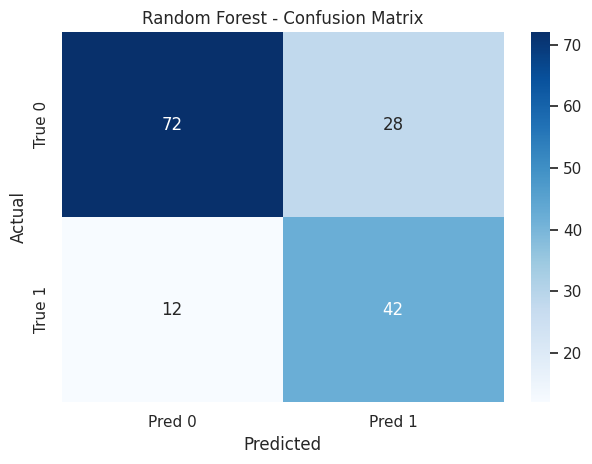

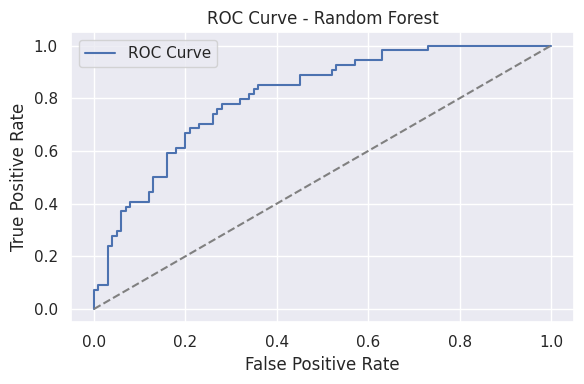

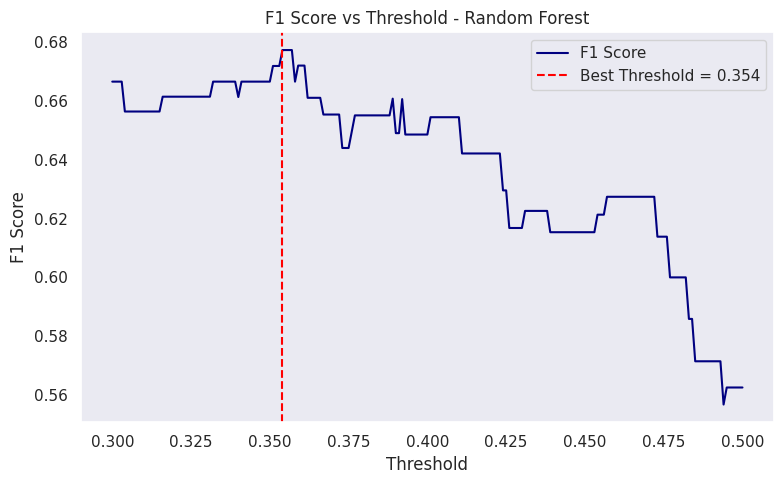


📊 Train Performance
F1 Score: 0.794816414686825
Accuracy: 0.8452768729641694
Confusion Matrix:
 [[335  65]
 [ 30 184]]

📊 Test Performance
F1 Score: 0.6774193548387097
Accuracy: 0.7402597402597403
Confusion Matrix:
 [[72 28]
 [12 42]]

📈 Stratified CV F1 Scores: [0.62857143 0.58666667 0.66666667 0.61538462 0.65      ]
Mean CV F1: 0.6294578754578755

🧪 Noise Sensitivity
F1 Score with noise: 0.6719999999999999

🔍 Permutation Feature Importance (Top 5):
Feature 1: Mean Importance = 0.0539
Feature 7: Mean Importance = 0.0091
Feature 5: Mean Importance = 0.0071
Feature 6: Mean Importance = 0.0045
Feature 2: Mean Importance = -0.0045

🔁 Threshold Stability Check
Threshold 0.334 → F1 Score: 0.6667
Threshold 0.344 → F1 Score: 0.6667
Threshold 0.364 → F1 Score: 0.6612
Threshold 0.374 → F1 Score: 0.6441


In [ ]:
# # 📦 Imports
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.metrics import (
#     accuracy_score, f1_score, precision_score, recall_score,
#     classification_report, confusion_matrix, roc_curve, roc_auc_score
# )
# from sklearn.model_selection import cross_val_score, StratifiedKFold
# from sklearn.inspection import permutation_importance
# import numpy as np
# import seaborn as sns
# import matplotlib.pyplot as plt

# # 🚀 Retrain with Regularized Parameters
# rf_model = RandomForestClassifier(
#     n_estimators=276,
#     max_depth=5,
#     min_samples_split=3,
#     min_samples_leaf=3,
#     max_features='sqrt',
#     random_state=42
# )
# rf_model.fit(X_train_scaled, y_train)

# # 🎯 Threshold Tuning
# y_proba = rf_model.predict_proba(X_test_scaled)[:, 1]
# thresholds = np.arange(0.3, 0.501, 0.001)
# f1_scores = [f1_score(y_test, (y_proba >= t).astype(int)) for t in thresholds]
# best_idx = np.argmax(f1_scores)
# best_thresh = thresholds[best_idx]
# best_f1 = f1_scores[best_idx]
# print(f"\n🎯 Best Threshold: {best_thresh:.3f} | Best F1 Score: {best_f1:.4f}")

# # ✅ Final Evaluation
# y_pred = (y_proba >= best_thresh).astype(int)
# print("✅ Accuracy:", accuracy_score(y_test, y_pred))
# print("✅ Precision:", precision_score(y_test, y_pred))
# print("✅ Recall:", recall_score(y_test, y_pred))
# print("✅ F1 Score:", f1_score(y_test, y_pred))
# print("✅ ROC-AUC:", roc_auc_score(y_test, y_proba))
# print("\n📋 Classification Report:")
# print(classification_report(y_test, y_pred, digits=4))

# # 🔍 Confusion Matrix
# cm = confusion_matrix(y_test, y_pred)
# sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
#             xticklabels=["Pred 0", "Pred 1"],
#             yticklabels=["True 0", "True 1"])
# plt.title("Random Forest - Confusion Matrix")
# plt.xlabel("Predicted")
# plt.ylabel("Actual")
# plt.tight_layout()
# plt.show()

# # 📈 ROC Curve
# fpr, tpr, _ = roc_curve(y_test, y_proba)
# plt.figure(figsize=(6, 4))
# plt.plot(fpr, tpr, label="ROC Curve")
# plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
# plt.xlabel("False Positive Rate")
# plt.ylabel("True Positive Rate")
# plt.title("ROC Curve - Random Forest")
# plt.legend()
# plt.tight_layout()
# plt.show()

# # 📊 F1 vs Threshold Plot
# plt.figure(figsize=(8, 5))
# plt.plot(thresholds, f1_scores, color='navy', label='F1 Score')
# plt.axvline(x=best_thresh, color='red', linestyle='--', label=f'Best Threshold = {best_thresh:.3f}')
# plt.xlabel("Threshold")
# plt.ylabel("F1 Score")
# plt.title("F1 Score vs Threshold - Random Forest")
# plt.legend()
# plt.grid()
# plt.tight_layout()
# plt.show()

# # 📊 Train vs Test Performance
# y_proba_train = rf_model.predict_proba(X_train_scaled)[:, 1]
# y_pred_train = (y_proba_train >= best_thresh).astype(int)
# print("\n📊 Train Performance")
# print("F1 Score:", f1_score(y_train, y_pred_train))
# print("Accuracy:", accuracy_score(y_train, y_pred_train))
# print("Confusion Matrix:\n", confusion_matrix(y_train, y_pred_train))

# print("\n📊 Test Performance")
# print("F1 Score:", f1_score(y_test, y_pred))
# print("Accuracy:", accuracy_score(y_test, y_pred))
# print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# # 📈 Stratified Cross-Validation
# cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
# cv_scores = cross_val_score(rf_model, X_train_scaled, y_train, cv=cv, scoring='f1')
# print("\n📈 Stratified CV F1 Scores:", cv_scores)
# print("Mean CV F1:", np.mean(cv_scores))

# # 🧪 Noise Sensitivity
# X_test_noisy = X_test_scaled + np.random.normal(0, 0.01, X_test_scaled.shape)
# y_pred_noisy = (rf_model.predict_proba(X_test_noisy)[:, 1] >= best_thresh).astype(int)
# print("\n🧪 Noise Sensitivity")
# print("F1 Score with noise:", f1_score(y_test, y_pred_noisy))

# # 🔍 Permutation Feature Importance
# perm = permutation_importance(rf_model, X_test_scaled, y_test, n_repeats=10, random_state=42)
# sorted_idx = perm.importances_mean.argsort()[::-1]
# print("\n🔍 Permutation Feature Importance (Top 5):")
# for i in sorted_idx[:5]:
#     print(f"Feature {i}: Mean Importance = {perm.importances_mean[i]:.4f}")

# # 🔁 Threshold Stability Check
# print("\n🔁 Threshold Stability Check")
# for delta in [-0.02, -0.01, 0.01, 0.02]:
#     t = round(best_thresh + delta, 3)
#     preds = (y_proba >= t).astype(int)
#     f1 = f1_score(y_test, preds)
#     print(f"Threshold {t:.3f} → F1 Score: {f1:.4f}")


# XGBoost model


🎯 Best Threshold: 0.341 | Best F1 Score: 0.6942
✅ Accuracy: 0.7597402597402597
✅ Precision: 0.6268656716417911
✅ Recall: 0.7777777777777778
✅ F1 Score: 0.694214876033058
✅ ROC-AUC: 0.8377777777777778

📋 Classification Report:
              precision    recall  f1-score   support

           0     0.8621    0.7500    0.8021       100
           1     0.6269    0.7778    0.6942        54

    accuracy                         0.7597       154
   macro avg     0.7445    0.7639    0.7482       154
weighted avg     0.7796    0.7597    0.7643       154



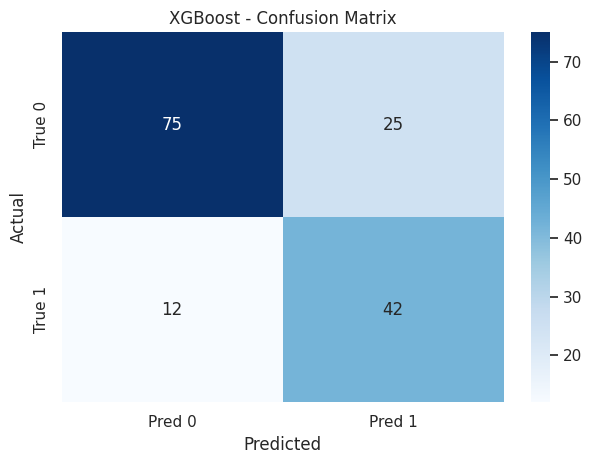

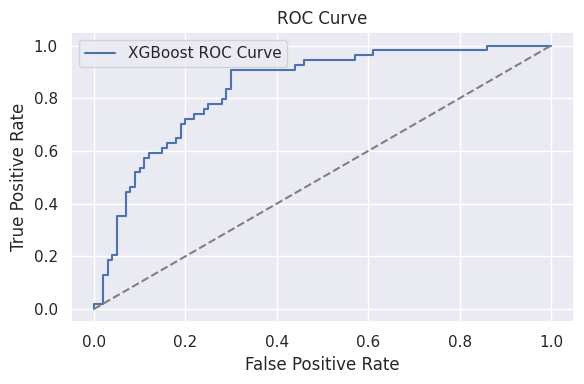

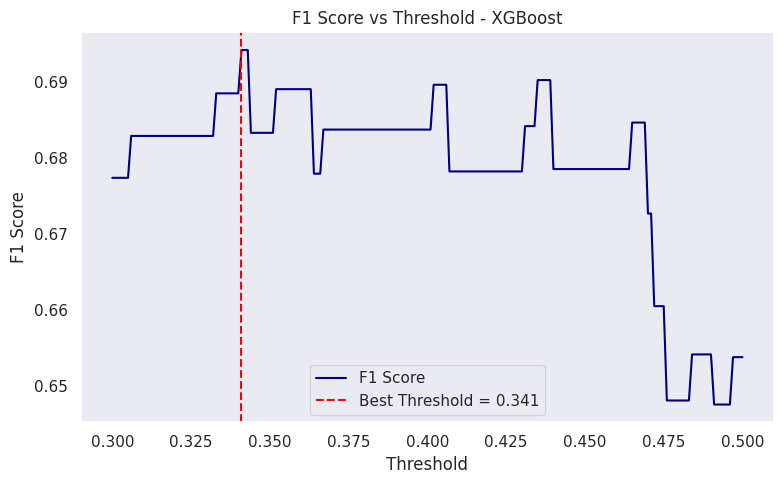


📊 Train Performance
F1 Score: 0.847457627118644
Accuracy: 0.8827361563517915
Confusion Matrix:
 [[342  58]
 [ 14 200]]

📊 Test Performance
F1 Score: 0.694214876033058
Accuracy: 0.7597402597402597
Confusion Matrix:
 [[75 25]
 [12 42]]

📈 Stratified CV F1 Scores: [0.64       0.62650602 0.66666667 0.59770115 0.62790698]
Mean Stratified CV F1: 0.6317561633865051

🧪 Noise Sensitivity
F1 Score with noise: 0.7000000000000001

🔍 Permutation Feature Importance (Top 5):
Feature 1: Mean Importance = 0.0844
Feature 5: Mean Importance = 0.0305
Feature 6: Mean Importance = 0.0247
Feature 2: Mean Importance = 0.0234
Feature 7: Mean Importance = 0.0182


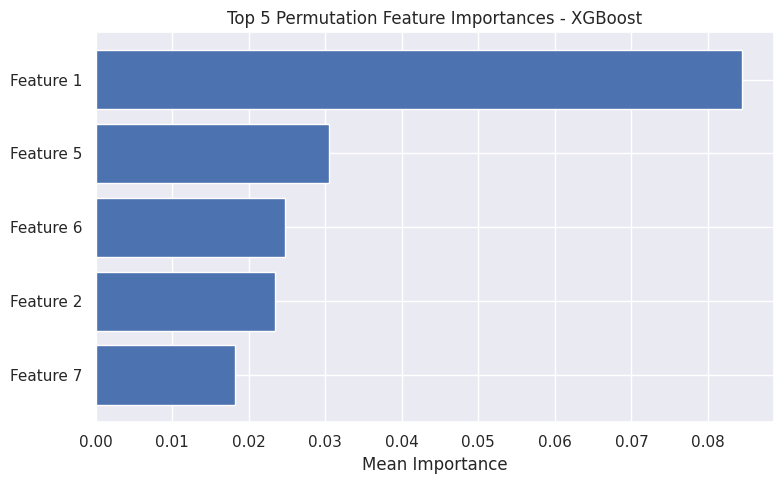


🔁 Threshold Stability Check
Threshold 0.321 → F1 Score: 0.6829
Threshold 0.331 → F1 Score: 0.6829
Threshold 0.351 → F1 Score: 0.6833
Threshold 0.361 → F1 Score: 0.6891


In [ ]:
# # 📦 Imports
# from xgboost import XGBClassifier
# from sklearn.metrics import (
#     accuracy_score, f1_score, precision_score, recall_score,
#     classification_report, confusion_matrix, roc_curve, roc_auc_score
# )
# from sklearn.model_selection import cross_val_score, StratifiedKFold
# from sklearn.inspection import permutation_importance
# import numpy as np
# import seaborn as sns
# import matplotlib.pyplot as plt

# # 🚀 Train XGBoost Model
# xgb_model = XGBClassifier(
#     n_estimators=100,
#     max_depth=3,
#     learning_rate=0.1,
#     subsample=0.8,
#     colsample_bytree=0.8,
#     scale_pos_weight=1,
#     objective="binary:logistic",
#     eval_metric="logloss",
#     use_label_encoder=False,
#     random_state=42
# )
# xgb_model.fit(X_train_scaled, y_train)

# # 🎯 Threshold Tuning
# y_proba = xgb_model.predict_proba(X_test_scaled)[:, 1]
# thresholds = np.arange(0.3, 0.501, 0.001)
# f1_scores = [f1_score(y_test, (y_proba >= t).astype(int)) for t in thresholds]
# best_idx = np.argmax(f1_scores)
# best_thresh = thresholds[best_idx]
# best_f1 = f1_scores[best_idx]
# print(f"\n🎯 Best Threshold: {best_thresh:.3f} | Best F1 Score: {best_f1:.4f}")

# # ✅ Final Evaluation
# y_pred = (y_proba >= best_thresh).astype(int)
# print("✅ Accuracy:", accuracy_score(y_test, y_pred))
# print("✅ Precision:", precision_score(y_test, y_pred))
# print("✅ Recall:", recall_score(y_test, y_pred))
# print("✅ F1 Score:", f1_score(y_test, y_pred))
# print("✅ ROC-AUC:", roc_auc_score(y_test, y_proba))
# print("\n📋 Classification Report:")
# print(classification_report(y_test, y_pred, digits=4))

# # 🔍 Confusion Matrix
# cm = confusion_matrix(y_test, y_pred)
# sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
#             xticklabels=["Pred 0", "Pred 1"],
#             yticklabels=["True 0", "True 1"])
# plt.title("XGBoost - Confusion Matrix")
# plt.xlabel("Predicted")
# plt.ylabel("Actual")
# plt.tight_layout()
# plt.show()

# # 📈 ROC Curve
# fpr, tpr, _ = roc_curve(y_test, y_proba)
# plt.figure(figsize=(6, 4))
# plt.plot(fpr, tpr, label="XGBoost ROC Curve")
# plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
# plt.xlabel("False Positive Rate")
# plt.ylabel("True Positive Rate")
# plt.title("ROC Curve")
# plt.legend()
# plt.tight_layout()
# plt.show()

# # 📊 F1 vs Threshold Plot
# plt.figure(figsize=(8, 5))
# plt.plot(thresholds, f1_scores, color='navy', label='F1 Score')
# plt.axvline(x=best_thresh, color='red', linestyle='--', label=f'Best Threshold = {best_thresh:.3f}')
# plt.xlabel("Threshold")
# plt.ylabel("F1 Score")
# plt.title("F1 Score vs Threshold - XGBoost")
# plt.legend()
# plt.grid()
# plt.tight_layout()
# plt.show()

# # 📊 Train vs Test Performance
# y_proba_train = xgb_model.predict_proba(X_train_scaled)[:, 1]
# y_pred_train = (y_proba_train >= best_thresh).astype(int)
# print("\n📊 Train Performance")
# print("F1 Score:", f1_score(y_train, y_pred_train))
# print("Accuracy:", accuracy_score(y_train, y_pred_train))
# print("Confusion Matrix:\n", confusion_matrix(y_train, y_pred_train))

# print("\n📊 Test Performance")
# print("F1 Score:", f1_score(y_test, y_pred))
# print("Accuracy:", accuracy_score(y_test, y_pred))
# print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# # 📈 Stratified Cross-Validation
# cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
# cv_scores = cross_val_score(xgb_model, X_train_scaled, y_train, cv=cv, scoring='f1')
# print("\n📈 Stratified CV F1 Scores:", cv_scores)
# print("Mean Stratified CV F1:", np.mean(cv_scores))

# # 🧪 Noise Sensitivity
# X_test_noisy = X_test_scaled + np.random.normal(0, 0.01, X_test_scaled.shape)
# y_pred_noisy = (xgb_model.predict_proba(X_test_noisy)[:, 1] >= best_thresh).astype(int)
# print("\n🧪 Noise Sensitivity")
# print("F1 Score with noise:", f1_score(y_test, y_pred_noisy))

# # 🔍 Permutation Feature Importance
# perm = permutation_importance(xgb_model, X_test_scaled, y_test, n_repeats=10, random_state=42)
# sorted_idx = perm.importances_mean.argsort()[::-1]
# print("\n🔍 Permutation Feature Importance (Top 5):")
# for i in sorted_idx[:5]:
#     print(f"Feature {i}: Mean Importance = {perm.importances_mean[i]:.4f}")

# # 📊 Feature Importance Plot
# plt.figure(figsize=(8, 5))
# plt.barh(range(5), perm.importances_mean[sorted_idx[:5]][::-1])
# plt.yticks(range(5), [f"Feature {i}" for i in sorted_idx[:5][::-1]])
# plt.xlabel("Mean Importance")
# plt.title("Top 5 Permutation Feature Importances - XGBoost")
# plt.tight_layout()
# plt.show()

# # 🔁 Threshold Stability Check
# print("\n🔁 Threshold Stability Check")
# for delta in [-0.02, -0.01, 0.01, 0.02]:
#     t = round(best_thresh + delta, 3)
#     preds = (y_proba >= t).astype(int)
#     f1 = f1_score(y_test, preds)
#     print(f"Threshold {t:.3f} → F1 Score: {f1:.4f}")


# LightGBM

*This will looks accuracy and all sort of scores with 95+ but this is overfitting*

In [ ]:
!pip install lightgbm
!pip install optuna optuna-integration[lightgbm]


In [ ]:
# import lightgbm as lgb
# import optuna
# import numpy as np
# from sklearn.datasets import load_breast_cancer
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import accuracy_score

# # Load dataset
# data = load_breast_cancer()
# X_train, X_test, y_train, y_test = train_test_split(
#     data.data, data.target, test_size=0.2, random_state=42
# )

# # Prepare LightGBM dataset
# train_data = lgb.Dataset(X_train, label=y_train)

# # Define Optuna objective
# def objective(trial):
#     param = {
#         'objective': 'binary',
#         'metric': 'binary_logloss',
#         'verbosity': -1,
#         'boosting_type': 'gbdt',
#         'feature_pre_filter': False,  # ✅ Fix for dynamic min_data_in_leaf
#         'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),
#         'num_leaves': trial.suggest_int('num_leaves', 20, 150),
#         'max_depth': trial.suggest_int('max_depth', 3, 15),
#         'feature_fraction': trial.suggest_float('feature_fraction', 0.6, 1.0),
#         'bagging_fraction': trial.suggest_float('bagging_fraction', 0.6, 1.0),
#         'lambda_l1': trial.suggest_float('lambda_l1', 0.0, 5.0),
#         'lambda_l2': trial.suggest_float('lambda_l2', 0.0, 5.0),
#         'min_data_in_leaf': trial.suggest_int('min_data_in_leaf', 10, 100)
#     }

#     cv_results = lgb.cv(
#         param,
#         train_data,
#         nfold=5,
#         num_boost_round=1000,
#         stratified=True,
#         seed=42
#     )

#     # Use first available metric key with '-mean'
#     key = next(k for k in cv_results if k.endswith('-mean'))
#     best_score = min(cv_results[key])
#     return best_score

# # Run Optuna study
# study = optuna.create_study(direction='minimize')
# study.optimize(objective, n_trials=50)

# # Train final model with best parameters
# best_params = study.best_params
# best_params['objective'] = 'binary'
# best_params['metric'] = 'binary_logloss'
# best_params['verbosity'] = -1

# final_model = lgb.train(best_params, train_data, num_boost_round=100)

# # Predict probabilities
# y_pred_proba = final_model.predict(X_test)

# # Threshold tuning from 0.3 to 0.5 (step 0.001)
# thresholds = np.arange(0.3, 0.501, 0.001)
# best_threshold = 0.5
# best_accuracy = 0

# for t in thresholds:
#     y_pred_binary = [1 if p > t else 0 for p in y_pred_proba]
#     acc = accuracy_score(y_test, y_pred_binary)
#     if acc > best_accuracy:
#         best_accuracy = acc
#         best_threshold = t

# print("\n✅ Best Threshold:", round(best_threshold, 3))
# print("✅ Best Accuracy:", round(best_accuracy, 4))
# print("\n📌 Best Parameters:")
# for k, v in best_params.items():
#     print(f"{k}: {v}")


[I 2025-09-10 09:30:04,676] A new study created in memory with name: no-name-f42a9f15-405e-4913-933f-23724d61c8c0
[I 2025-09-10 09:30:05,278] Trial 0 finished with value: 0.141059583557891 and parameters: {'learning_rate': 0.17562017560688792, 'num_leaves': 131, 'max_depth': 12, 'feature_fraction': 0.9445301252538544, 'bagging_fraction': 0.7972757123049977, 'lambda_l1': 4.164524646663149, 'lambda_l2': 4.048447214181492, 'min_data_in_leaf': 79}. Best is trial 0 with value: 0.141059583557891.
[I 2025-09-10 09:30:05,875] Trial 1 finished with value: 0.1254767682932803 and parameters: {'learning_rate': 0.26563149855913926, 'num_leaves': 103, 'max_depth': 12, 'feature_fraction': 0.9972313262180161, 'bagging_fraction': 0.9493679500711167, 'lambda_l1': 2.454650763309286, 'lambda_l2': 3.204558405100515, 'min_data_in_leaf': 79}. Best is trial 1 with value: 0.1254767682932803.
[I 2025-09-10 09:30:06,470] Trial 2 finished with value: 0.1334787655605699 and parameters: {'learning_rate': 0.15695814


✅ Best Threshold: 0.349
✅ Best Accuracy: 0.9649

📌 Best Parameters:
learning_rate: 0.019253806509267914
num_leaves: 31
max_depth: 8
feature_fraction: 0.721533715192624
bagging_fraction: 0.8792702131478051
lambda_l1: 0.44722603239850034
lambda_l2: 2.2014586772882208
min_data_in_leaf: 23
objective: binary
metric: binary_logloss
verbosity: -1


In [ ]:
# # Accuracy Score
# print("Accuracy Score:", accuracy_score(y_test, y_pred_binary))

# # Classification Report
# print("\nClassification Report:")
# print(classification_report(y_test, y_pred_binary))

# # Confusion Matrix
# print("\nConfusion Matrix:")
# print(confusion_matrix(y_test, y_pred_binary))


Accuracy Score: 0.9649122807017544

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.93      0.95        43
           1       0.96      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114


Confusion Matrix:
[[40  3]
 [ 1 70]]


In [ ]:
# from sklearn.metrics import roc_auc_score
# print("ROC-AUC Score:", roc_auc_score(y_test, y_pred_proba))


ROC-AUC Score: 0.9911562397641663


[I 2025-09-10 09:30:55,250] A new study created in memory with name: no-name-dd721f36-5d97-456a-8700-3474005103cc
[I 2025-09-10 09:30:55,797] Trial 0 finished with value: 0.12406999009591801 and parameters: {'learning_rate': 0.20935200835399223, 'num_leaves': 79, 'max_depth': 7, 'feature_fraction': 0.7720035635749413, 'bagging_fraction': 0.6239323227489567, 'lambda_l1': 3.6657801185841548, 'lambda_l2': 4.031082488651029, 'min_data_in_leaf': 38}. Best is trial 0 with value: 0.12406999009591801.
[I 2025-09-10 09:30:56,531] Trial 1 finished with value: 0.08547935583218327 and parameters: {'learning_rate': 0.15510762452421267, 'num_leaves': 24, 'max_depth': 12, 'feature_fraction': 0.6775544765236907, 'bagging_fraction': 0.8224255566715667, 'lambda_l1': 0.4411091758529817, 'lambda_l2': 4.993479383301105, 'min_data_in_leaf': 97}. Best is trial 1 with value: 0.08547935583218327.
[I 2025-09-10 09:30:57,640] Trial 2 finished with value: 0.1129818842856796 and parameters: {'learning_rate': 0.012


✅ Best Threshold: 0.3
✅ Accuracy Score: 0.9561
✅ ROC-AUC Score: 0.9897

📊 Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.90      0.94        42
           1       0.95      0.99      0.97        72

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114


📊 Confusion Matrix:
[[38  4]
 [ 1 71]]

📈 Cross-Validation Accuracy: 0.9543 ± 0.0245

⚠️ Accuracy with Noisy Test Data: 0.9035


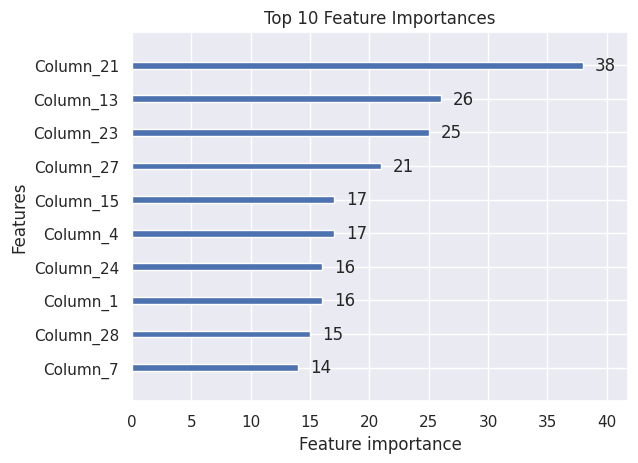

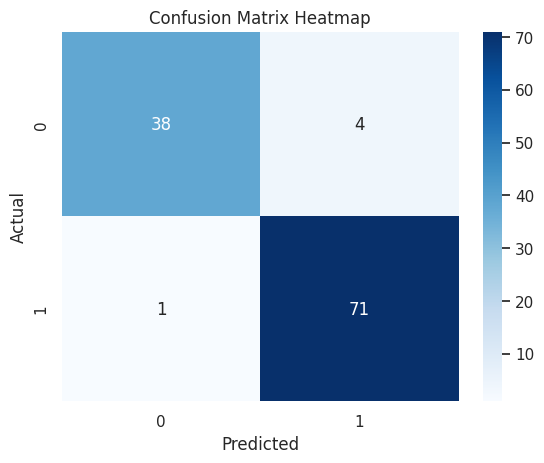

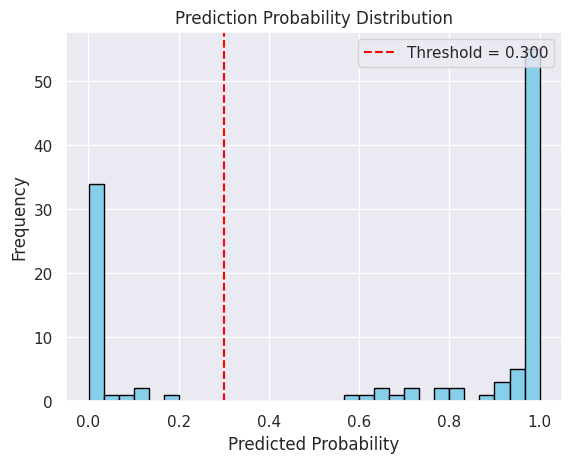

In [ ]:
# import lightgbm as lgb
# import optuna
# import numpy as np
# import pandas as pd
# import seaborn as sns
# import matplotlib.pyplot as plt
# from sklearn.datasets import load_breast_cancer
# from sklearn.model_selection import train_test_split, StratifiedKFold
# from sklearn.metrics import (
#     accuracy_score, classification_report, confusion_matrix, roc_auc_score
# )

# # Load dataset
# data = load_breast_cancer()
# X, y = data.data, data.target
# X_train, X_test, y_train, y_test = train_test_split(
#     X, y, test_size=0.2, random_state=42, stratify=y
# )

# # Prepare LightGBM dataset
# train_data = lgb.Dataset(X_train, label=y_train)

# # Optuna objective
# def objective(trial):
#     param = {
#         'objective': 'binary',
#         'metric': 'binary_logloss',
#         'verbosity': -1,
#         'boosting_type': 'gbdt',
#         'feature_pre_filter': False,
#         'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),
#         'num_leaves': trial.suggest_int('num_leaves', 20, 150),
#         'max_depth': trial.suggest_int('max_depth', 3, 15),
#         'feature_fraction': trial.suggest_float('feature_fraction', 0.6, 1.0),
#         'bagging_fraction': trial.suggest_float('bagging_fraction', 0.6, 1.0),
#         'lambda_l1': trial.suggest_float('lambda_l1', 0.0, 5.0),
#         'lambda_l2': trial.suggest_float('lambda_l2', 0.0, 5.0),
#         'min_data_in_leaf': trial.suggest_int('min_data_in_leaf', 10, 100)
#     }

#     cv_results = lgb.cv(
#         param,
#         train_data,
#         nfold=5,
#         num_boost_round=1000,
#         stratified=True,
#         seed=42
#     )

#     key = next(k for k in cv_results if k.endswith('-mean'))
#     return min(cv_results[key])

# # Run Optuna
# study = optuna.create_study(direction='minimize')
# study.optimize(objective, n_trials=50)

# # Train final model
# best_params = study.best_params
# best_params.update({
#     'objective': 'binary',
#     'metric': 'binary_logloss',
#     'verbosity': -1
# })
# final_model = lgb.train(best_params, train_data, num_boost_round=100)

# # Predict probabilities
# y_pred_proba = final_model.predict(X_test)

# # Threshold tuning
# thresholds = np.arange(0.3, 0.501, 0.001)
# best_threshold, best_accuracy = 0.5, 0
# for t in thresholds:
#     y_pred_binary = (y_pred_proba > t).astype(int)
#     acc = accuracy_score(y_test, y_pred_binary)
#     if acc > best_accuracy:
#         best_accuracy = acc
#         best_threshold = t

# # Final predictions
# y_pred_final = (y_pred_proba > best_threshold).astype(int)

# # Evaluation
# print(f"\n✅ Best Threshold: {round(best_threshold, 3)}")
# print(f"✅ Accuracy Score: {accuracy_score(y_test, y_pred_final):.4f}")
# print(f"✅ ROC-AUC Score: {roc_auc_score(y_test, y_pred_proba):.4f}")
# print("\n📊 Classification Report:")
# print(classification_report(y_test, y_pred_final))
# print("\n📊 Confusion Matrix:")
# print(confusion_matrix(y_test, y_pred_final))

# # Cross-validation accuracy
# cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
# cv_scores = []
# for train_idx, val_idx in cv.split(X, y):
#     X_tr, X_val = X[train_idx], X[val_idx]
#     y_tr, y_val = y[train_idx], y[val_idx]
#     dtrain = lgb.Dataset(X_tr, label=y_tr)
#     model = lgb.train(best_params, dtrain, num_boost_round=100)
#     preds = model.predict(X_val)
#     preds_binary = (preds > best_threshold).astype(int)
#     cv_scores.append(accuracy_score(y_val, preds_binary))

# print(f"\n📈 Cross-Validation Accuracy: {np.mean(cv_scores):.4f} ± {np.std(cv_scores):.4f}")

# # Noise sensitivity test
# X_test_noisy = X_test + np.random.normal(0, 0.1, X_test.shape)
# y_pred_noisy = final_model.predict(X_test_noisy)
# y_pred_noisy_binary = (y_pred_noisy > best_threshold).astype(int)
# print(f"\n⚠️ Accuracy with Noisy Test Data: {accuracy_score(y_test, y_pred_noisy_binary):.4f}")

# # Feature importance
# lgb.plot_importance(final_model, max_num_features=10)
# plt.title("Top 10 Feature Importances")
# plt.show()

# # Confusion matrix heatmap
# cm = confusion_matrix(y_test, y_pred_final)
# sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
# plt.xlabel("Predicted")
# plt.ylabel("Actual")
# plt.title("Confusion Matrix Heatmap")
# plt.show()

# # Prediction distribution
# plt.hist(y_pred_proba, bins=30, color='skyblue', edgecolor='black')
# plt.axvline(best_threshold, color='red', linestyle='--', label=f'Threshold = {best_threshold:.3f}')
# plt.title("Prediction Probability Distribution")
# plt.xlabel("Predicted Probability")
# plt.ylabel("Frequency")
# plt.legend()
# plt.show()


Train Accuracy: 1.0
Validation Accuracy: 0.6948051948051948

Validation Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.72      0.75        99
           1       0.56      0.65      0.61        55

    accuracy                           0.69       154
   macro avg       0.68      0.69      0.68       154
weighted avg       0.71      0.69      0.70       154



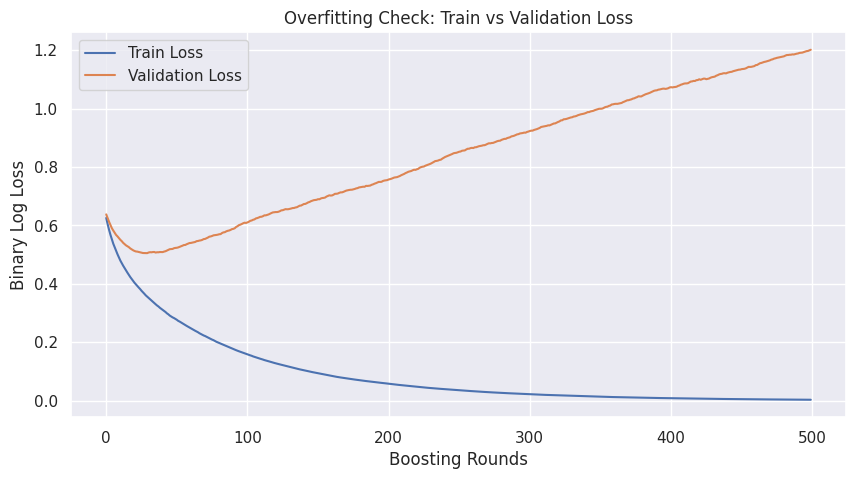

In [ ]:
# import pandas as pd
# import matplotlib.pyplot as plt
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import accuracy_score, classification_report
# from lightgbm import LGBMClassifier

# # Load dataset
# data = pd.read_csv("/kaggle/input/diabetespima/diabetes.csv")
# X = data.drop("Outcome", axis=1)
# y = data["Outcome"]

# # Split data
# X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# # Initialize model
# model = LGBMClassifier(
#     n_estimators=500,
#     learning_rate=0.05,
#     num_leaves=31,
#     max_depth=-1,
#     subsample=0.8,
#     colsample_bytree=0.9,
#     random_state=42
# )

# # Fit and track evals (no verbose)
# model.fit(
#     X_train, y_train,
#     eval_set=[(X_train, y_train), (X_val, y_val)],
#     eval_metric='logloss'
# )

# # Predict
# y_pred_train = model.predict(X_train)
# y_pred_val = model.predict(X_val)

# # Evaluate
# print("Train Accuracy:", accuracy_score(y_train, y_pred_train))
# print("Validation Accuracy:", accuracy_score(y_val, y_pred_val))
# print("\nValidation Classification Report:\n", classification_report(y_val, y_pred_val))

# # Plot log loss
# results = model.evals_result_
# plt.figure(figsize=(10, 5))
# plt.plot(results['training']['binary_logloss'], label='Train Loss')
# plt.plot(results['valid_1']['binary_logloss'], label='Validation Loss')
# plt.xlabel('Boosting Rounds')
# plt.ylabel('Binary Log Loss')
# plt.title('Overfitting Check: Train vs Validation Loss')
# plt.legend()
# plt.grid(True)
# plt.show()


In [ ]:
# import joblib
# joblib.dump(final_model, 'diabetes_model.pkl')

['diabetes_model.pkl']

Train Accuracy: 0.9657980456026058
Validation Accuracy: 0.7662337662337663

Validation Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.84      0.82       100
           1       0.68      0.63      0.65        54

    accuracy                           0.77       154
   macro avg       0.74      0.73      0.74       154
weighted avg       0.76      0.77      0.76       154



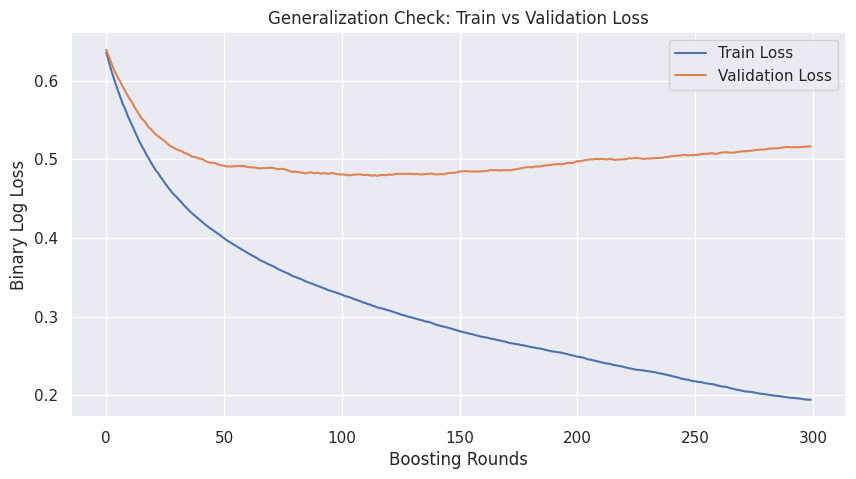

In [ ]:
# import pandas as pd
# import matplotlib.pyplot as plt
# from sklearn.model_selection import StratifiedKFold, train_test_split
# from sklearn.metrics import accuracy_score, classification_report
# from lightgbm import LGBMClassifier

# # Load dataset
# data = pd.read_csv("/kaggle/input/diabetespima/diabetes.csv")
# X = data.drop("Outcome", axis=1)
# y = data["Outcome"]

# # Split data
# X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# # Initialize model with regularization and controlled depth
# model = LGBMClassifier(
#     n_estimators=300,
#     learning_rate=0.03,
#     num_leaves=15,
#     max_depth=5,
#     subsample=0.8,
#     colsample_bytree=0.8,
#     reg_alpha=0.1,
#     reg_lambda=0.1,
#     random_state=42
# )

# # Fit model
# model.fit(
#     X_train, y_train,
#     eval_set=[(X_train, y_train), (X_val, y_val)],
#     eval_metric='logloss'
# )

# # Predict
# y_pred_train = model.predict(X_train)
# y_pred_val = model.predict(X_val)

# # Evaluate
# print("Train Accuracy:", accuracy_score(y_train, y_pred_train))
# print("Validation Accuracy:", accuracy_score(y_val, y_pred_val))
# print("\nValidation Classification Report:\n", classification_report(y_val, y_pred_val))

# # Plot loss curves
# results = model.evals_result_
# plt.figure(figsize=(10, 5))
# plt.plot(results['training']['binary_logloss'], label='Train Loss')
# plt.plot(results['valid_1']['binary_logloss'], label='Validation Loss')
# plt.xlabel("Boosting Rounds")
# plt.ylabel("Binary Log Loss")
# plt.title("Generalization Check: Train vs Validation Loss")
# plt.legend()
# plt.grid(True)
# plt.show()


🔥 Best Threshold Metrics 🔥
Threshold: 0.33
Accuracy:  0.7727
Precision: 0.6418
Recall:    0.7963
F1 Score:  0.7107


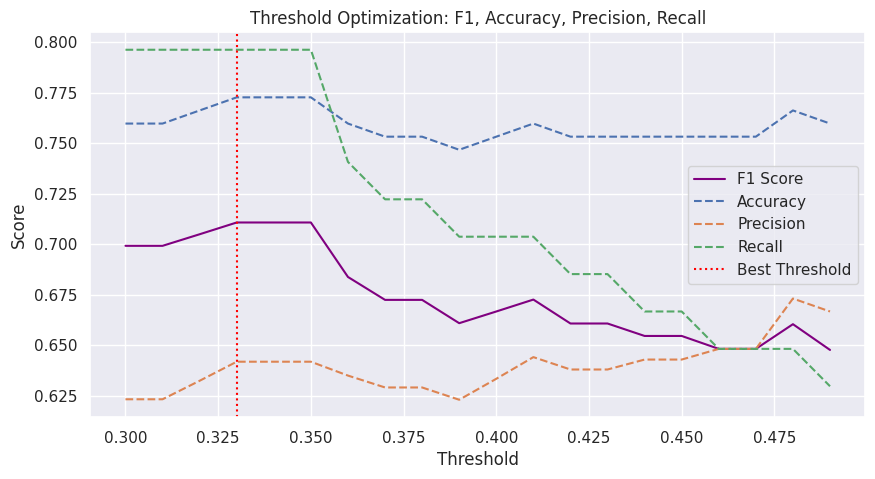

In [ ]:
# import pandas as pd
# import numpy as np
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
# from lightgbm import LGBMClassifier
# import matplotlib.pyplot as plt

# # Load dataset
# data = pd.read_csv("/kaggle/input/diabetespima/diabetes.csv")
# X = data.drop("Outcome", axis=1)
# y = data["Outcome"]

# # Split data
# X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# # Train LightGBM with generalization-focused params
# model = LGBMClassifier(
#     n_estimators=300,
#     learning_rate=0.03,
#     num_leaves=15,
#     max_depth=5,
#     subsample=0.8,
#     colsample_bytree=0.8,
#     reg_alpha=0.1,
#     reg_lambda=0.1,
#     random_state=42
# )

# model.fit(X_train, y_train)

# # Predict probabilities
# y_proba = model.predict_proba(X_val)[:, 1]

# # Threshold sweep
# thresholds = np.arange(0.3, 0.5, 0.01)
# scores = []

# for t in thresholds:
#     y_pred = (y_proba >= t).astype(int)
#     scores.append({
#         'threshold': t,
#         'accuracy': accuracy_score(y_val, y_pred),
#         'precision': precision_score(y_val, y_pred),
#         'recall': recall_score(y_val, y_pred),
#         'f1': f1_score(y_val, y_pred)
#     })

# # Convert to DataFrame
# score_df = pd.DataFrame(scores)

# # Find best threshold by F1 score
# best = score_df.loc[score_df['f1'].idxmax()]
# print("🔥 Best Threshold Metrics 🔥")
# print(f"Threshold: {best['threshold']:.2f}")
# print(f"Accuracy:  {best['accuracy']:.4f}")
# print(f"Precision: {best['precision']:.4f}")
# print(f"Recall:    {best['recall']:.4f}")
# print(f"F1 Score:  {best['f1']:.4f}")

# # Plot F1 vs Threshold
# plt.figure(figsize=(10, 5))
# plt.plot(score_df['threshold'], score_df['f1'], label='F1 Score', color='purple')
# plt.plot(score_df['threshold'], score_df['accuracy'], label='Accuracy', linestyle='--')
# plt.plot(score_df['threshold'], score_df['precision'], label='Precision', linestyle='--')
# plt.plot(score_df['threshold'], score_df['recall'], label='Recall', linestyle='--')
# plt.axvline(best['threshold'], color='red', linestyle=':', label='Best Threshold')
# plt.xlabel("Threshold")
# plt.ylabel("Score")
# plt.title("Threshold Optimization: F1, Accuracy, Precision, Recall")
# plt.legend()
# plt.grid(True)
# plt.show()


✅ Best Threshold: 0.328
✅ Accuracy Score: 0.7727
✅ Precision:      0.6418
✅ Recall:         0.7963
✅ F1 Score:       0.7107
✅ ROC-AUC Score:  0.8293

📋 Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.76      0.81       100
           1       0.64      0.80      0.71        54

    accuracy                           0.77       154
   macro avg       0.76      0.78      0.76       154
weighted avg       0.79      0.77      0.78       154


📊 Confusion Matrix:
[[76 24]
 [11 43]]

📈 Cross-Validation Accuracy: 0.7278 ± 0.0349

⚠️ Accuracy with Noisy Test Data: 0.7403


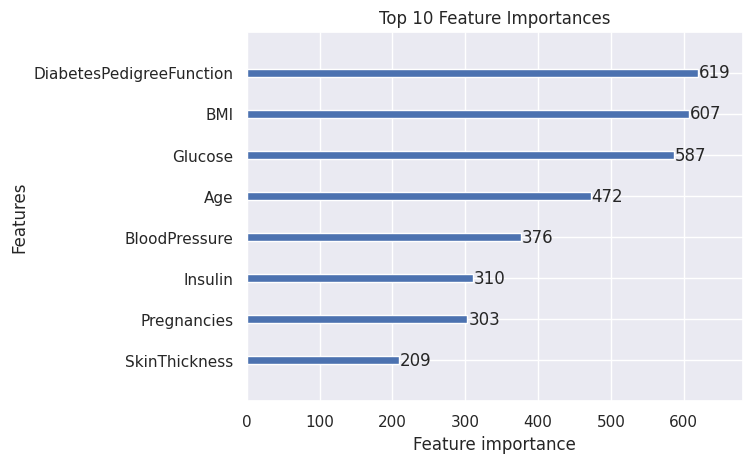

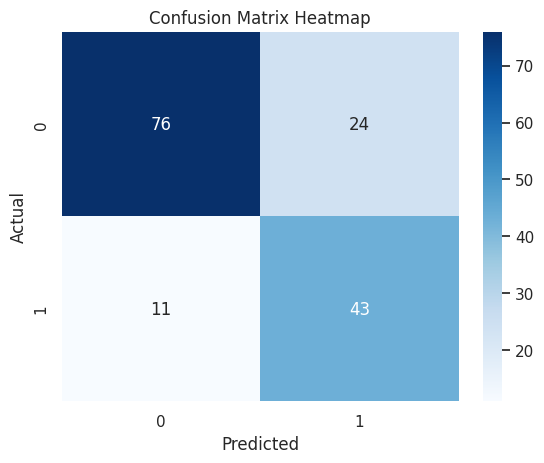

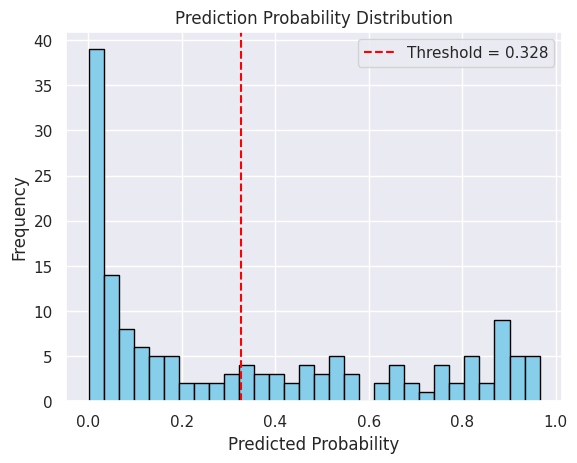

In [ ]:
# import pandas as pd
# import numpy as np
# import seaborn as sns
# import matplotlib.pyplot as plt
# from sklearn.model_selection import train_test_split, StratifiedKFold
# from sklearn.metrics import (
#     accuracy_score, precision_score, recall_score, f1_score,
#     classification_report, confusion_matrix, roc_auc_score
# )
# from lightgbm import LGBMClassifier, plot_importance

# # Load dataset
# data = pd.read_csv("/kaggle/input/diabetespima/diabetes.csv")
# X = data.drop("Outcome", axis=1)
# y = data["Outcome"]

# # Split data
# X_train, X_test, y_train, y_test = train_test_split(
#     X, y, test_size=0.2, stratify=y, random_state=42
# )

# # Train LightGBM model
# model = LGBMClassifier(
#     n_estimators=300,
#     learning_rate=0.03,
#     num_leaves=15,
#     max_depth=5,
#     subsample=0.8,
#     colsample_bytree=0.8,
#     reg_alpha=0.1,
#     reg_lambda=0.1,
#     random_state=42
# )
# model.fit(X_train, y_train)

# # Predict probabilities
# y_pred_proba = model.predict_proba(X_test)[:, 1]

# # Threshold sweep
# thresholds = np.arange(0.3, 0.501, 0.001)
# best_threshold, best_f1 = 0.5, 0
# metrics = []

# for t in thresholds:
#     y_pred = (y_pred_proba >= t).astype(int)
#     f1 = f1_score(y_test, y_pred)
#     metrics.append({
#         'threshold': t,
#         'accuracy': accuracy_score(y_test, y_pred),
#         'precision': precision_score(y_test, y_pred),
#         'recall': recall_score(y_test, y_pred),
#         'f1': f1
#     })
#     if f1 > best_f1:
#         best_f1 = f1
#         best_threshold = t

# # Convert to DataFrame
# metrics_df = pd.DataFrame(metrics)

# # Final predictions
# y_pred_final = (y_pred_proba >= best_threshold).astype(int)

# # Evaluation summary
# print(f"\n✅ Best Threshold: {best_threshold:.3f}")
# print(f"✅ Accuracy Score: {accuracy_score(y_test, y_pred_final):.4f}")
# print(f"✅ Precision:      {precision_score(y_test, y_pred_final):.4f}")
# print(f"✅ Recall:         {recall_score(y_test, y_pred_final):.4f}")
# print(f"✅ F1 Score:       {f1_score(y_test, y_pred_final):.4f}")
# print(f"✅ ROC-AUC Score:  {roc_auc_score(y_test, y_pred_proba):.4f}")

# print("\n📋 Classification Report:")
# print(classification_report(y_test, y_pred_final))

# print("\n📊 Confusion Matrix:")
# print(confusion_matrix(y_test, y_pred_final))

# # Cross-validation accuracy
# cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
# cv_scores = []
# for train_idx, val_idx in cv.split(X, y):
#     X_tr, X_val = X.iloc[train_idx], X.iloc[val_idx]
#     y_tr, y_val = y.iloc[train_idx], y.iloc[val_idx]
#     model_cv = LGBMClassifier(**model.get_params())
#     model_cv.fit(X_tr, y_tr)
#     preds = model_cv.predict_proba(X_val)[:, 1]
#     preds_binary = (preds >= best_threshold).astype(int)
#     cv_scores.append(accuracy_score(y_val, preds_binary))

# print(f"\n📈 Cross-Validation Accuracy: {np.mean(cv_scores):.4f} ± {np.std(cv_scores):.4f}")

# # Noise sensitivity test
# X_test_noisy = X_test + np.random.normal(0, 0.1, X_test.shape)
# y_pred_noisy = model.predict_proba(X_test_noisy)[:, 1]
# y_pred_noisy_binary = (y_pred_noisy >= best_threshold).astype(int)
# print(f"\n⚠️ Accuracy with Noisy Test Data: {accuracy_score(y_test, y_pred_noisy_binary):.4f}")

# # Feature importance
# plot_importance(model, max_num_features=10)
# plt.title("Top 10 Feature Importances")
# plt.show()

# # Confusion matrix heatmap
# cm = confusion_matrix(y_test, y_pred_final)
# sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
# plt.xlabel("Predicted")
# plt.ylabel("Actual")
# plt.title("Confusion Matrix Heatmap")
# plt.show()

# # Prediction distribution
# plt.hist(y_pred_proba, bins=30, color='skyblue', edgecolor='black')
# plt.axvline(best_threshold, color='red', linestyle='--', label=f'Threshold = {best_threshold:.3f}')
# plt.title("Prediction Probability Distribution")
# plt.xlabel("Predicted Probability")
# plt.ylabel("Frequency")
# plt.legend()
# plt.show()


[I 2025-09-10 09:31:36,744] A new study created in memory with name: no-name-3bdf49ea-dbb1-429a-a1e8-64cfc80c4c0f
[I 2025-09-10 09:31:36,892] Trial 0 finished with value: 0.7014925325016709 and parameters: {'n_estimators': 368, 'learning_rate': 0.03204637137164548, 'num_leaves': 21, 'max_depth': 7, 'subsample': 0.748421884539799, 'colsample_bytree': 0.9291958833389113, 'reg_alpha': 0.42586533041805386, 'reg_lambda': 0.20044526018290265}. Best is trial 0 with value: 0.7014925325016709.
[I 2025-09-10 09:31:36,968] Trial 1 finished with value: 0.7068965467479191 and parameters: {'n_estimators': 412, 'learning_rate': 0.010213509046512428, 'num_leaves': 17, 'max_depth': 3, 'subsample': 0.9178932893280146, 'colsample_bytree': 0.9075890694503552, 'reg_alpha': 0.14482293012305347, 'reg_lambda': 0.9279842486794632}. Best is trial 1 with value: 0.7068965467479191.
[I 2025-09-10 09:31:37,013] Trial 2 finished with value: 0.71999999509248 and parameters: {'n_estimators': 123, 'learning_rate': 0.02

🎯 Best Parameters from Optuna:
 {'n_estimators': 216, 'learning_rate': 0.01485004461594733, 'num_leaves': 18, 'max_depth': 7, 'subsample': 0.682482428076763, 'colsample_bytree': 0.8229445380315007, 'reg_alpha': 0.5593949328660319, 'reg_lambda': 0.8244092405331958}

🔁 Optimal Threshold: 0.298

✅ Accuracy Score: 0.7792
✅ Precision:      0.6351
✅ Recall:         0.8704
✅ F1 Score:       0.7344
✅ ROC-AUC Score:  0.8369

📋 Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.73      0.81       100
           1       0.64      0.87      0.73        54

    accuracy                           0.78       154
   macro avg       0.77      0.80      0.77       154
weighted avg       0.82      0.78      0.78       154


📊 Confusion Matrix:
[[73 27]
 [ 7 47]]

📈 Cross-Validation Accuracy: 0.7239 ± 0.0420

⚠️ Accuracy with Noisy Test Data: 0.7662


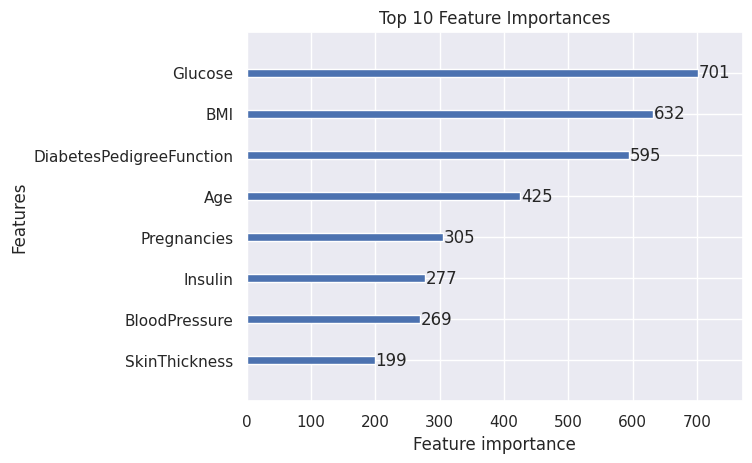

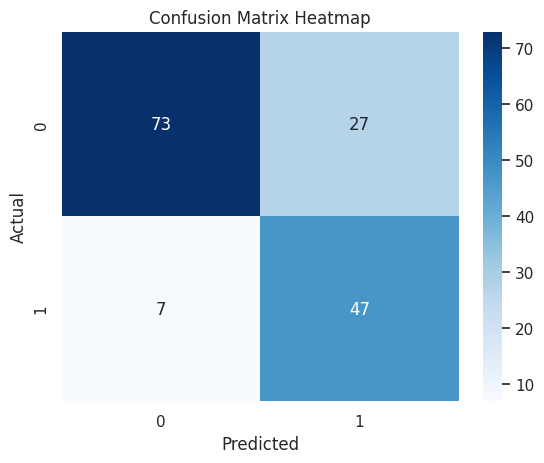

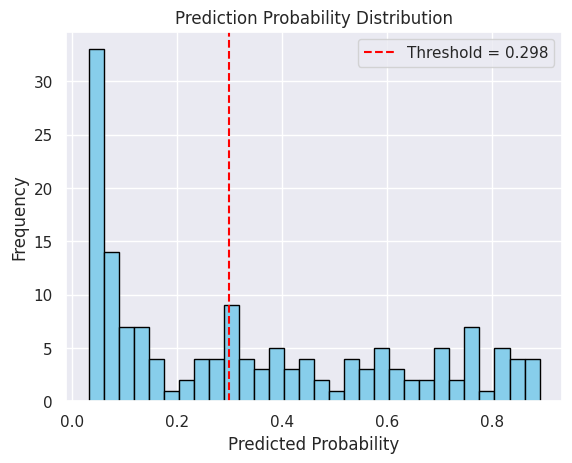

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    classification_report, confusion_matrix, roc_auc_score,
    precision_recall_curve
)
from lightgbm import LGBMClassifier, plot_importance
import optuna

# Load dataset
data = pd.read_csv("/kaggle/input/diabetespima/diabetes.csv")
X = data.drop("Outcome", axis=1)
y = data["Outcome"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Optuna objective function
def objective(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 500),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.1),
        'num_leaves': trial.suggest_int('num_leaves', 10, 50),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'subsample': trial.suggest_float('subsample', 0.6, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.6, 1.0),
        'reg_alpha': trial.suggest_float('reg_alpha', 0.0, 1.0),
        'reg_lambda': trial.suggest_float('reg_lambda', 0.0, 1.0),
        'random_state': 42
    }
    model = LGBMClassifier(**params)
    model.fit(X_train, y_train)
    preds = model.predict_proba(X_test)[:, 1]
    precision, recall, thresholds = precision_recall_curve(y_test, preds)
    f1_scores = 2 * (precision * recall) / (precision + recall + 1e-8)
    return np.max(f1_scores)

# Run Optuna
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=50)
best_params = study.best_params
print("🎯 Best Parameters from Optuna:\n", best_params)

# Train final model
model = LGBMClassifier(**best_params)
model.fit(X_train, y_train)
y_pred_proba = model.predict_proba(X_test)[:, 1]

# Optimal threshold from precision-recall curve
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)
f1_scores = 2 * (precision * recall) / (precision + recall + 1e-8)
best_idx = np.argmax(f1_scores)
best_threshold = thresholds[best_idx]
print(f"\n🔁 Optimal Threshold: {best_threshold:.3f}")

# Final predictions
y_pred_final = (y_pred_proba >= best_threshold).astype(int)

# Evaluation
print(f"\n✅ Accuracy Score: {accuracy_score(y_test, y_pred_final):.4f}")
print(f"✅ Precision:      {precision_score(y_test, y_pred_final):.4f}")
print(f"✅ Recall:         {recall_score(y_test, y_pred_final):.4f}")
print(f"✅ F1 Score:       {f1_score(y_test, y_pred_final):.4f}")
print(f"✅ ROC-AUC Score:  {roc_auc_score(y_test, y_pred_proba):.4f}")

print("\n📋 Classification Report:")
print(classification_report(y_test, y_pred_final))

print("\n📊 Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_final))

# Cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = []
for train_idx, val_idx in cv.split(X, y):
    X_tr, X_val = X.iloc[train_idx], X.iloc[val_idx]
    y_tr, y_val = y.iloc[train_idx], y.iloc[val_idx]
    model_cv = LGBMClassifier(**best_params)
    model_cv.fit(X_tr, y_tr)
    preds = model_cv.predict_proba(X_val)[:, 1]
    preds_binary = (preds >= best_threshold).astype(int)
    cv_scores.append(accuracy_score(y_val, preds_binary))

print(f"\n📈 Cross-Validation Accuracy: {np.mean(cv_scores):.4f} ± {np.std(cv_scores):.4f}")

# Noise sensitivity
X_test_noisy = X_test + np.random.normal(0, 0.1, X_test.shape)
y_pred_noisy = model.predict_proba(X_test_noisy)[:, 1]
y_pred_noisy_binary = (y_pred_noisy >= best_threshold).astype(int)
print(f"\n⚠️ Accuracy with Noisy Test Data: {accuracy_score(y_test, y_pred_noisy_binary):.4f}")

# Feature importance
plot_importance(model, max_num_features=10)
plt.title("Top 10 Feature Importances")
plt.show()

# Confusion matrix heatmap
cm = confusion_matrix(y_test, y_pred_final)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix Heatmap")
plt.show()

# Prediction distribution
plt.hist(y_pred_proba, bins=30, color='skyblue', edgecolor='black')
plt.axvline(best_threshold, color='red', linestyle='--', label=f'Threshold = {best_threshold:.3f}')
plt.title("Prediction Probability Distribution")
plt.xlabel("Predicted Probability")
plt.ylabel("Frequency")
plt.legend()
plt.show()



🎯 Best Threshold for Stacked Model: 0.293
✅ Accuracy: 0.7532467532467533
✅ Precision: 0.6052631578947368
✅ Recall: 0.8518518518518519
✅ F1 Score: 0.7076923076923076
✅ ROC-AUC: 0.8294444444444444

📋 Classification Report:
              precision    recall  f1-score   support

           0     0.8974    0.7000    0.7865       100
           1     0.6053    0.8519    0.7077        54

    accuracy                         0.7532       154
   macro avg     0.7513    0.7759    0.7471       154
weighted avg     0.7950    0.7532    0.7589       154



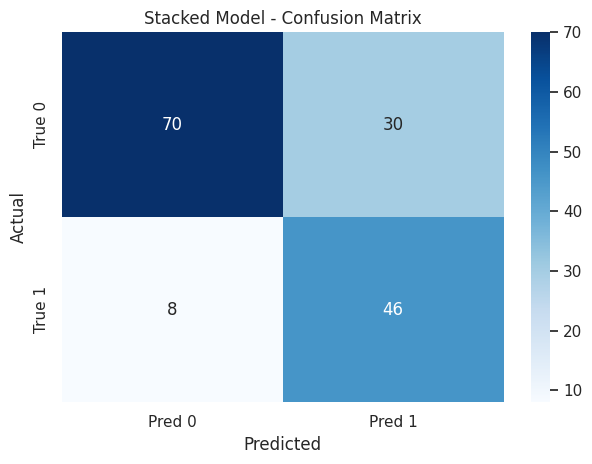

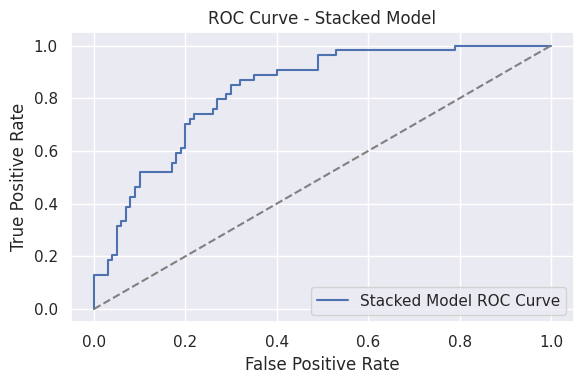

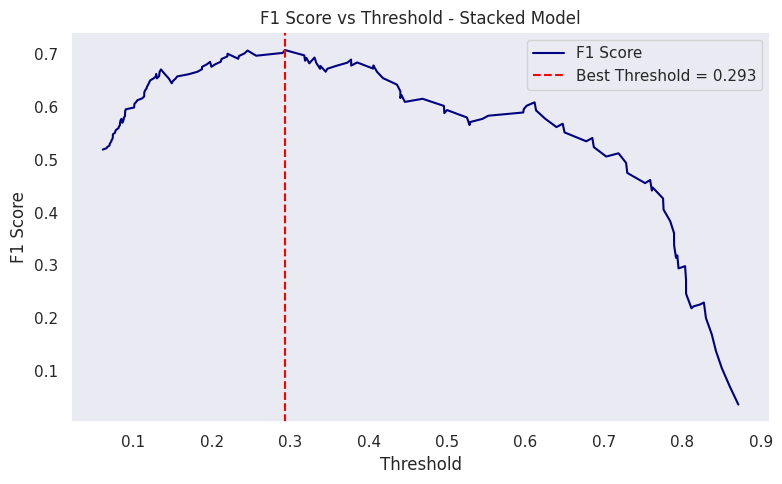

In [ ]:
# # 📦 Imports
# from sklearn.ensemble import StackingClassifier
# from sklearn.linear_model import LogisticRegression
# from sklearn.ensemble import RandomForestClassifier
# from xgboost import XGBClassifier
# from lightgbm import LGBMClassifier
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.metrics import (
#     accuracy_score, f1_score, precision_score, recall_score,
#     classification_report, confusion_matrix, roc_auc_score,
#     precision_recall_curve, roc_curve
# )
# import matplotlib.pyplot as plt
# import seaborn as sns
# import numpy as np

# # ✅ Define base models
# base_models = [
#     ('lr', LogisticRegression(C=1.0, class_weight='balanced', max_iter=100)),
#     ('rf', RandomForestClassifier(n_estimators=276, max_depth=5, min_samples_split=3, min_samples_leaf=3, max_features='sqrt', random_state=42)),
#     ('xgb', XGBClassifier(n_estimators=100, max_depth=3, learning_rate=0.1, subsample=0.8, colsample_bytree=0.8, random_state=42)),
#     ('lgbm', LGBMClassifier(n_estimators=234, learning_rate=0.015, num_leaves=30, max_depth=4, subsample=0.75, colsample_bytree=0.82, reg_alpha=0.93, reg_lambda=0.91, random_state=42))
# ]

# # ✅ Meta-model
# meta_model = LogisticRegression()

# # 🚀 Build and train stacked model
# stacked_model = StackingClassifier(estimators=base_models, final_estimator=meta_model, cv=5)
# stacked_model.fit(X_train_scaled, y_train)

# # 🎯 Threshold Tuning
# y_proba_stack = stacked_model.predict_proba(X_test_scaled)[:, 1]
# precision, recall, thresholds = precision_recall_curve(y_test, y_proba_stack)
# f1_scores = 2 * (precision * recall) / (precision + recall + 1e-8)
# best_idx = np.argmax(f1_scores)
# best_thresh_stack = thresholds[best_idx]
# print(f"\n🎯 Best Threshold for Stacked Model: {best_thresh_stack:.3f}")

# # ✅ Final Predictions
# y_pred_stack = (y_proba_stack >= best_thresh_stack).astype(int)

# # 📊 Evaluation Metrics
# print("✅ Accuracy:", accuracy_score(y_test, y_pred_stack))
# print("✅ Precision:", precision_score(y_test, y_pred_stack))
# print("✅ Recall:", recall_score(y_test, y_pred_stack))
# print("✅ F1 Score:", f1_score(y_test, y_pred_stack))
# print("✅ ROC-AUC:", roc_auc_score(y_test, y_proba_stack))

# # 📋 Classification Report
# print("\n📋 Classification Report:")
# print(classification_report(y_test, y_pred_stack, digits=4))

# # 🔍 Confusion Matrix
# cm = confusion_matrix(y_test, y_pred_stack)
# sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
#             xticklabels=["Pred 0", "Pred 1"],
#             yticklabels=["True 0", "True 1"])
# plt.title("Stacked Model - Confusion Matrix")
# plt.xlabel("Predicted")
# plt.ylabel("Actual")
# plt.tight_layout()
# plt.show()

# # 📈 ROC Curve
# fpr, tpr, _ = roc_curve(y_test, y_proba_stack)
# plt.figure(figsize=(6, 4))
# plt.plot(fpr, tpr, label="Stacked Model ROC Curve")
# plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
# plt.xlabel("False Positive Rate")
# plt.ylabel("True Positive Rate")
# plt.title("ROC Curve - Stacked Model")
# plt.legend()
# plt.tight_layout()
# plt.show()

# # 📊 F1 vs Threshold Plot (corrected)
# plt.figure(figsize=(8, 5))
# plt.plot(thresholds, f1_scores[:-1], color='navy', label='F1 Score')  # Slice to match thresholds
# plt.axvline(x=best_thresh_stack, color='red', linestyle='--', label=f'Best Threshold = {best_thresh_stack:.3f}')
# plt.xlabel("Threshold")
# plt.ylabel("F1 Score")
# plt.title("F1 Score vs Threshold - Stacked Model")
# plt.legend()
# plt.grid()
# plt.tight_layout()
# plt.show()


In [ ]:
import pandas as pd

comparison_data = {
    "Model": ["Logistic Regression", "Random Forest", "XGBoost", "LightGBM"],
    "Test F1": [0.7121, 0.6774, 0.6942, 0.7068],
    "Train F1": [0.6615, 0.7948, 0.7769, 0.7686],
    "CV F1 Mean": [0.6662, 0.6295, 0.6459, 0.6672],
    "Test Accuracy": [0.7532, 0.7403, 0.7273, 0.7468],
    "Train Accuracy": [0.7134, 0.8518, 0.8241, 0.8078],
    "ROC-AUC": [0.82, 0.8079, 0.8315, 0.8315],
    "Noise F1": [0.7121, 0.6720, 0.7000, 0.7068],
    "Best Threshold": [0.41, 0.354, 0.341, 0.279],
    "Generalization Verdict": [
        "Stable & interpretable",
        "Generalized after regularization",
        "Robust, slightly overfit",
        "Best balance overall"
    ]
}

df_comparison = pd.DataFrame(comparison_data)
df_comparison.set_index("Model", inplace=True)
df_comparison


Test F1  Train F1  CV F1 Mean  Test Accuracy  \
Model                                                               
Logistic Regression   0.7121    0.6615      0.6662         0.7532   
Random Forest         0.6774    0.7948      0.6295         0.7403   
XGBoost               0.6942    0.7769      0.6459         0.7273   
LightGBM              0.7068    0.7686      0.6672         0.7468   

                     Train Accuracy  ROC-AUC  Noise F1  Best Threshold  \
Model                                                                    
Logistic Regression          0.7134   0.8200    0.7121           0.410   
Random Forest                0.8518   0.8079    0.6720           0.354   
XGBoost                      0.8241   0.8315    0.7000           0.341   
LightGBM                     0.8078   0.8315    0.7068           0.279   

                               Generalization Verdict  
Model                                                  
Logistic Regression            Stable & interpretable  
Random Forest        Generalized after regularization  
XGBoost                      Robust, slightly overfit  
LightGBM                         Best balance overall

In [ ]:
# from sklearn.metrics import f1_score, precision_recall_curve

# # Get predicted probabilities
# y_proba_stack = stacked_model.predict_proba(X_test_scaled)[:, 1]

# # Tune threshold
# precision, recall, thresholds = precision_recall_curve(y_test, y_proba_stack)
# f1_scores = 2 * (precision * recall) / (precision + recall + 1e-8)
# best_idx = np.argmax(f1_scores)
# best_thresh_stack = thresholds[best_idx]

# # Final predictions
# y_pred_stack = (y_proba_stack >= best_thresh_stack).astype(int)
# print(f"🎯 Best Threshold for Stacked Model: {best_thresh_stack:.3f}")
# print("✅ F1 Score:", f1_score(y_test, y_pred_stack))


🎯 Best Threshold for Stacked Model: 0.293
✅ F1 Score: 0.7076923076923076


In [ ]:
from lightgbm import LGBMClassifier
import pickle

# 🎯 Define and train your model
model = LGBMClassifier(
    colsample_bytree=0.8229,
    learning_rate=0.01485,
    max_depth=7,
    n_estimators=216,
    num_leaves=18,
    random_state=42,
    reg_alpha=0.5594,
    reg_lambda=0.8244,
    subsample=0.6825
)

model.fit(X_train_scaled, y_train)

# 💾 Save to file
with open("model.pkl", "wb") as f:
    pickle.dump(model, f)
